In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import module needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*   VIN = Vehicle Identification Number
*   MSRP = MSRP stands for manufacturer's suggested retail price. The MSRP is the suggested sticker price you see on a car window, and it is the price the manufacturer suggests the dealer ask for the vehicle.


# Data Preprocessing

In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/CCC/Electric_Vehicle_Population_Data.csv')
#data_2 = pd.read_csv('/content/drive/MyDrive/CCC/Electric_Vehicle_Population_Size_History_By_County.csv')  #Jaga2 klodipake
data_3 = pd.read_csv('/content/drive/MyDrive/CCC/Electric_Vehicle_Title_and_Registration_Activity .csv',
                     parse_dates = ['DOL Transaction Date'],
                     infer_datetime_format = True)
#Sort berdasarkan waktu
data_3 = data_3.sort_values(by='DOL Transaction Date')
data_3.reset_index(drop = True, inplace = True)

data_3

Clean Alternative Fuel Vehicle Type  VIN (1-10)  DOL Vehicle ID  \
0               Battery Electric Vehicle (BEV)  5YJRE11B98       206424627   
1               Battery Electric Vehicle (BEV)  5YJRE11B18       232827374   
2               Battery Electric Vehicle (BEV)  1FTZR0817Y       126892475   
3               Battery Electric Vehicle (BEV)  5YJRE11B08       175730061   
4               Battery Electric Vehicle (BEV)  5YJRE1A35A       265387573   
...                                        ...         ...             ...   
761410  Plug-in Hybrid Electric Vehicle (PHEV)  JTDKARFP2L         6139423   
761411          Battery Electric Vehicle (BEV)  1V2WNPE87P       240203358   
761412          Battery Electric Vehicle (BEV)  5YJ3E1EA6L       245389420   
761413          Battery Electric Vehicle (BEV)  1N4AZ0CP1F       254273274   
761414          Battery Electric Vehicle (BEV)  7PDSGABAXP       244706605   

        Model Year        Make        Model Vehicle Primary Use  \
0             2008       TESLA     Roadster           Passenger   
1             2008       TESLA     Roadster           Passenger   
2             2000        FORD       Ranger               Truck   
3             2008       TESLA     Roadster           Passenger   
4             2010       TESLA     Roadster           Passenger   
...            ...         ...          ...                 ...   
761410        2020      TOYOTA  Prius Prime           Passenger   
761411        2023  VOLKSWAGEN         ID.4           Passenger   
761412        2020       TESLA      Model 3           Passenger   
761413        2015      NISSAN         Leaf           Passenger   
761414        2023      RIVIAN          R1S           Passenger   

        Electric Range  Odometer Reading  \
0                  220                 0   
1                  220                 0   
2                   58                 0   
3                  220                 0   
4                  245                21   
...                ...               ...   
761410              25             25010   
761411               0                 0   
761412             266             45324   
761413              84             45289   
761414               0                 0   

                                            Odometer Code  ...  \
0                                No Odometer Code on File  ...   
1                                No Odometer Code on File  ...   
2                                No Odometer Code on File  ...   
3                                No Odometer Code on File  ...   
4                                          Actual Mileage  ...   
...                                                   ...  ...   
761410                                     Actual Mileage  ...   
761411  Odometer reading is not collected at time of r...  ...   
761412                          Exceeds mechanical limits  ...   
761413                                     Actual Mileage  ...   
761414  Odometer reading is not collected at time of r...  ...   

       Meets 2019 HB 2042 Sale Price/Value Requirement  \
0                                                False   
1                                                False   
2                                                False   
3                                                False   
4                                                False   
...                                                ...   
761410                                           False   
761411                                           False   
761412                                           False   
761413                                           False   
761414                                           False   

        2019 HB 2042: Battery Range Requirement  \
0               Meets battery range requirement   
1               Meets battery range requirement   
2               Meets battery range requirement   
3               Meets battery range requiremen

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761415 entries, 0 to 761414
Data columns (total 35 columns):
 #   Column                                                          Non-Null Count   Dtype         
---  ------                                                          --------------   -----         
 0   Clean Alternative Fuel Vehicle Type                             761415 non-null  object        
 1   VIN (1-10)                                                      761415 non-null  object        
 2   DOL Vehicle ID                                                  761415 non-null  int64         
 3   Model Year                                                      761415 non-null  int64         
 4   Make                                                            761415 non-null  object        
 5   Model                                                           760843 non-null  object        
 6   Vehicle Primary Use                                             761415 non-n

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         138779 non-null  object 
 1   County                                             138776 non-null  object 
 2   City                                               138776 non-null  object 
 3   State                                              138779 non-null  object 
 4   Postal Code                                        138776 non-null  float64
 5   Model Year                                         138779 non-null  int64  
 6   Make                                               138779 non-null  object 
 7   Model                                              138493 non-null  object 
 8   Electric Vehicle Type                              138779 non-null  object

In [ ]:
flag = 0
if(set(data_1.columns).issubset(set(data_3.columns))):
    flag = 1

# printing result
if (flag):
    print("Yes, list is subset of other.")
else:
    print("No, list is not subset of other.")

No, list is not subset of other.


In [ ]:
#check null
print("Data 1: \n", data_1.isnull().sum(), "\n percentage: \n", (data_1.isnull().sum().sum()/np.product(data_1.shape))*100)
print()
print("Data 3: \n", data_3.isnull().sum(), "\n percentage: \n", (data_3.isnull().sum().sum()/np.product(data_3.shape))*100)


Data 1: 
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 315
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64 
 percen

## kolom Model

In [ ]:
data_3.loc[data_3['Model'].isnull()].head(1).squeeze()

Clean Alternative Fuel Vehicle Type                                                  Battery Electric Vehicle (BEV)
VIN (1-10)                                                                                               YV4ED3UM5P
DOL Vehicle ID                                                                                            214731254
Model Year                                                                                                     2023
Make                                                                                                          VOLVO
Model                                                                                                           NaN
Vehicle Primary Use                                                                                       Passenger
Electric Range                                                                                                    0
Odometer Reading                                                        

In [ ]:
#Presentase yang Null
(data_3['Model'].isnull().sum()/len(data_3.Model)) * 100

0.07512329018997525

In [ ]:
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                572
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533459
Base MSRP                                          

In [ ]:
#Drop NaN values nya karena presentasenya kecil
data_3.dropna(subset = ['Model'], inplace=True)
data_3.reset_index(drop = True, inplace = True)
print("Presentase Missing Values kolom Model: ", (100*(data_3['Model'].isnull().sum()/len(data_3['Model'])))
data_3['Model'].isnull().sum()

Presentase Missing Values kolom Model:  0.0


0

In [ ]:
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                  0
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533173
Base MSRP                                          

## Kolom State of Residence, County, City, dan Postal Code

In [ ]:
#karena hanya ada 1, maka kita drop saja
data_3.dropna(subset = ['State of Residence'], inplace = True)
data_3.reset_index(drop = True, inplace = True)
data_3['State of Residence'].isnull().sum()

0

In [ ]:
print(set(data_3.loc[data_3['County'].isnull()]).issubset(set(data_3.loc[data_3['City'].isnull()])))
print("Presentase Missing Values kolom City: ", (100*(data_3['City'].isnull().sum()/len(data_3['City']))))
#Karena county subset City, dan presentase kecil, maka kita drop kolom CIty, yg otomatis drop NaN county juga

True
Presentase Missing Values kolom City:  0.009068899981862201


In [ ]:
data_3.dropna(subset = ['City'], inplace = True)
data_3.reset_index(drop = True, inplace = True)
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                  0
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533119
Base MSRP                                          

In [ ]:
print("Presentase Missing Values kolom Postal Code: ", (100*(data_3['Postal Code'].isnull().sum()/len(data_3['Postal Code']))))
#Karena presentase rendah postal code, maka drop saja

Presentase Missing Values kolom Postal Code:  0.0013144525370905643


In [ ]:
data_3.dropna(subset = ['Postal Code'], inplace = True)
data_3.reset_index(drop = True, inplace = True)
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                  0
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533112
Base MSRP                                          

## Kolom Legislative District

In [ ]:
data_3.loc[data_3['Legislative District'].isnull()].head(1).squeeze()

Clean Alternative Fuel Vehicle Type                                         Battery Electric Vehicle (BEV)
VIN (1-10)                                                                                      JA3215H12C
DOL Vehicle ID                                                                                   242106672
Model Year                                                                                            2012
Make                                                                                            MITSUBISHI
Model                                                                                               i-MiEV
Vehicle Primary Use                                                                              Passenger
Electric Range                                                                                          62
Odometer Reading                                                                                         3
Odometer Code                        

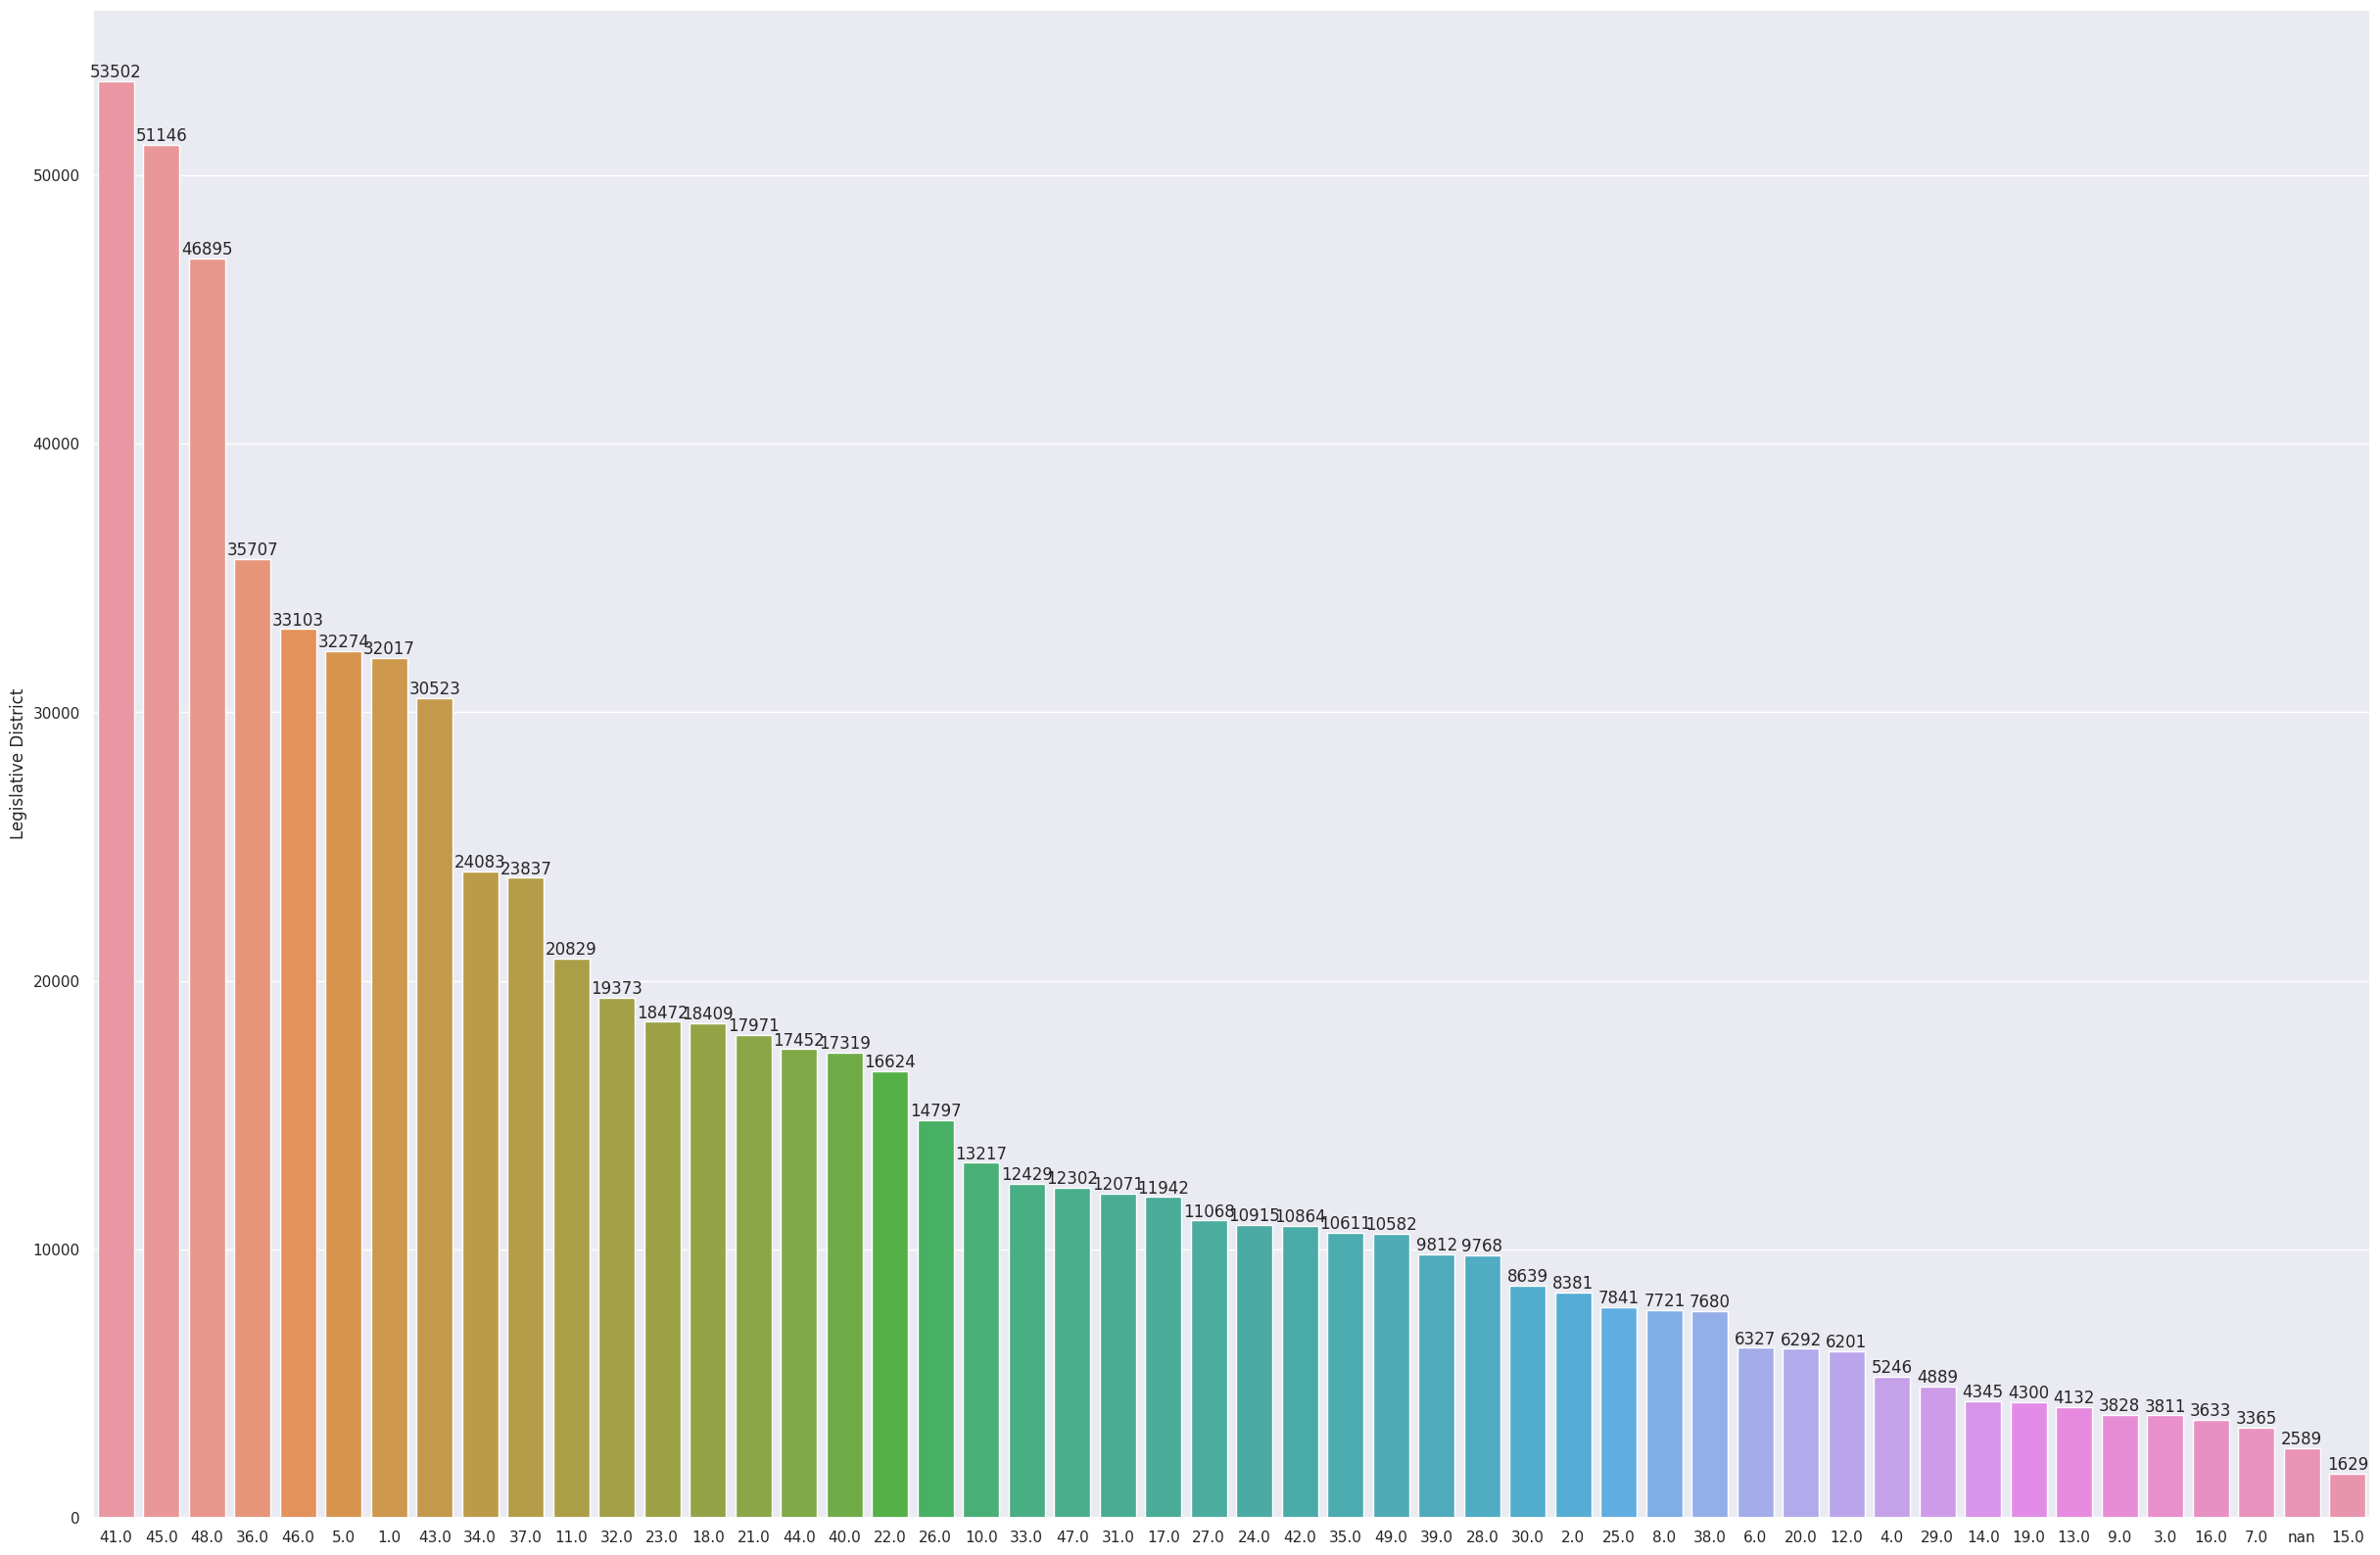

In [ ]:
plt.figure(figsize=(30,20))

plot_model = pd.DataFrame()
plot_model['Legislative District'] = data_3['Legislative District'].value_counts(ascending = False, dropna = False)
plot_model.index = plot_model.index.astype('str')

sns.set(font_scale=1)
ax = sns.barplot(plot_model, x=plot_model['Legislative District'].index, y = 'Legislative District' )
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
print("Presentase Missing Values kolom Legislative District: ", (100*(data_3['Legislative District'].isnull().sum()/len(data_3['Legislative District']))))

Presentase Missing Values kolom Legislative District:  0.3403162351481342


In [ ]:
data_3.drop(['Legislative District'],axis=1, inplace = True)
data_3.reset_index(drop = True, inplace = True)
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                  0
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533112
Base MSRP                                          

## Kolom Transportation and Hybrid Elec fee paid*

In [ ]:
print(set(data_3['Transportation Electrification Fee Paid']) == set(data_3['Hybrid Vehicle Electrification Fee Paid']))
print("Presentase Missing Values kolom TEFP: ", (100*(data_3['Transportation Electrification Fee Paid'].isnull().sum()/len(data_3['Transportation Electrification Fee Paid']))))


True
Presentase Missing Values kolom TEFP:  11.963647022791593


In [ ]:
print('Value counts TFEP: \n',data_3['Transportation Electrification Fee Paid'].value_counts(dropna=False))
print()
print('Value counts HVEFP: \n', data_3['Hybrid Vehicle Electrification Fee Paid'].value_counts(dropna=False))
#diketahui apa yang hilang di TFEP jg hilang di HVEFP

Value counts TFEP: 
 No                264455
Yes               228084
Not Applicable    177209
NaN                91015
Name: Transportation Electrification Fee Paid, dtype: int64

Value counts HVEFP: 
 No                451768
Not Applicable    177209
NaN                91015
Yes                40771
Name: Hybrid Vehicle Electrification Fee Paid, dtype: int64


In [ ]:
df_nomissing = data_3[data_3['Transportation Electrification Fee Paid'].notna()]
print("N. rows with maker not null:", df_nomissing.shape[0])

df_missing = data_3[data_3['Transportation Electrification Fee Paid'].isnull()]
print("N. rows with maker null:", df_missing.shape[0])
print("Terlalu banyak yang hilang, jadi ga mungkin drop")

N. rows with maker not null: 669748
N. rows with maker null: 91015
Terlalu banyak yang hilang, jadi ga mungkin drop


In [ ]:
s = (data_3.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

kolom = [col for col in object_cols]
X_tes = data_3[kolom].drop(columns = (['Transportation Electrification Fee Paid','Hybrid Vehicle Electrification Fee Paid']))
y_tes = data_3[['Transportation Electrification Fee Paid','Hybrid Vehicle Electrification Fee Paid']]
y_tes

Categorical variables:
['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'Make', 'Model', 'Vehicle Primary Use', 'Odometer Code', 'New or Used Vehicle', 'Sale Date', 'Transaction Type', 'County', 'City', 'State of Residence', '2015 HB 2778 Exemption Eligibility', '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility', '2019 HB 2042: Battery Range Requirement', '2019 HB 2042: Purchase Date Requirement', '2019 HB 2042: Sale Price/Value Requirement', 'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid', 'Hybrid Vehicle Electrification Fee Paid', 'Electric Utility']


Transportation Electrification Fee Paid  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
760758                          Not Applicable   
760759                                      No   
760760                          Not Applicable   
760761                          Not Applicable   
760762                                      No   

       Hybrid Vehicle Electrification Fee Paid  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
...                                        ...  
760758                          Not Applicable  
760759                                      No  
760760                          Not Applicable  
760761                          Not Applicable  
760762                                      No  

[760763 rows x 2 columns]

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer # noqa
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

encoders = dict()

for col_name in y_tes.columns:
    series = y_tes[col_name]
    label_encoder = LabelEncoder()
    y_tes[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

imp = IterativeImputer(estimator=RandomForestClassifier(),
                       initial_strategy='most_frequent',
                       max_iter=10, random_state=0)
# Fit to the dataset containing missing values
imp.fit(y_tes)
# Transform the dataset containing missing values
df_y_tes = pd.DataFrame(imp.transform(y_tes), columns = y_tes.columns)

df_y_tes['Hybrid Vehicle Electrification Fee Paid'] = df_y_tes['Hybrid Vehicle Electrification Fee Paid'].astype('int')
df_y_tes['Transportation Electrification Fee Paid'] = df_y_tes['Transportation Electrification Fee Paid'].astype('int')
df_y_tes['Hybrid Vehicle Electrification Fee Paid'] = pd.DataFrame(label_encoder.inverse_transform(df_y_tes['Hybrid Vehicle Electrification Fee Paid']))
df_y_tes['Transportation Electrification Fee Paid'] = pd.DataFrame(label_encoder.inverse_transform(df_y_tes['Transportation Electrification Fee Paid']))

#DIlakukan semi supervised machine learning imputation karena data missingnya at random
df_y_tes

<ipython-input-27-f1e9b665137c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_tes[col_name] = pd.Series(
<ipython-input-27-f1e9b665137c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_tes[col_name] = pd.Series(


Transportation Electrification Fee Paid  \
0                                          Yes   
1                                          Yes   
2                                          Yes   
3                                          Yes   
4                                          Yes   
...                                        ...   
760758                          Not Applicable   
760759                                      No   
760760                          Not Applicable   
760761                          Not Applicable   
760762                                      No   

       Hybrid Vehicle Electrification Fee Paid  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No  
...                                        ...  
760758                          Not Applicable  
760759                                      No  
760760                          Not Applicable  
760761                          Not Applicable  
760762                                      No  

[760763 rows x 2 columns]

In [ ]:
data_3['Hybrid Vehicle Electrification Fee Paid'] = df_y_tes['Hybrid Vehicle Electrification Fee Paid']
data_3['Transportation Electrification Fee Paid'] = df_y_tes['Transportation Electrification Fee Paid']
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                                    0
VIN (1-10)                                                             0
DOL Vehicle ID                                                         0
Model Year                                                             0
Make                                                                   0
Model                                                                  0
Vehicle Primary Use                                                    0
Electric Range                                                         0
Odometer Reading                                                       0
Odometer Code                                                          0
New or Used Vehicle                                                    0
Sale Price                                                             0
Sale Date                                                         533112
Base MSRP                                          

## kolom Sale Date*



In [ ]:
data3_copy = data_3.set_index(['VIN (1-10)', 'DOL Transaction Date', 'Sale Date', 'Transaction Type']).sort_index()
print(data3_copy[data3_copy['Sale Price'] > 0].shape)
print()
print(data3_copy[data3_copy['Sale Price'] > 0].isnull().sum())
print()
data3_copy[data3_copy['Sale Price'] > 0]


(168063, 30)

Clean Alternative Fuel Vehicle Type                               0
DOL Vehicle ID                                                    0
Model Year                                                        0
Make                                                              0
Model                                                             0
Vehicle Primary Use                                               0
Electric Range                                                    0
Odometer Reading                                                  0
Odometer Code                                                     0
New or Used Vehicle                                               0
Sale Price                                                        0
Base MSRP                                                         0
Transaction Year                                                  0
County                                                            0
City                              

Clean Alternative Fuel Vehicle Type  \
VIN (1-10) DOL Transaction Date Sale Date        Transaction Type                                           
1C4JJXN60P 2023-01-25           January 05 2023  Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
           2023-02-03           January 11 2023  Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
           2023-03-01           January 23 2023  Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
                                                 Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
           2023-03-06           February 20 2023 Transfer Title    Plug-in Hybrid Electric Vehicle (PHEV)   
...                                                                                                   ...   
YV4H60DZ8N 2022-06-01           April 27 2022    Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
           2022-07-16           June 11 2022     Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
YV4H60DZ9N 2022-05-16           April 23 2022    Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
           2022-05-24           April 21 2022    Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   
YV4H60DZXN 2023-04-05           March 24 2023    Original Title    Plug-in Hybrid Electric Vehicle (PHEV)   

                                                                   DOL Vehicle ID  \
VIN (1-10) DOL Transaction Date Sale Date        Transaction Type                   
1C4JJXN60P 2023-01-25           January 05 2023  Original Title         227539357   
           2023-02-03           January 11 2023  Original Title         229594032   
           2023-03-01           January 23 2023  Original Title         232600693   
                                                 Original Title         232649973   
           2023-03-06           February 20 2023 Transfer Title         227539357   
...                                                                           ...   
YV4H60DZ8N 2022-06-01           April 27 2022    Original Title         200779015   
           2022-07-16           June 11 2022     Original Title         209410596   
YV4H60DZ9N 2022-05-16           April 23 2022    Original Title         199099449   
           2022-05-24           April 21 2022    Original Title         198742666   
YV4H60DZXN 2023-04-05           March 24 2023    Original Title         237946726   

                                                                   Model Year  \
VIN (1-10) DOL Transaction Date Sale Date        Transaction Type               
1C4JJXN60P 2023-01-25           January 05 2023  Original Title          2023   
           2023-02-03           January 11 2023  Original Title          2023   
           2023-03-01           January 23 2023  Original Title          2023   
                                                 Original Title          2023   
           2023-03-06           February 20 2023 Transfer Title          2023   
...                                                                       ...   
YV4H60DZ8N 2022-06-01           April 27 2022    Original Title          2022   
           2022-07-16           June 11 2022     Original Title          2022   
YV4H60DZ9N 2022-05-16           April 23 2022    Original Title          2022   
           2022-05-24           April 21 2022    Original Title          2022   
YV4H60DZXN 2023-04-05           March 24 2023    Original Title          2022   

                                                                    Make  \
VIN (1-10) DOL Transaction Date Sale Date        Transaction Type          
1C4JJXN60P 2023-01-25           January 05 2023  Original Title     JEEP   
           2023-02-03           January 11 2023  Original Title     JEEP   
           2023-03-01           January 23 2023  Original Title     JEEP   
                                                 Original Title     JEEP   
           2023-03-06           Febr

In [ ]:
data_3.loc[data_3['Sale Date'].isnull()].head(1).squeeze()
#Dapat diketahui alasan sale date null mungkin dikarenakan transaksi yang terjadi bukan penjualan

Clean Alternative Fuel Vehicle Type                                              Battery Electric Vehicle (BEV)
VIN (1-10)                                                                                           5YJRE11B98
DOL Vehicle ID                                                                                        206424627
Model Year                                                                                                 2008
Make                                                                                                      TESLA
Model                                                                                                  Roadster
Vehicle Primary Use                                                                                   Passenger
Electric Range                                                                                              220
Odometer Reading                                                                                        

In [ ]:
data3_without_sale = data_3[data_3['Sale Date'].isnull()].drop(columns = 'Sale Date')
data3_with_sale = data_3[data_3['Sale Date'].notnull()]
data_3 = data_3.fillna('Non-Sale Transaction')
print('data with only null sale date row and then dropped sale date column shape',data3_without_sale.shape)
print()
print('data with dropped null sale date row shape', data3_with_sale.shape)

data with only null sale date row and then dropped sale date column shape (533112, 33)

data with dropped null sale date row shape (227651, 34)


In [ ]:
data_3.isnull().sum()

Clean Alternative Fuel Vehicle Type                               0
VIN (1-10)                                                        0
DOL Vehicle ID                                                    0
Model Year                                                        0
Make                                                              0
Model                                                             0
Vehicle Primary Use                                               0
Electric Range                                                    0
Odometer Reading                                                  0
Odometer Code                                                     0
New or Used Vehicle                                               0
Sale Price                                                        0
Sale Date                                                         0
Base MSRP                                                         0
Transaction Type                                

In [ ]:
#Dapat kita lihat, di data with sale ada sale price = 0, dan tidak ada masalah di data without sale, karena tidak ada transaksi maka sale pricenya 0 semua
#Dibuat data with sale, yang sale price nya bukan 0
data3_sale_saleprice_not0 = data3_with_sale[data3_with_sale['Sale Price'] != 0]
print('from data with sale, but with dropped sale price = 0, minimum value of the sale price',data3_sale_saleprice_not0['Sale Price'].min())
print('from data with sale, but include sale price = 0, minimum value of the sale price', data3_with_sale['Sale Price'].min())

from data with sale, but with dropped sale price = 0, minimum value of the sale price 1
from data with sale, but include sale price = 0, minimum value of the sale price 0


*   Tidak diketahu mengapa ada sale price 0 padahal ada sale date, dol transaction date, dan status transaction type original title yang mengindikasikan adanya transaksi jual beli, seperti tabel di atas

*   Dapat dilihat, adanya Sale Date, Transaction Date, dan status Transaction Type 'Original title' mengindikasikan bahwa terjadi transaksi jual beli



In [ ]:
print(data_3.shape)

(760763, 34)


Vehicle titles show proof of vehicle ownership, while vehicle registration signifies a vehicle is registered with the state and cleared for driving on public roads.

# EDA

In [ ]:
print(data_3.Model.nunique())
print(data3_with_sale.Model.nunique())
print(data3_without_sale.Model.nunique())
print(data3_sale_saleprice_not0.Model.nunique())
#Ada beberapa model mobil yang hilang

131
129
130
126


## Transaction Type

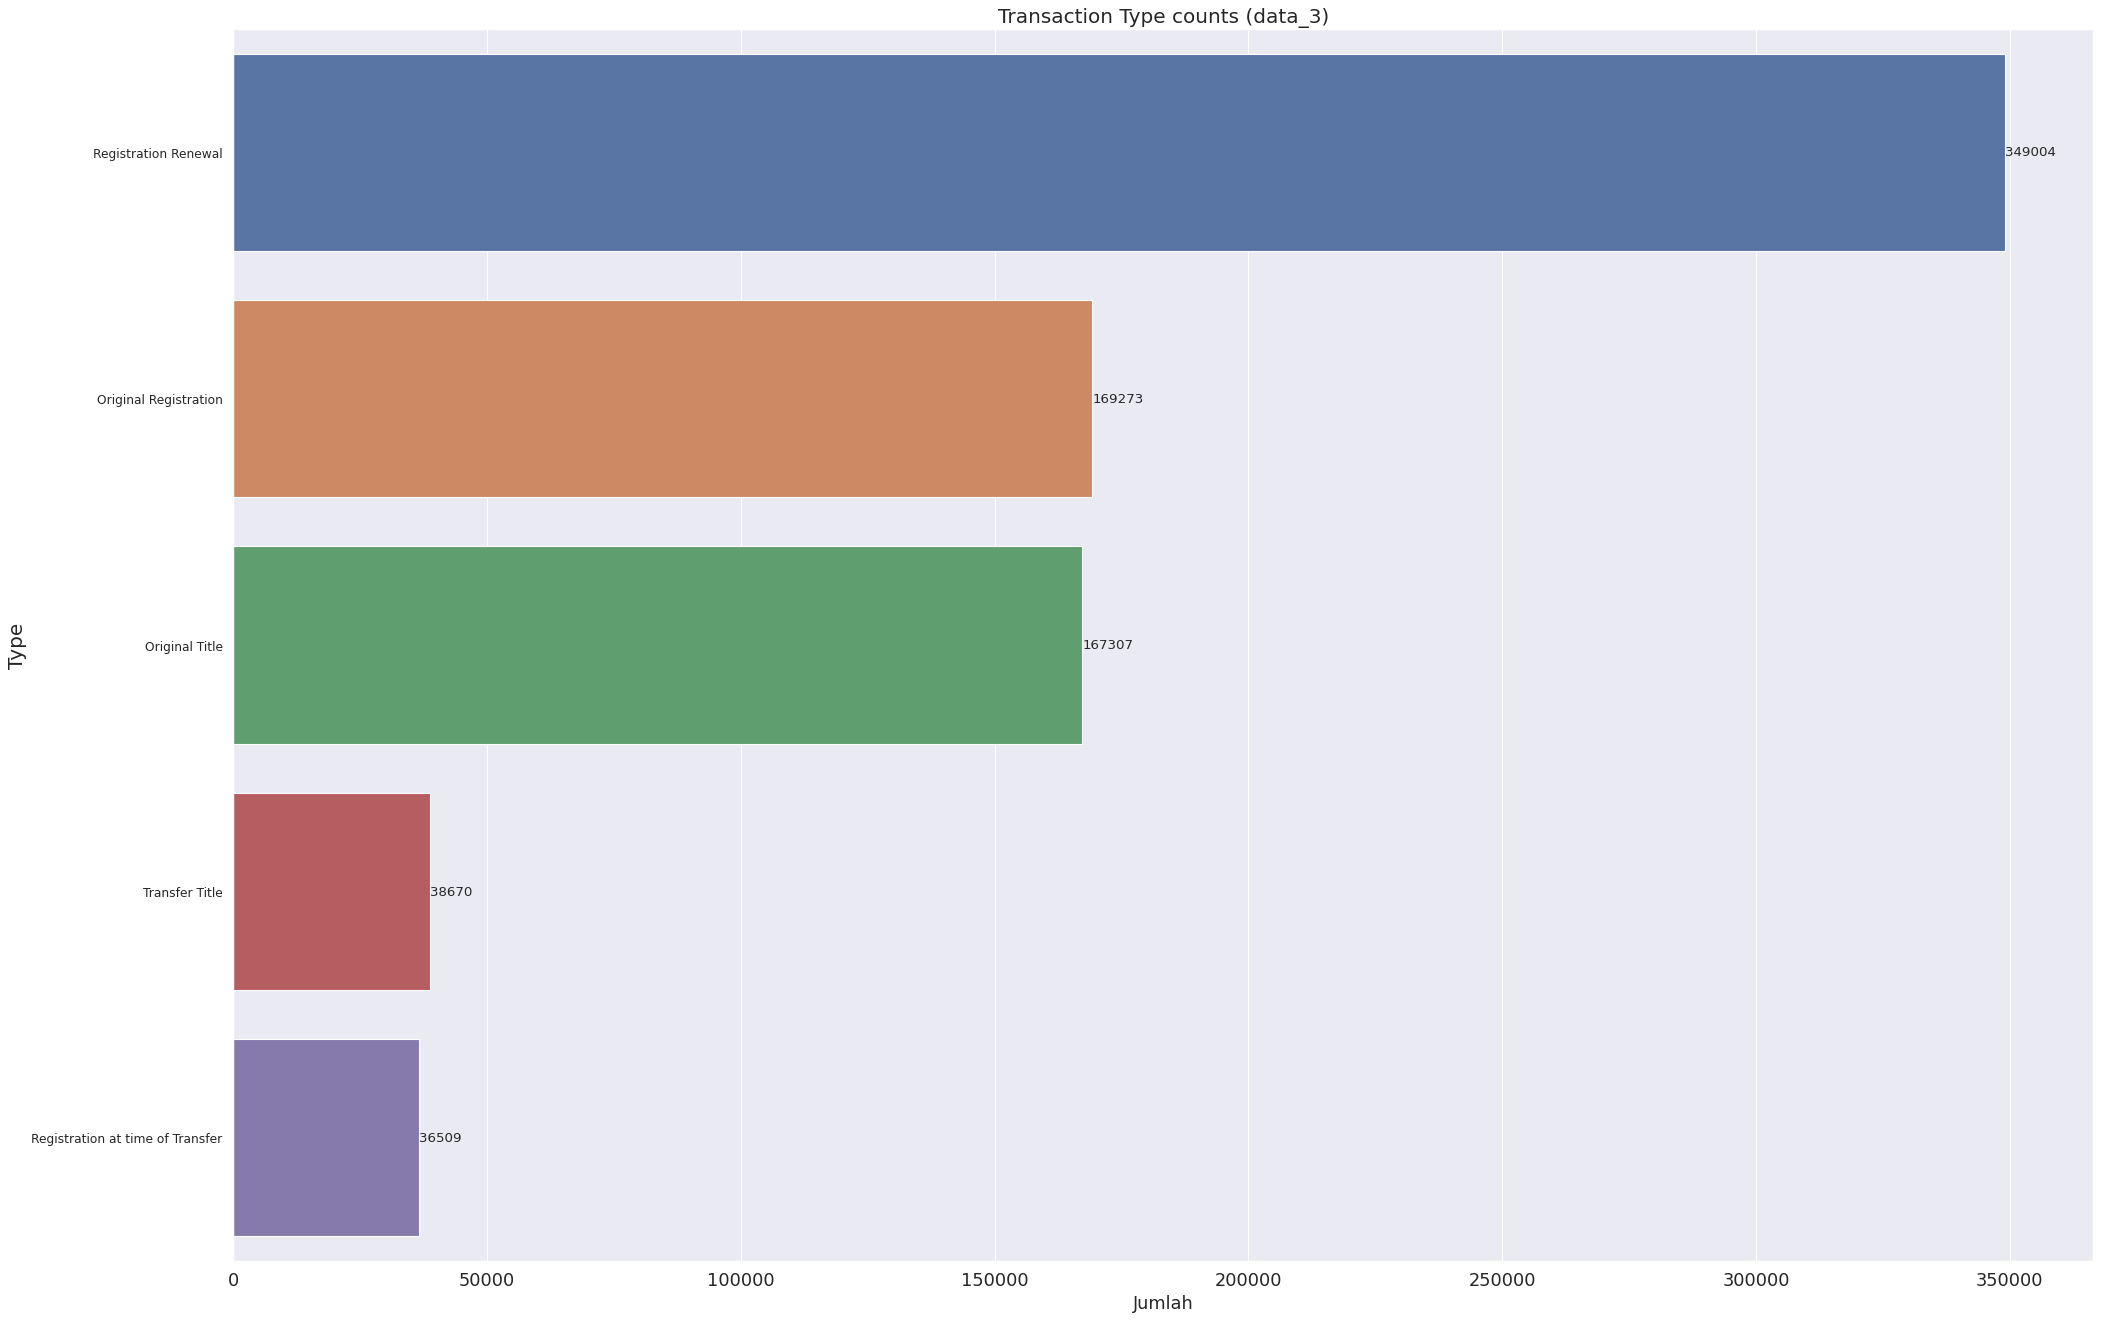

In [ ]:
Transac_type = pd.DataFrame(data_3['Transaction Type'].value_counts())
Transac_type.index = Transac_type.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(Transac_type,y=Transac_type.index,x='Transaction Type')

plt.title('Transaction Type counts (data_3)', fontsize=18)
plt.ylabel('Type', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

Tipe transaksi terbanyak pada data ini adalah 'Registration Renewal' yaitu pembaruan dokumen registrasi pada mobil elektronik

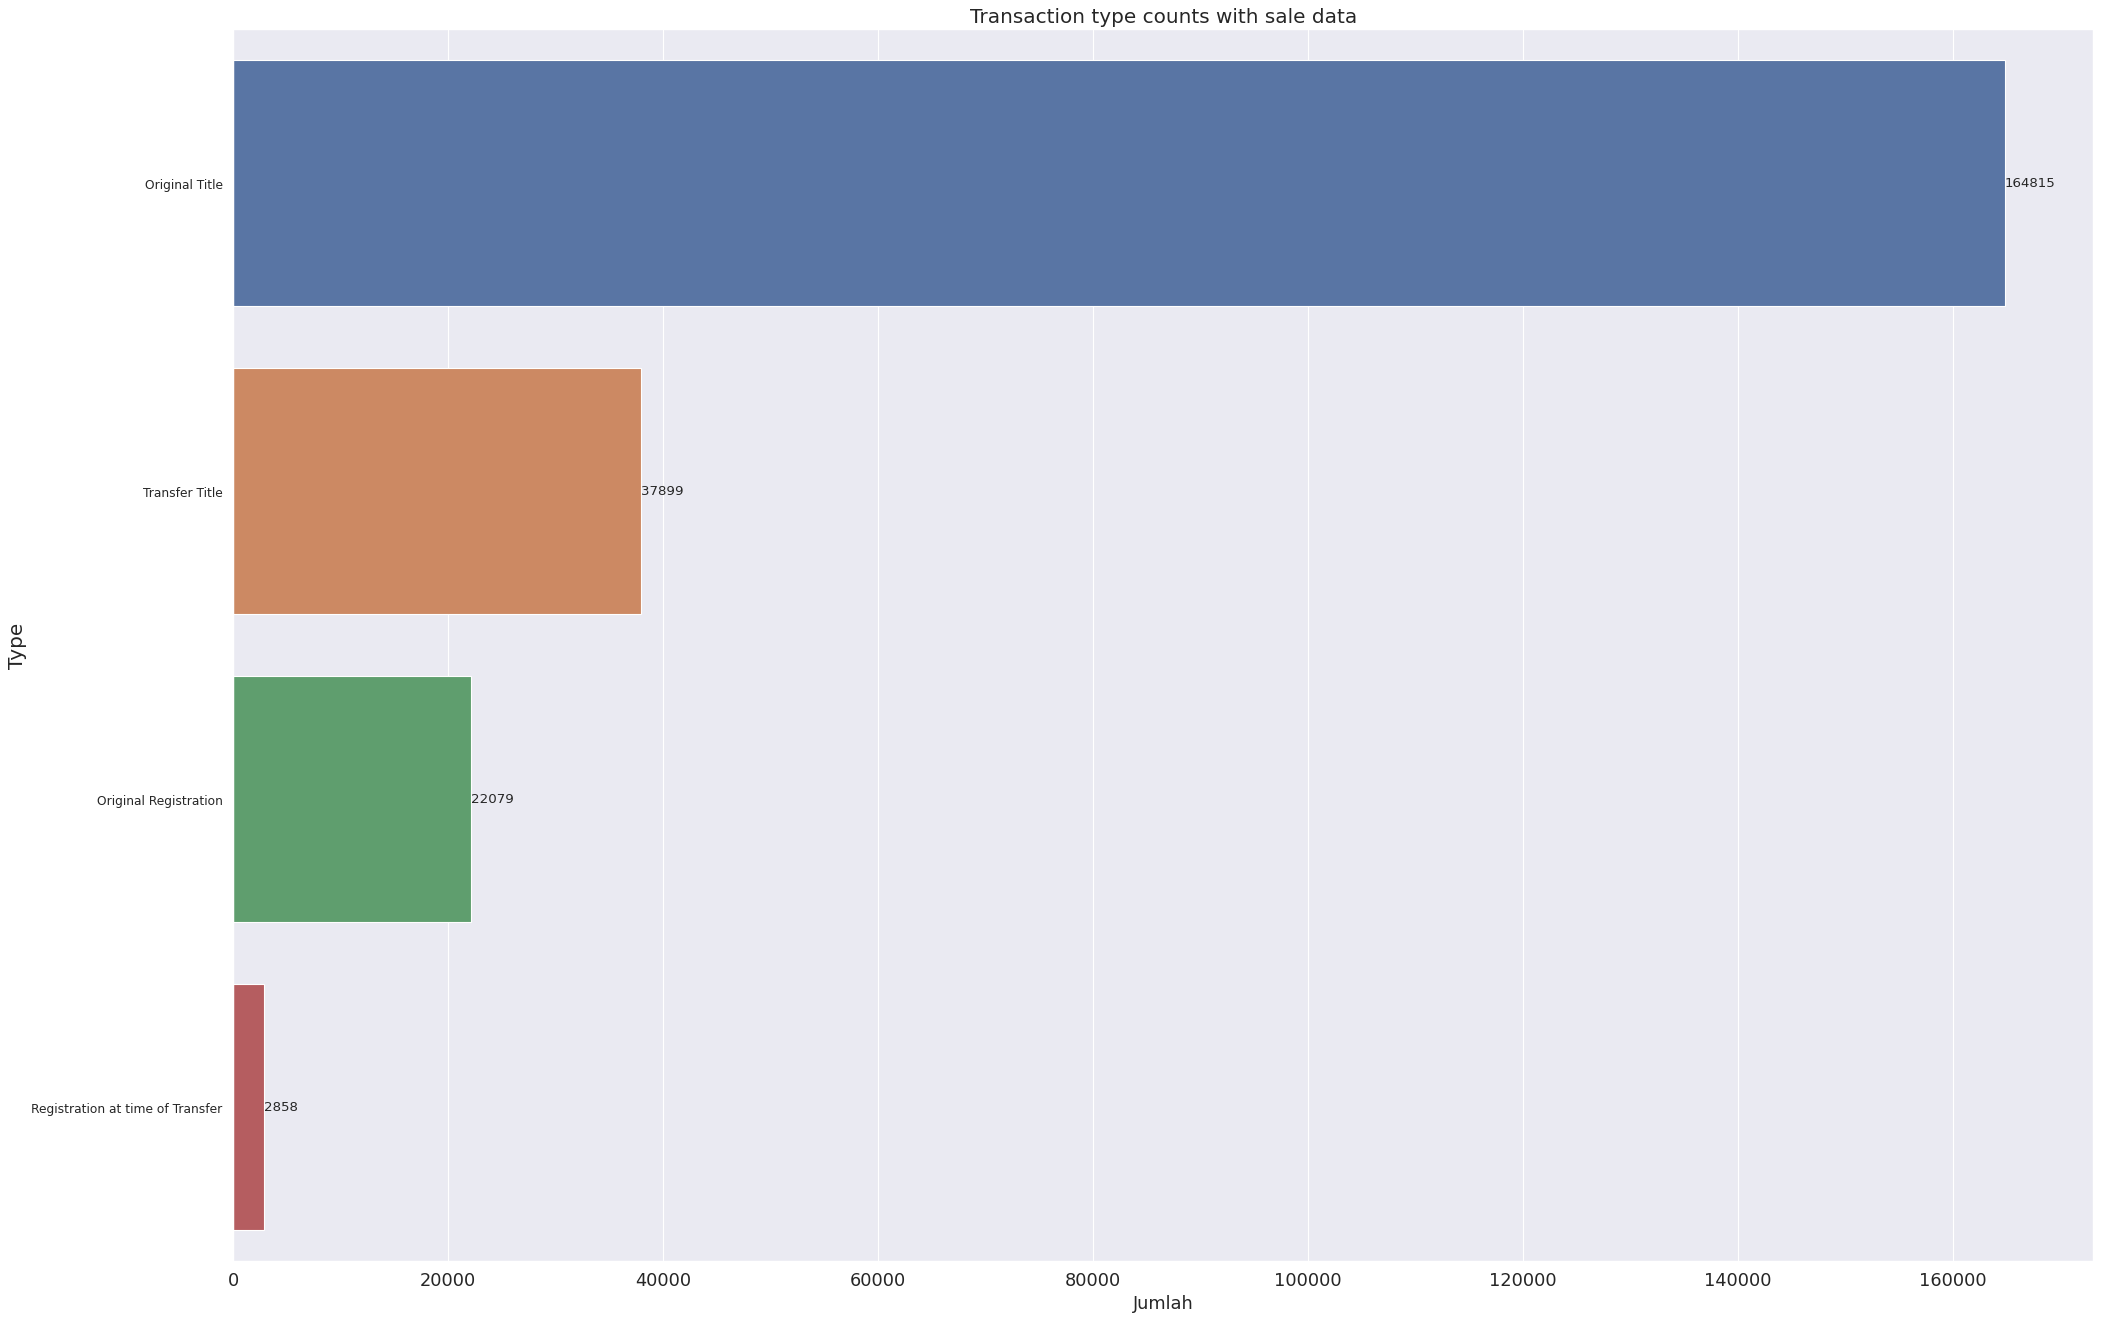

In [ ]:
Transac_type_sale = pd.DataFrame(data3_with_sale['Transaction Type'].value_counts())
Transac_type_sale.index = Transac_type_sale.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(Transac_type_sale,y=Transac_type_sale.index,x='Transaction Type')

plt.title('Transaction type counts with sale data', fontsize=18)
plt.ylabel('Type', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

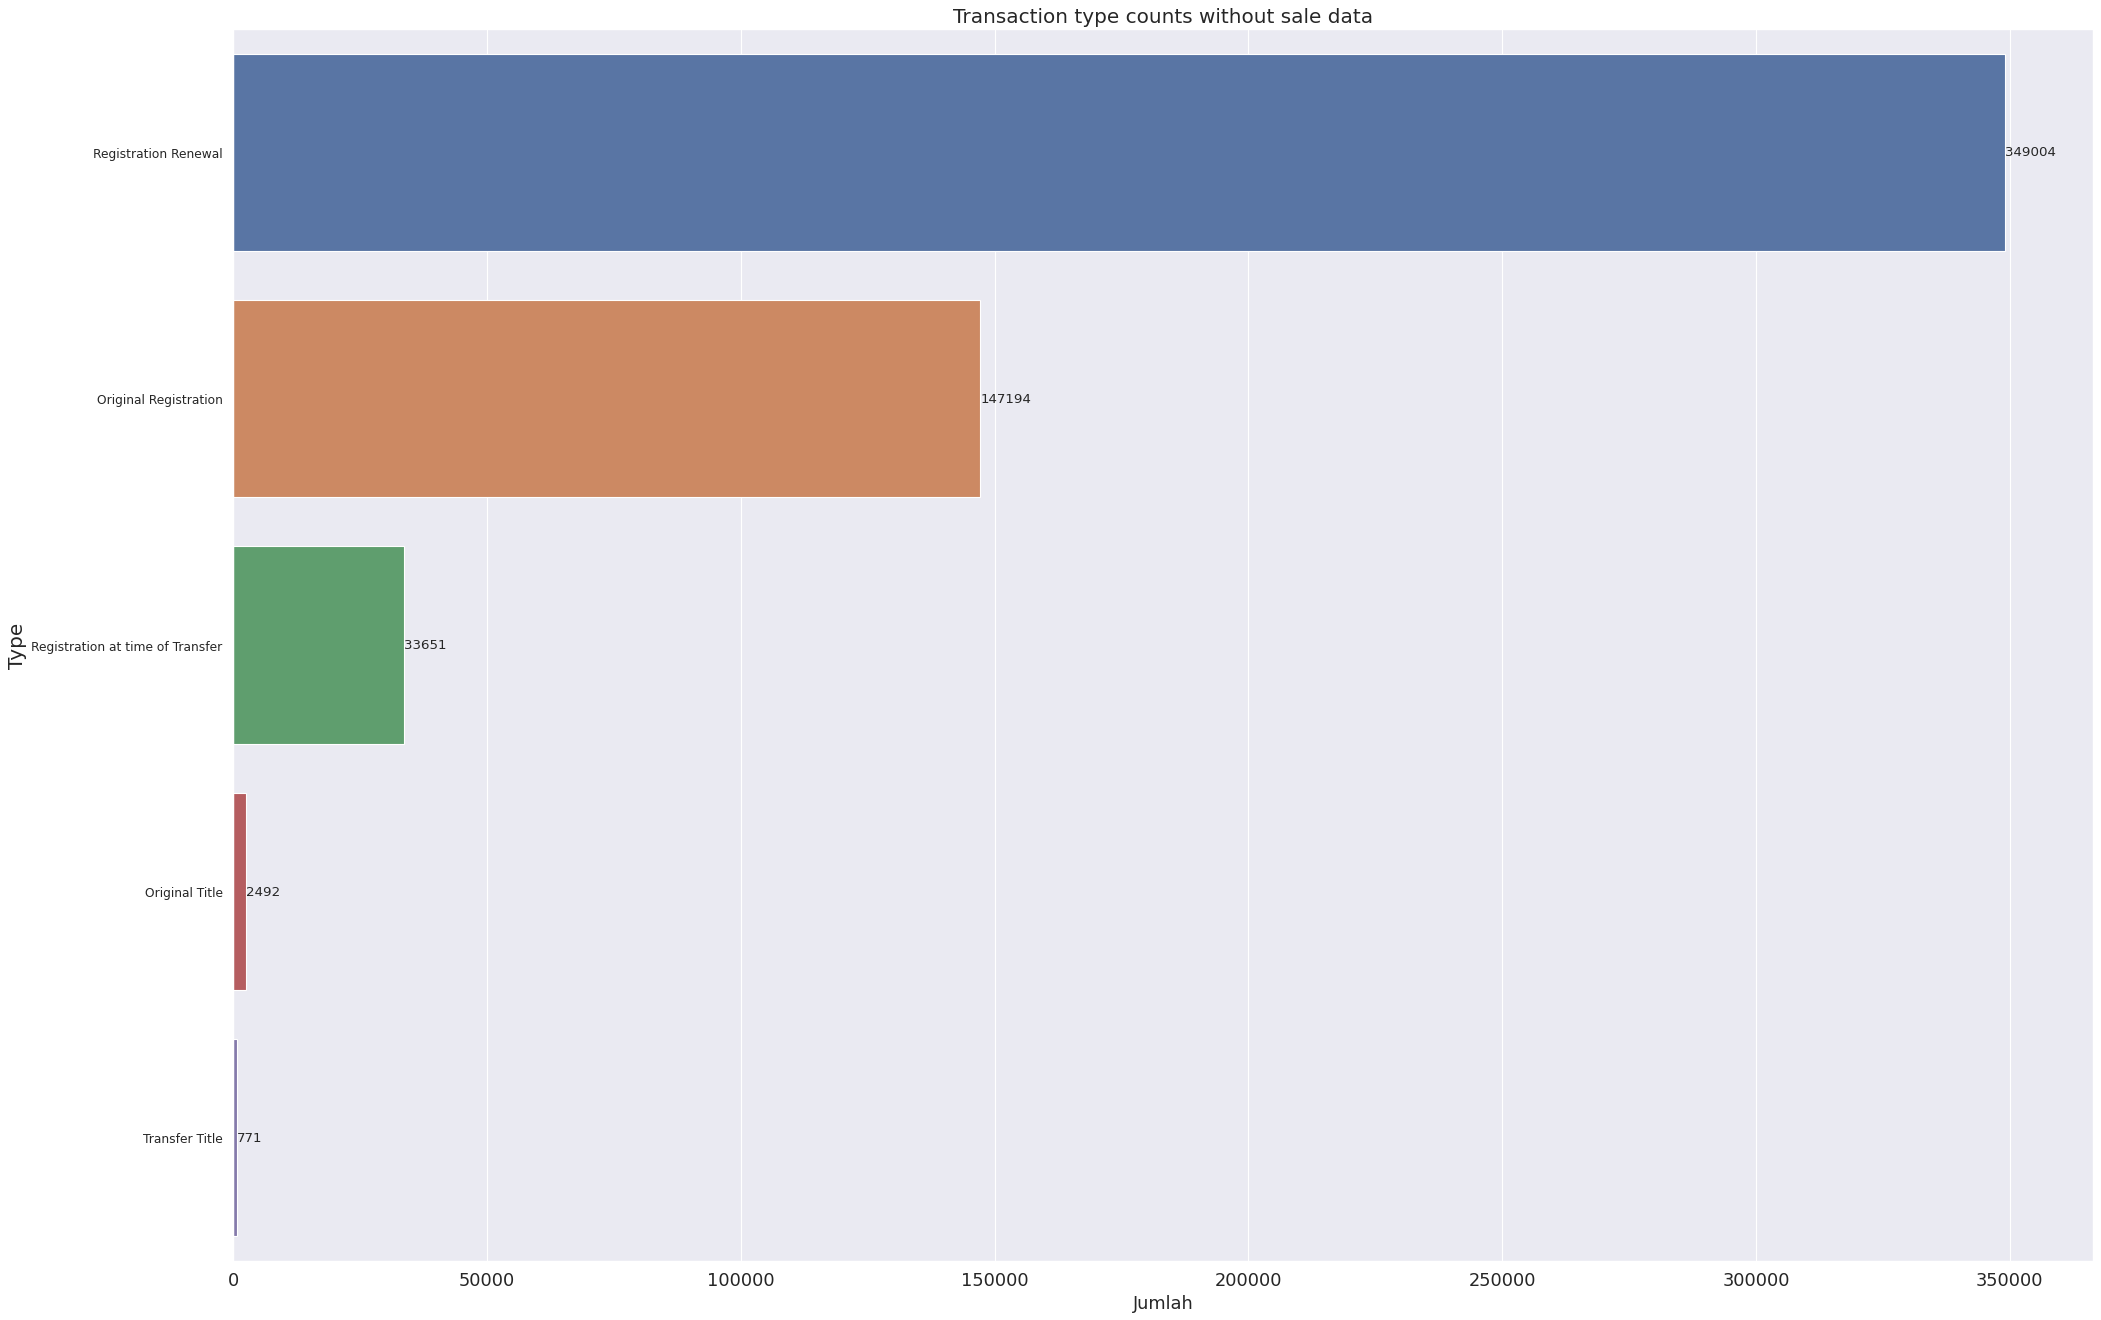

In [ ]:
Transac_type_wo_sale = pd.DataFrame(data3_without_sale['Transaction Type'].value_counts())
Transac_type_wo_sale.index = Transac_type_wo_sale.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(Transac_type_wo_sale,y=Transac_type_wo_sale.index,x='Transaction Type')

plt.title('Transaction type counts without sale data', fontsize=18)
plt.ylabel('Type', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()



*   dapat dilihat bahwa transaction type data dengan sale date banyak terjadi transaksi jual-beli, dikuatkan dengan status 'original title yang dominan'
*   dan yang tanpa sale date banyak terjadi perbaruan registrasi



## CAFH Type

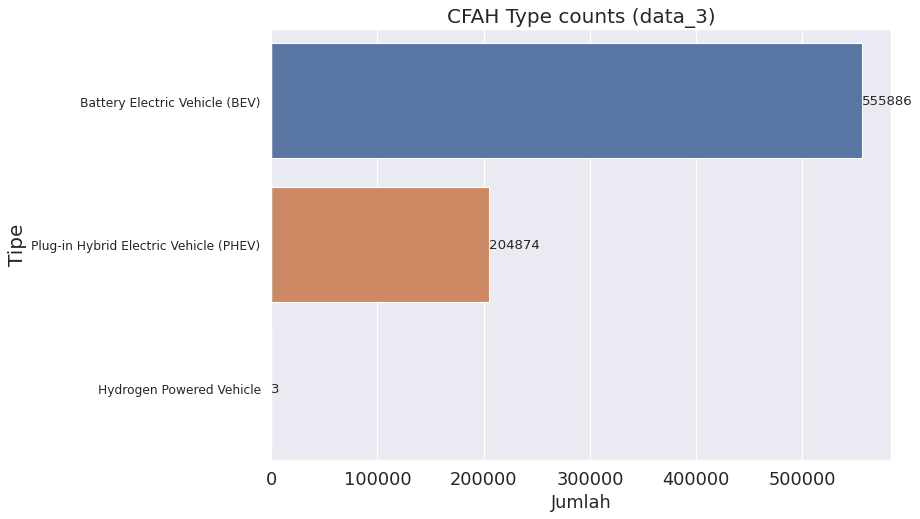

In [ ]:
CAFH_type = pd.DataFrame(data_3['Clean Alternative Fuel Vehicle Type'].value_counts())
CAFH_type = CAFH_type.reset_index()

fig, ax = plt.subplots(figsize=(10, 7), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(CAFH_type,y='index',x='Clean Alternative Fuel Vehicle Type')

plt.title('CFAH Type counts (data_3)', fontsize=18)
plt.ylabel('Tipe', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

didapat bahwa tipe CFAH yang paling sering muncul adalah BEV

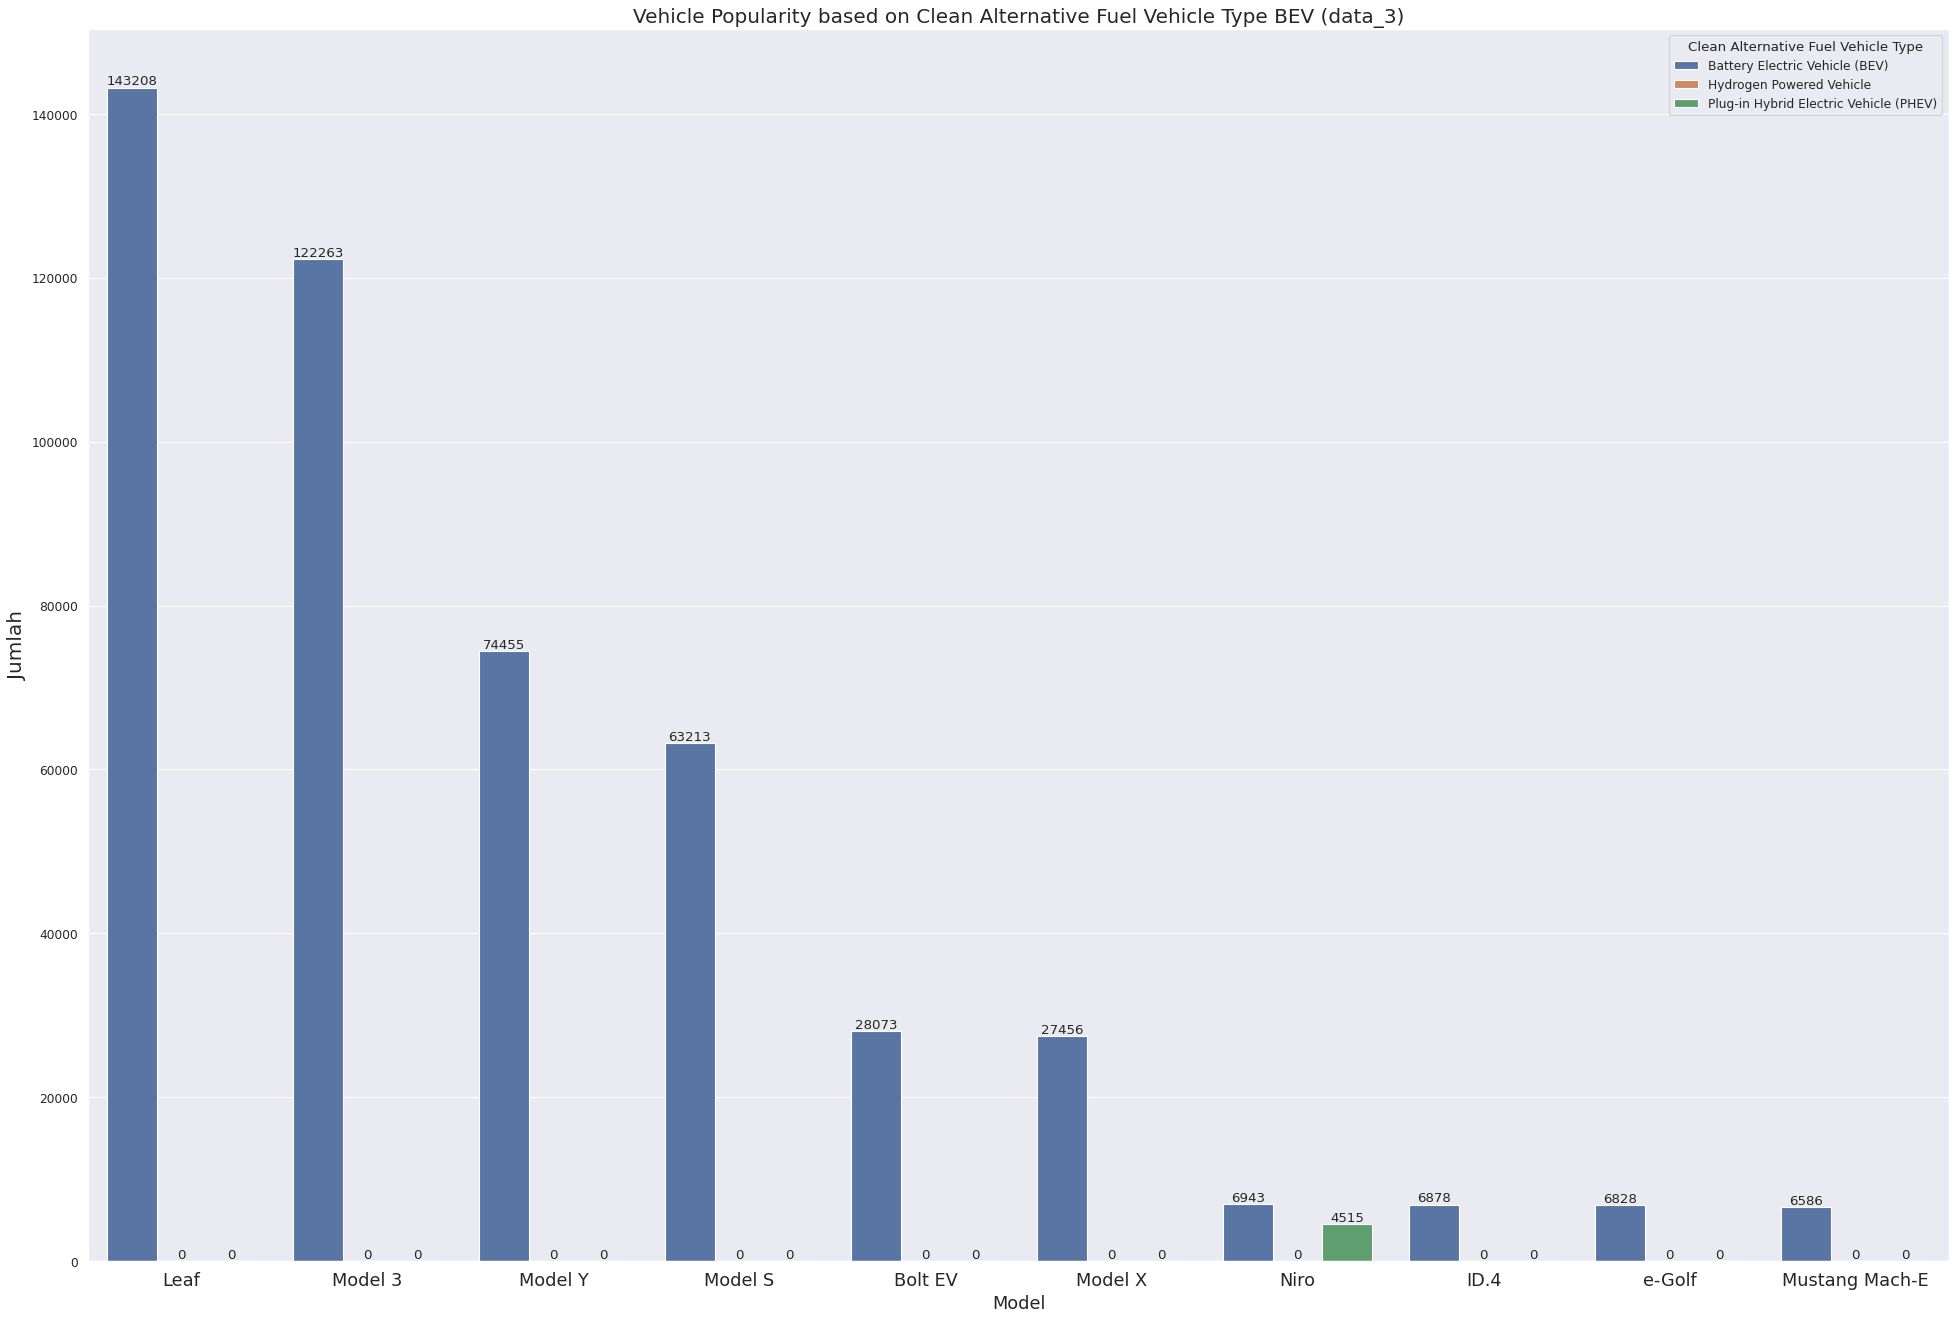

In [ ]:
tes = pd.crosstab(data_3['Model'],data_3['Clean Alternative Fuel Vehicle Type'])
tes = tes.sort_values(by='Battery Electric Vehicle (BEV)', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Model')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Model', y = 'value', hue = 'Clean Alternative Fuel Vehicle Type')

plt.title('Vehicle Popularity based on Clean Alternative Fuel Vehicle Type BEV (data_3)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data_3['Clean Alternative Fuel Vehicle Type'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

In [ ]:
print("Didapat top 10 mobil dengan tipe CFAH BEV paling banyak adalah: ", list(tes['Model'][:10]))

Didapat top 10 mobil dengan tipe CFAH BEV paling banyak adalah:  ['Leaf', 'Model 3', 'Model Y', 'Model S', 'Bolt EV', 'Model X', 'Niro', 'ID.4', 'e-Golf', 'Mustang Mach-E']


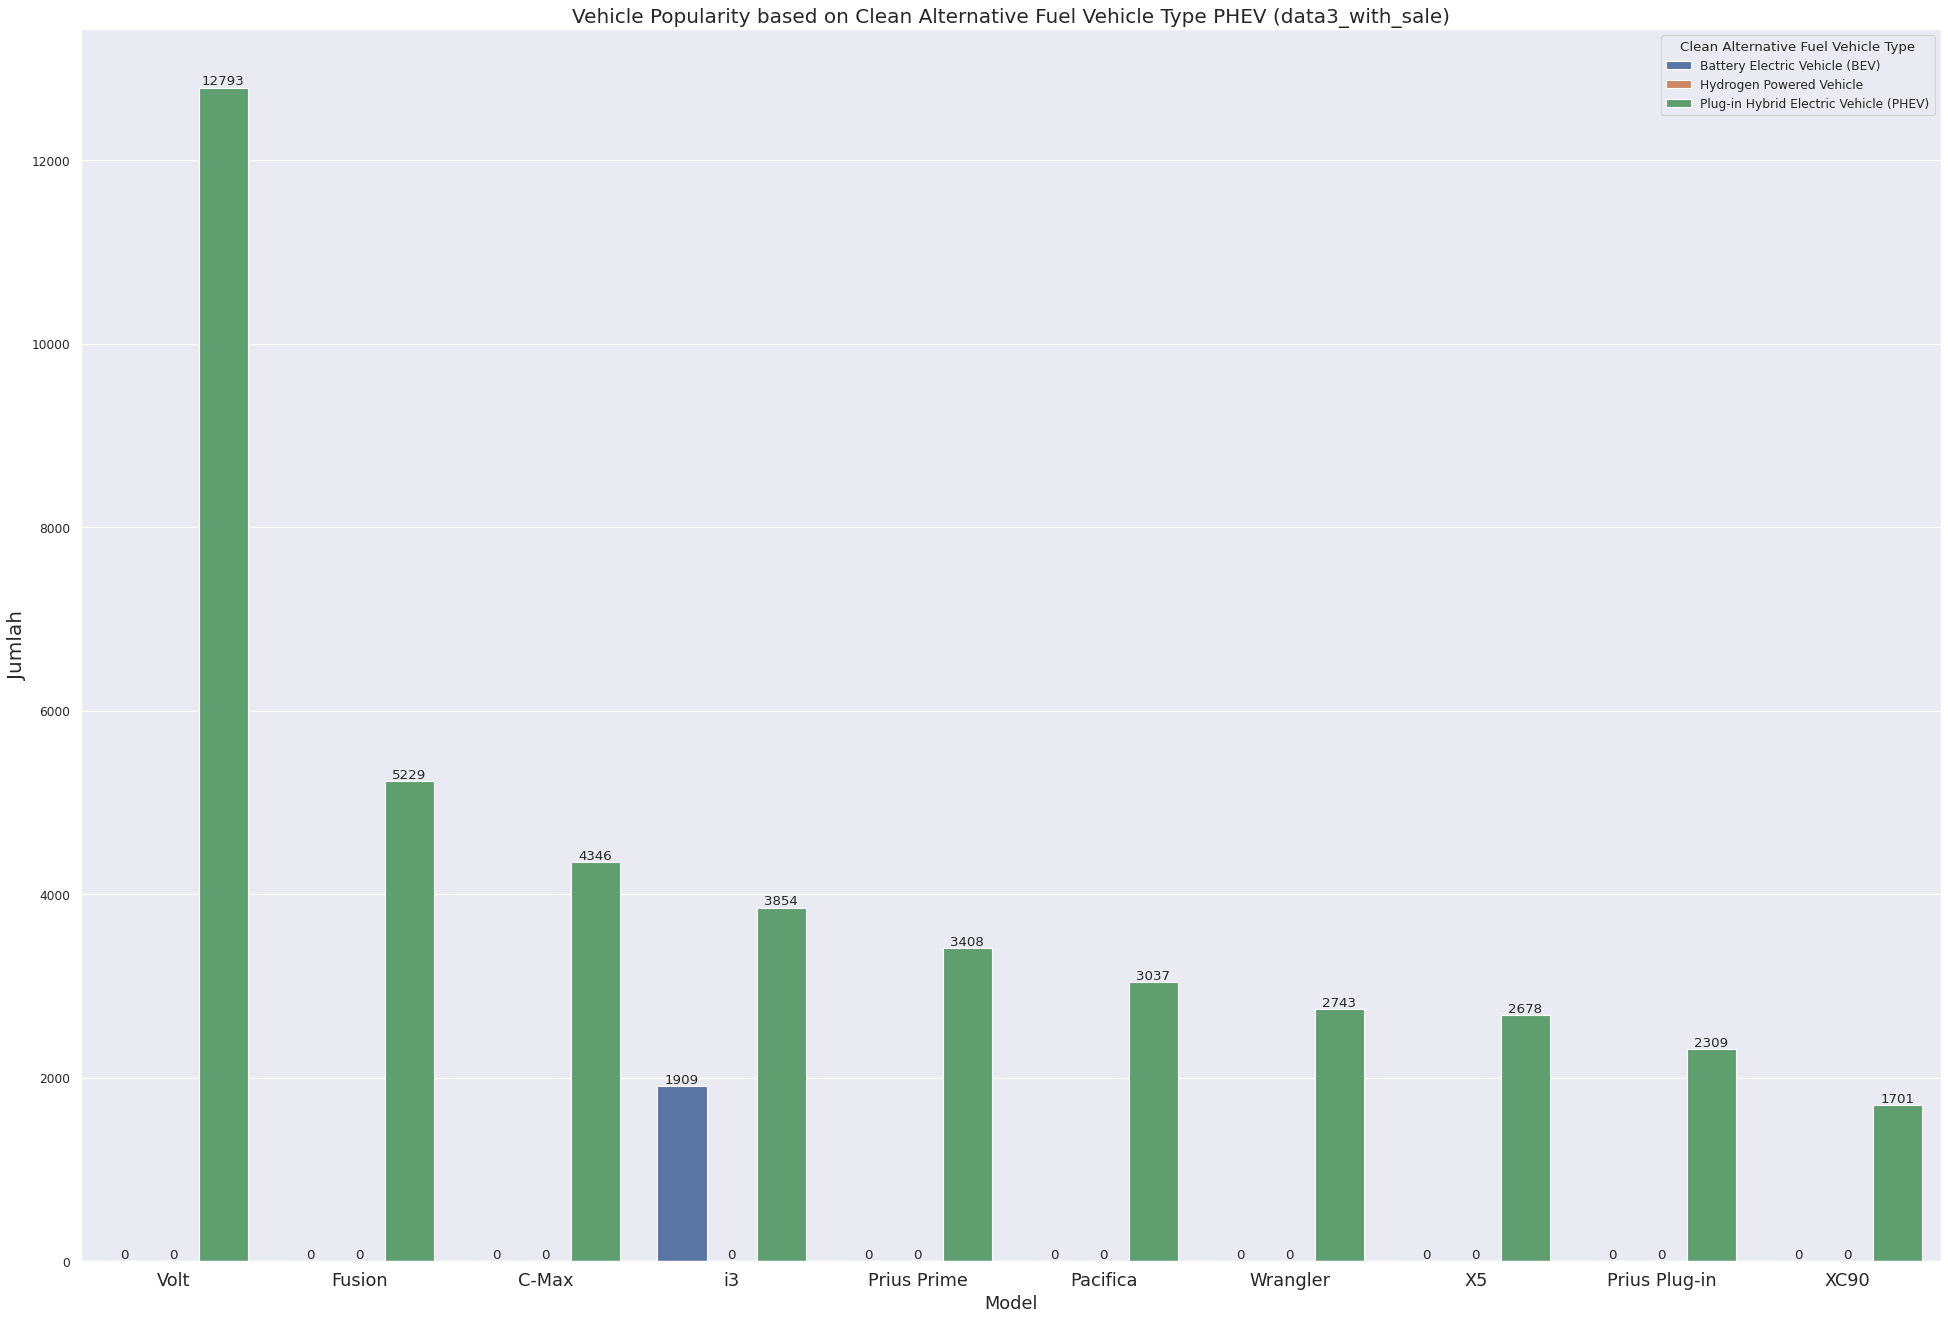

In [ ]:
tes = pd.crosstab(data3_with_sale['Model'],data3_with_sale['Clean Alternative Fuel Vehicle Type'])
tes = tes.sort_values(by='Plug-in Hybrid Electric Vehicle (PHEV)', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Model')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Model', y = 'value', hue = 'Clean Alternative Fuel Vehicle Type')

plt.title('Vehicle Popularity based on Clean Alternative Fuel Vehicle Type PHEV (data3_with_sale)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data3_with_sale['Clean Alternative Fuel Vehicle Type'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

In [ ]:
print("Didapat top 10 mobil dengan tipe CFAH PHEV paling banyak adalah: ", list(tes['Model'][:10]))

Didapat top 10 mobil dengan tipe CFAH PHEV paling banyak adalah:  ['Volt', 'Fusion', 'C-Max', 'i3', 'Prius Prime', 'Pacifica', 'Wrangler', 'X5', 'Prius Plug-in', 'XC90']


## VIN (1-10) kolom


In [ ]:
VIN = pd.DataFrame(data_3['VIN (1-10)'].value_counts())
VIN = VIN.reset_index()
VIN.index.nunique()

9577

## DOL Vehicle ID

In [ ]:
DOL_vehicleID = pd.DataFrame(data_3['DOL Vehicle ID'].value_counts())
DOL_vehicleID = DOL_vehicleID.reset_index()
DOL_vehicleID.index.nunique()

170985

## Model Year

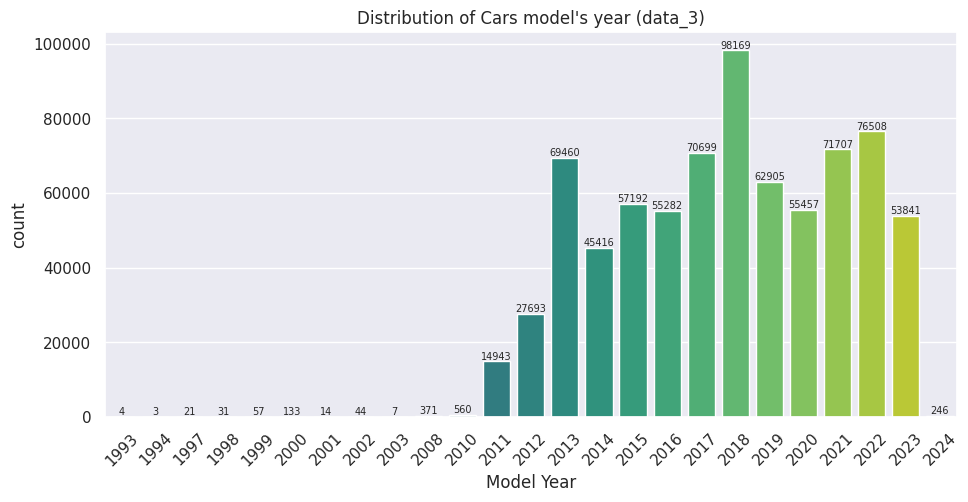

In [ ]:
fig, ax = plt.subplots(figsize = (11, 5))

sns.countplot(data = data_3, x = 'Model Year', palette = 'viridis')

plt.title("Distribution of Cars model's year (data_3)")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fontsize = 7)
plt.show()

## Make

In [ ]:
data_3.Make.unique()

array(['TESLA', 'FORD', 'TOYOTA', 'WHEEGO ELECTRIC CARS', 'CHEVROLET',
       'NISSAN', 'SMART', 'DODGE', 'AZURE DYNAMICS', 'MITSUBISHI',
       'FISKER', 'TH!NK', 'HONDA', 'FIAT', 'PORSCHE', 'CADILLAC', 'BMW',
       'MERCEDES-BENZ', 'VOLKSWAGEN', 'PLYMOUTH', 'KIA', 'HYUNDAI',
       'AUDI', 'VOLVO', 'CHRYSLER', 'MINI', 'BUBBLE BUDDY', 'JAGUAR',
       'SUBARU', 'LAND ROVER', 'LINCOLN', 'BENTLEY', 'POLESTAR', 'JEEP',
       'RIVIAN', 'LUCID', 'LEXUS', 'GENESIS', 'MAZDA'], dtype=object)

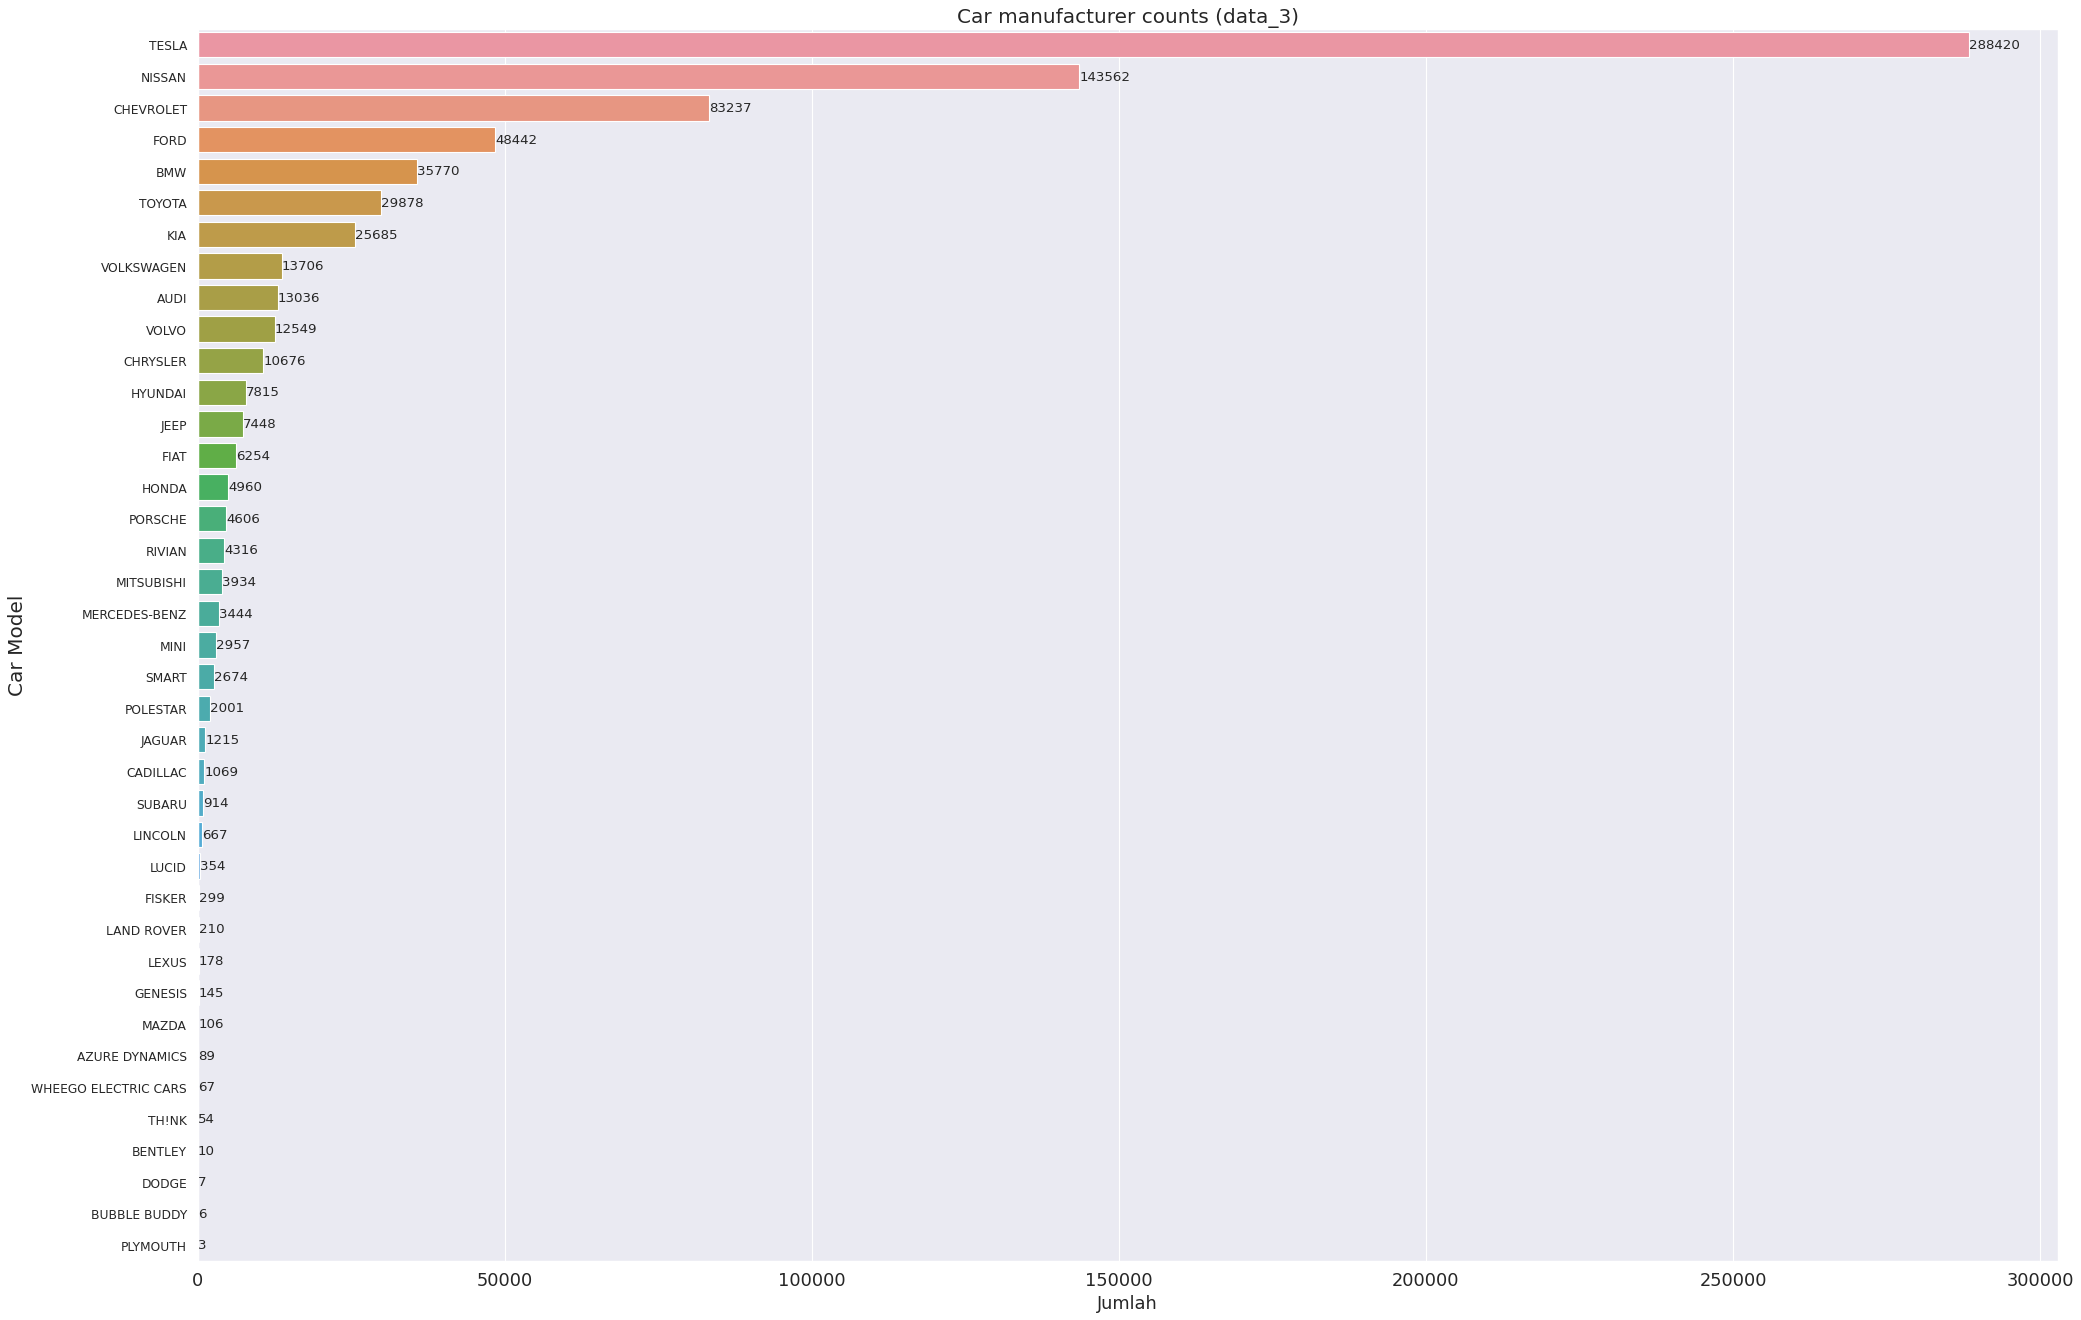

In [ ]:
Car_make = pd.DataFrame(data_3['Make'].value_counts())
Car_make.index = Car_make.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(Car_make,y=Car_make.index,x='Make')

plt.title('Car manufacturer counts (data_3)', fontsize=18)
plt.ylabel('Car Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
print("Didapat top 10 manufaktur terbanyak: ", list(Car_make.index[:10]))

Didapat top 10 manufaktur terbanyak:  ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'TOYOTA', 'KIA', 'VOLKSWAGEN', 'AUDI', 'VOLVO']


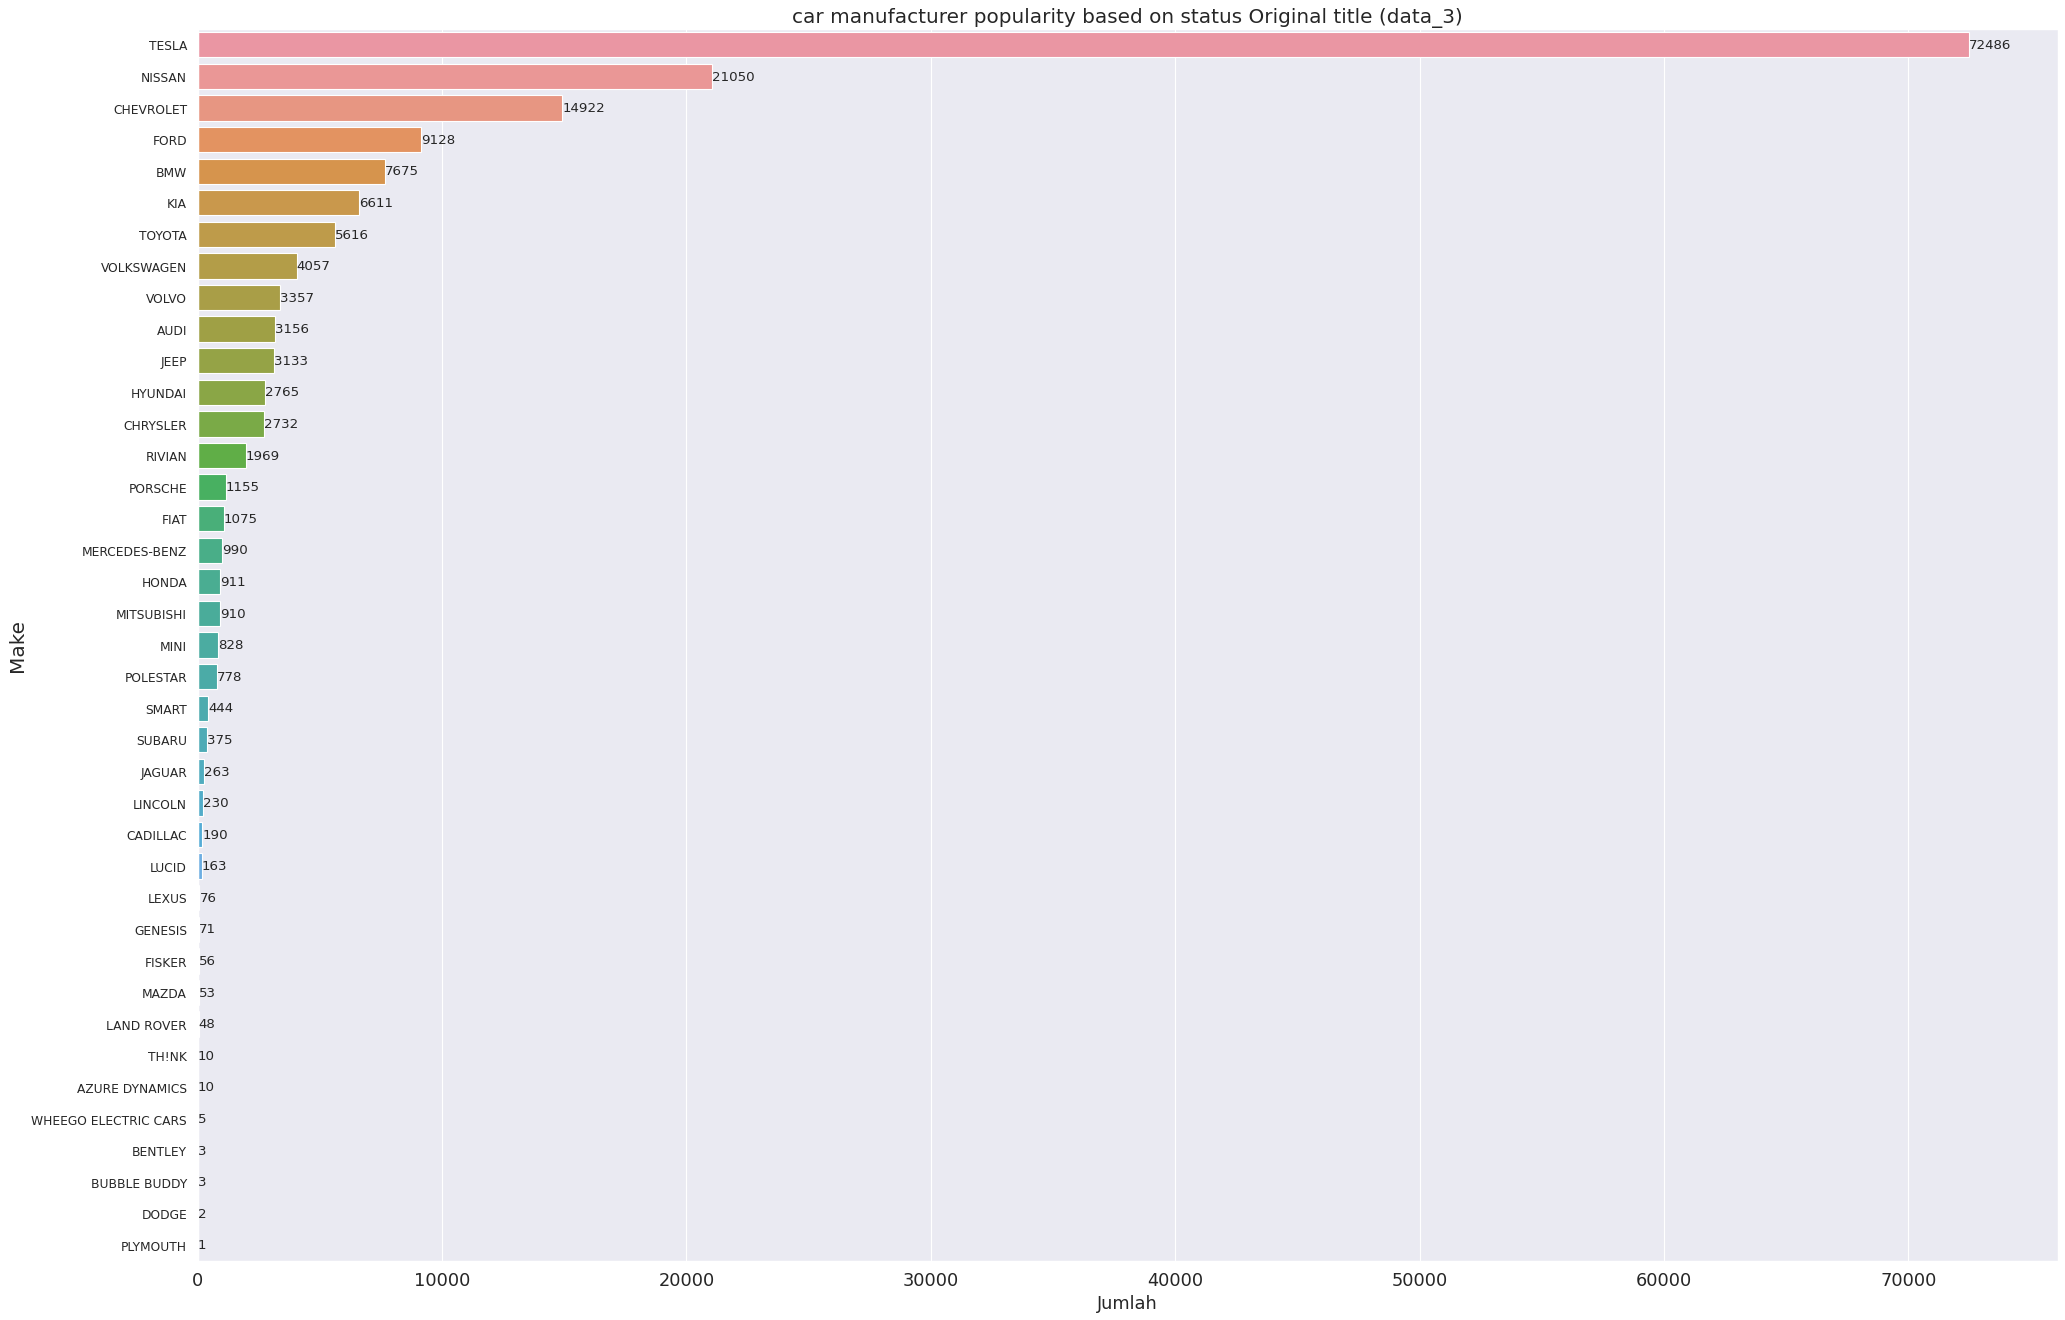


TOP 10 Make Popularity Based on Original Title status (data_3):  ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'AUDI']


In [ ]:
hasil_popularitas = pd.DataFrame(data_3[data_3['Transaction Type'] == 'Original Title']['Make'].value_counts())
hasil_popularitas = hasil_popularitas.sort_values(by = 'Make', ascending = False)
fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas,y=hasil_popularitas.index,x='Make')

plt.title('car manufacturer popularity based on status Original title (data_3)', fontsize=18)
plt.ylabel('Make', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

Make_populer_Based_OriTitle_datawithsale = list(hasil_popularitas.head(10).index)
print()
print("TOP 10 Make Popularity Based on Original Title status (data_3): ", Make_populer_Based_OriTitle_datawithsale)

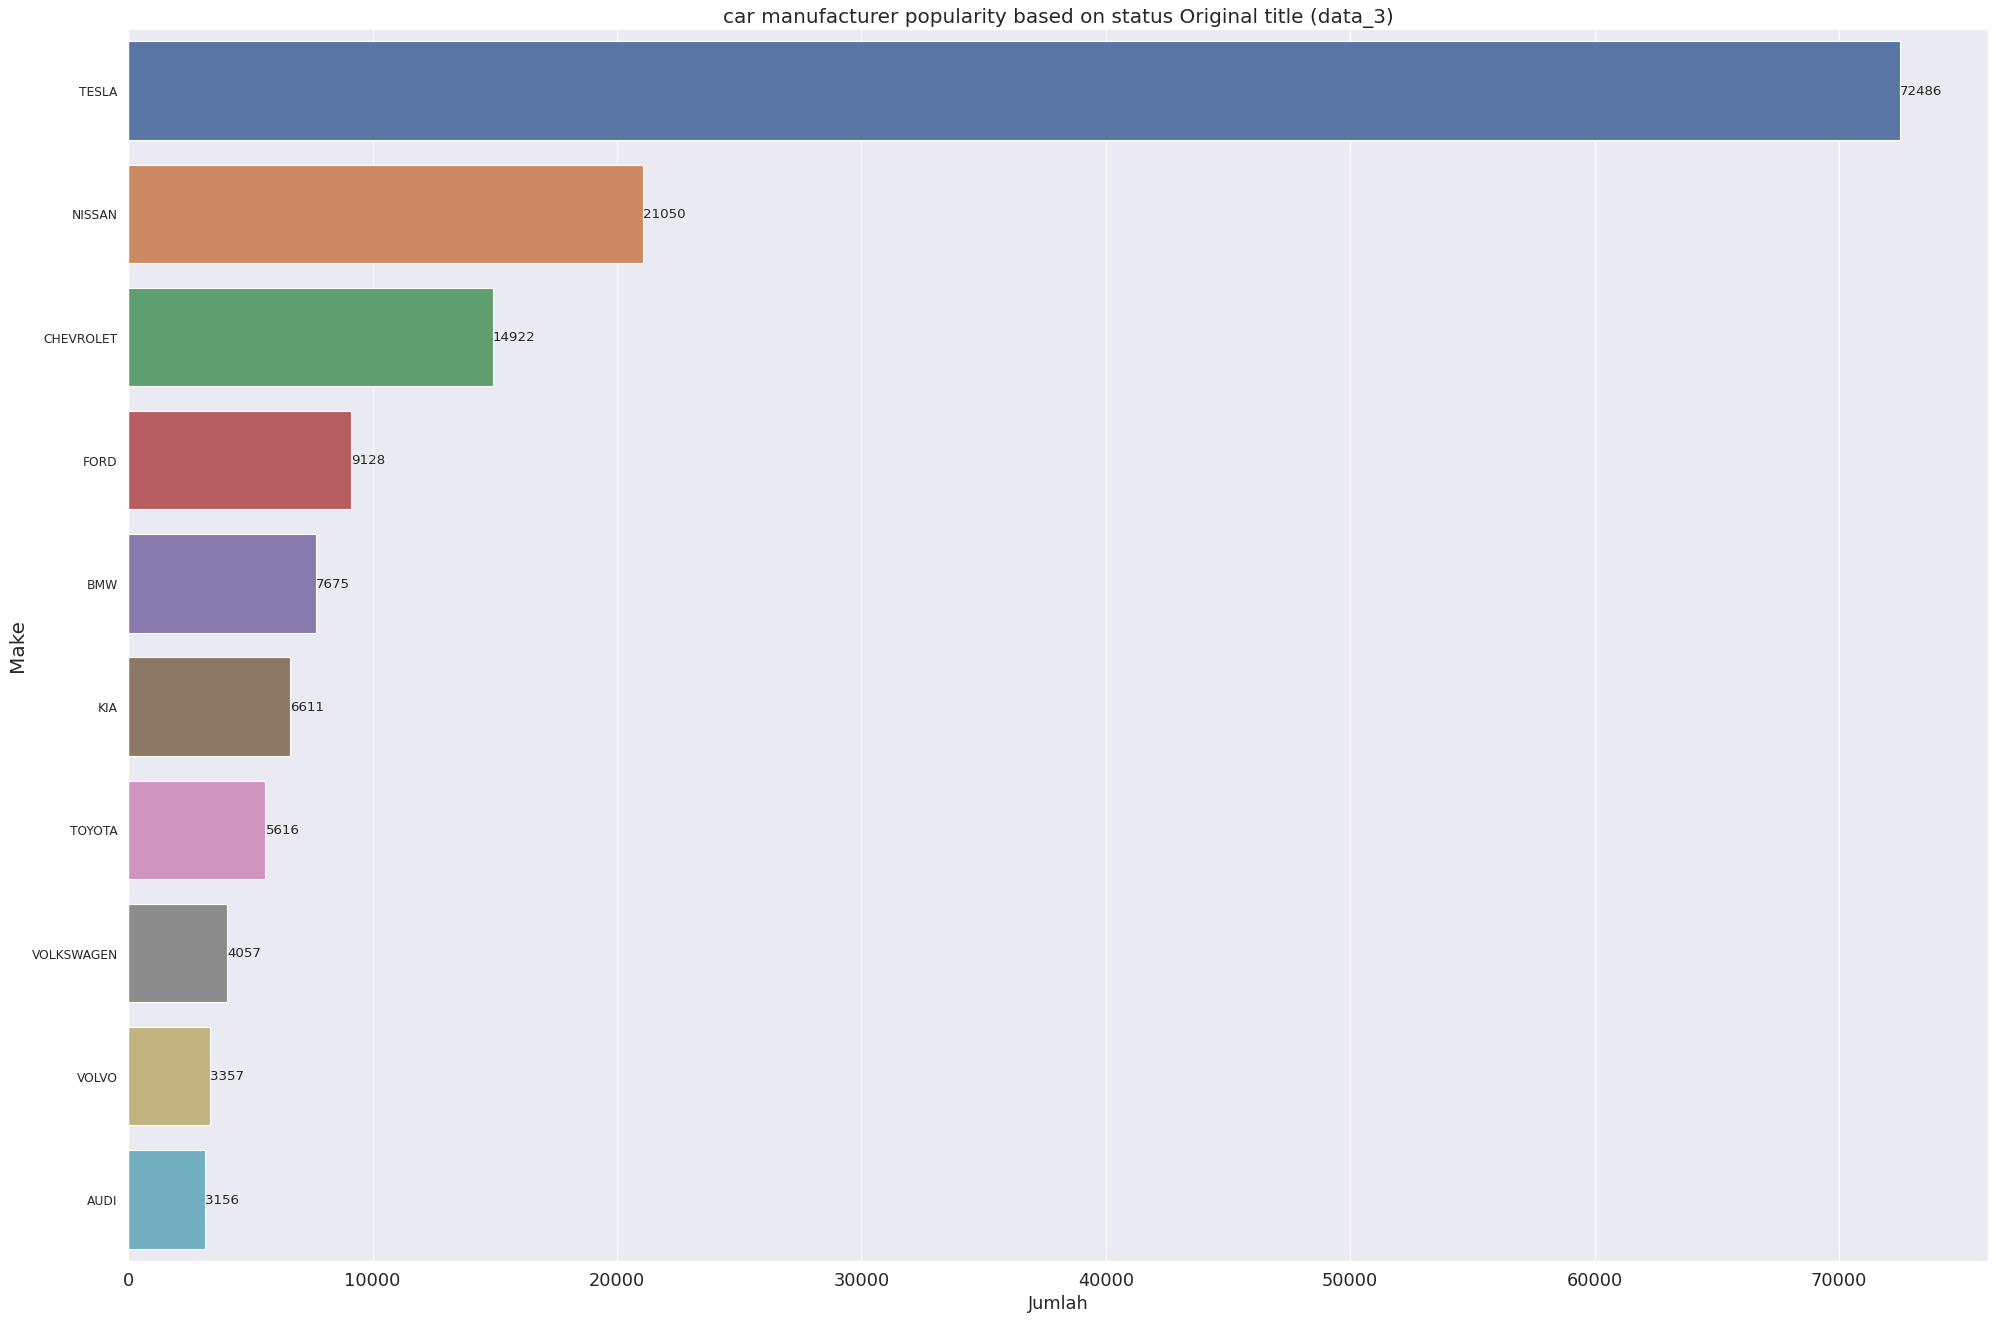

In [ ]:
hasil_popularitas = pd.DataFrame(data_3[data_3['Transaction Type'] == 'Original Title']['Make'].value_counts())
hasil_popularitas = hasil_popularitas.sort_values(by = 'Make', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas,y=hasil_popularitas.index,x='Make')

plt.title('car manufacturer popularity based on status Original title (data_3)', fontsize=18)
plt.ylabel('Make', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()


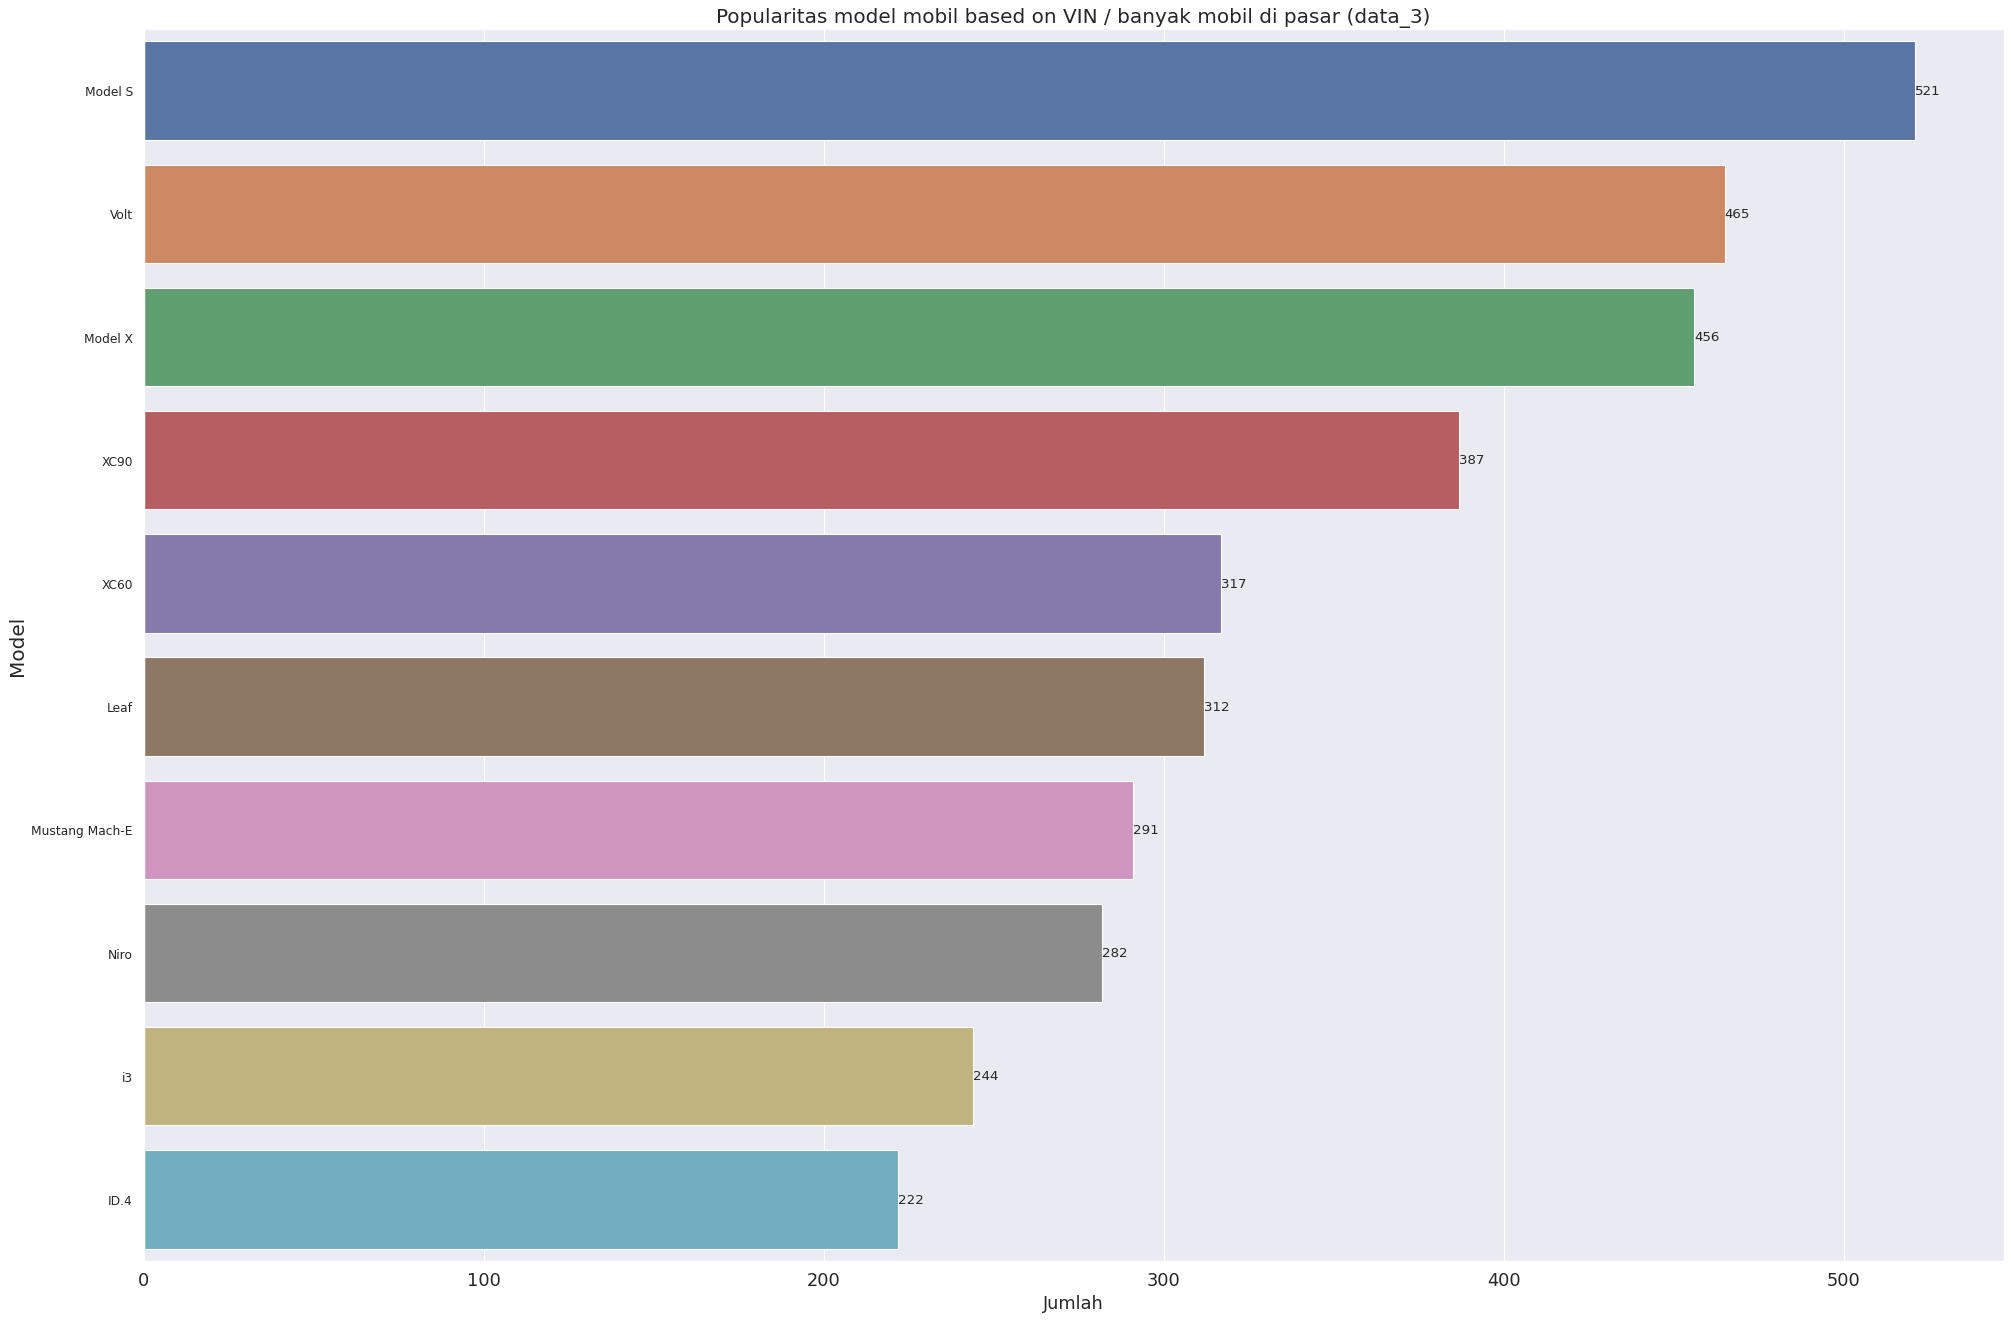

In [ ]:
populer_mobil = []
for i in data_3['Model'].unique():
  jumlah = data_3[data_3['Model'] == i]['VIN (1-10)'].nunique()
  row = [i, jumlah]
  populer_mobil.append(row)

hasil_popularitas_vin = pd.DataFrame(populer_mobil, columns=['Model', 'VIN/banyak mobil terjual'])
hasil_popularitas_vin = hasil_popularitas_vin.sort_values(by = 'VIN/banyak mobil terjual', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas_vin,y='Model',x='VIN/banyak mobil terjual')

plt.title('Popularitas model mobil based on VIN / banyak mobil di pasar (data_3)', fontsize=18)
plt.ylabel('Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()


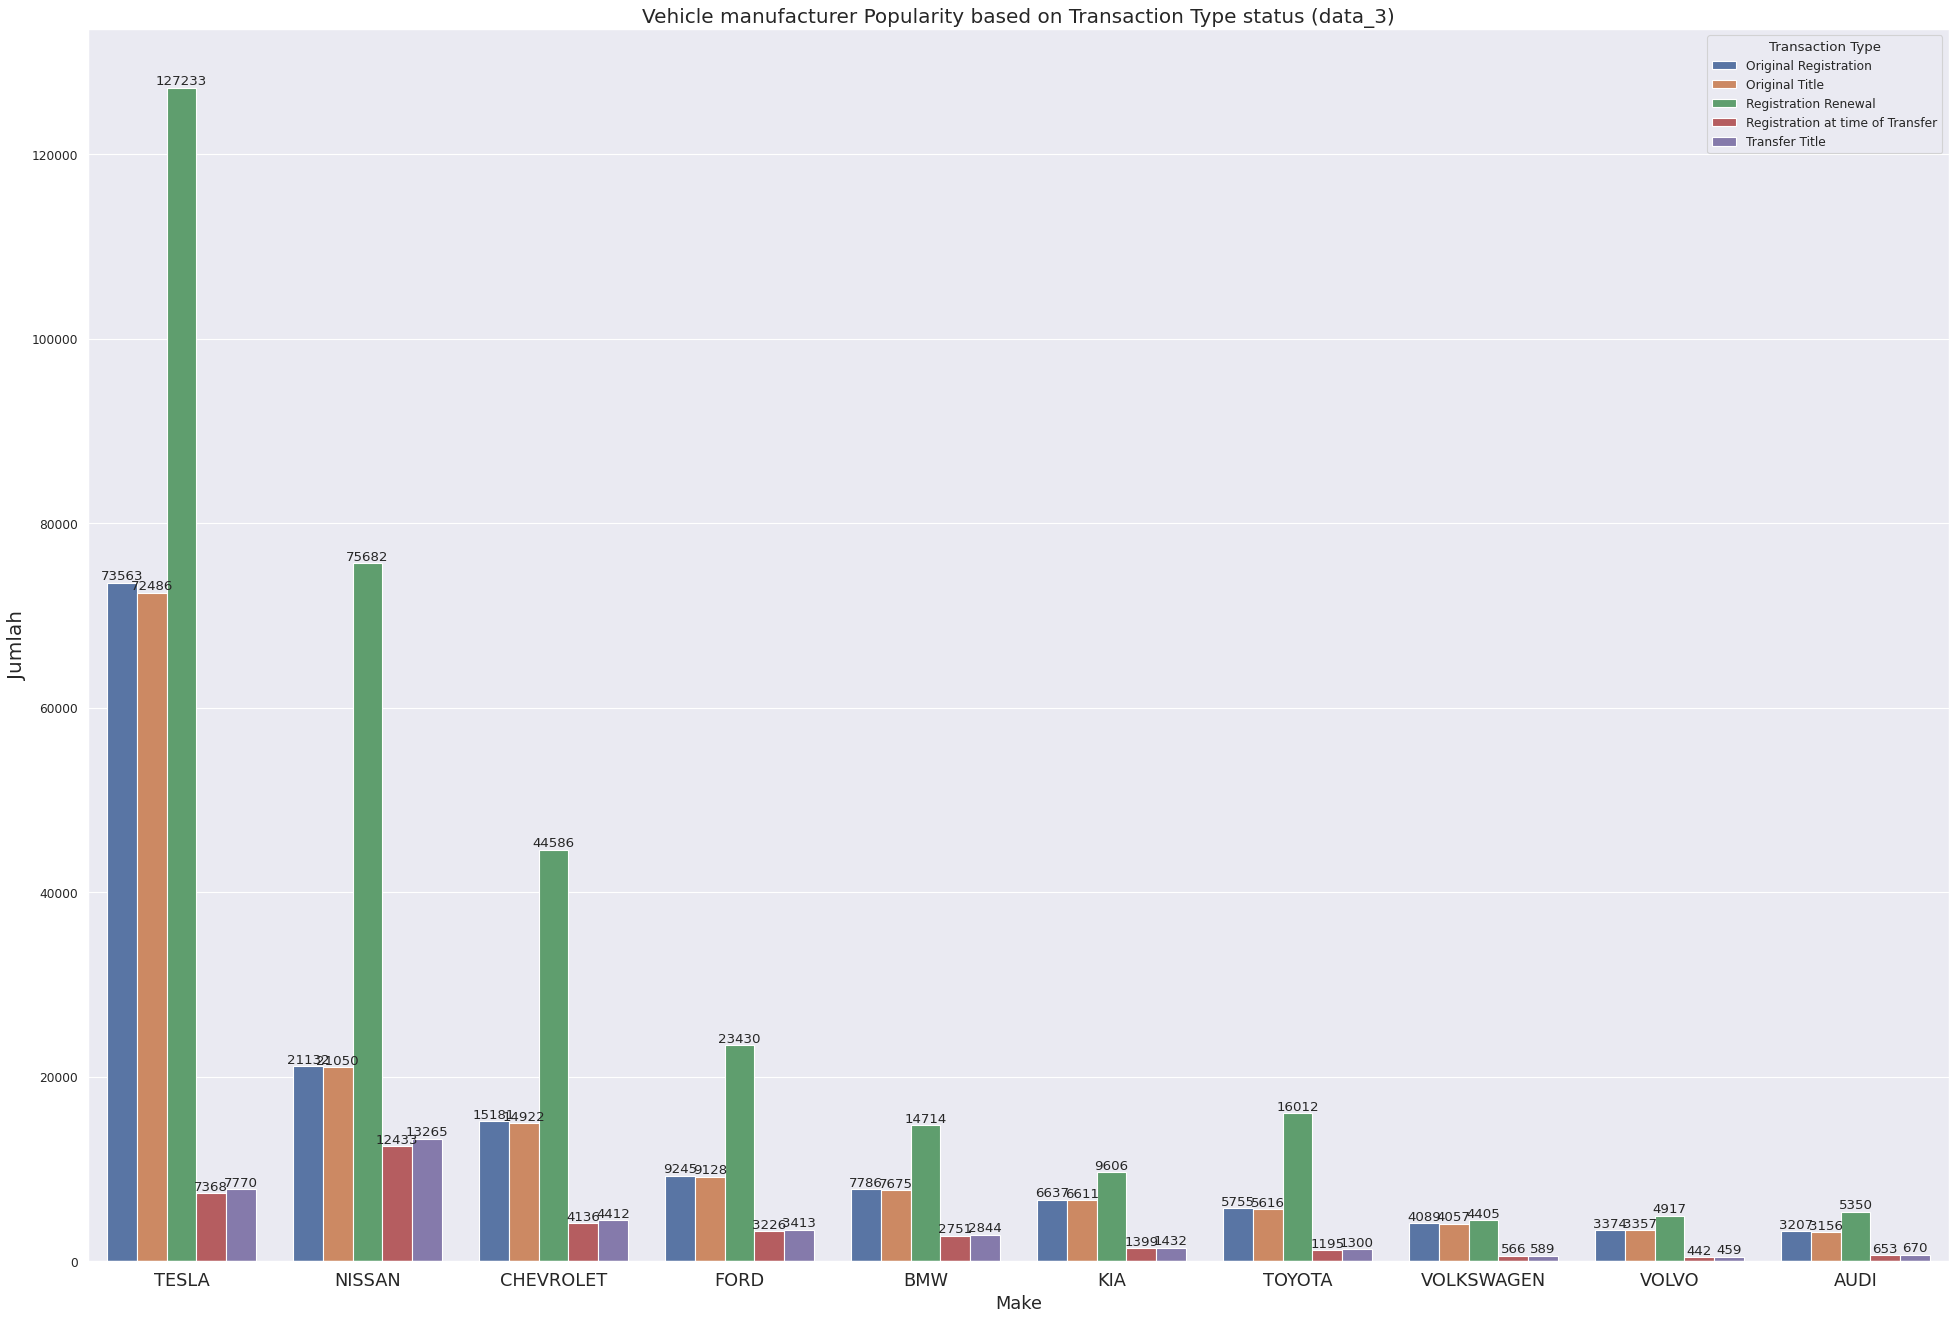

In [ ]:
tes = pd.crosstab(data_3['Make'],data_3['Transaction Type'])
tes = tes.sort_values(by='Original Title', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Make')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Make', y = 'value', hue = 'Transaction Type')

plt.title('Vehicle manufacturer Popularity based on Transaction Type status (data_3)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Make', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data_3['Transaction Type'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

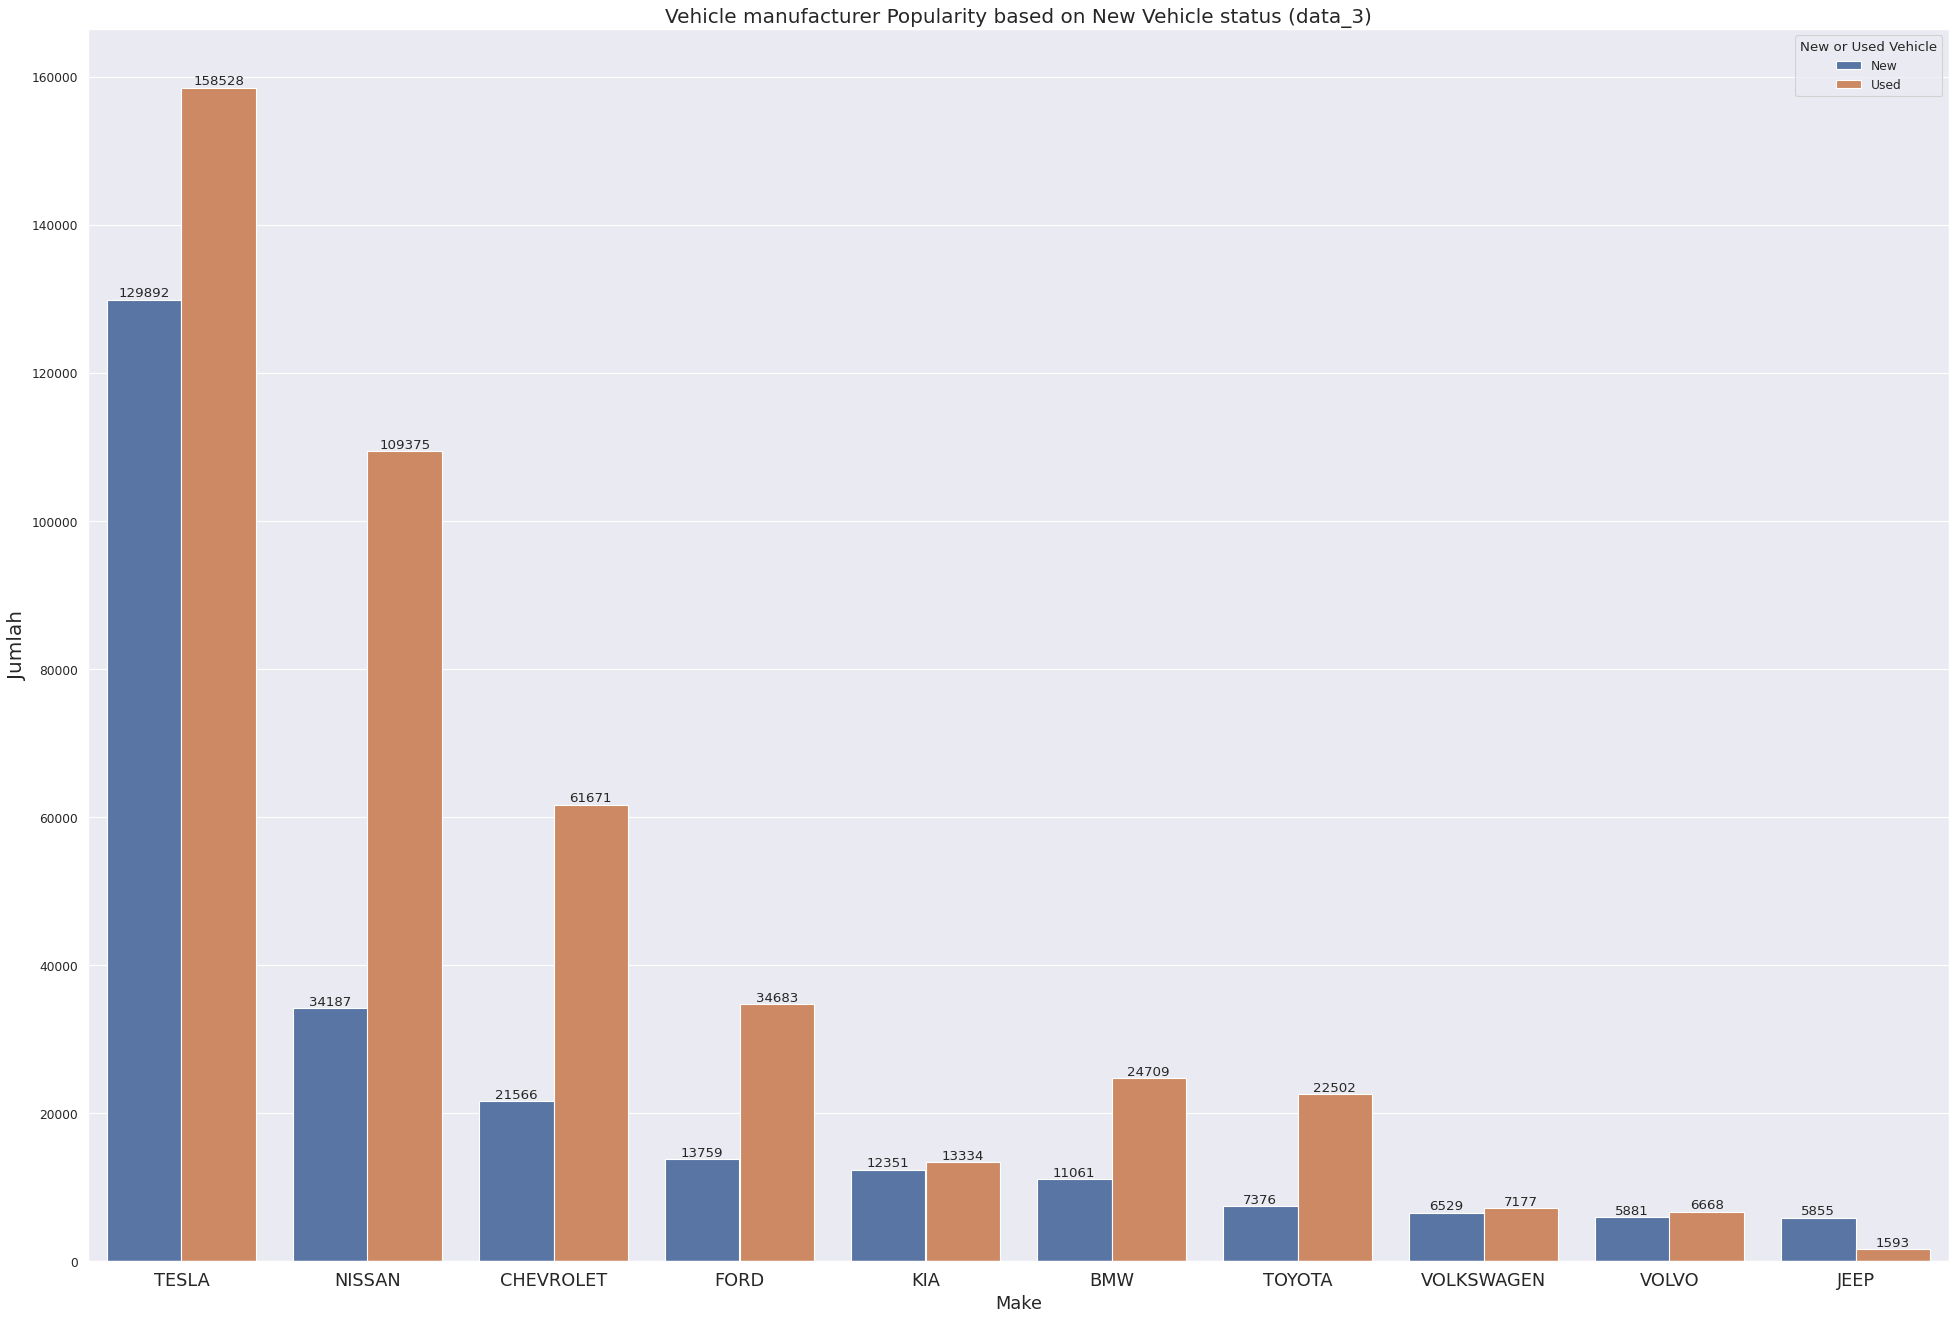

In [ ]:
tes = pd.crosstab(data_3['Make'],data_3['New or Used Vehicle'])
tes = tes.sort_values(by='New', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Make')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Make', y = 'value', hue = 'New or Used Vehicle')

plt.title('Vehicle manufacturer Popularity based on New Vehicle status (data_3)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Make', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data_3['New or Used Vehicle'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

In [ ]:
print('Top 10 vehicle manufacturer based on New status',list(tes['Make'][:10]))

Top 10 vehicle manufacturer based on New status ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'KIA', 'BMW', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'JEEP']


## Model

In [ ]:
data_3.Model.unique()

array(['Roadster', 'Ranger', 'RAV4', 'Wheego', 'S-10 Pickup', 'Leaf',
       'Volt', 'Fortwo', 'Caravan', 'Transit Connect Electric', 'i-MiEV',
       'Karma', 'Prius Plug-in', 'City', 'Focus', 'Model S', 'C-Max',
       'Fusion', 'Accord', 'Fortwo Electric Drive', '500', 'Panamera',
       'ELR', 'i3', 'Spark', 'Fit', 'i8', 'B-Class', 'e-Golf', 'Cayenne',
       'Voyager', '918', 'Soul', 'Tucson', 'X5', 'Sonata', 'A3',
       'Model X', 'XC90', '330e', 'S-Class', 'Prius Prime', 'Bolt EV',
       '740e', 'GLE-Class', 'Optima', 'Soul EV', 'Ioniq', 'Pacifica',
       '530e', 'C-Class', 'Countryman', 'XC60', 'Bubble Buddy', 'Model 3',
       'Clarity', 'S90', 'Outlander', 'CT6', 'EQ Fortwo', 'Niro',
       'GLC-Class', 'I-PACE', 'Kona', 'e-tron', 'Crosstrek', '745e',
       'S60', 'Range Rover', 'Taycan', 'Range Rover Sport', 'Escape',
       'Q5 e', 'Aviator', 'Model Y', 'X3', 'Hardtop', 'V60', 'A8 e',
       'RAV4 Prime', 'e-tron Sportback', 'Bentayga', 'Mirai', 'PS2',
       'Kona Elec

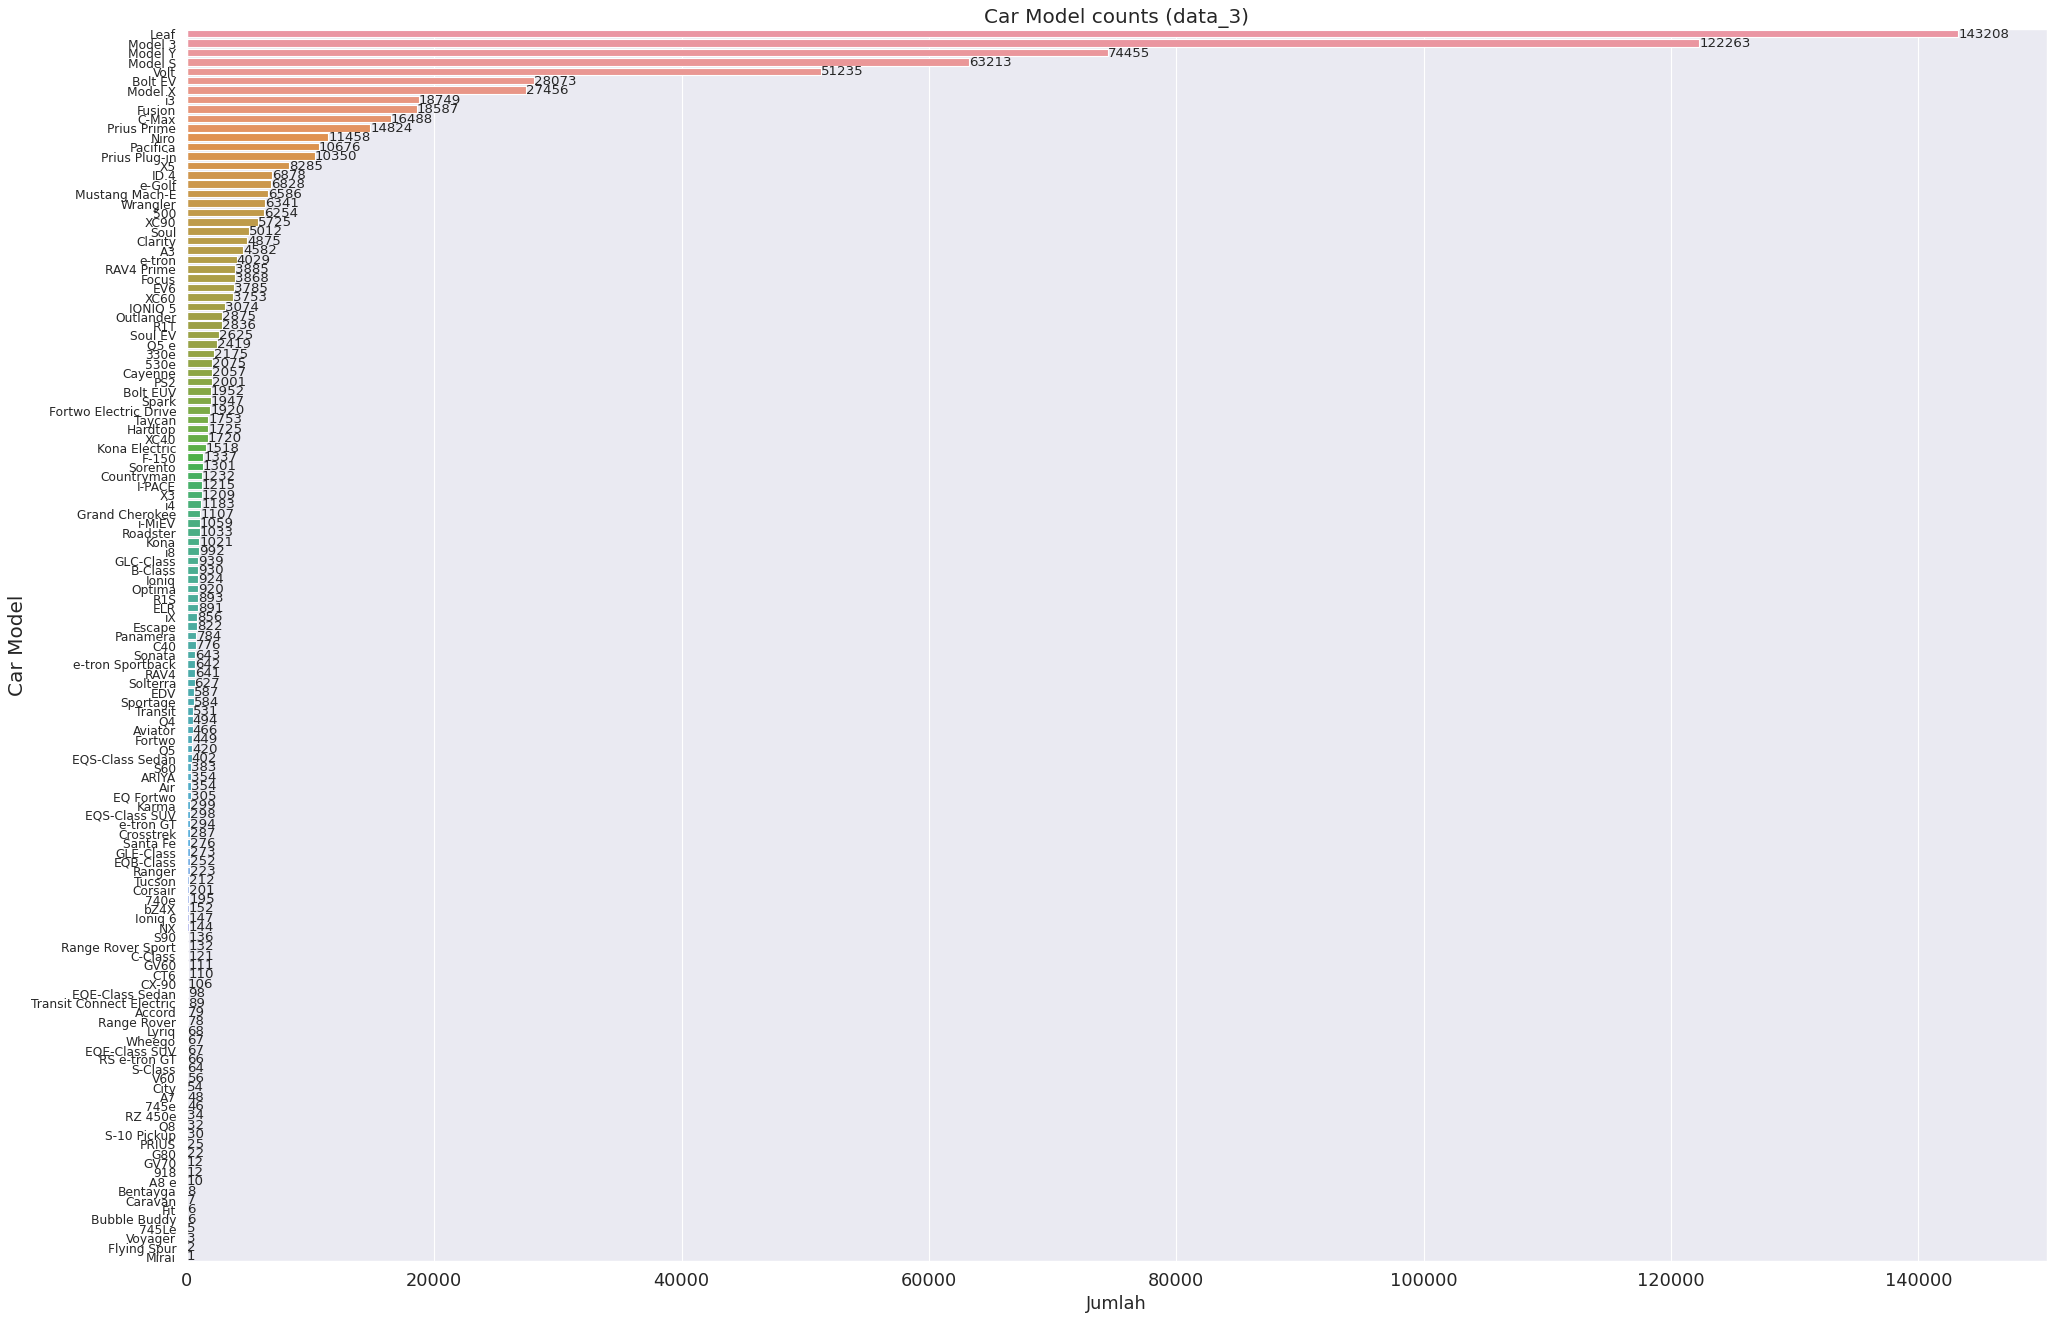

In [ ]:
Car_model = pd.DataFrame(data_3['Model'].value_counts())
Car_model.index = Car_model.index.astype(str)
fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(Car_model,y=Car_model.index,x='Model')

plt.title('Car Model counts (data_3)', fontsize=18)
plt.ylabel('Car Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
print("Top 10 Car Model: ", list(Car_model.index[:10]))

Top 10 Car Model:  ['Leaf', 'Model 3', 'Model Y', 'Model S', 'Volt', 'Bolt EV', 'Model X', 'i3', 'Fusion', 'C-Max']


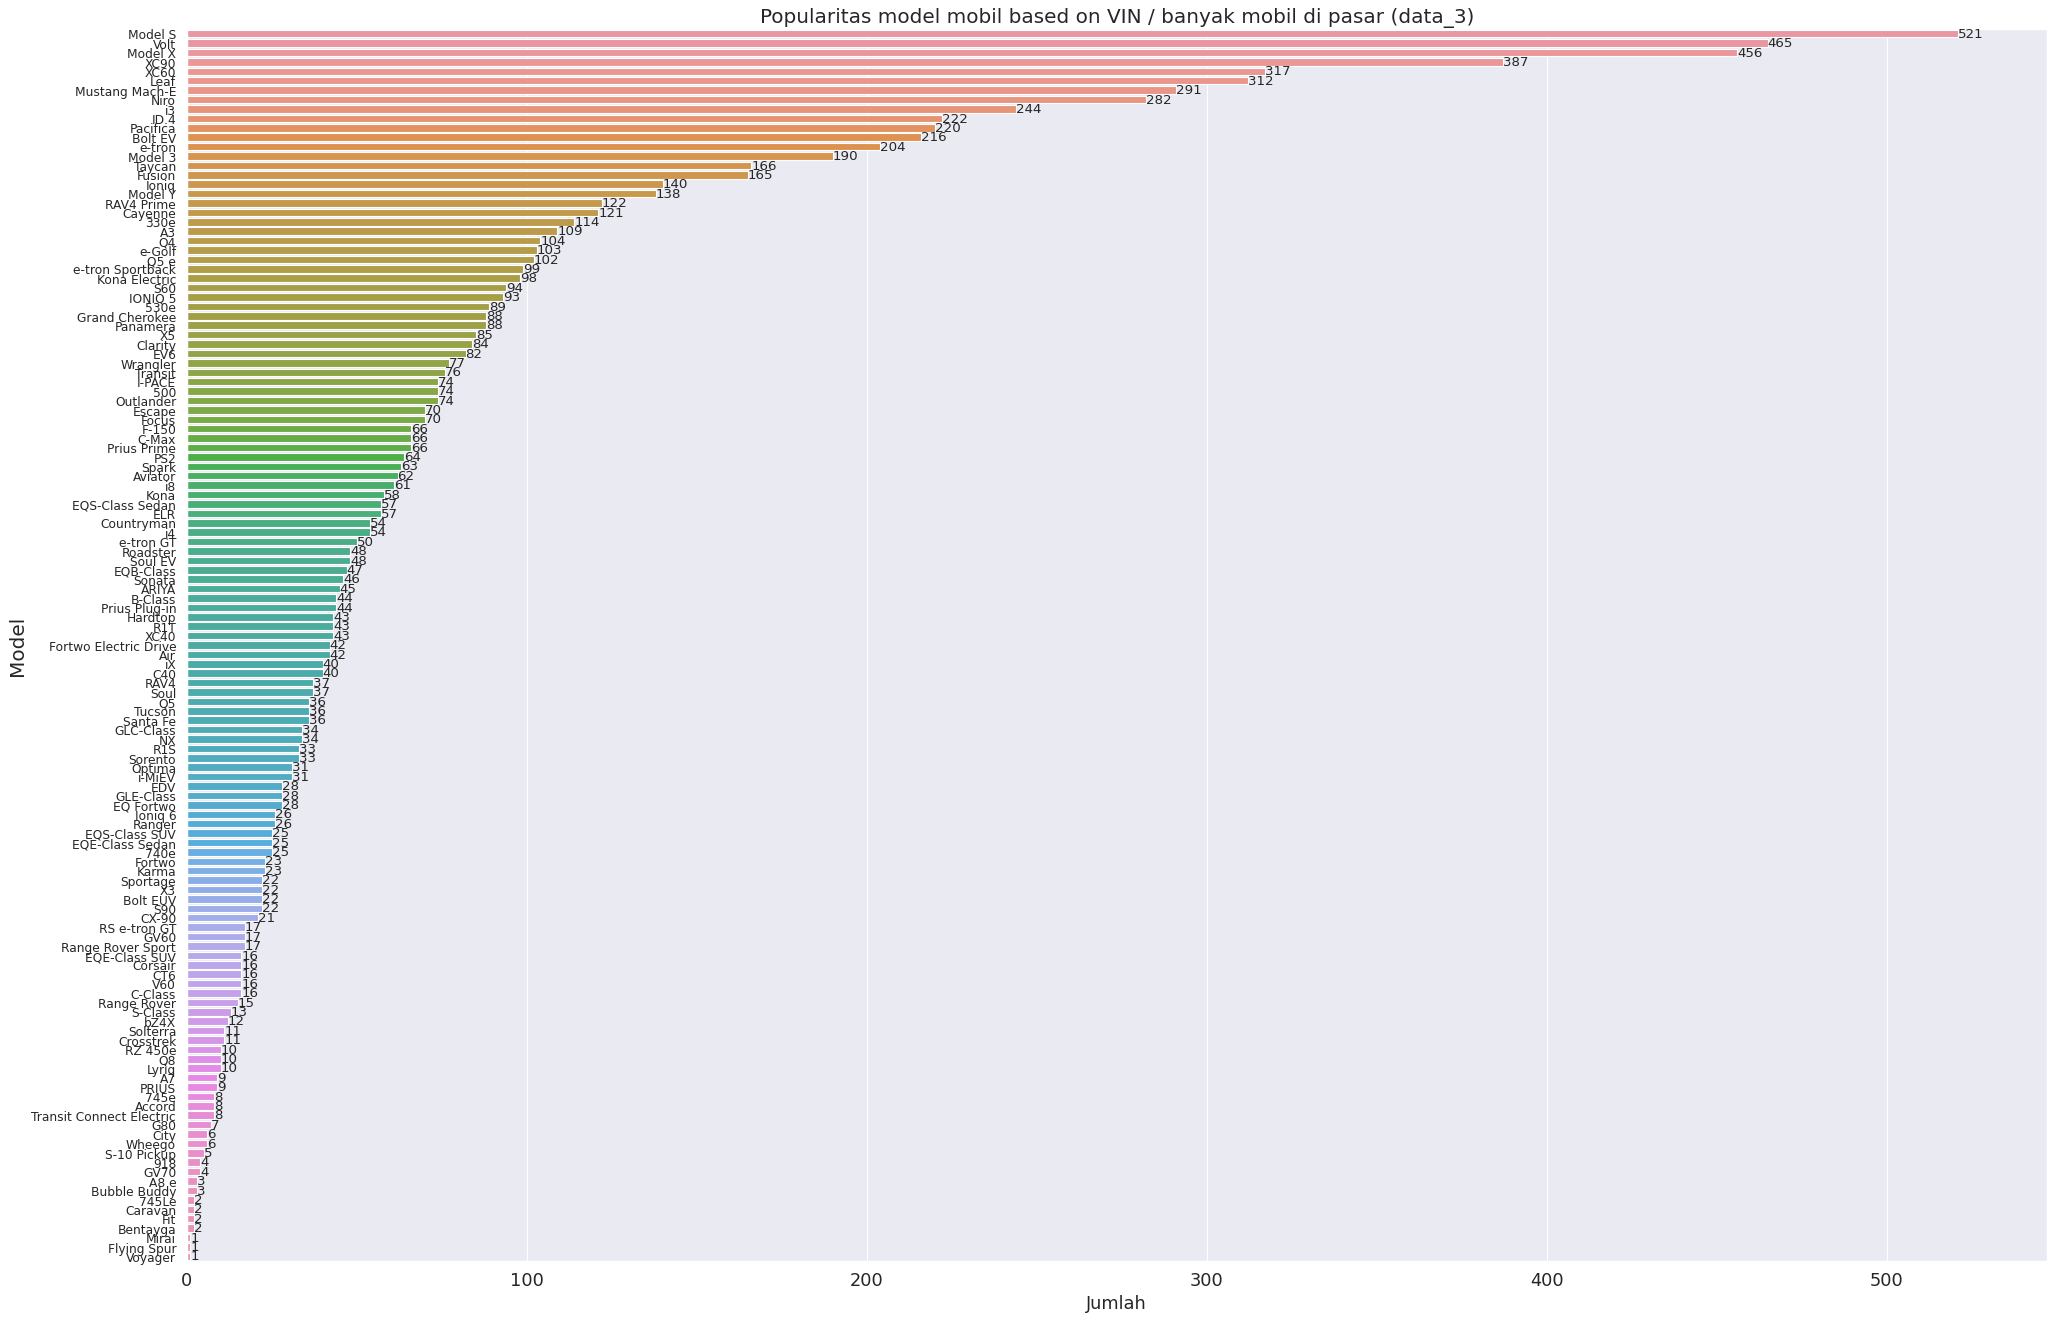

Didapat Top 10 nya:  ['Model S', 'Volt', 'Model X', 'XC90', 'XC60', 'Leaf', 'Mustang Mach-E', 'Niro', 'i3', 'ID.4']


In [ ]:
populer_mobil = []
for i in data_3['Model'].unique():
  jumlah = data_3[data_3['Model'] == i]['VIN (1-10)'].nunique()
  row = [i, jumlah]
  populer_mobil.append(row)

hasil_popularitas_vin = pd.DataFrame(populer_mobil, columns=['Model', 'VIN/banyak mobil terjual'])
hasil_popularitas_vin = hasil_popularitas_vin.sort_values(by = 'VIN/banyak mobil terjual', ascending = False)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas_vin,y='Model',x='VIN/banyak mobil terjual')

plt.title('Popularitas model mobil based on VIN / banyak mobil di pasar (data_3)', fontsize=18)
plt.ylabel('Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

vin_top10_model = list(hasil_popularitas_vin['Model'][:10])
#Alasan VIN adalah, karena A VIN displays the car's unique features, specifications, and manufacturer. berarti banyak mobil yang terjual
print("Didapat Top 10 nya: ", vin_top10_model)

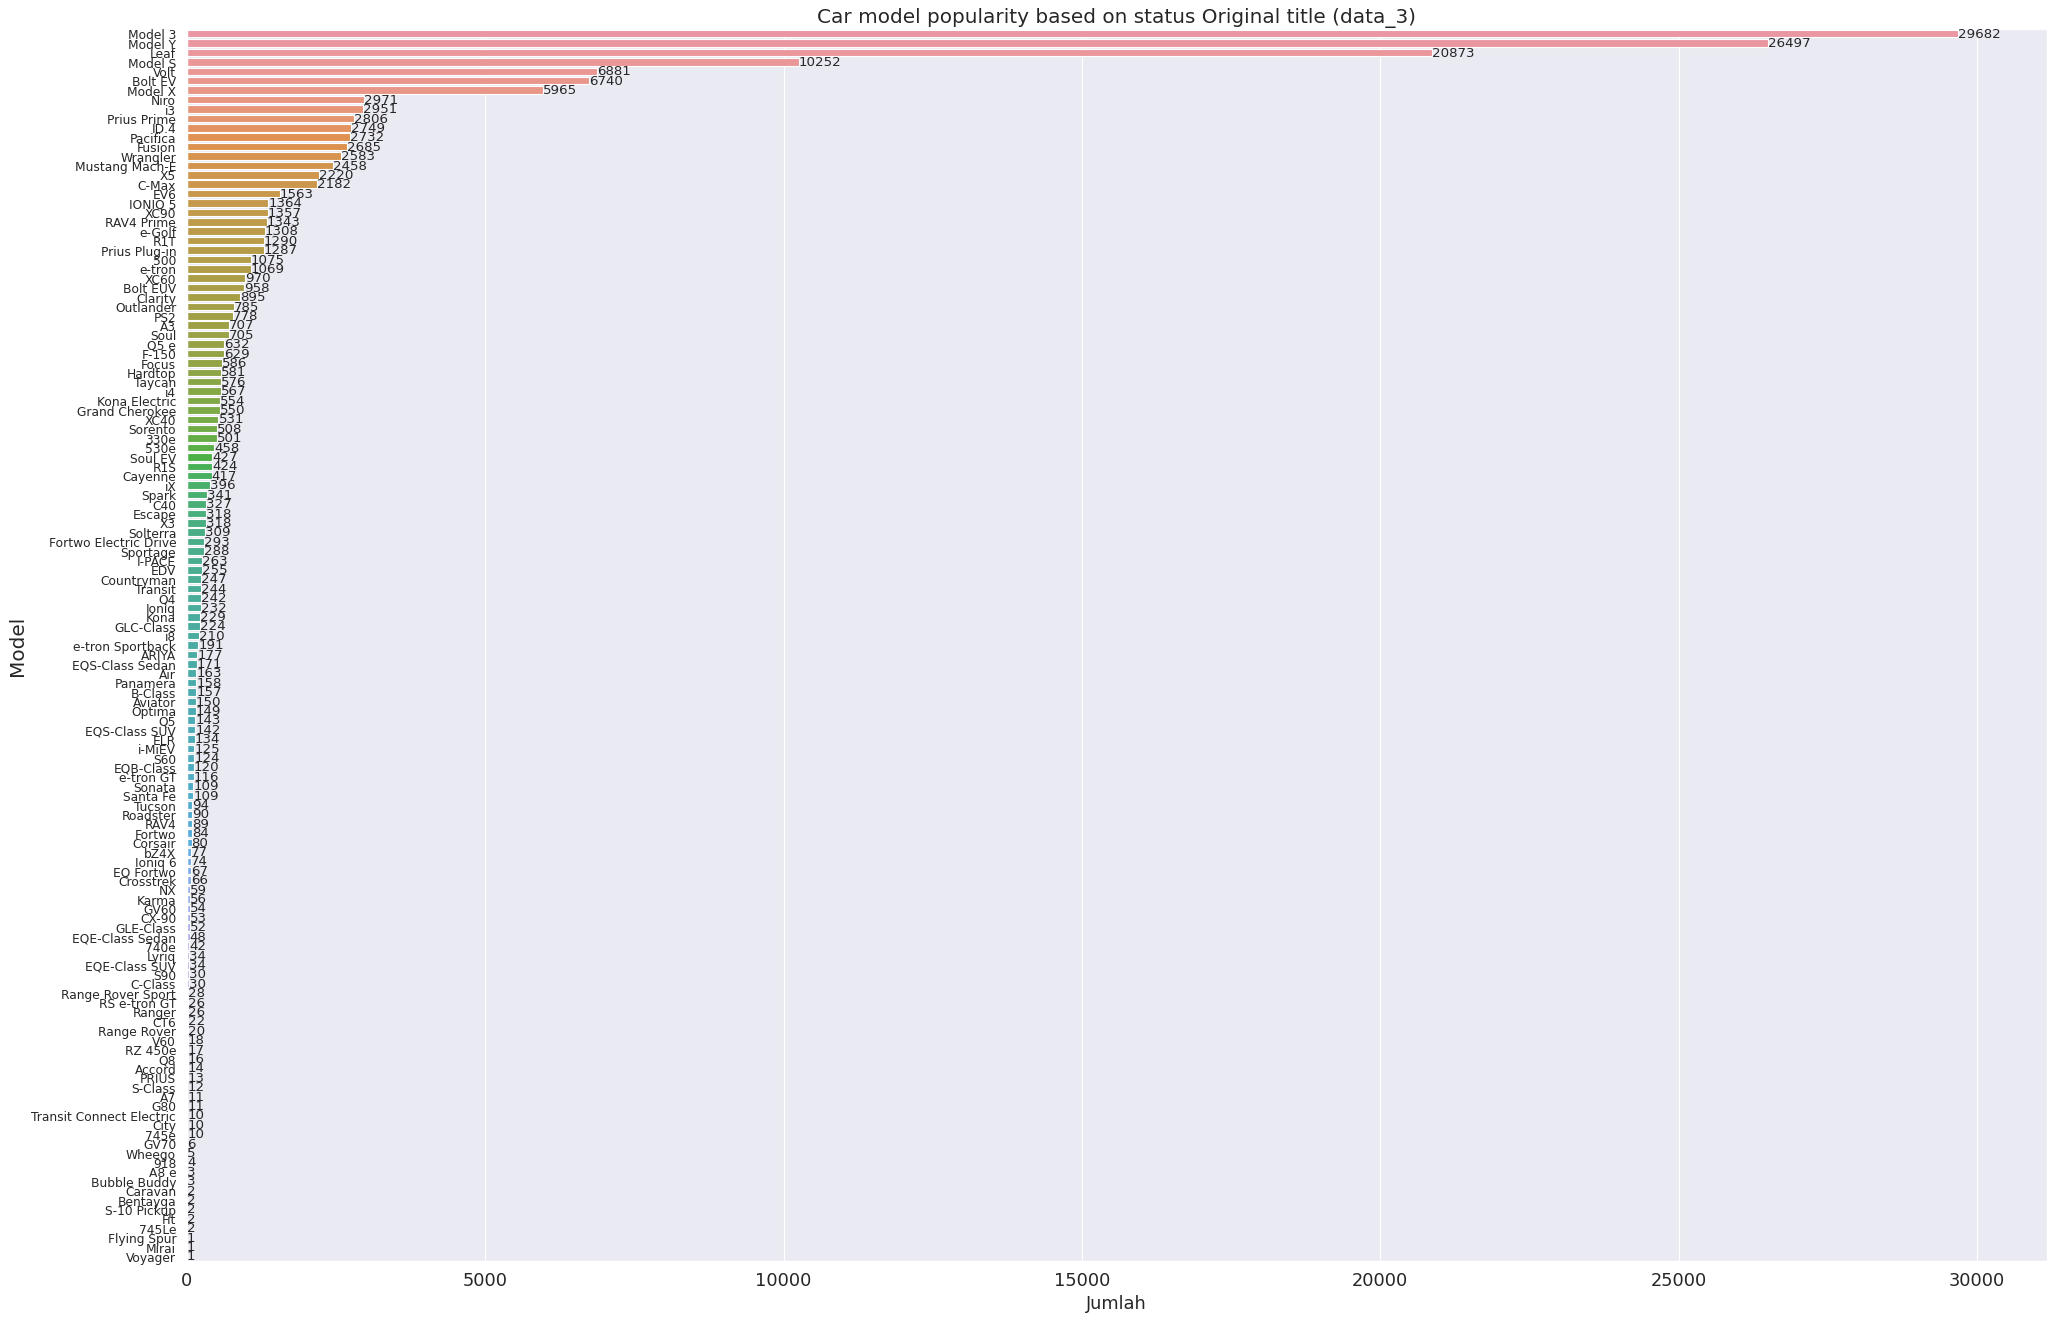

Didapat Top 10 nya:  ['Model 3', 'Model Y', 'Leaf', 'Model S', 'Volt', 'Bolt EV', 'Model X', 'Niro', 'i3', 'Prius Prime']


In [ ]:
##Tentuin data ygg mana

hasil_popularitas = pd.DataFrame(data_3[data_3['Transaction Type'] == 'Original Title']['Model'].value_counts())
hasil_popularitas = hasil_popularitas.sort_values(by = 'Model', ascending = False)
fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas,y=hasil_popularitas.index,x='Model')

plt.title('Car model popularity based on status Original title (data_3)', fontsize=18)
plt.ylabel('Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

originaltitle_top10model = list(hasil_popularitas.index[:10])
print("Didapat Top 10 nya: ", originaltitle_top10model)

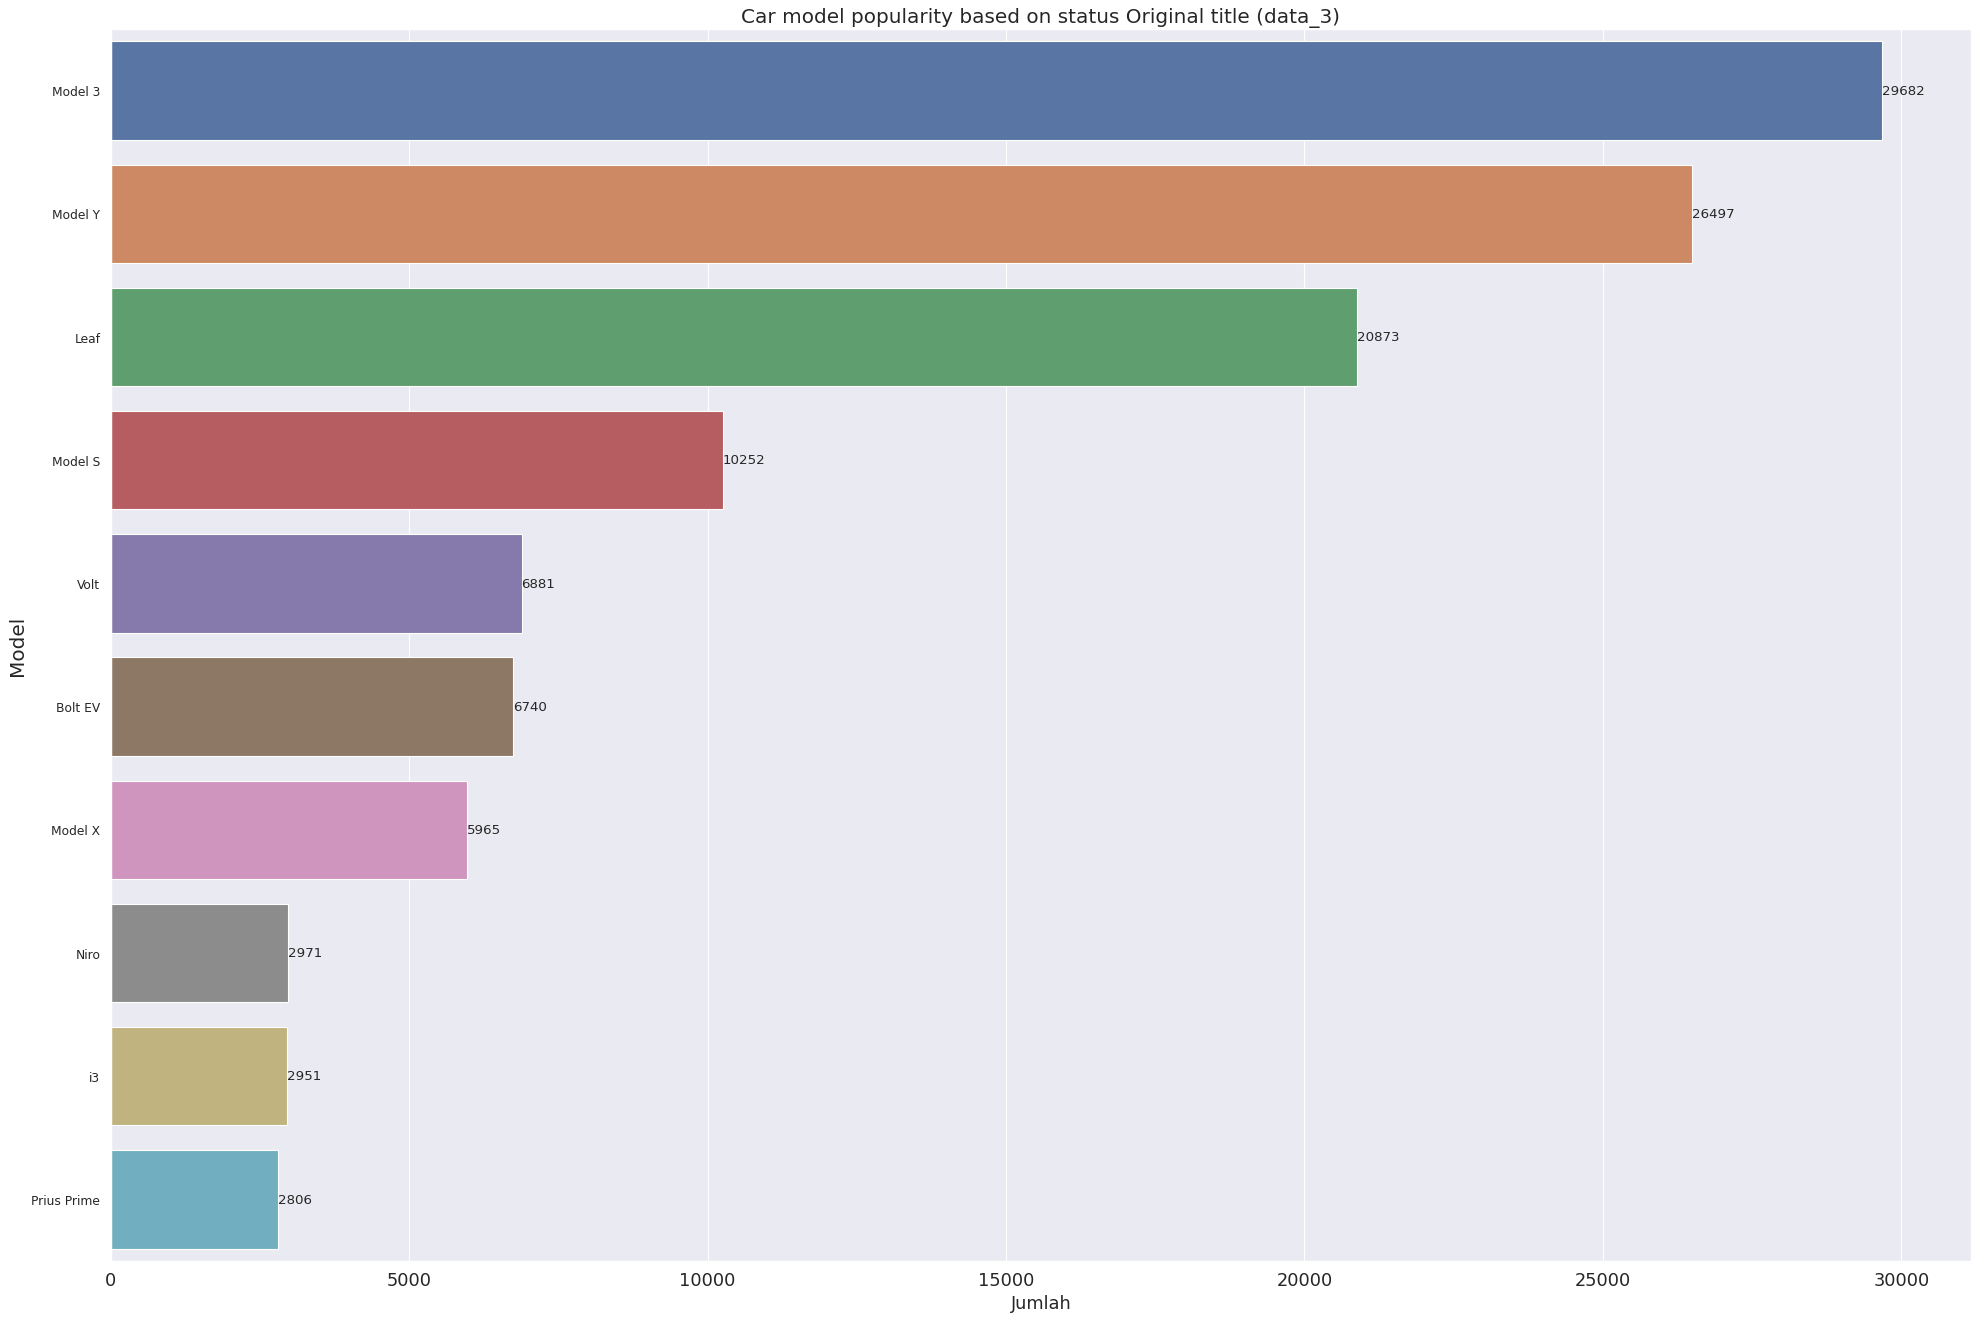

Didapat Top 10 nya:  ['Model 3', 'Model Y', 'Leaf', 'Model S', 'Volt', 'Bolt EV', 'Model X', 'Niro', 'i3', 'Prius Prime']


In [ ]:
##Tentuin data ygg mana

hasil_popularitas = pd.DataFrame(data_3[data_3['Transaction Type'] == 'Original Title']['Model'].value_counts())
hasil_popularitas = hasil_popularitas.sort_values(by = 'Model', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(hasil_popularitas,y=hasil_popularitas.index,x='Model')

plt.title('Car model popularity based on status Original title (data_3)', fontsize=18)
plt.ylabel('Model', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

originaltitle_top10model = list(hasil_popularitas.index[:10])
print("Didapat Top 10 nya: ", originaltitle_top10model)

dapat dilihat top 1 modelnya berbeda karena di yang pertama kita lakukan perhitungan secara general, di yang kedua kita melakukan perhitungan berdasarkan banyaknya tipe mobil tersebut beredar, di yang ketiga berdasarkan banyaknya terjadi transaksi jual-beli

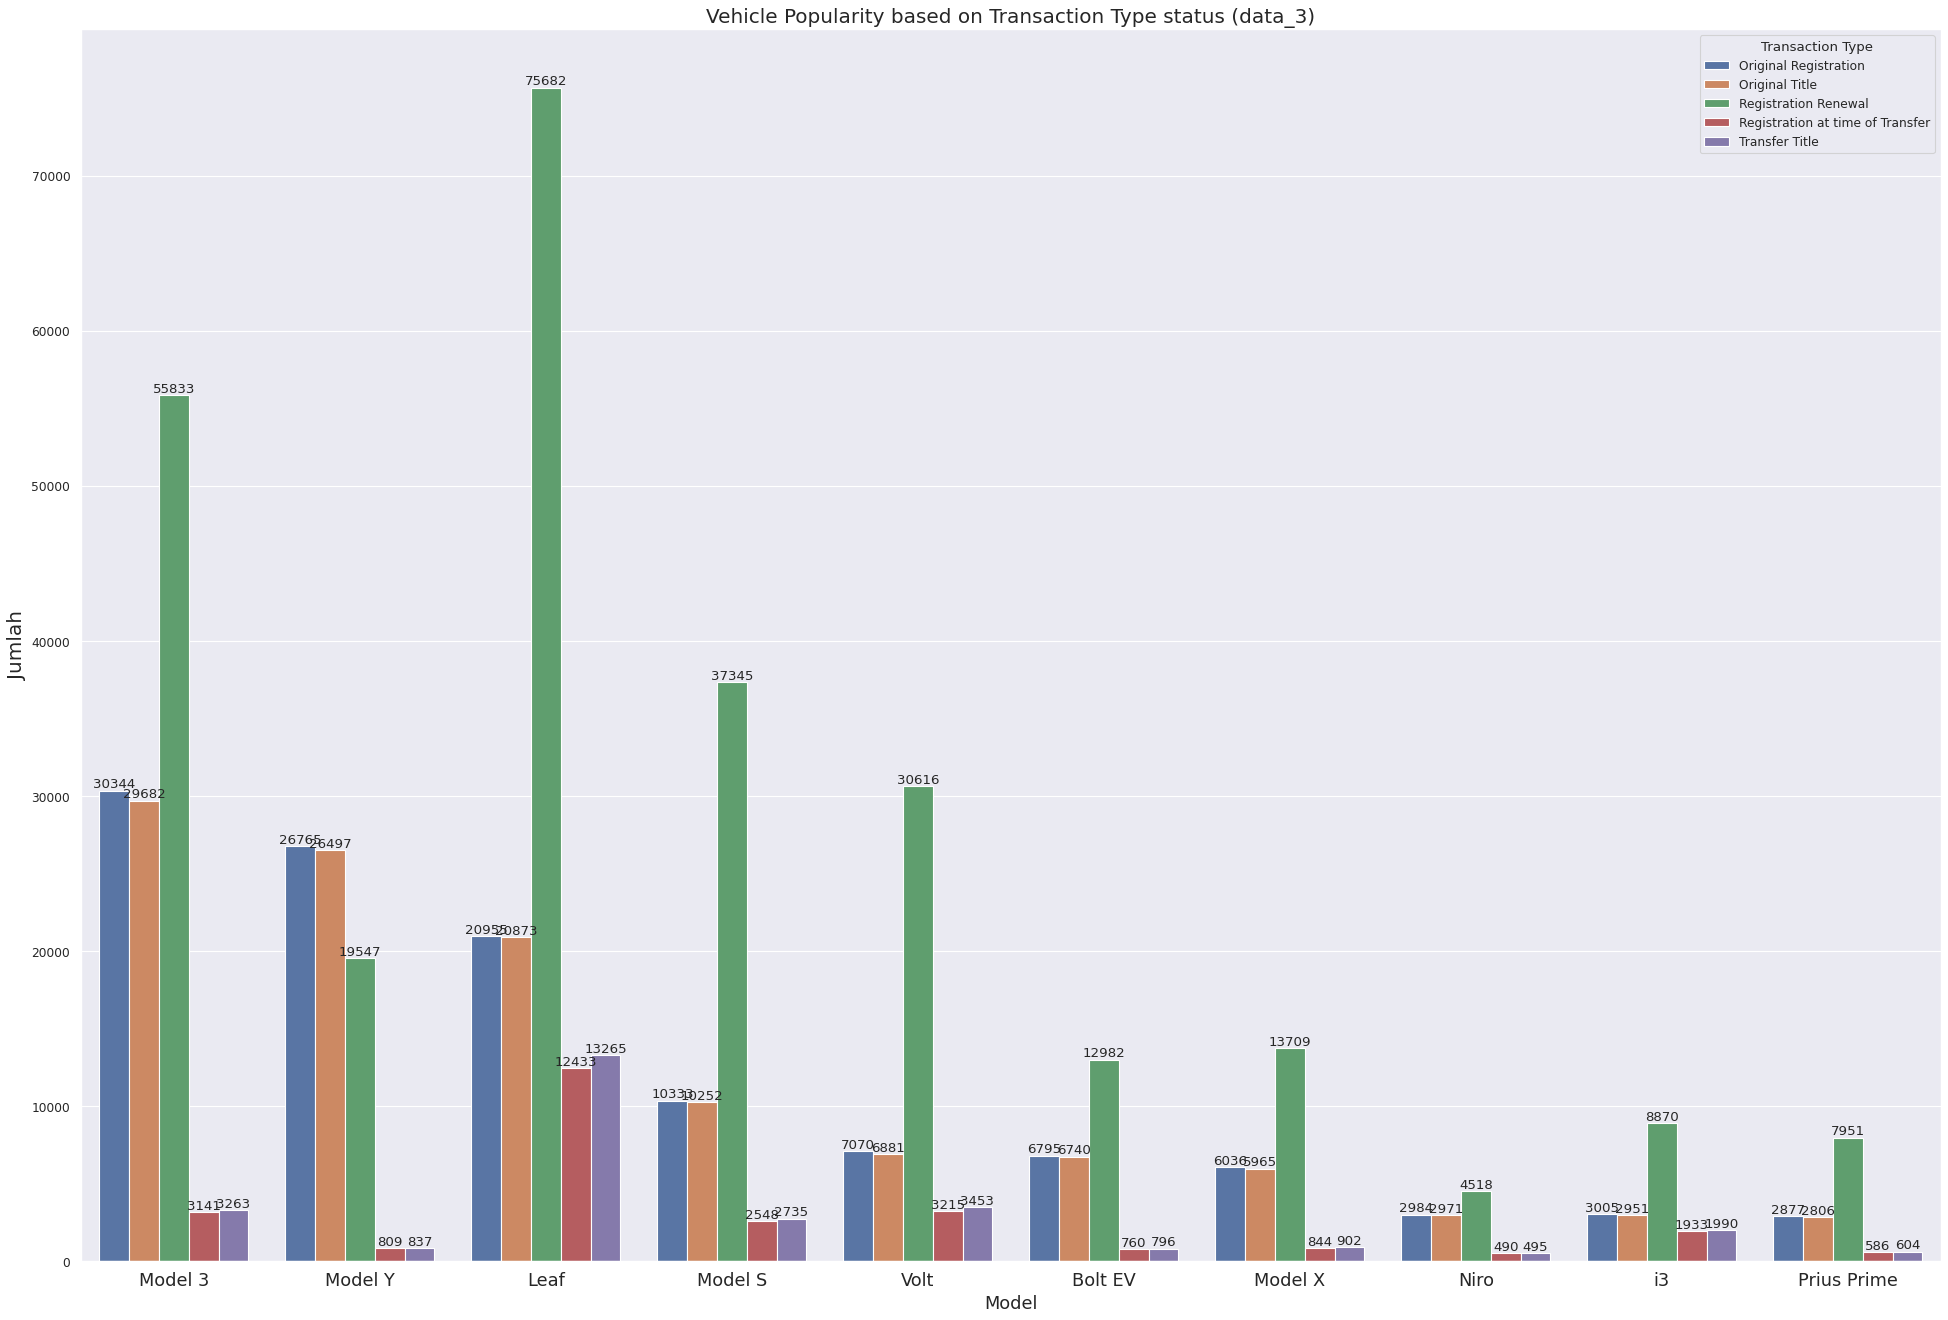

In [ ]:
tes = pd.crosstab(data_3['Model'],data_3['Transaction Type'])
tes = tes.sort_values(by='Original Title', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Model')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Model', y = 'value', hue = 'Transaction Type')

plt.title('Vehicle Popularity based on Transaction Type status (data_3)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data_3['Transaction Type'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

Dikuatkan oleh grafik ini, bahwa banyak terjadi registration renewal untuk model Leaf sehingga di data awal muncul sebagai Top 1 model

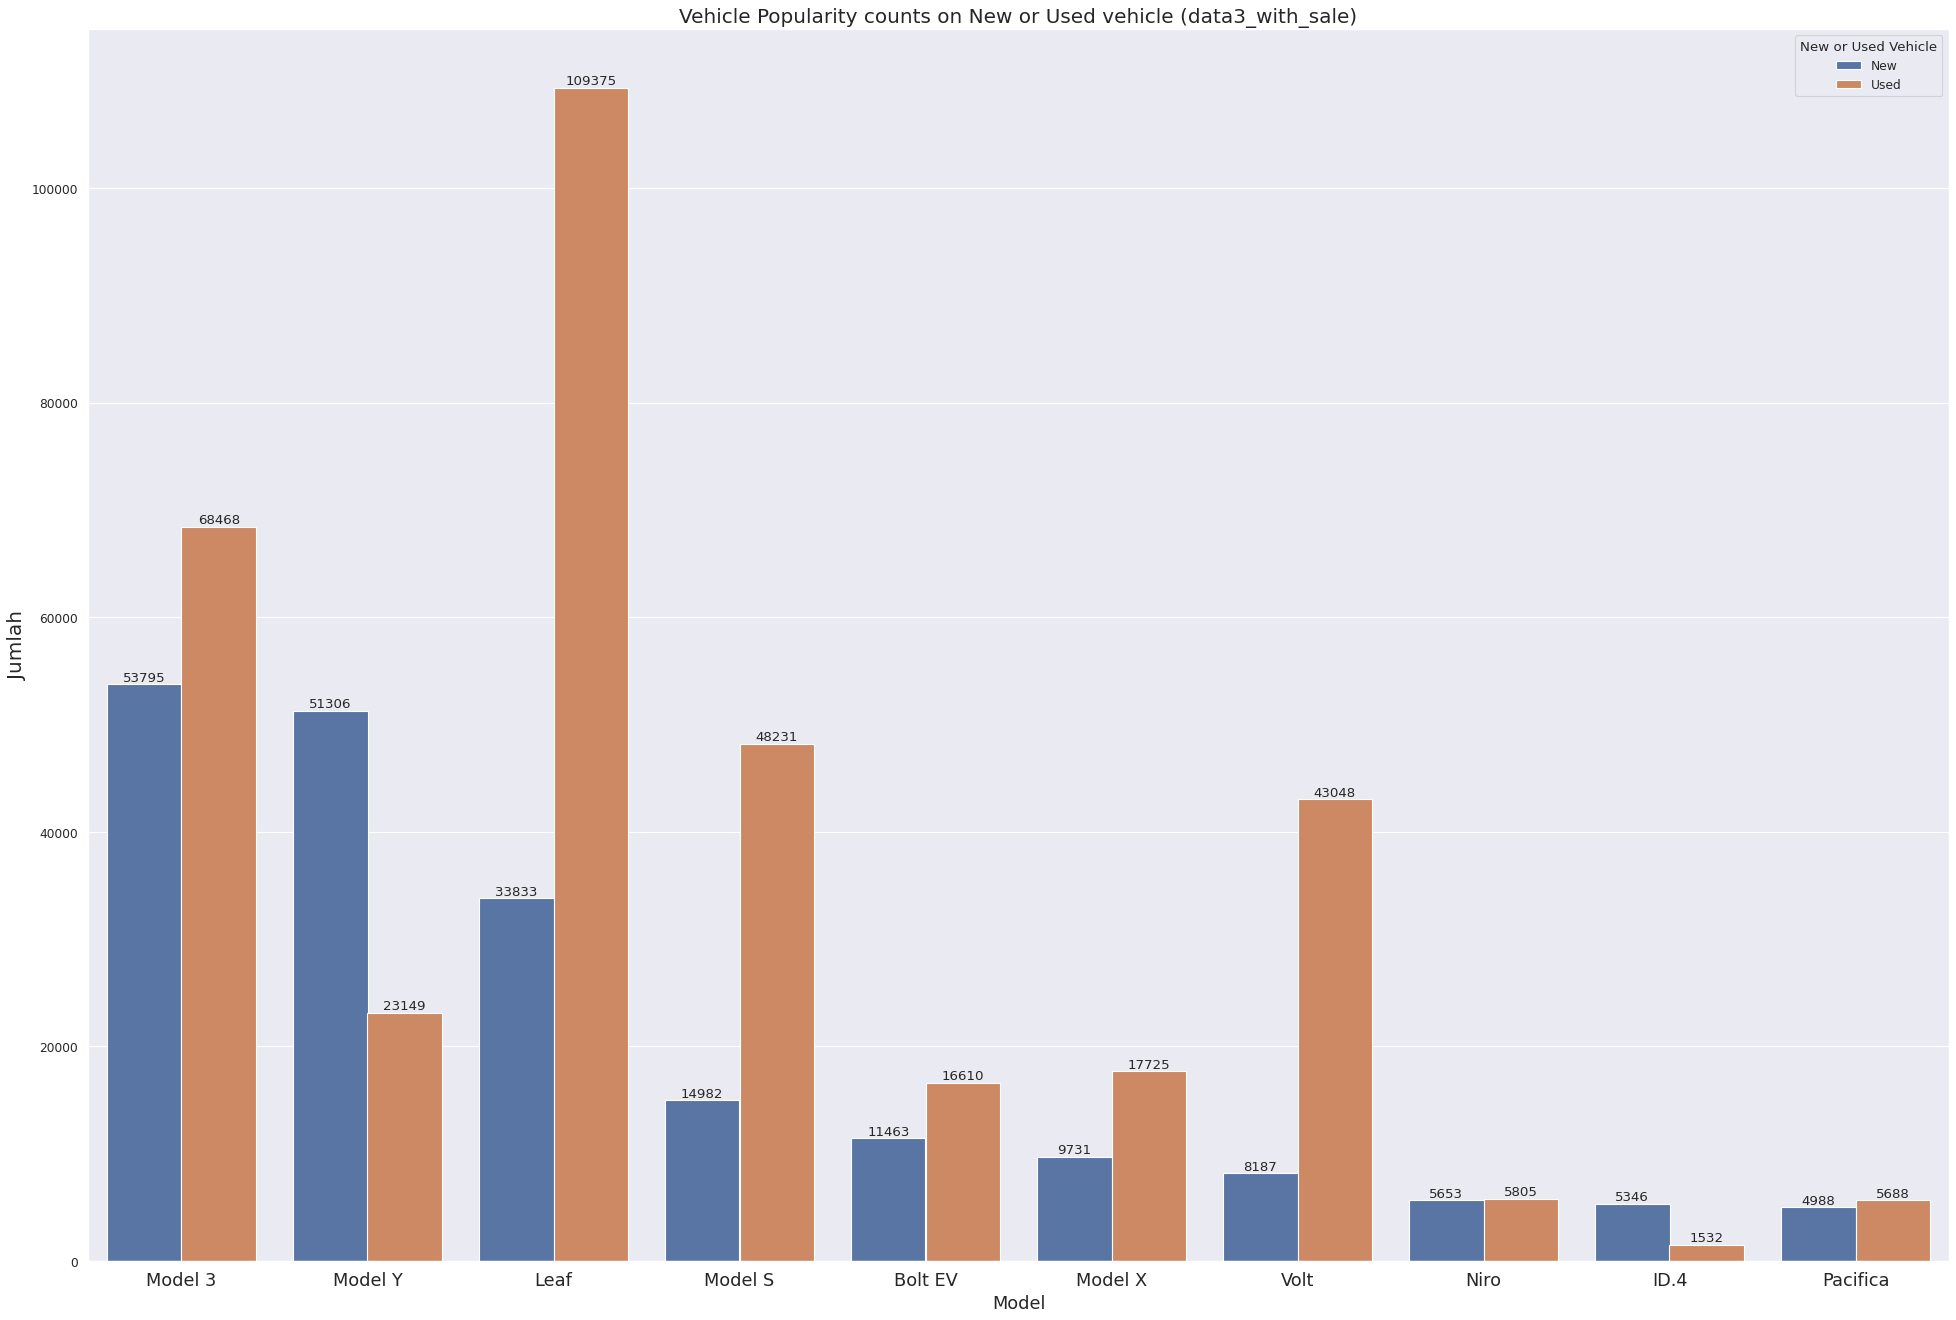

In [ ]:
tes = pd.crosstab(data_3['Model'],data_3['New or Used Vehicle'])
tes = tes.sort_values(by='New', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Model')

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Model', y = 'value', hue = 'New or Used Vehicle')

plt.title('Vehicle Popularity counts on New or Used vehicle (data3_with_sale)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data3_with_sale['New or Used Vehicle'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

mungkin ini membingungkan tetapi alasan new or used tidak valid karena terkadang ada duplicate seperti berikut:

In [ ]:
data_3[data_3['New or Used Vehicle'] == 'New'][['VIN (1-10)', 'Model', 'DOL Transaction Date',"Transaction Type", 'New or Used Vehicle']].head()

VIN (1-10)     Model DOL Transaction Date       Transaction Type  \
4   5YJRE1A35A  Roadster           2010-02-16         Original Title   
5   5YJRE1A35A  Roadster           2010-02-16  Original Registration   
14  5YJRE1A14A  Roadster           2010-03-17  Original Registration   
15  5YJRE1A14A  Roadster           2010-03-17         Original Title   
19  5YJRE1A18A  Roadster           2010-03-29         Original Title   

   New or Used Vehicle  
4                  New  
5                  New  
14                 New  
15                 New  
19                 New

dapat dilihat, waktu transaksinya sama berarti seharusnya itu dihitung 1, bukan 2

## Vehicle Primary Use

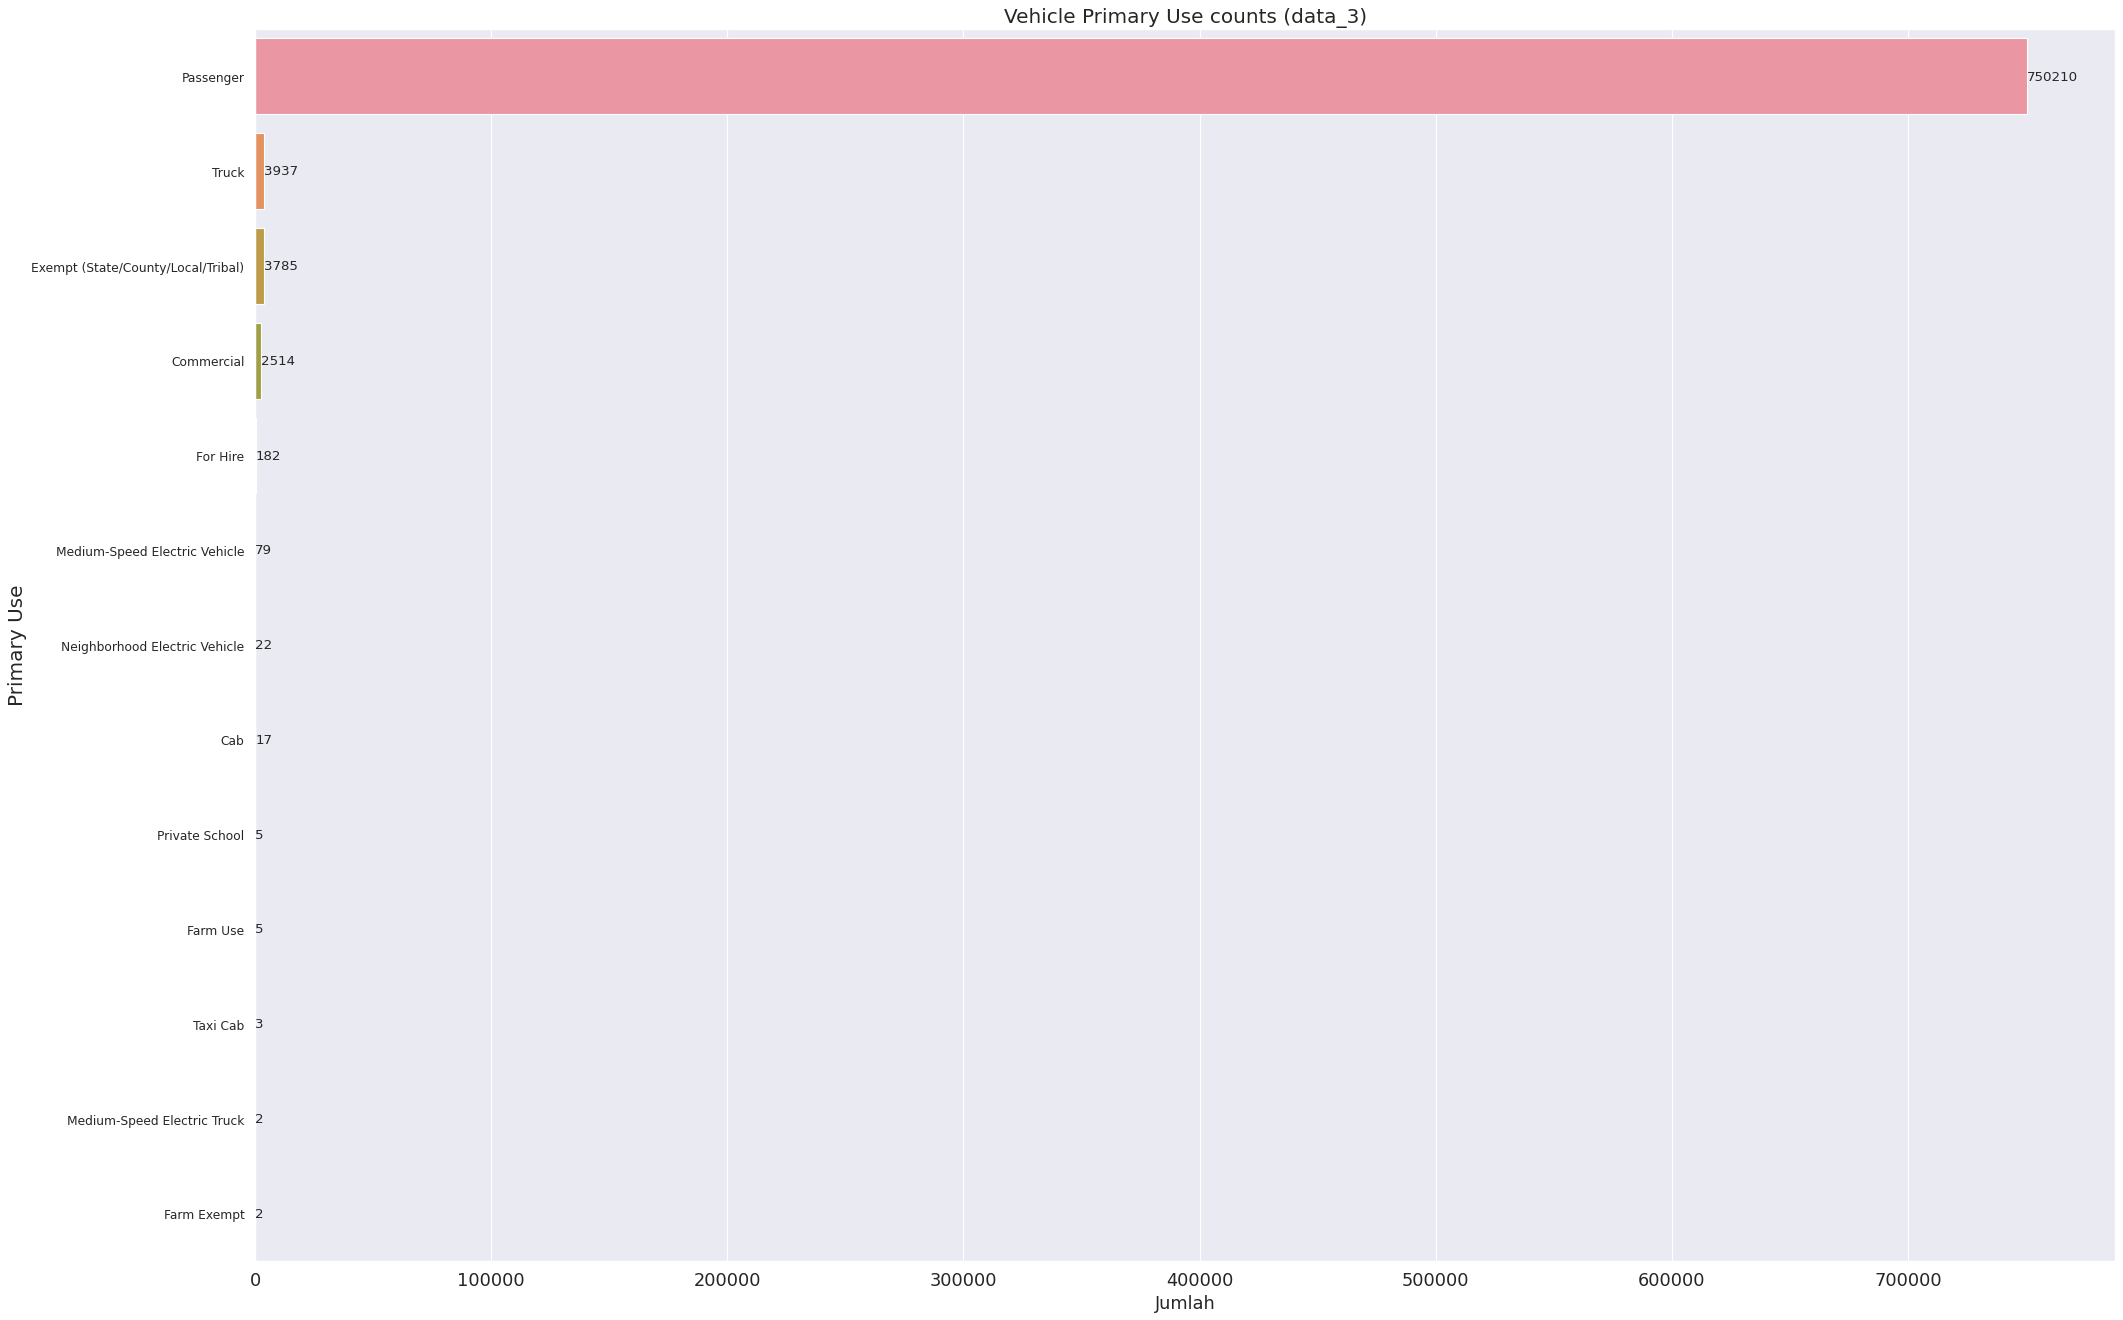

In [ ]:
VPU = pd.DataFrame(data_3['Vehicle Primary Use'].value_counts())
VPU.index = VPU.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(VPU,y=VPU.index,x='Vehicle Primary Use')

plt.title('Vehicle Primary Use counts (data_3)', fontsize=18)
plt.ylabel('Primary Use', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

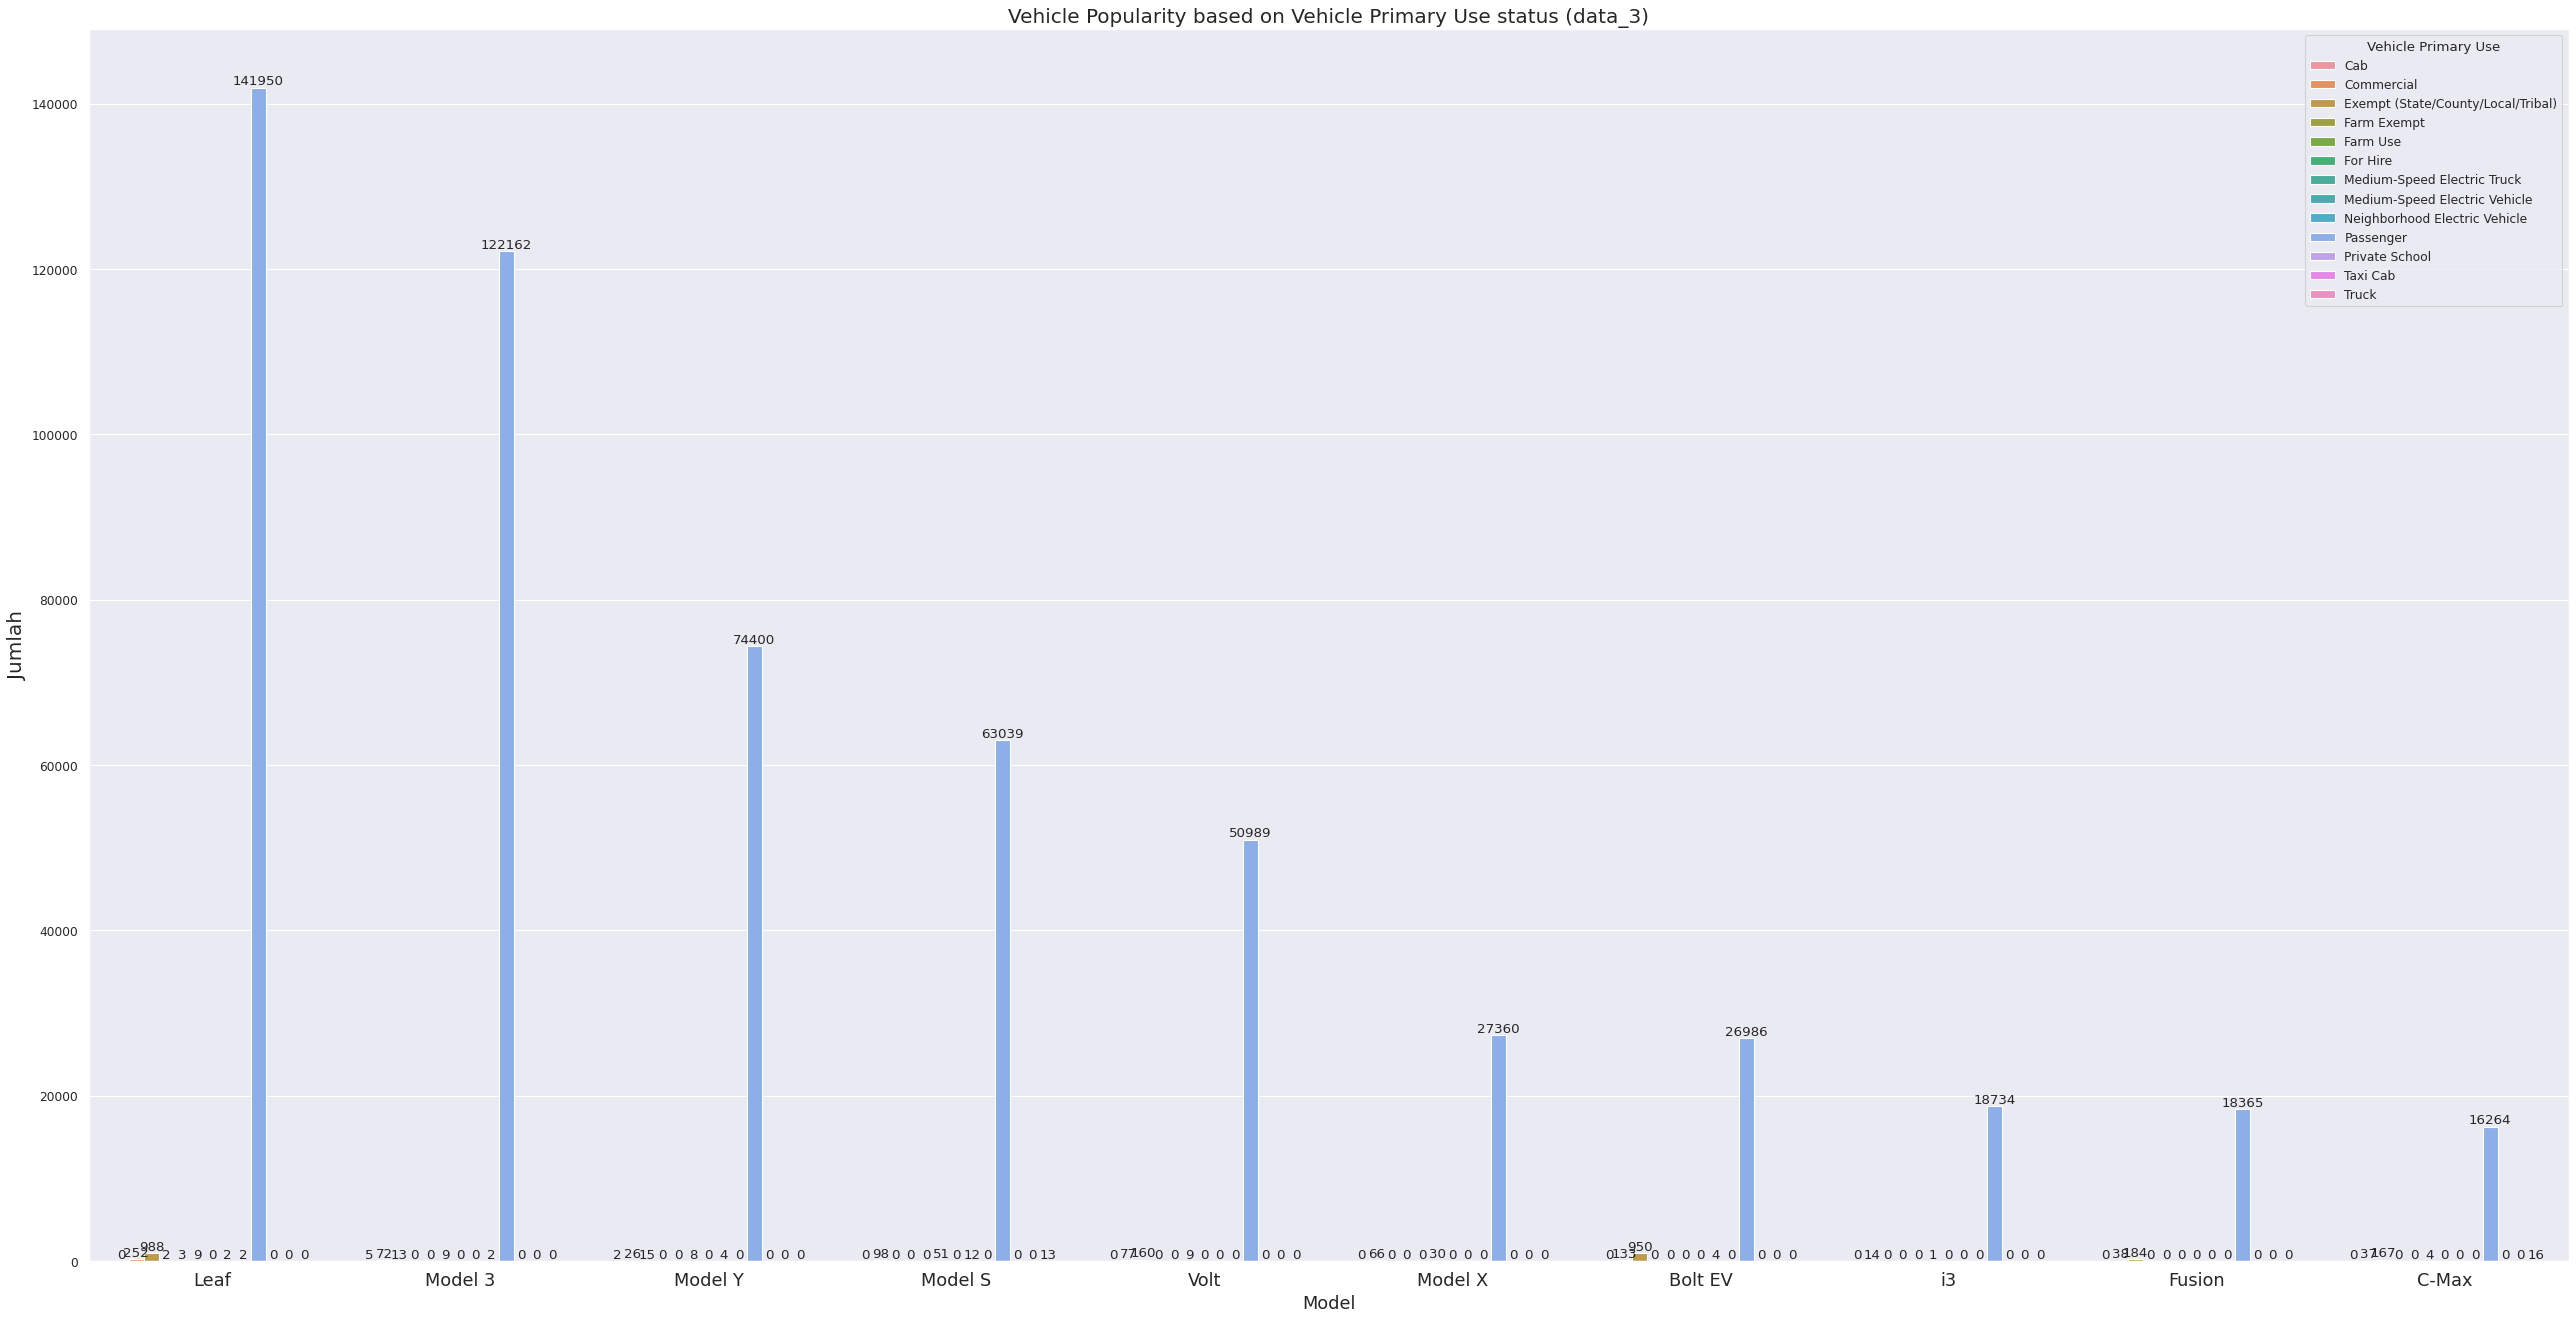

In [ ]:
tes = pd.crosstab(data_3['Model'],data_3['Vehicle Primary Use'])
tes = tes.sort_values(by='Passenger', ascending = False).head(10)
tes = pd.melt(tes.reset_index(), id_vars='Model')

fig, ax = plt.subplots(figsize=(40, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tes, x = 'Model', y = 'value', hue = 'Vehicle Primary Use')

plt.title('Vehicle Popularity based on Vehicle Primary Use status (data_3)', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(data_3['Vehicle Primary Use'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

## State of Residence



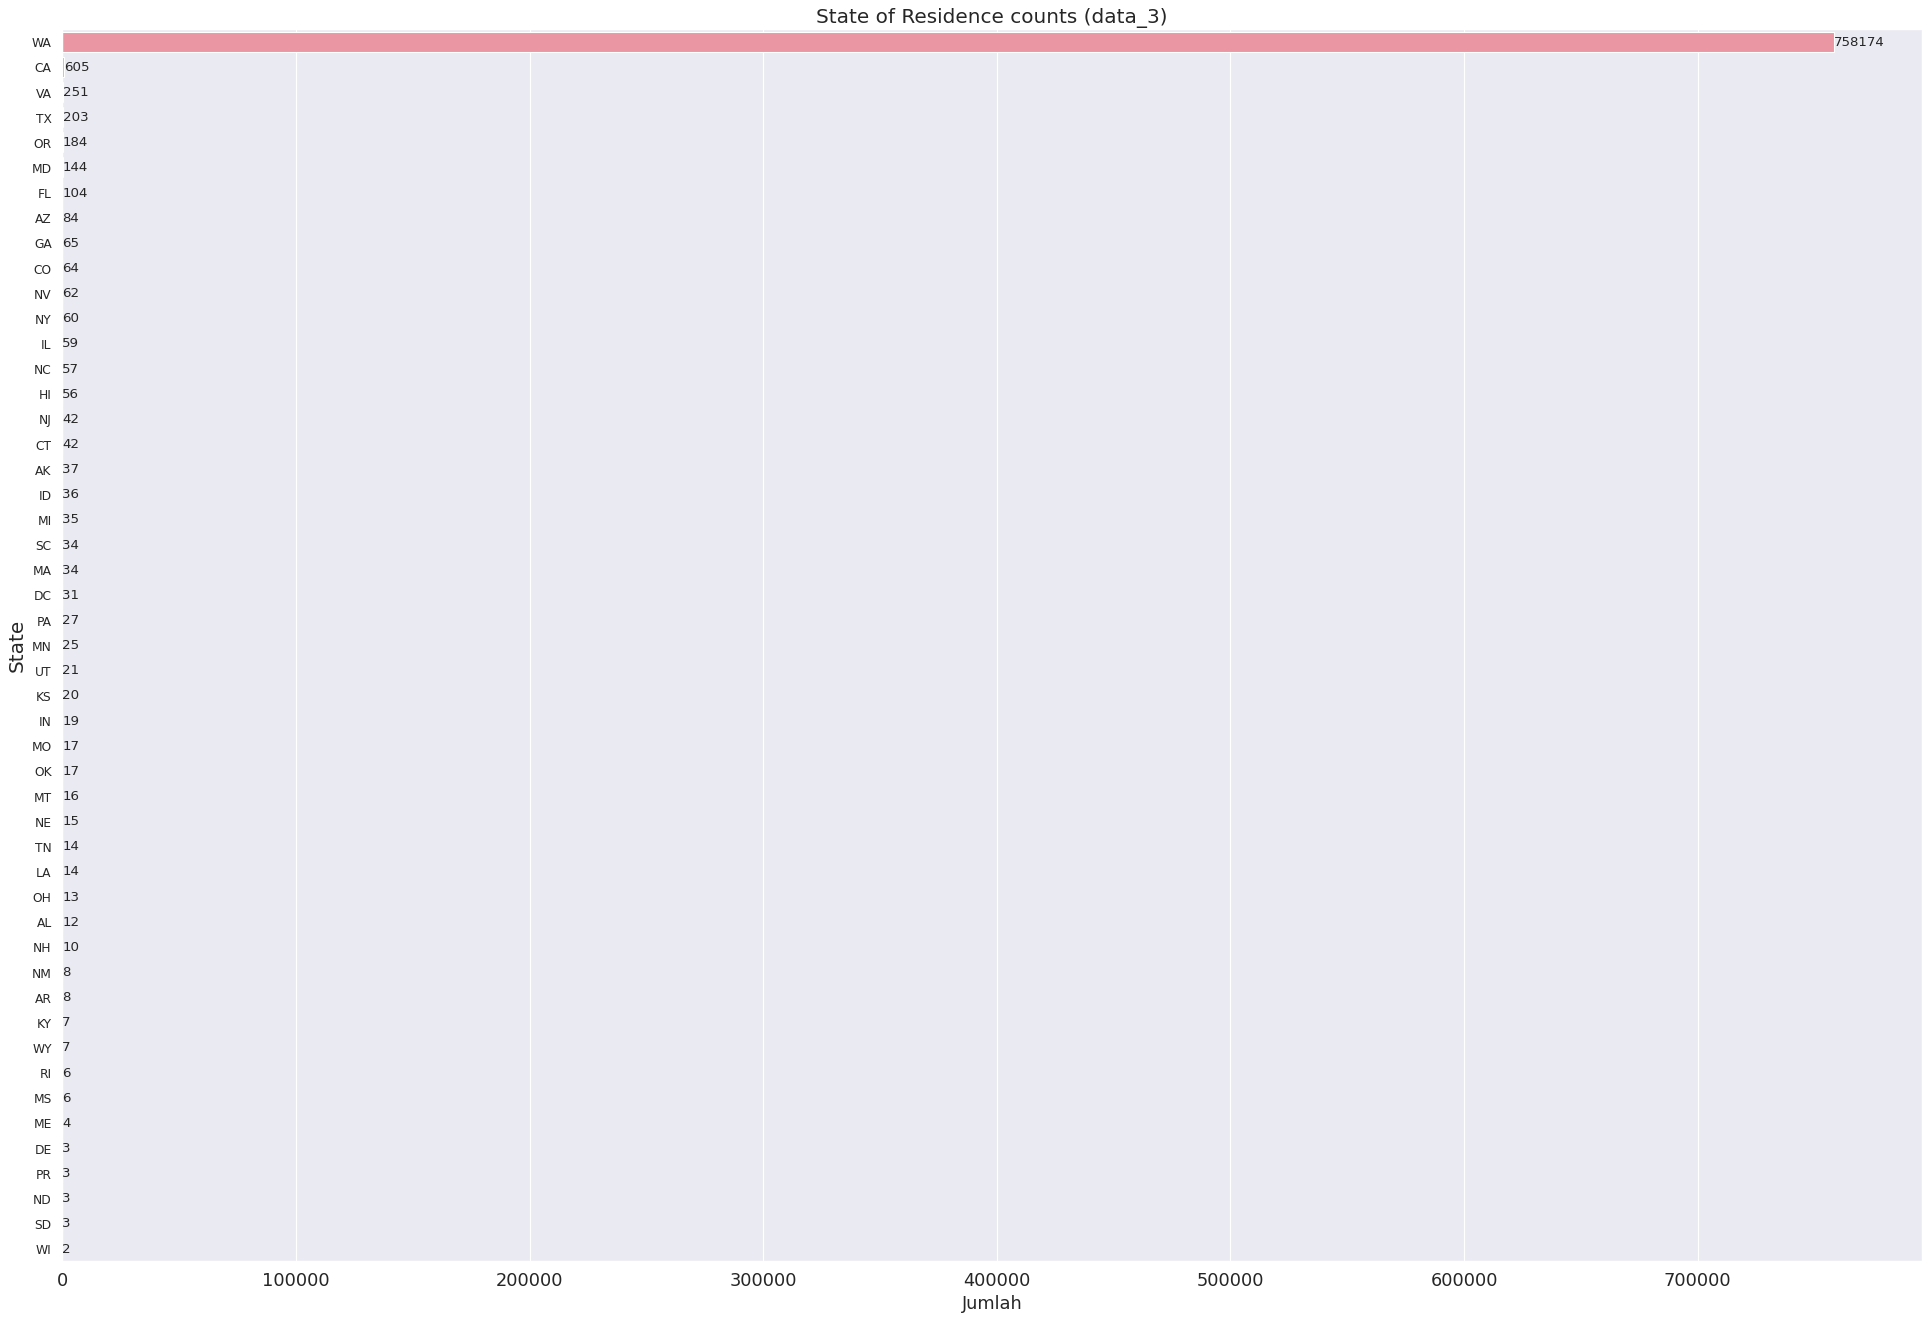

In [ ]:
SoR = pd.DataFrame(data_3['State of Residence'].value_counts())
SoR.index = SoR.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(SoR,y=SoR.index,x='State of Residence')

plt.title('State of Residence counts (data_3)', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xlabel('Jumlah', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

##Odometer Code

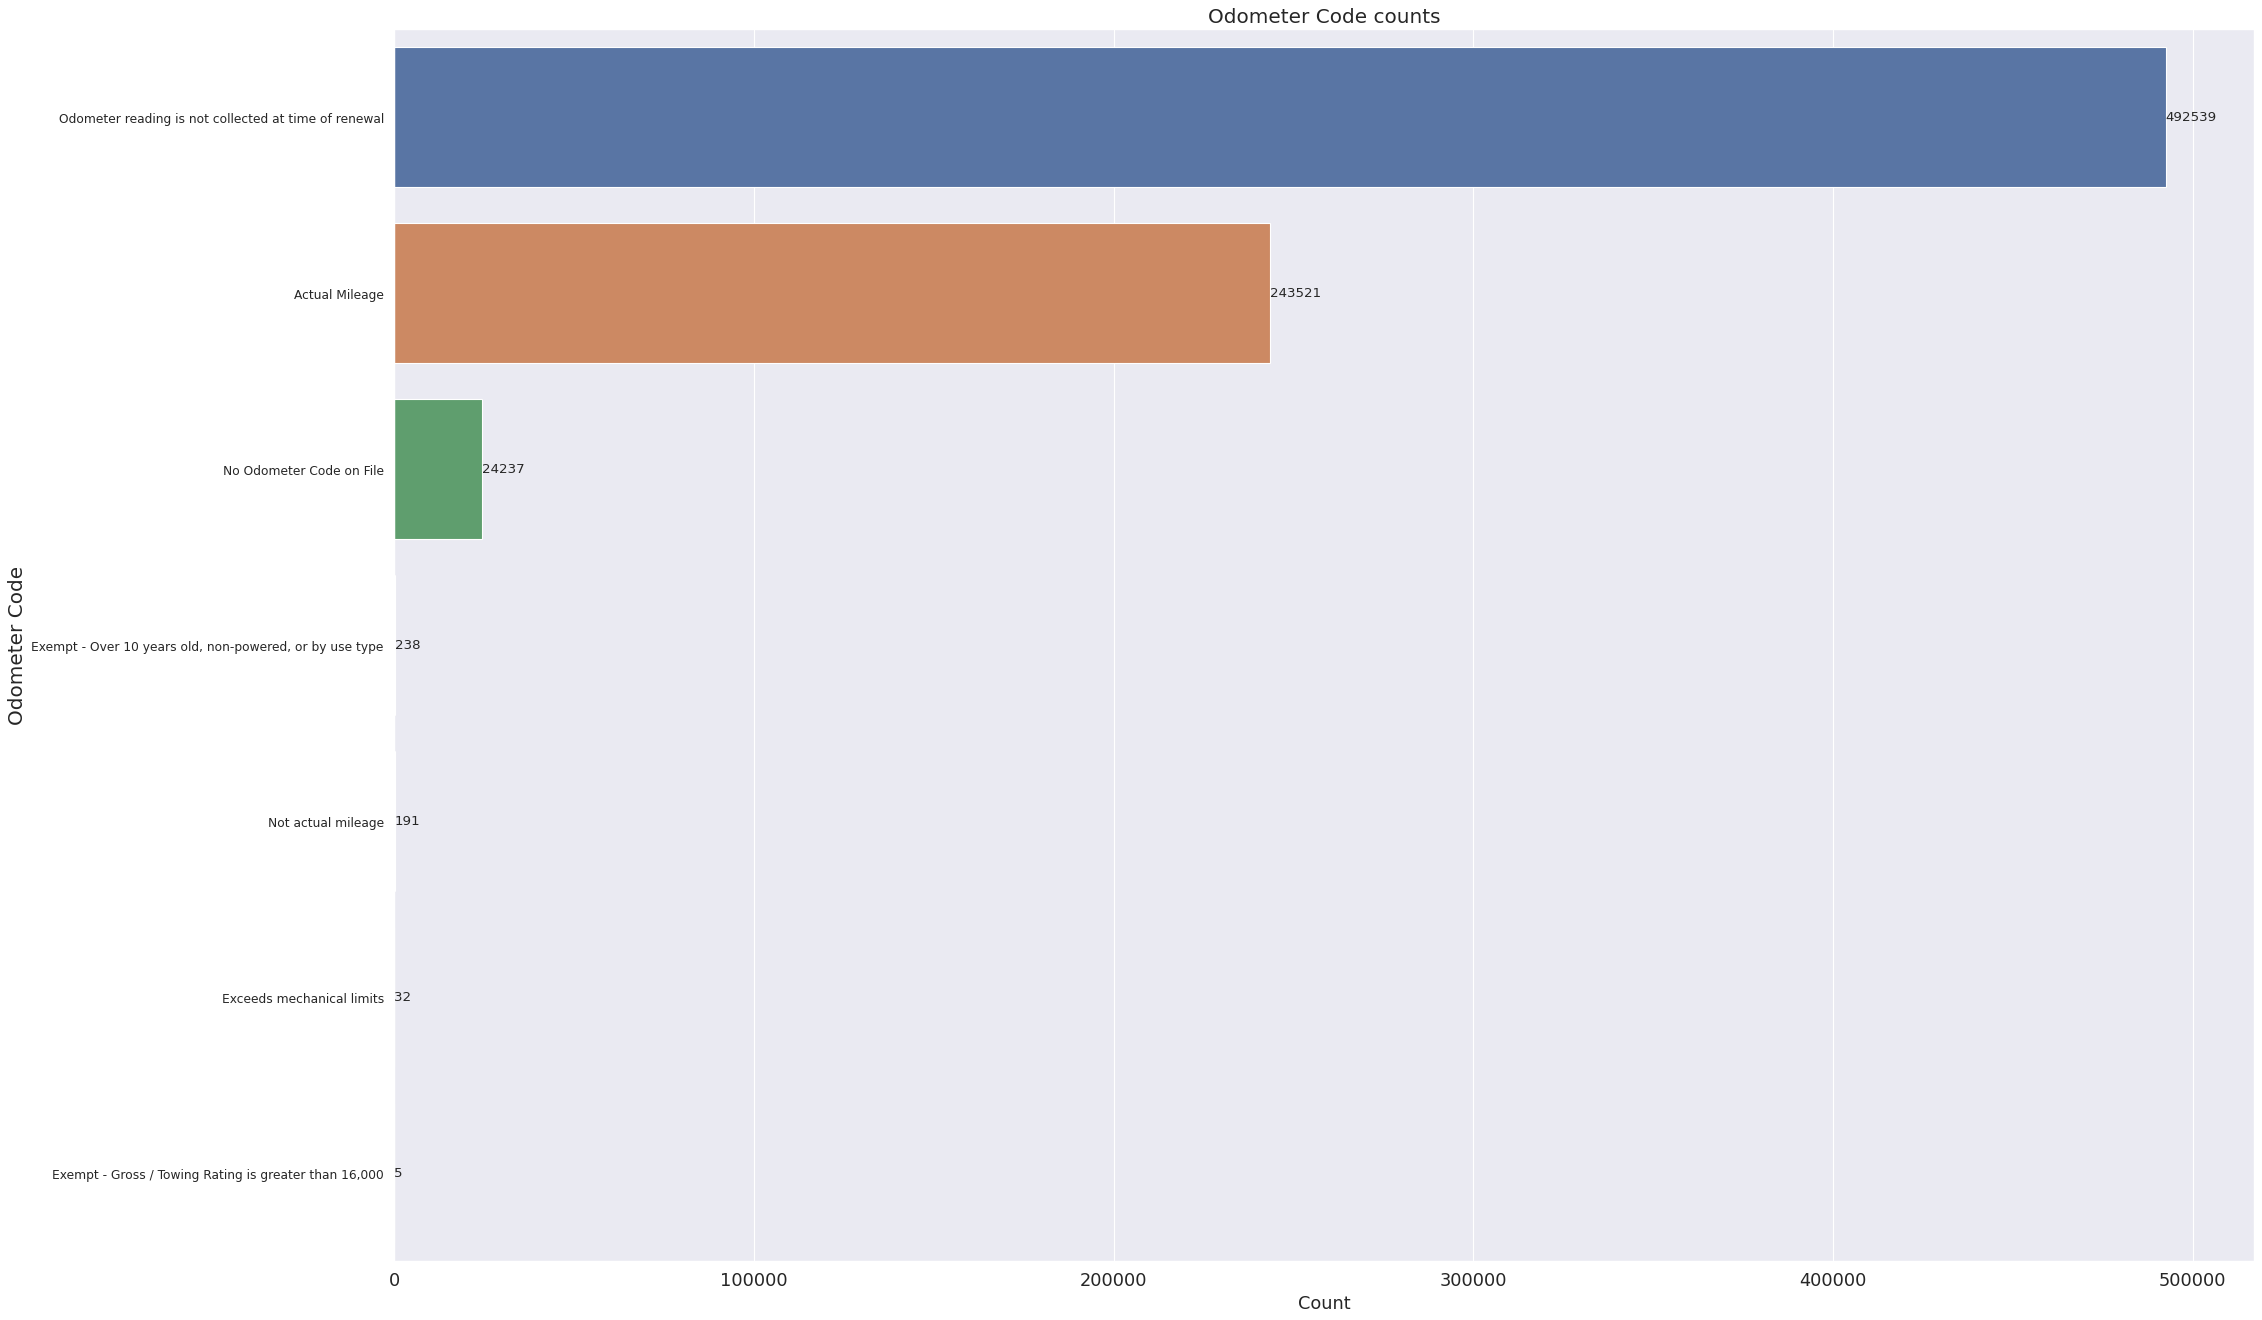

In [ ]:
odo_code = pd.DataFrame(data_3['Odometer Code'].value_counts())
odo_code.index = odo_code.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(odo_code,y=odo_code.index,x='Odometer Code')

plt.title('Odometer Code counts', fontsize=18)
plt.ylabel('Odometer Code', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

#Kolom ini tidak dapat digunakan untuk fitur penenentu di machine learning karena banyak yang tidak tercatat

##New or Used Vehicle

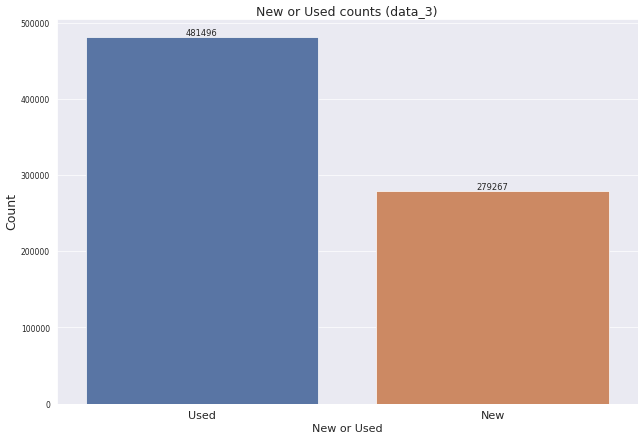

In [ ]:
new_or_used = pd.DataFrame(data_3['New or Used Vehicle'].value_counts())
new_or_used.index = new_or_used.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(new_or_used,y='New or Used Vehicle',x=new_or_used.index)

plt.title('New or Used counts (data_3)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('New or Used', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

## Sale Price

In [ ]:
data_3[['Model', 'Sale Price']]

Model  Sale Price
0          Roadster           0
1          Roadster           0
2            Ranger           0
3          Roadster           0
4          Roadster           0
...             ...         ...
760758  Prius Prime           0
760759         ID.4           0
760760      Model 3       30458
760761         Leaf           0
760762          R1S           0

[760763 rows x 2 columns]

karena banyak data dengan sale price 0 yang akan berpengaruh buruk

<Axes: xlabel='Model', ylabel='Sale Price'>

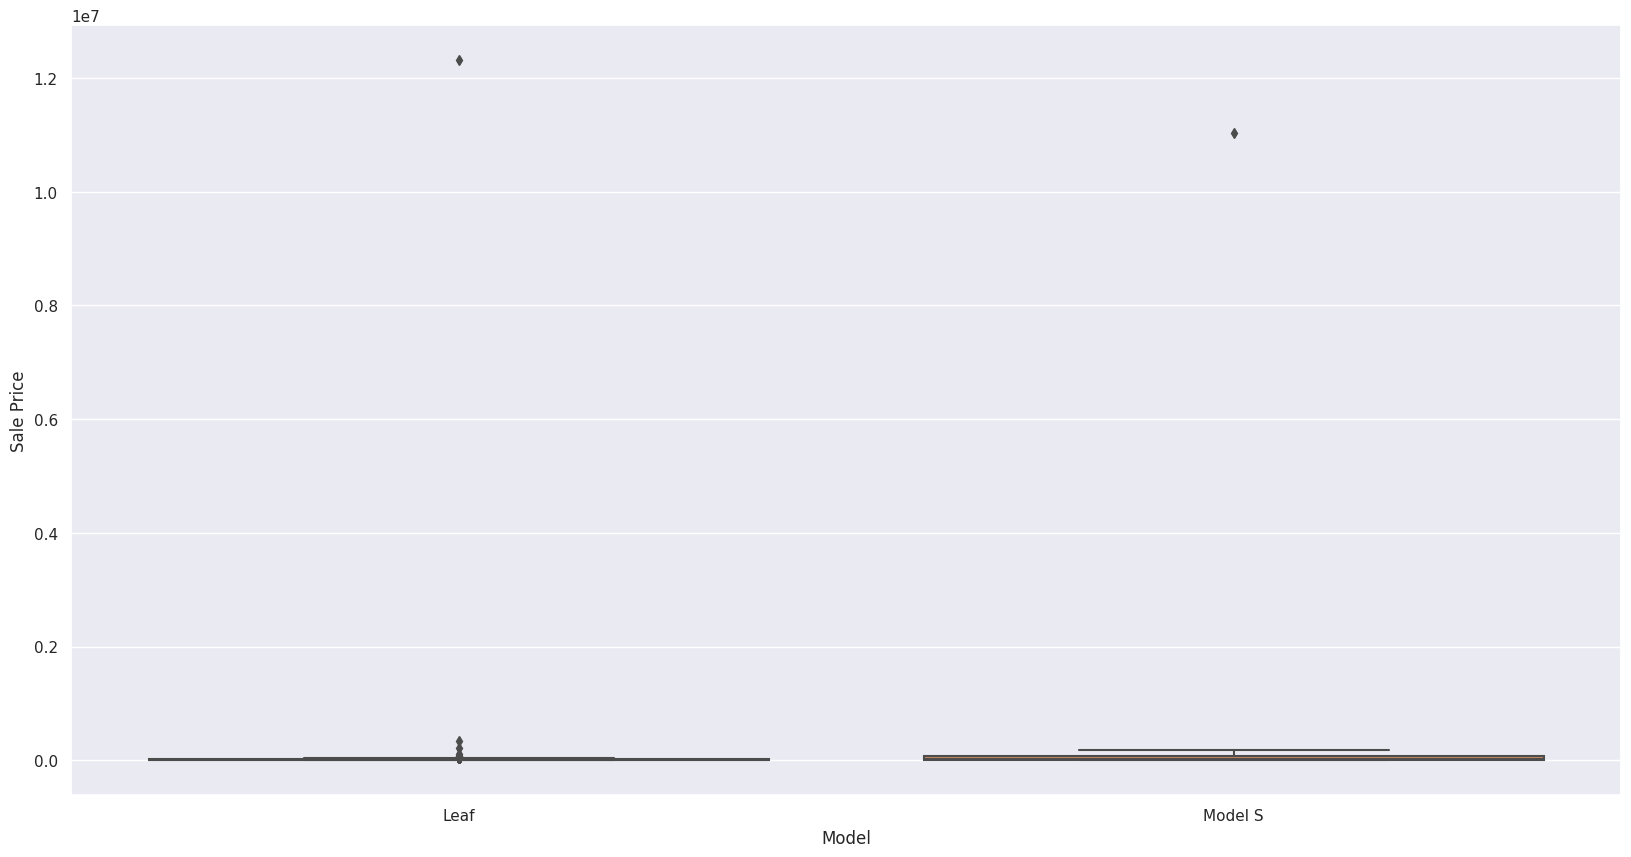

In [ ]:
tes = data3_with_sale[(data3_with_sale['Model'] == 'Model S') | (data3_with_sale['Model'] == 'Leaf')][['Model', "Sale Price", 'Transaction Type']]
fig, ax = plt.subplots(figsize=(20,10), sharey = True)
sns.boxplot(data=tes, x="Model", y="Sale Price")
#Adanya outlier karena itu mobil mahal

Text(0.5, 1.0, 'Distribution of top 10 model car Sale Price (data_3)')

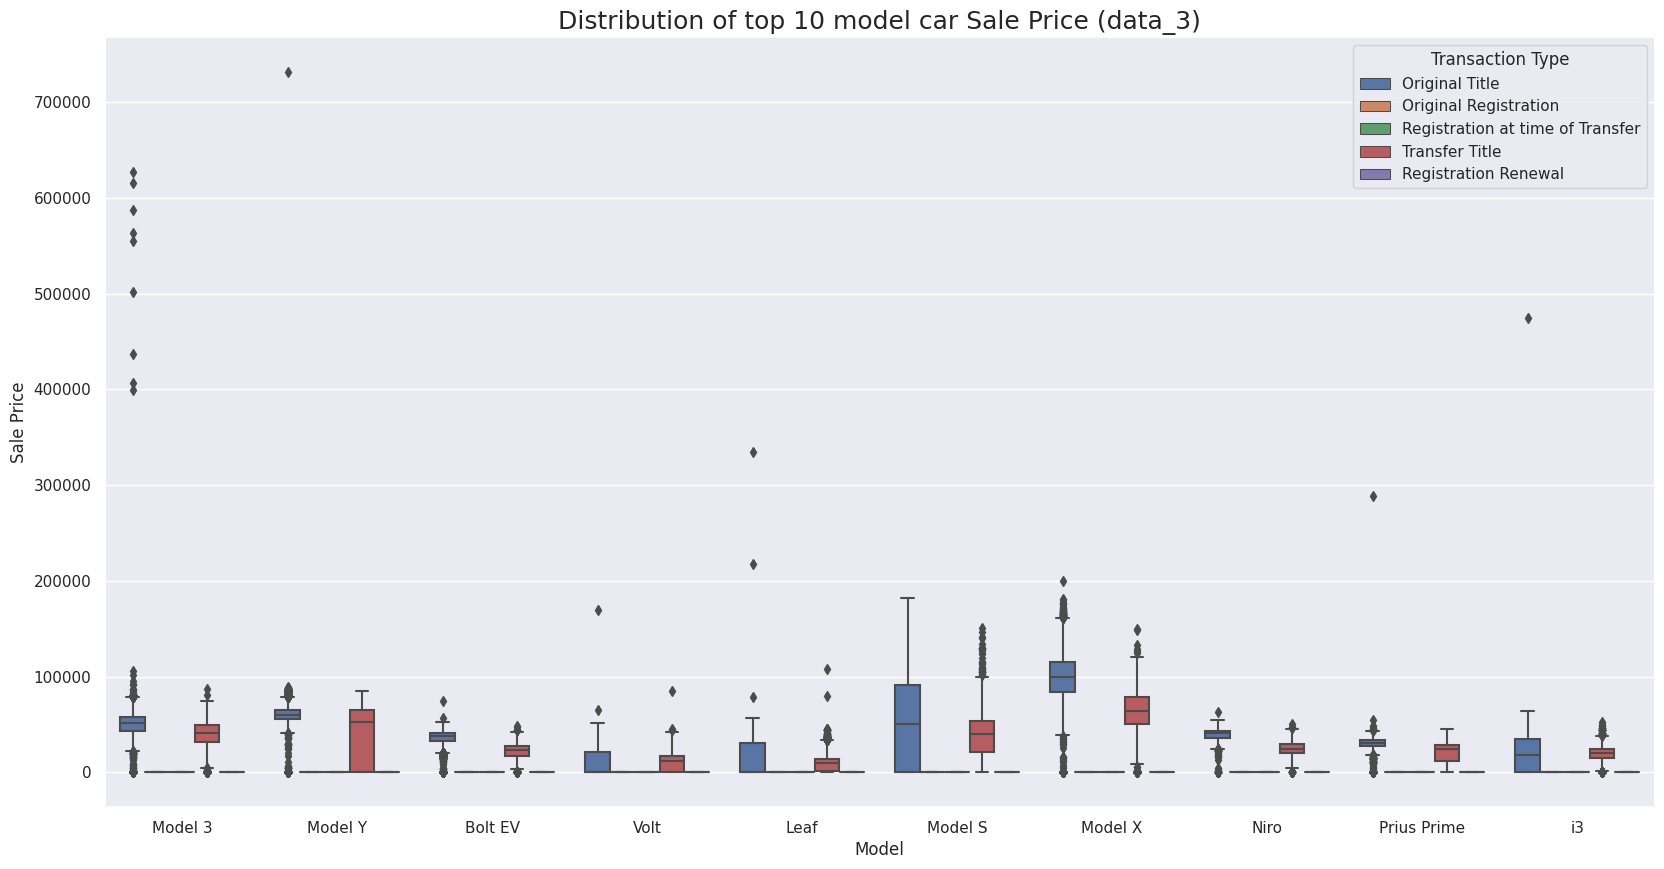

In [ ]:
#Karena ada sale price > 1000000, maka boxplot yg kurang dari itu biar g gepeng wkwkwk
tes = []
for i in ['Model 3', 'Model Y', 'Bolt EV', 'Volt', "Leaf", 'Model S', 'Model X', 'Niro', 'Prius Prime', 'i3']:
  hasil = data_3[(data_3['Model'] == i) & (data_3['Sale Price'] < 1000000)][['Model', "Sale Price", 'Transaction Type']]
  tes.append(hasil)

tes = pd.concat(tes)
fig, ax = plt.subplots(figsize=(20,10), sharey = True)
sns.boxplot(x=tes['Model'], y=tes['Sale Price'], hue = tes['Transaction Type'])
plt.title('Distribution of top 10 model car Sale Price (data_3)', fontsize=18)
#Scatter ga cocok buat data besar

Text(0.5, 1.0, 'Distribution of top 10 model car Sale Price (data3_sale_saleprice_not0)')

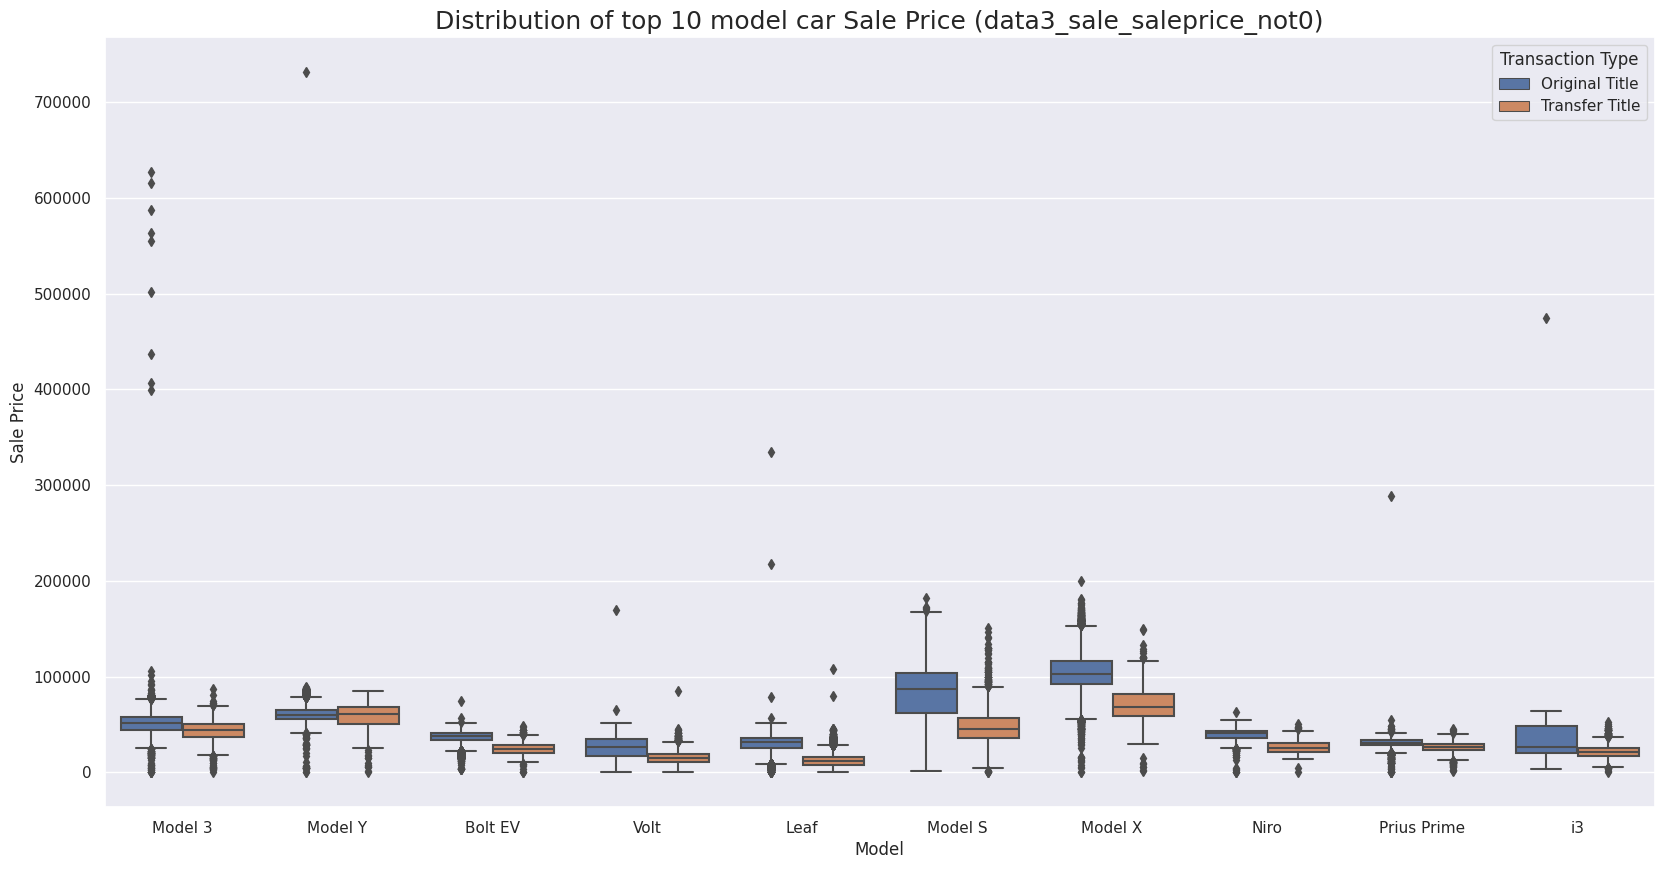

In [ ]:
#Karena ada sale price > 1000000, maka boxplot yg kurang dari itu biar g gepeng wkwkwk
tes = []
for i in ['Model 3', 'Model Y', 'Bolt EV', 'Volt', "Leaf", 'Model S', 'Model X', 'Niro', 'Prius Prime', 'i3']:
  hasil = data3_sale_saleprice_not0[(data3_sale_saleprice_not0['Model'] == i) & (data3_sale_saleprice_not0['Sale Price'] < 1000000)][['Model', "Sale Price", 'Transaction Type']]
  tes.append(hasil)

tes = pd.concat(tes)
fig, ax = plt.subplots(figsize=(20,10), sharey = True)
sns.boxplot(x=tes['Model'], y=tes['Sale Price'], hue = tes['Transaction Type'])
plt.title('Distribution of top 10 model car Sale Price (data3_sale_saleprice_not0)', fontsize=18)
#Scatter ga cocok buat data besar

## DOL Transaction Date

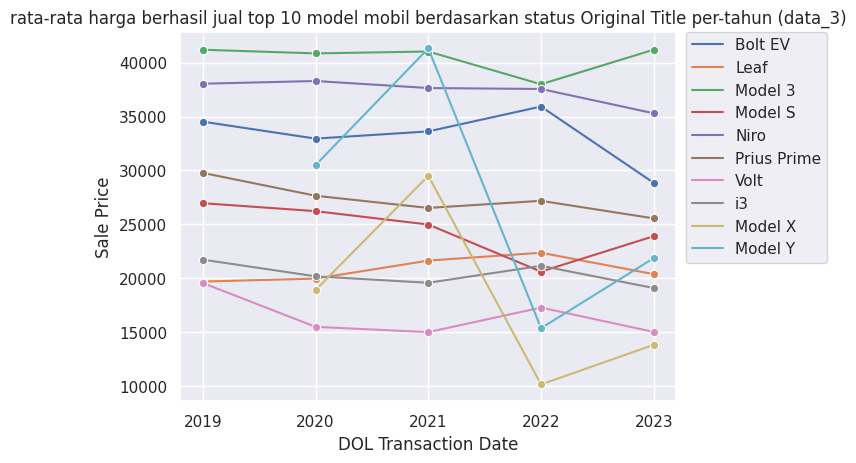

In [ ]:
data = data_3[(data_3['Meets 2019 HB 2042 Sale Price/Value Requirement'] == True) & (data_3['Meets 2019 HB 2042 Sale Date Requirement'] == True)]
hasil_grup = []
for i in originaltitle_top10model:
  grup = data[data['Model'] == i][['Model','Sale Price', 'DOL Transaction Date']]
  hasil_grup.append(grup)

hasil_grup = pd.concat(hasil_grup)
hasil_grup['DOL Transaction Date'] = hasil_grup['DOL Transaction Date'].dt.year.astype(str)
hasil_grup = hasil_grup.groupby(['DOL Transaction Date', 'Model'], as_index = False).mean()

sns.set(font_scale=1)
sns.lineplot(hasil_grup ,x='DOL Transaction Date',y='Sale Price', hue = 'Model', marker="o")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("rata-rata harga berhasil jual top 10 model mobil berdasarkan status Original Title per-tahun (data_3)")
plt.show()

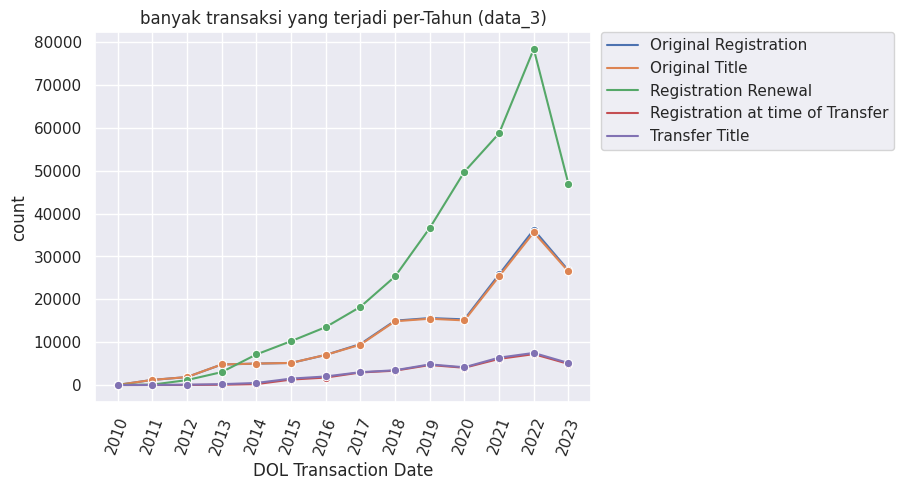

In [ ]:
tes = data_3.copy()
tes['DOL Transaction Date'] = tes['DOL Transaction Date'].dt.to_period("Y").astype(str)
tes = tes.groupby(['DOL Transaction Date', 'Transaction Type'], as_index = False)[['Transaction Type']].value_counts()

sns.set(font_scale=1)
sns.lineplot(tes ,x='DOL Transaction Date',y='count', hue = 'Transaction Type', marker="o")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=70)
plt.title("banyak transaksi yang terjadi per-Tahun (data_3)")
plt.show()

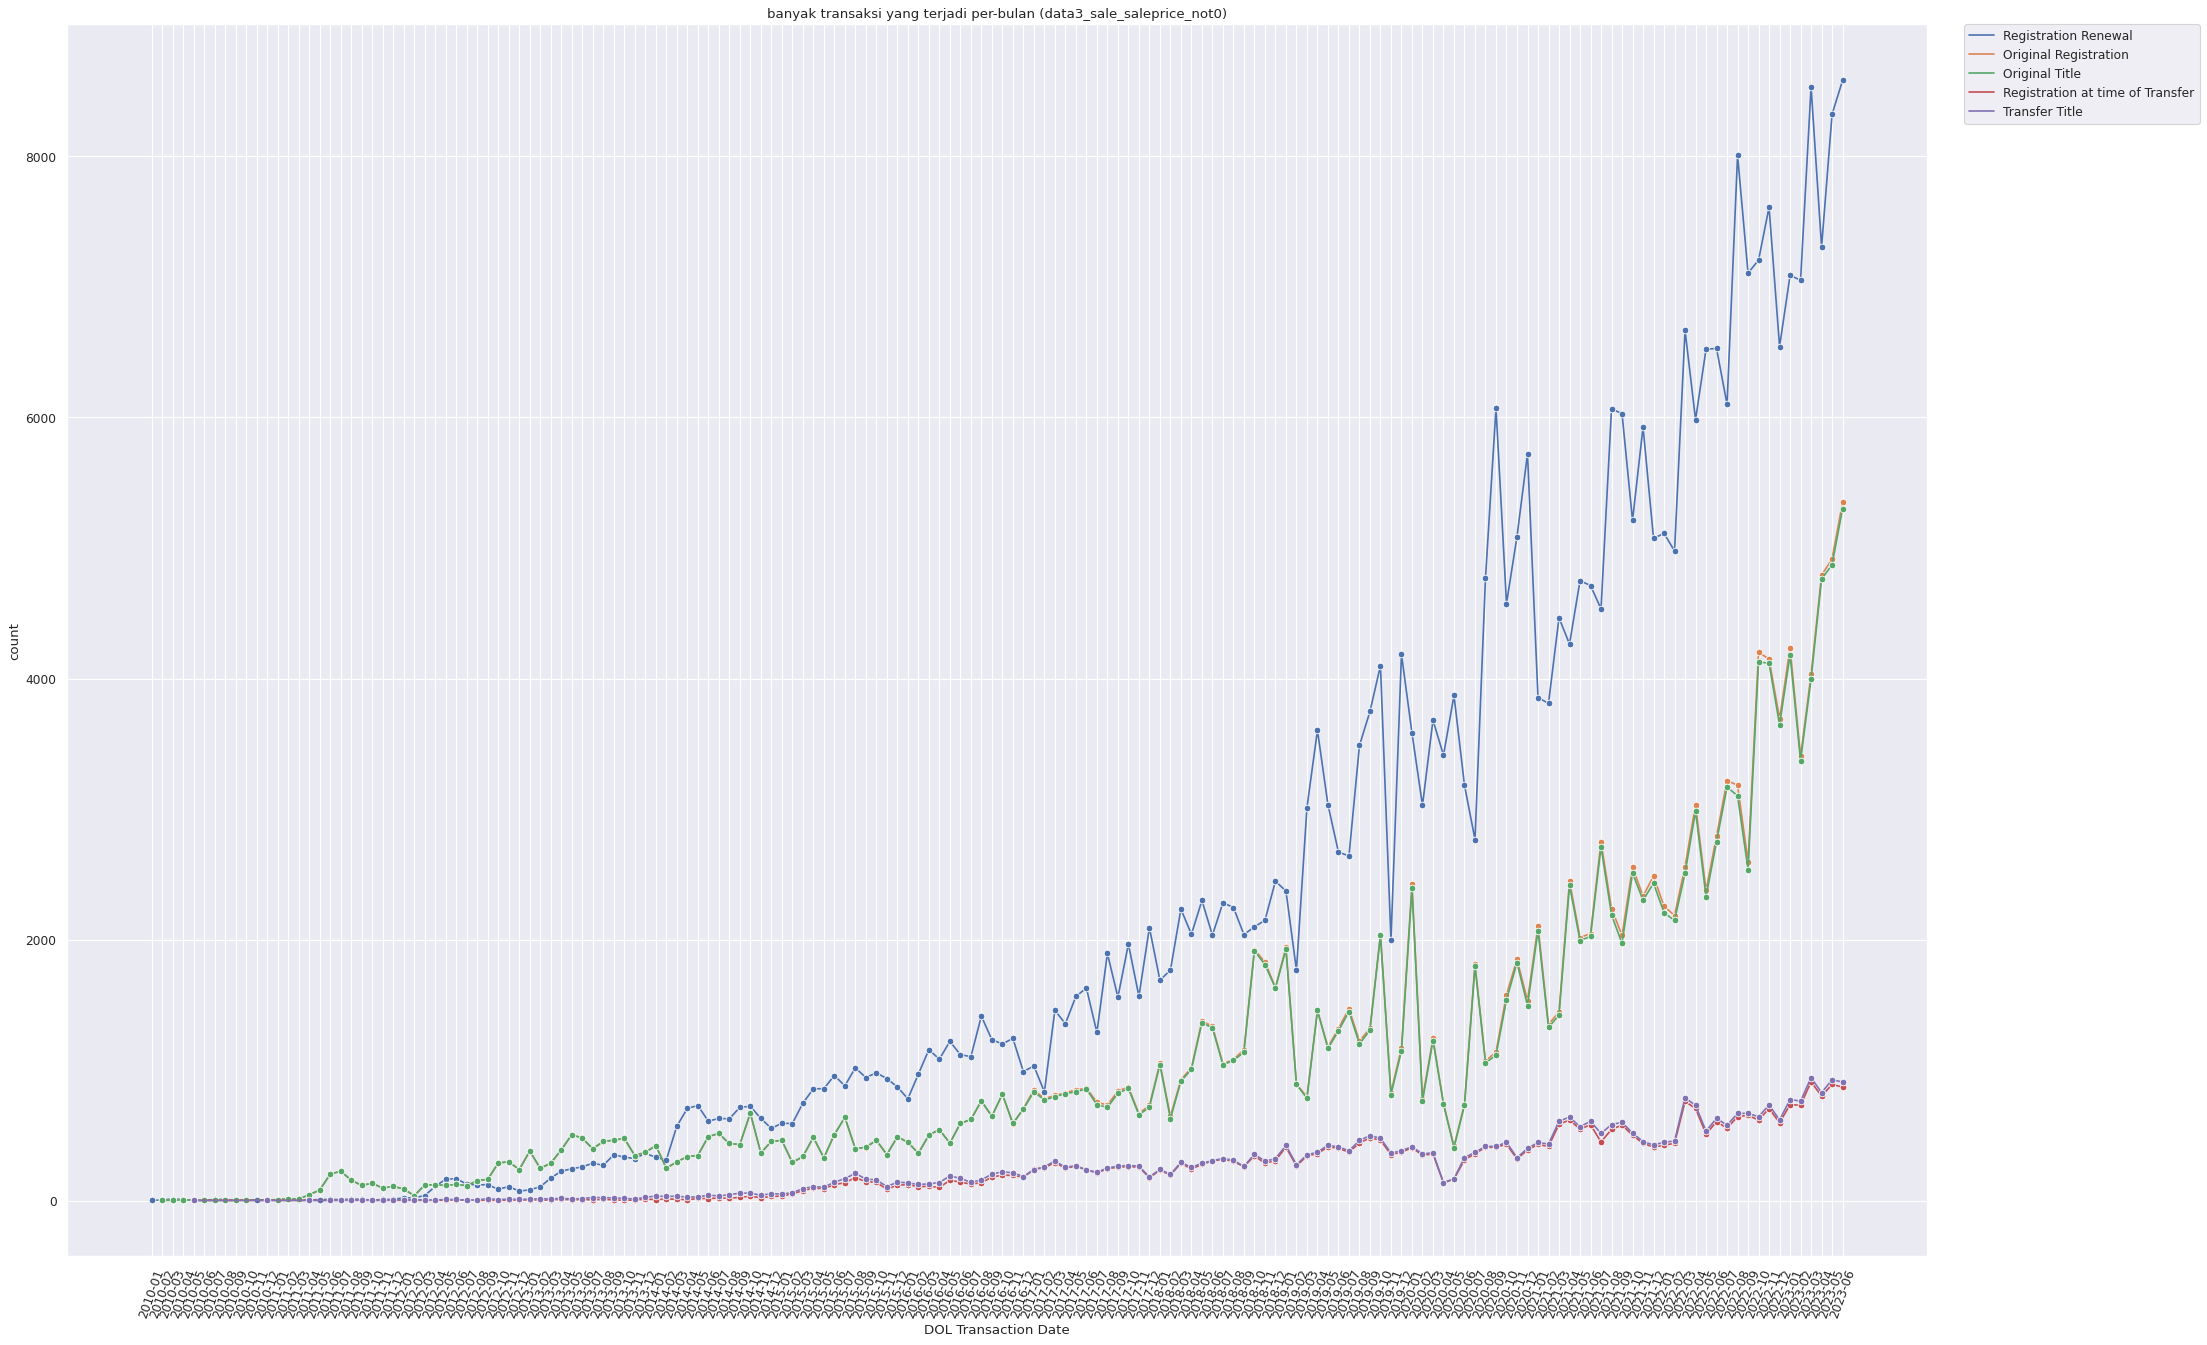

In [ ]:
tes = data_3.copy()
tes['DOL Transaction Date'] = tes['DOL Transaction Date'].dt.to_period("M").astype(str)
tes = tes.groupby(['DOL Transaction Date', 'Transaction Type'], as_index = False)[['Transaction Type']].value_counts()

fig, ax = plt.subplots(figsize = (30,20), dpi = 80)
sns.set(font_scale=1)
sns.lineplot(tes ,x='DOL Transaction Date',y='count', hue = 'Transaction Type', marker="o")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=70)
plt.title("banyak transaksi yang terjadi per-bulan (data3_sale_saleprice_not0)")
plt.show()



*   Dapat dilihat bahwa original title dan original registration memiliki grafik kenaikan yang hampir mirip satu sama lain, ini menandakan setiap ada pembelian (original title) dibarengi dengan original registration
*   Dapat dilihat peningkatan registration renewal yang paling signifikan, karena jika original title meningkat, maka registration renewal meningkat juga dua kali lipat



##County

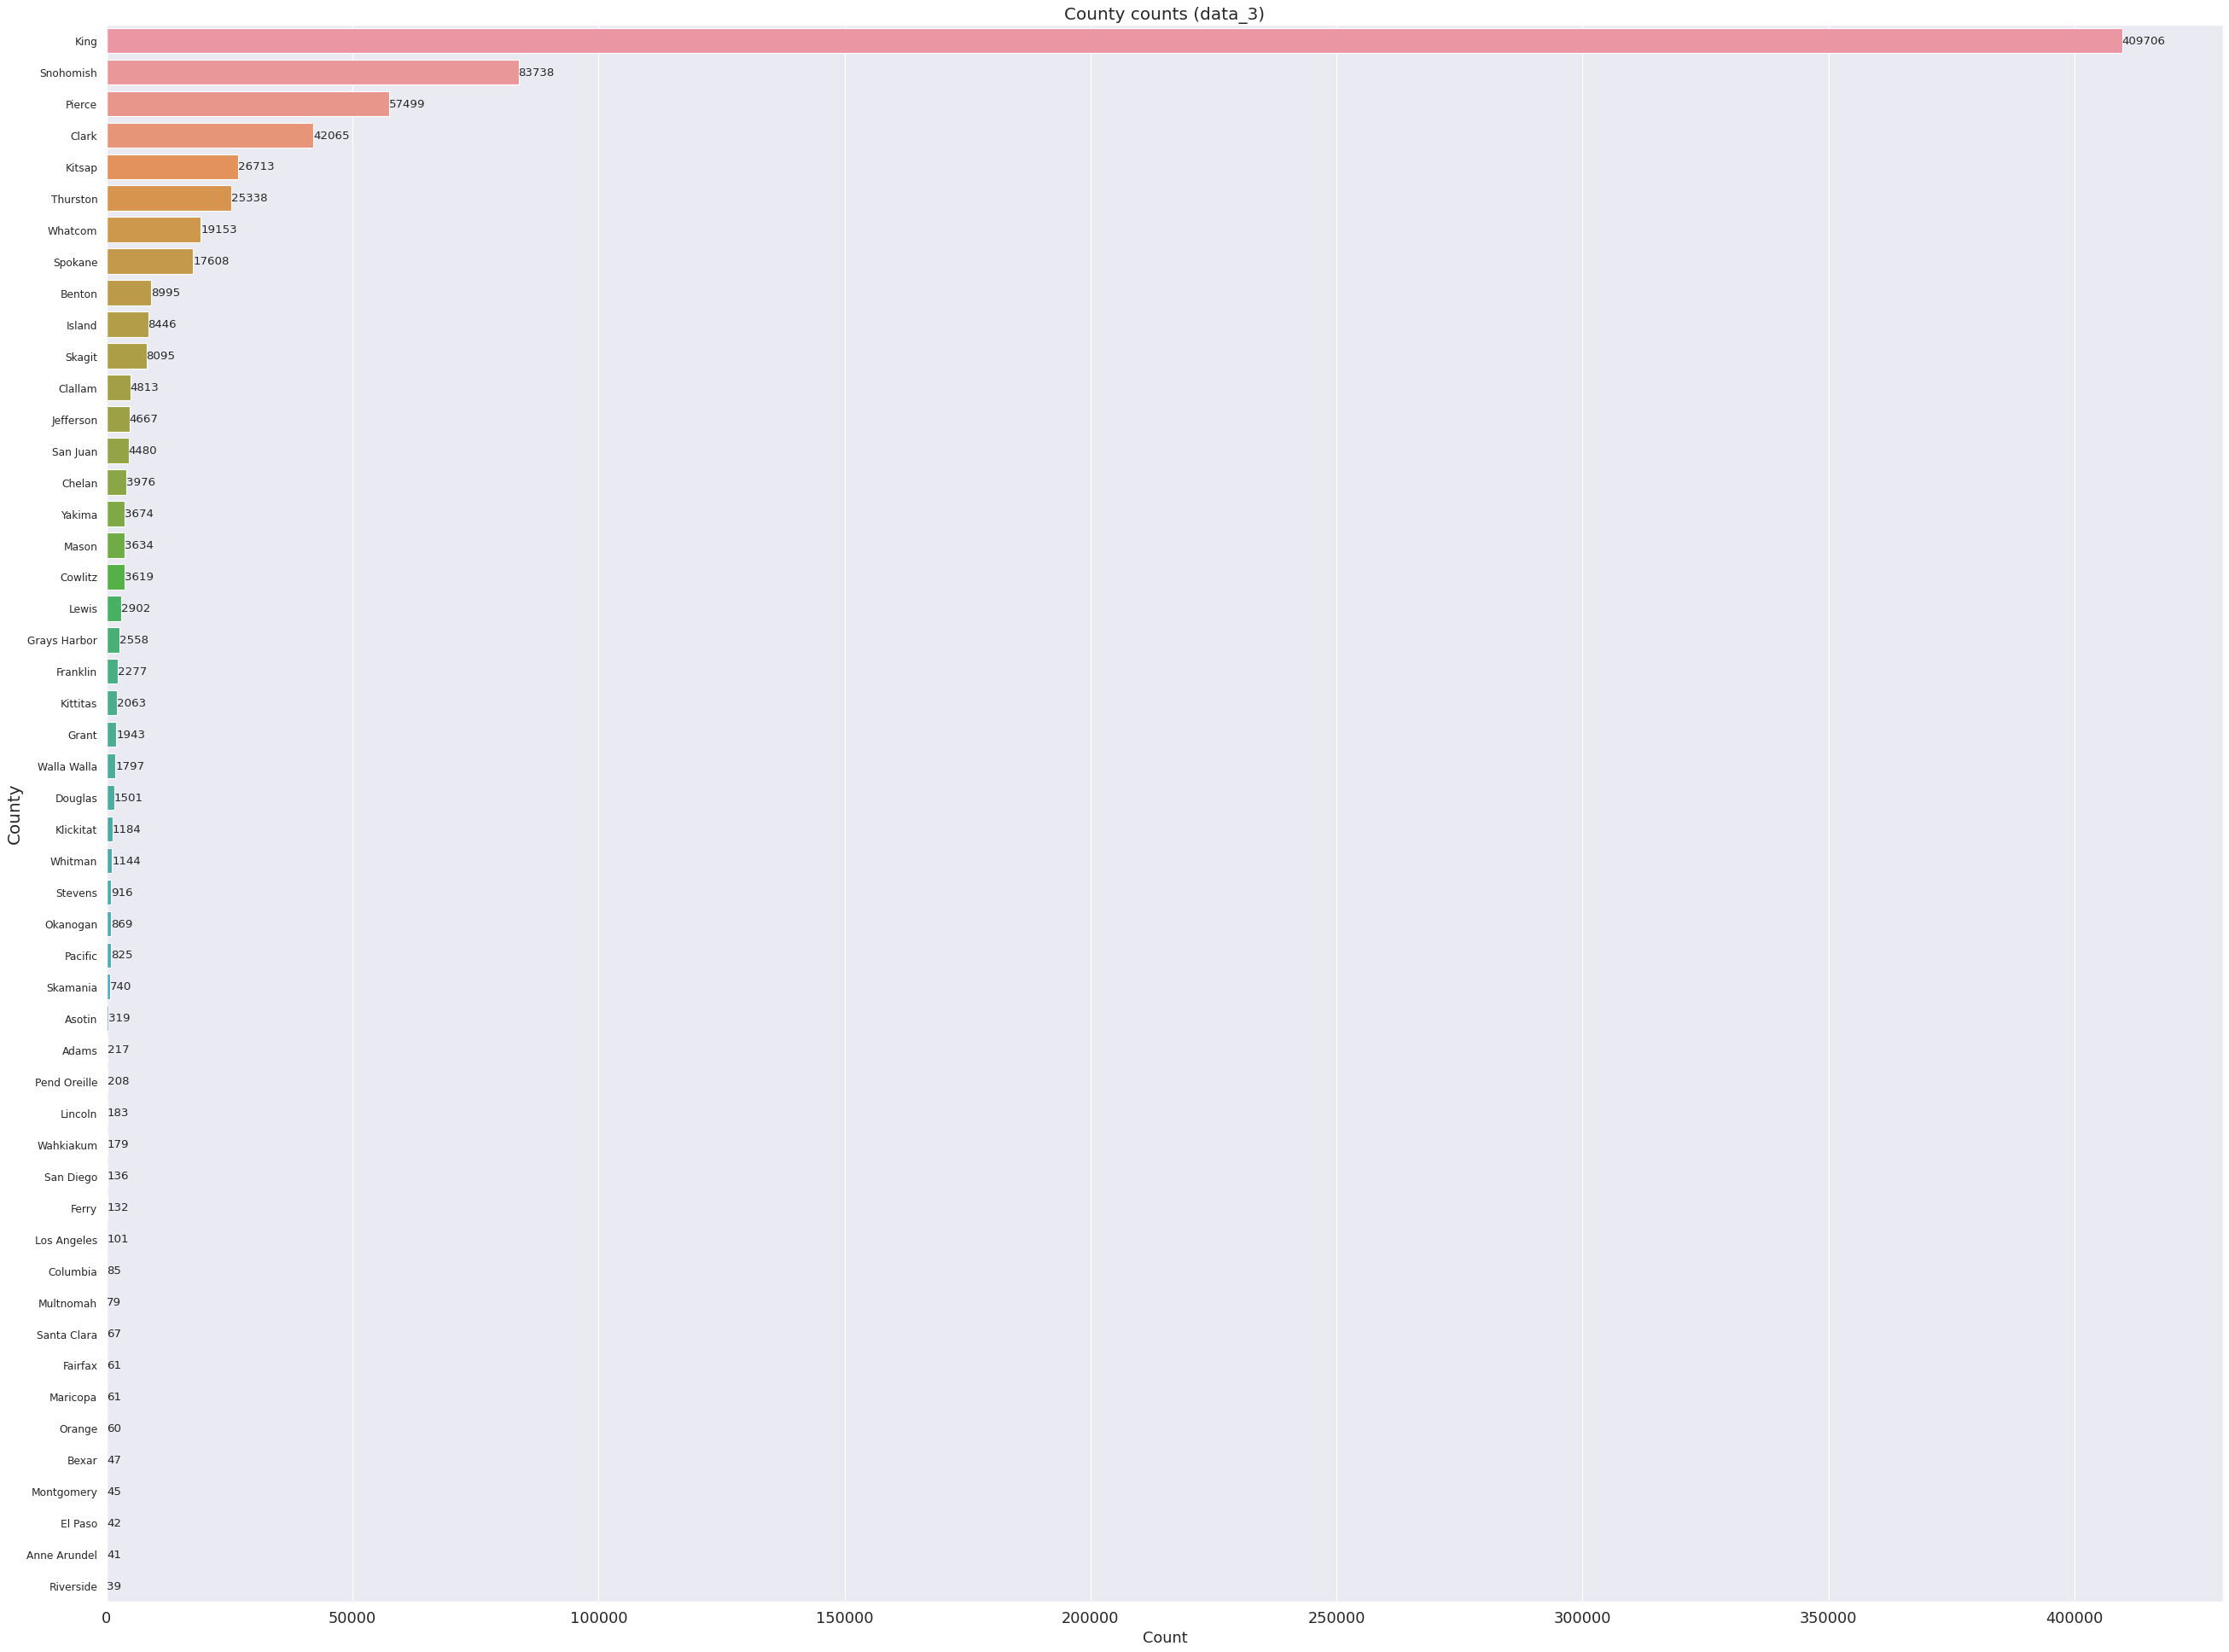

In [ ]:
county = pd.DataFrame(data_3['County'].value_counts()).head(50)

fig, ax = plt.subplots(figsize=(40, 30), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(county,y=county.index,x='County')

plt.title('County counts (data_3)', fontsize=18)
plt.ylabel('County', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

#ini apa yak gangerti gue

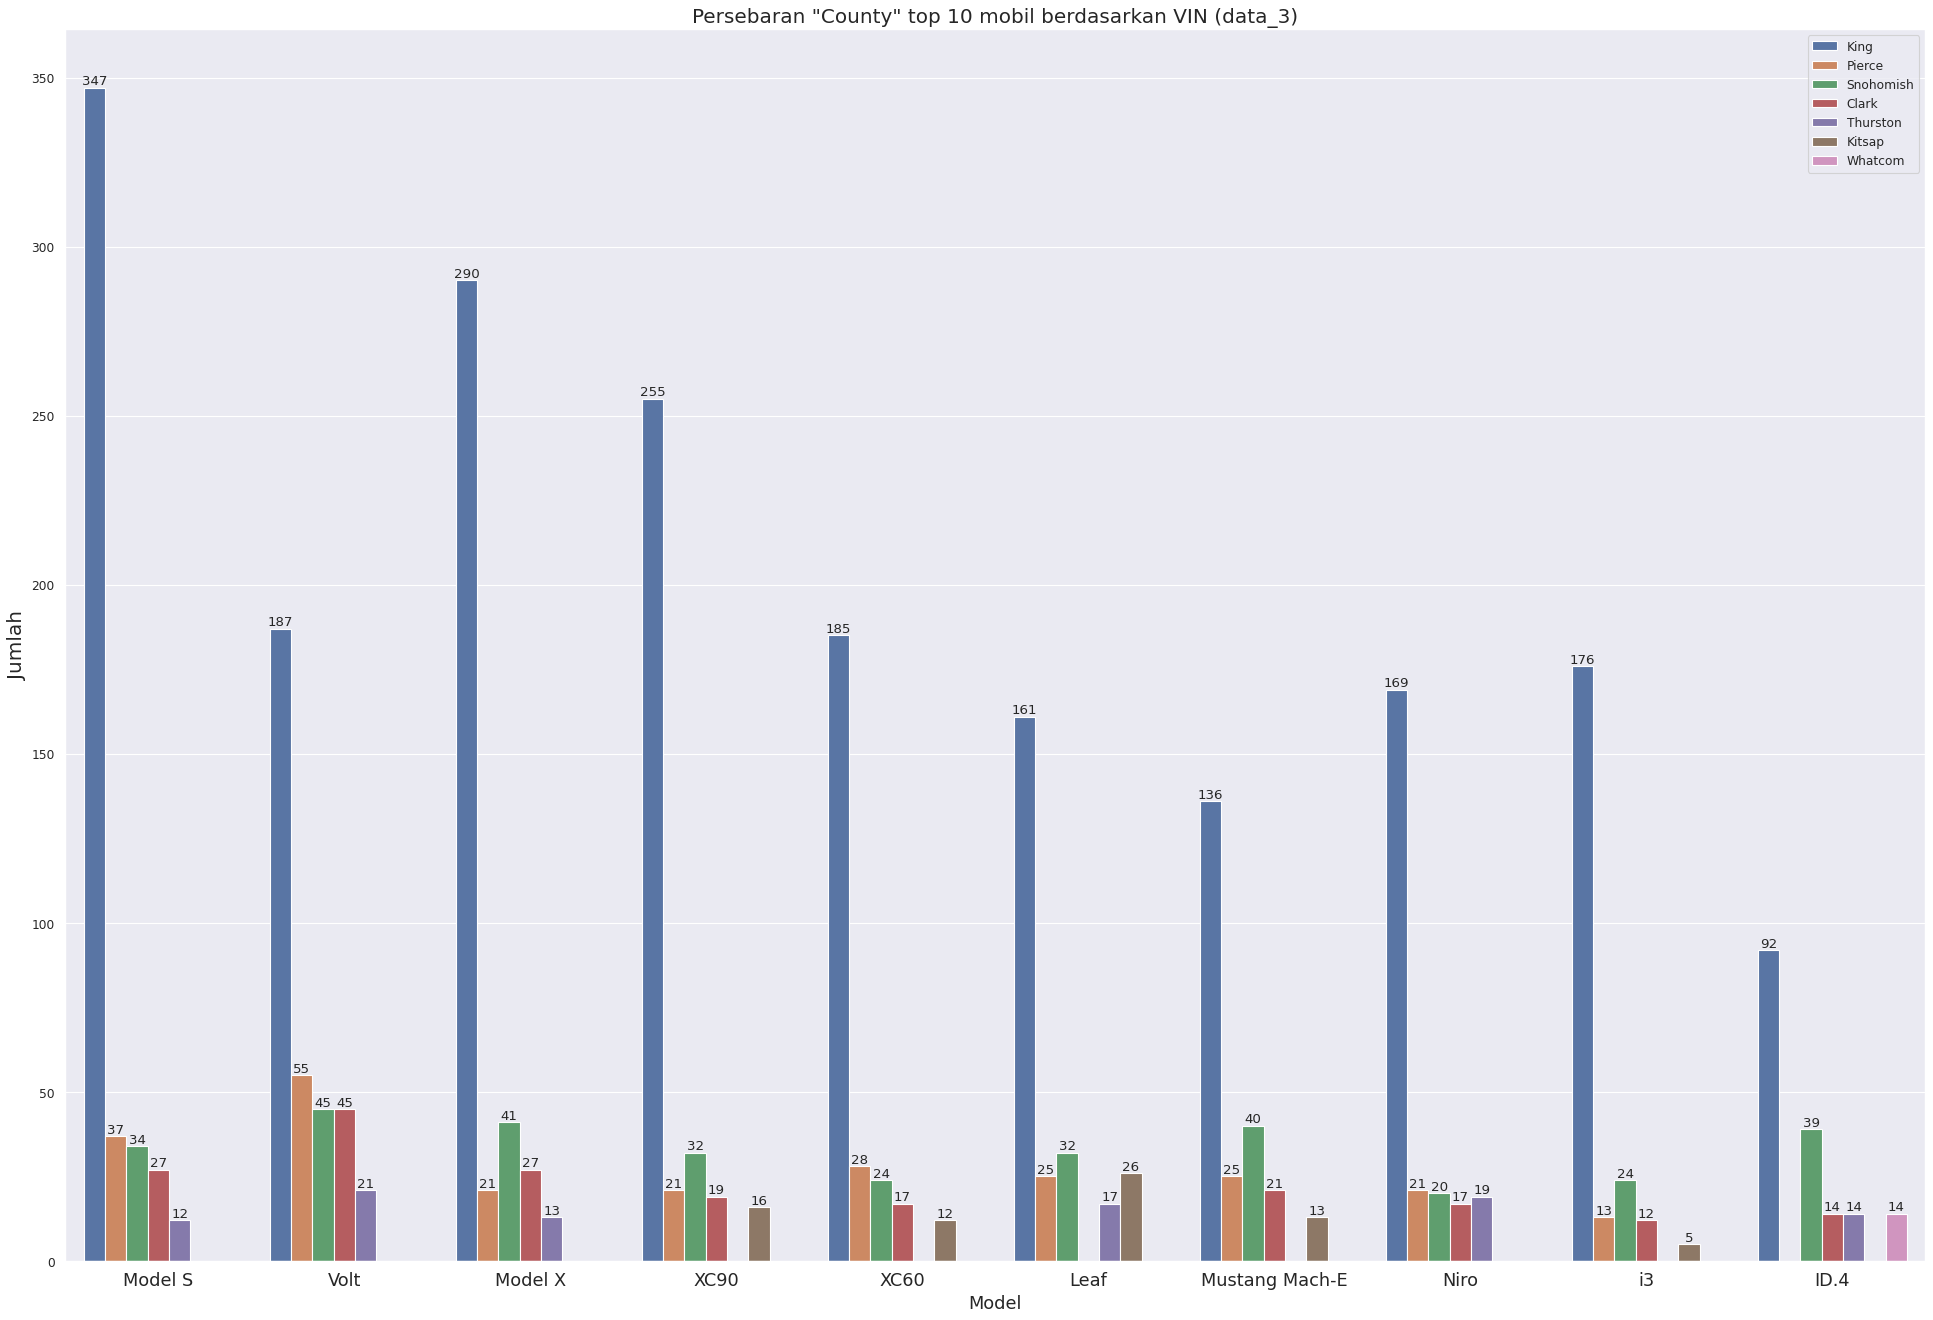

In [ ]:
tes = data_3.copy()
tes = tes.drop_duplicates(subset = ['VIN (1-10)'])
tes = tes.groupby(['County'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in vin_top10_model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = 'County')

plt.title('Persebaran "County" top 10 mobil berdasarkan VIN (data_3)', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['County'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

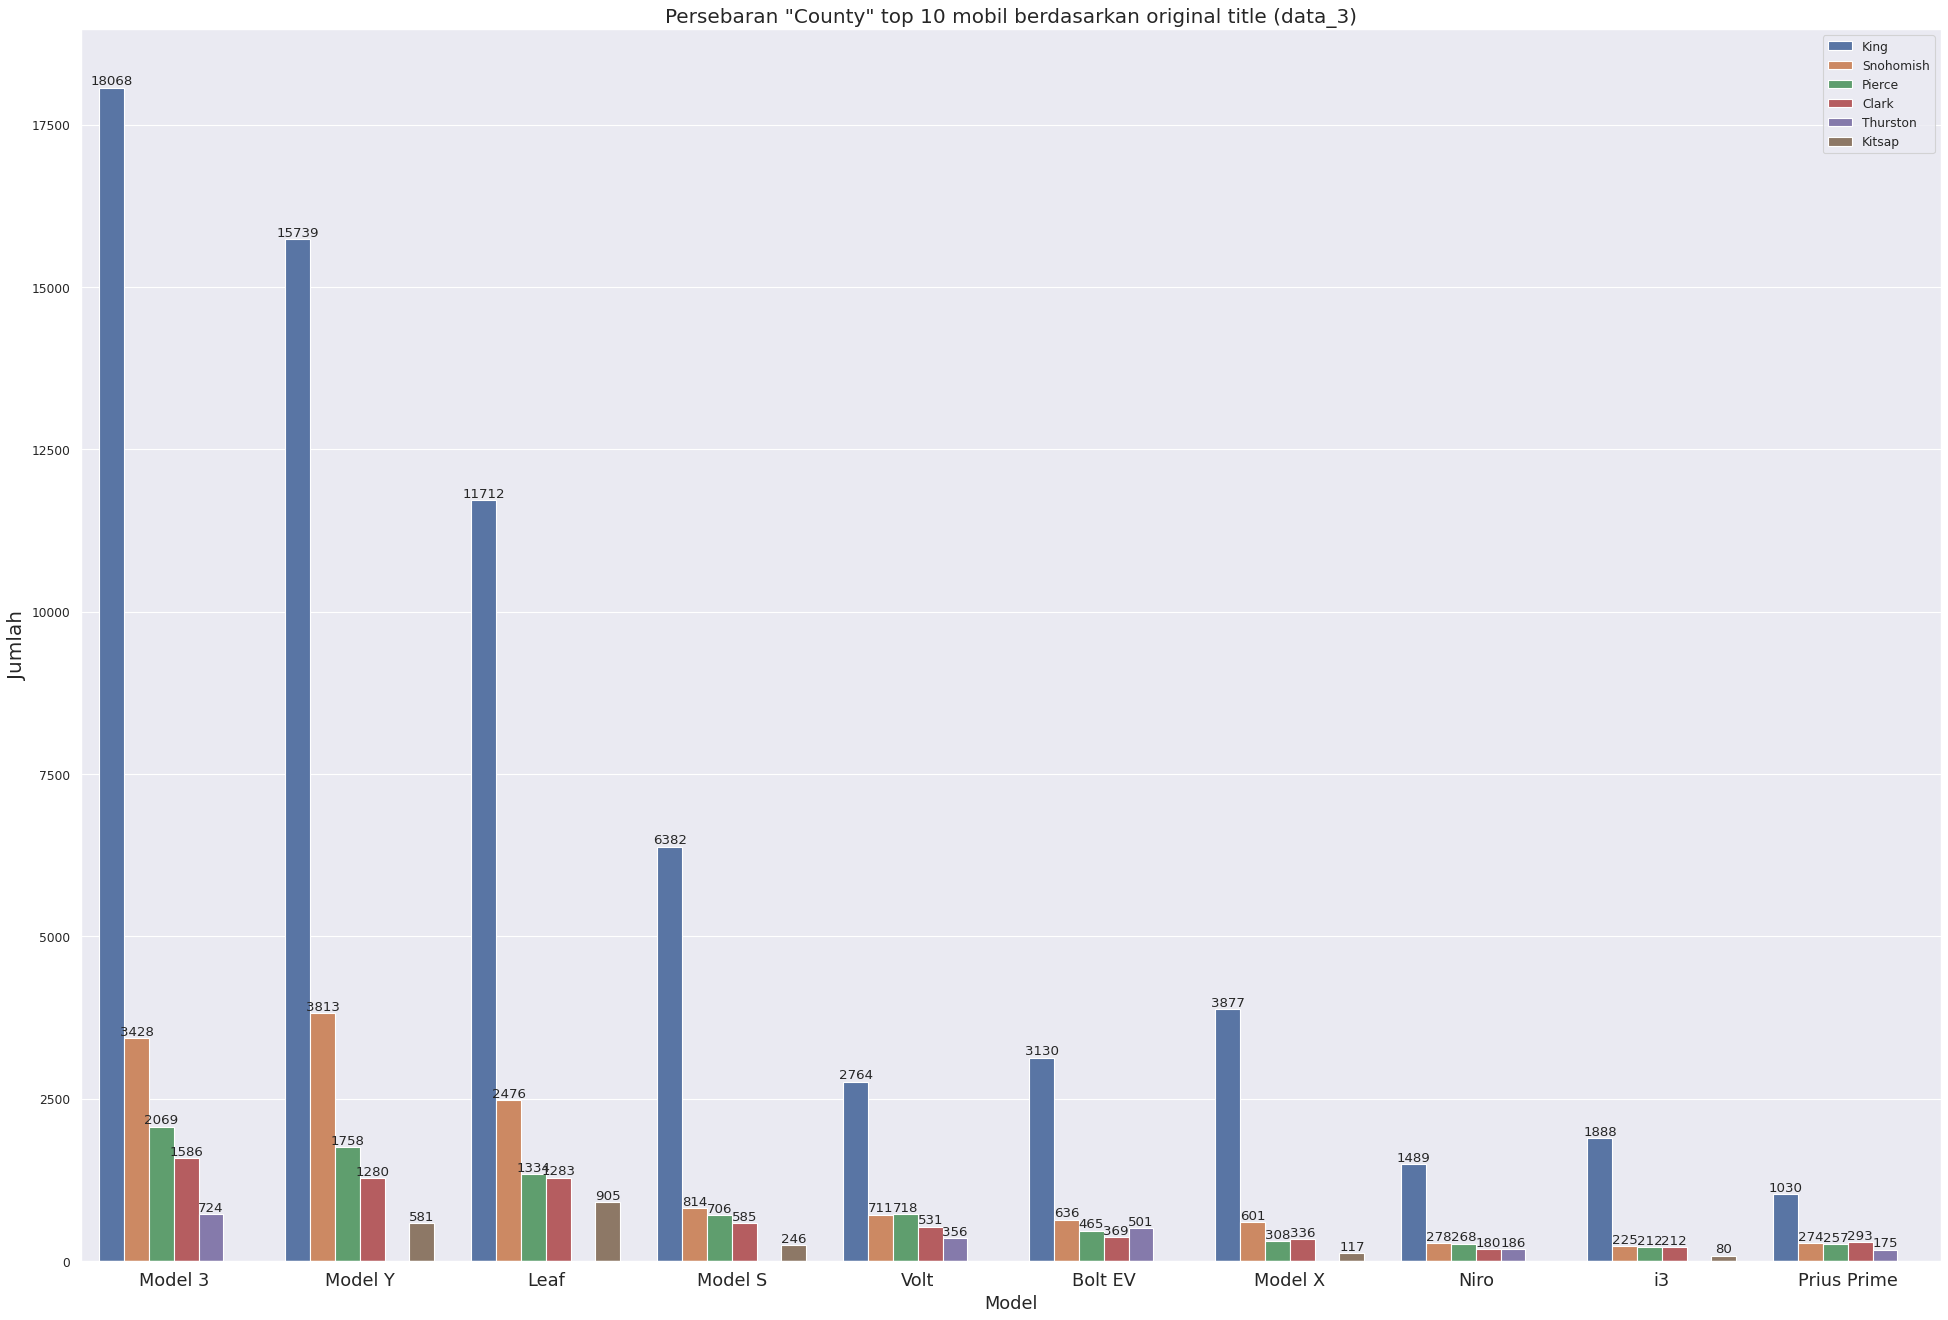

In [ ]:
tes = data_3[data_3['Transaction Type'] == 'Original Title']
tes = tes.groupby(['County'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in originaltitle_top10model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = 'County')

plt.title('Persebaran "County" top 10 mobil berdasarkan original title (data_3)', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['County'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

## City

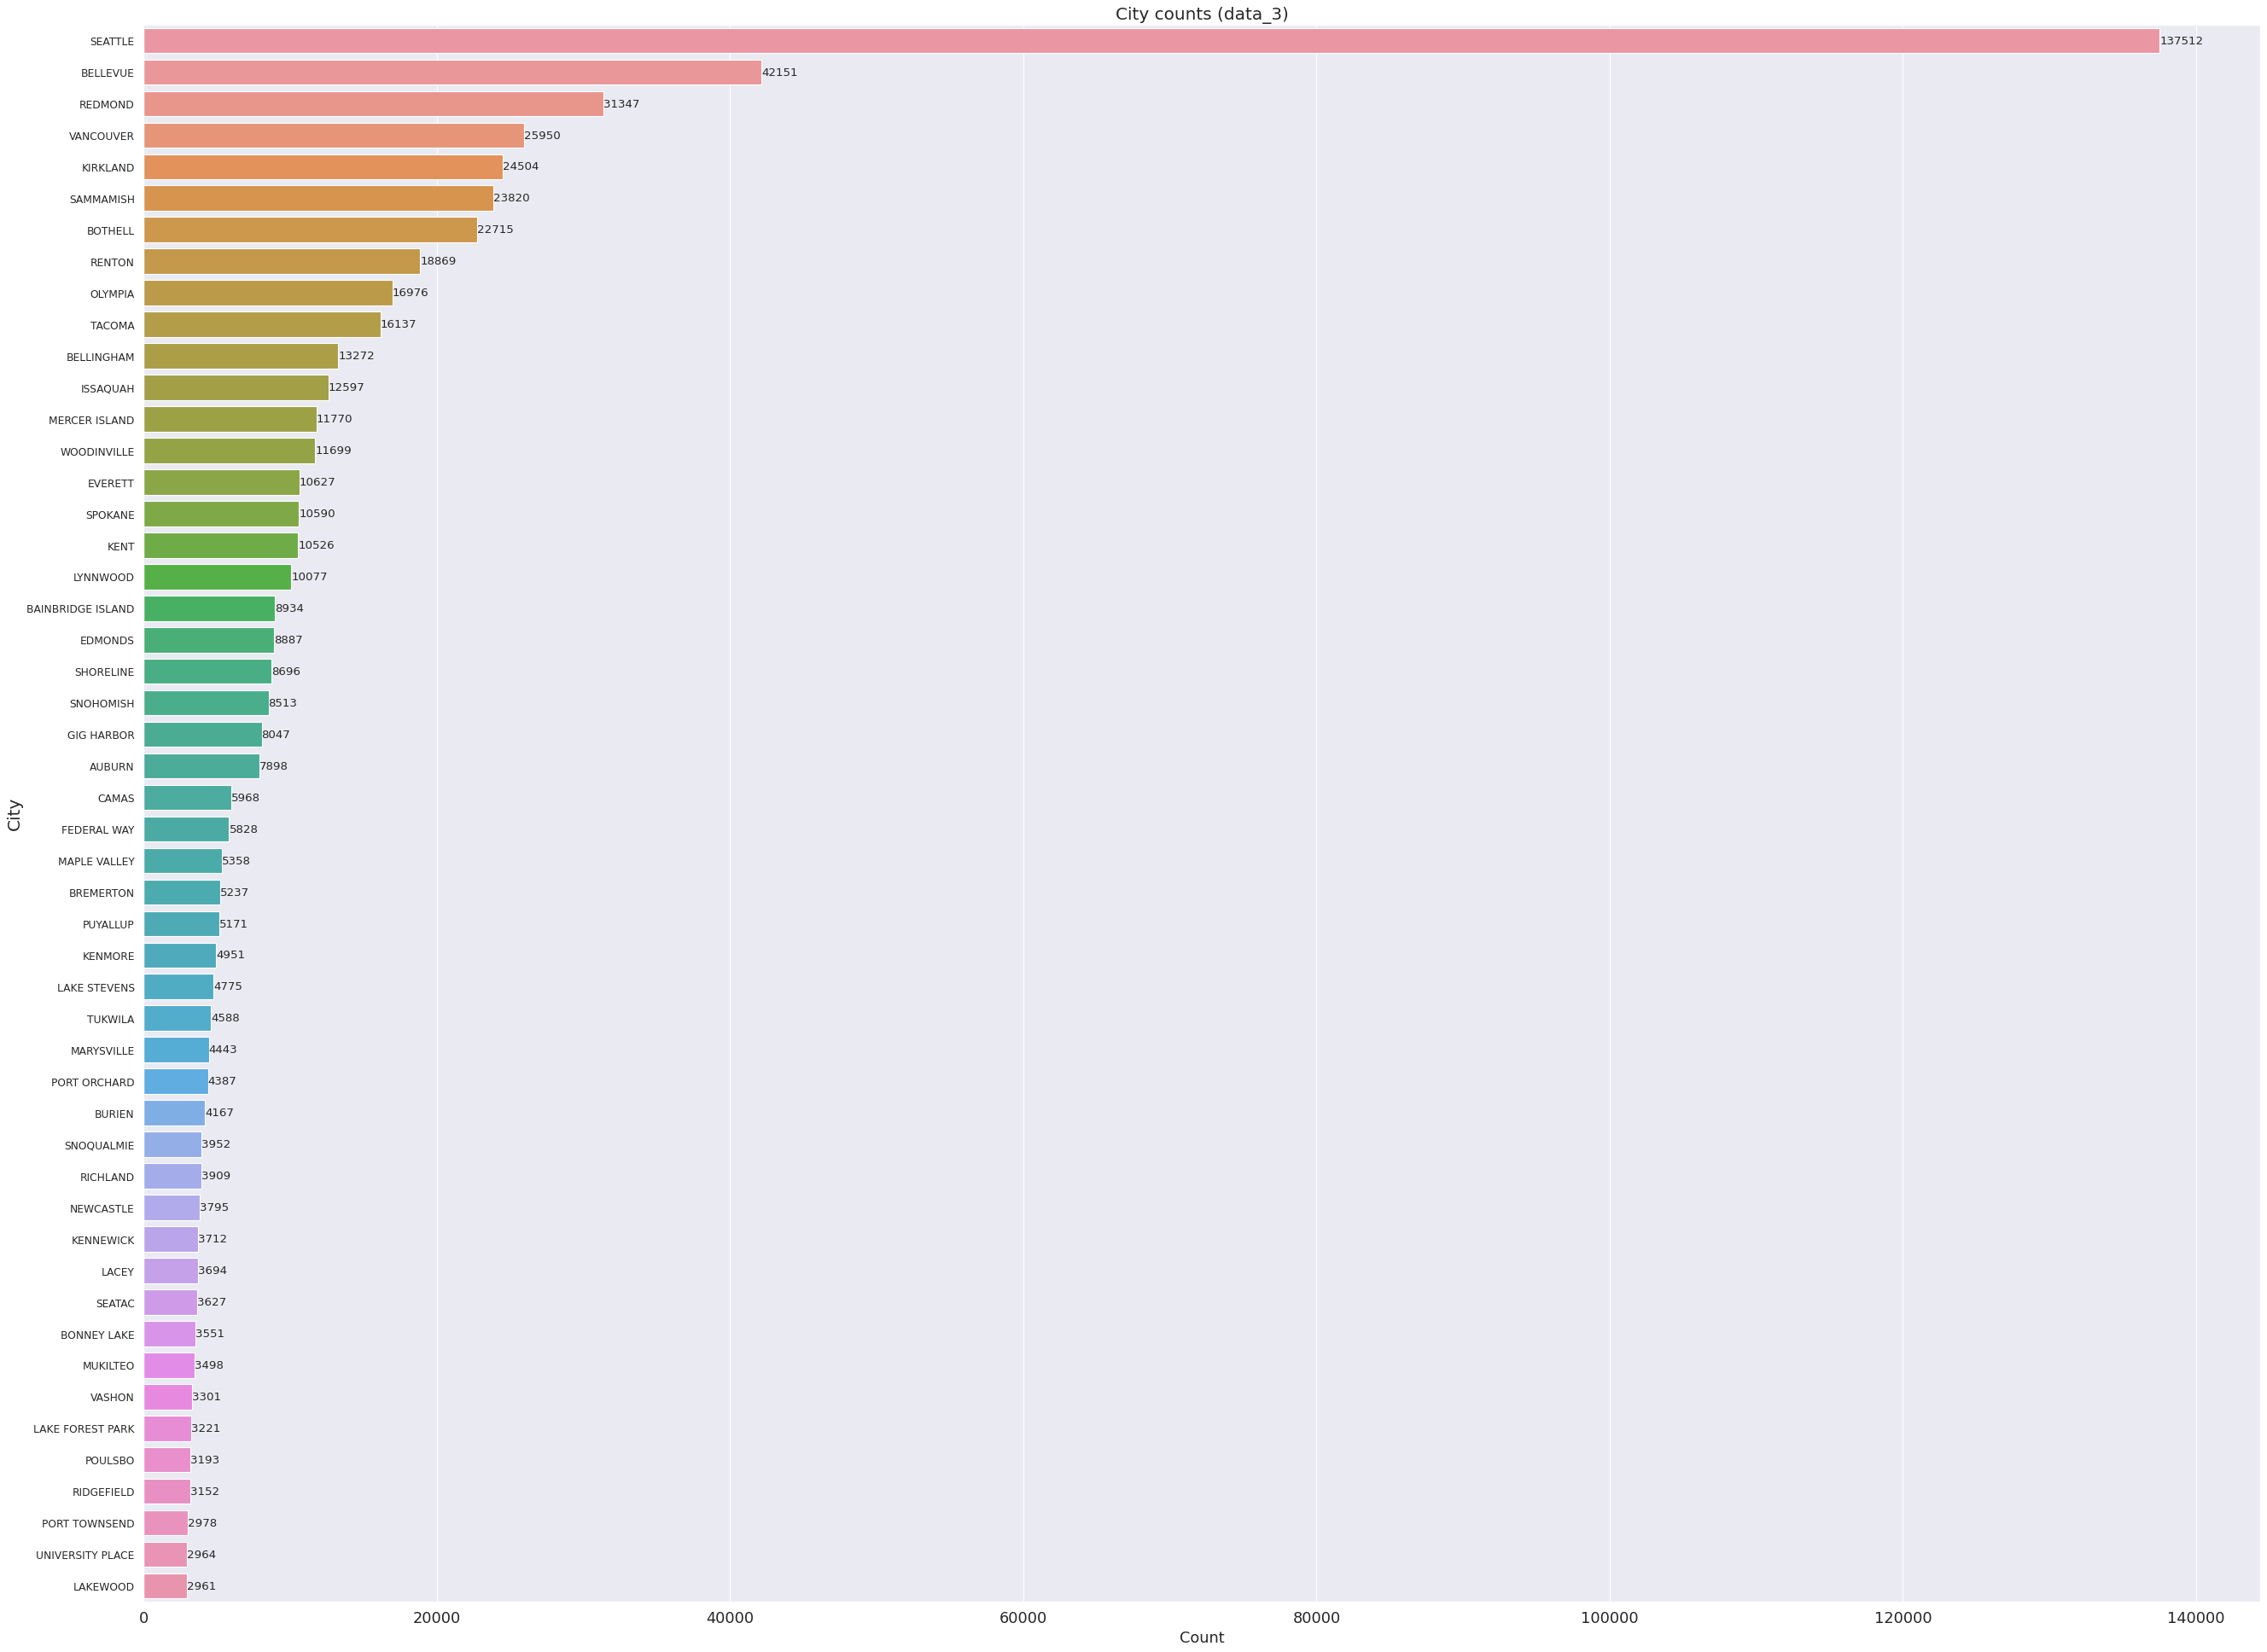

In [ ]:
city = pd.DataFrame(data_3['City'].value_counts()).head(50)

fig, ax = plt.subplots(figsize=(40, 30), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(city,y=city.index,x='City')

plt.title('City counts (data_3)', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()


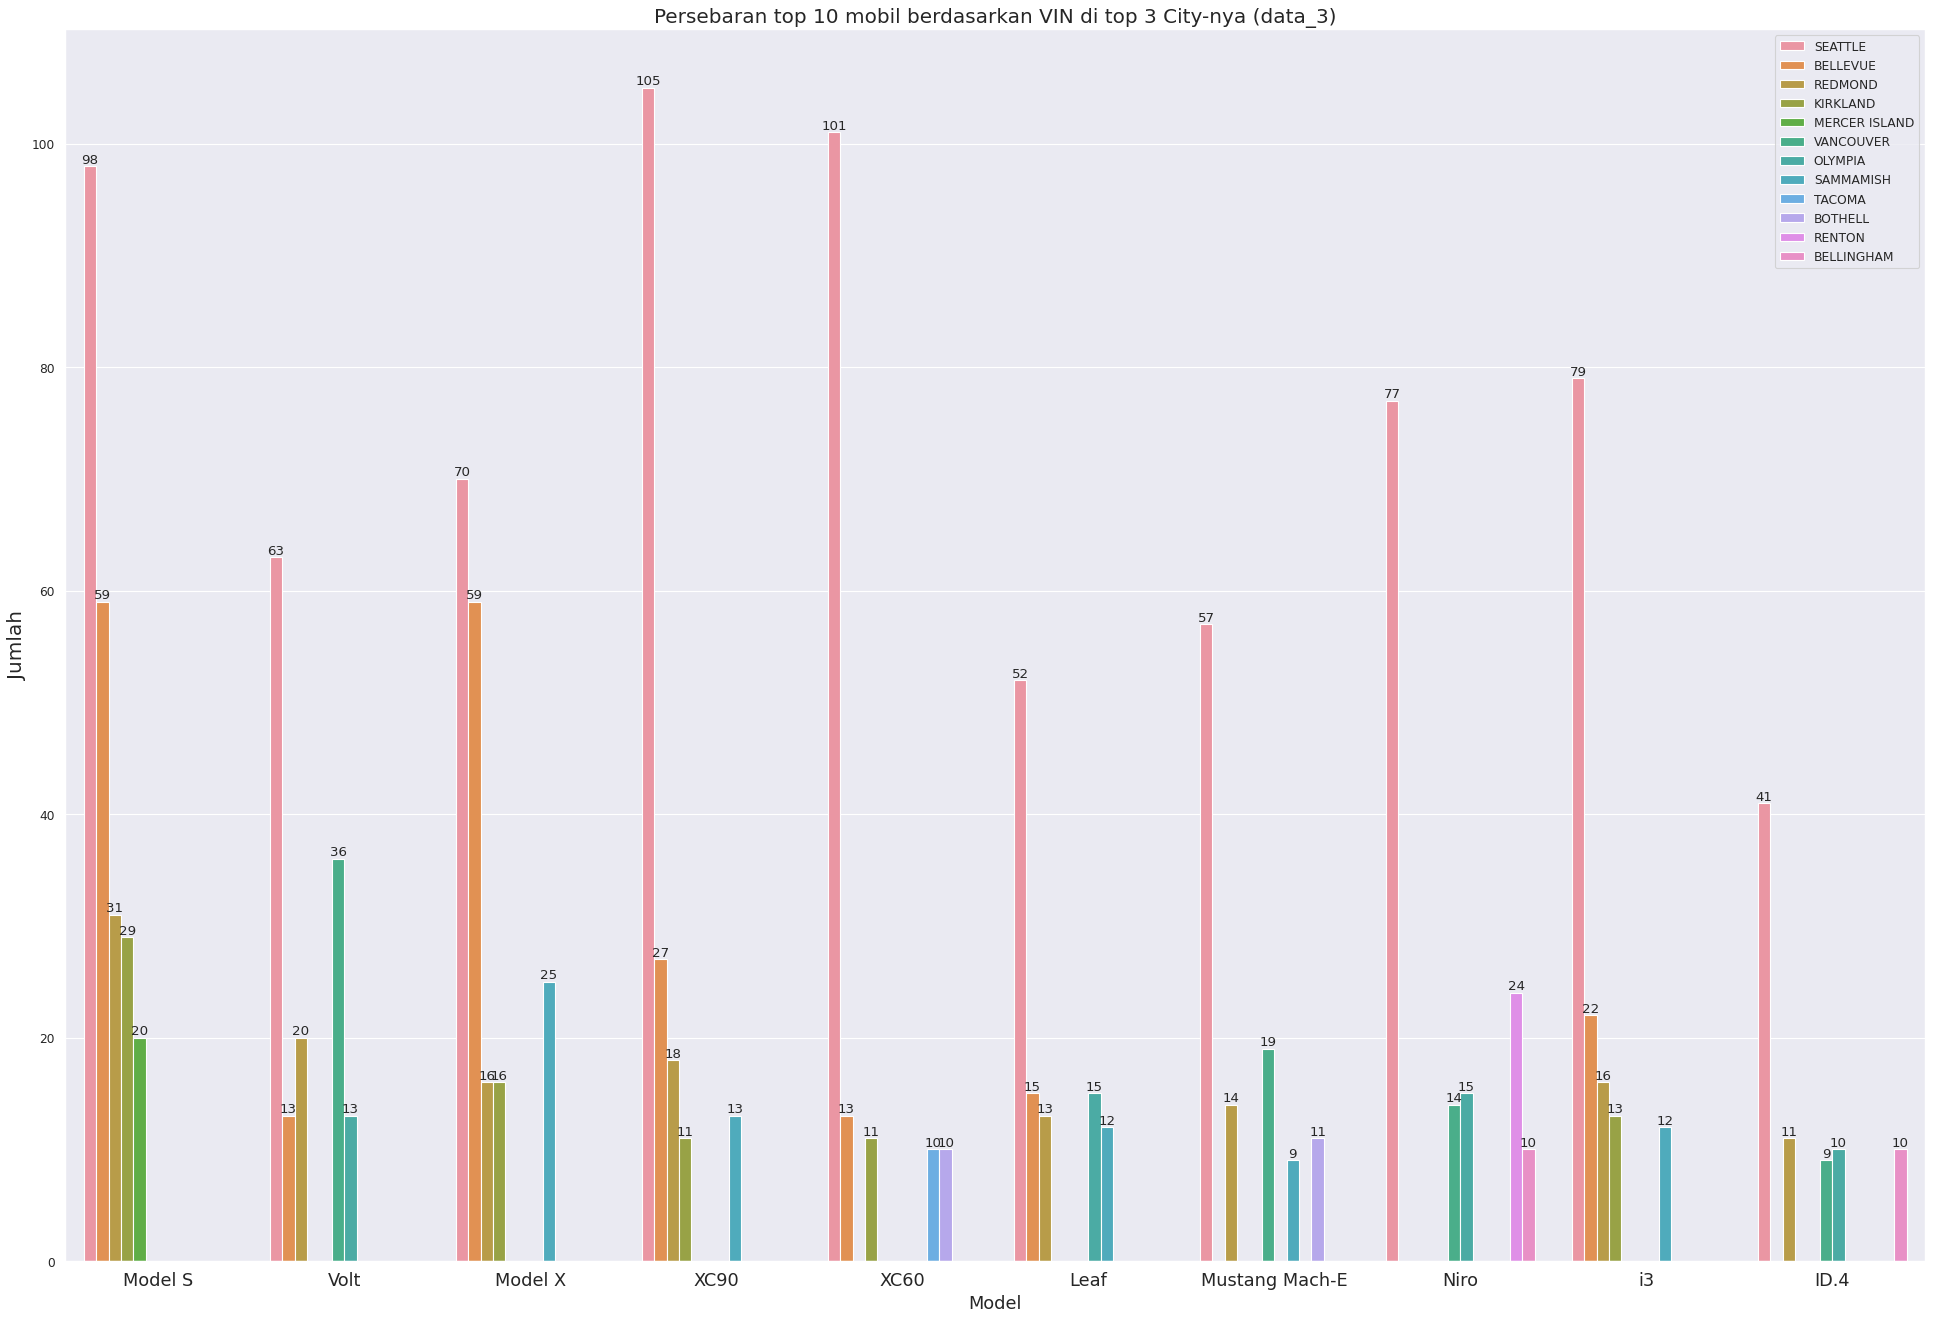

In [ ]:
tes = data_3.copy()
tes = tes.drop_duplicates(subset = ['VIN (1-10)'])
tes = tes.groupby(['City'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in vin_top10_model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = 'City')

plt.title('Persebaran top 10 mobil berdasarkan VIN di top 3 City-nya (data_3)', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['City'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

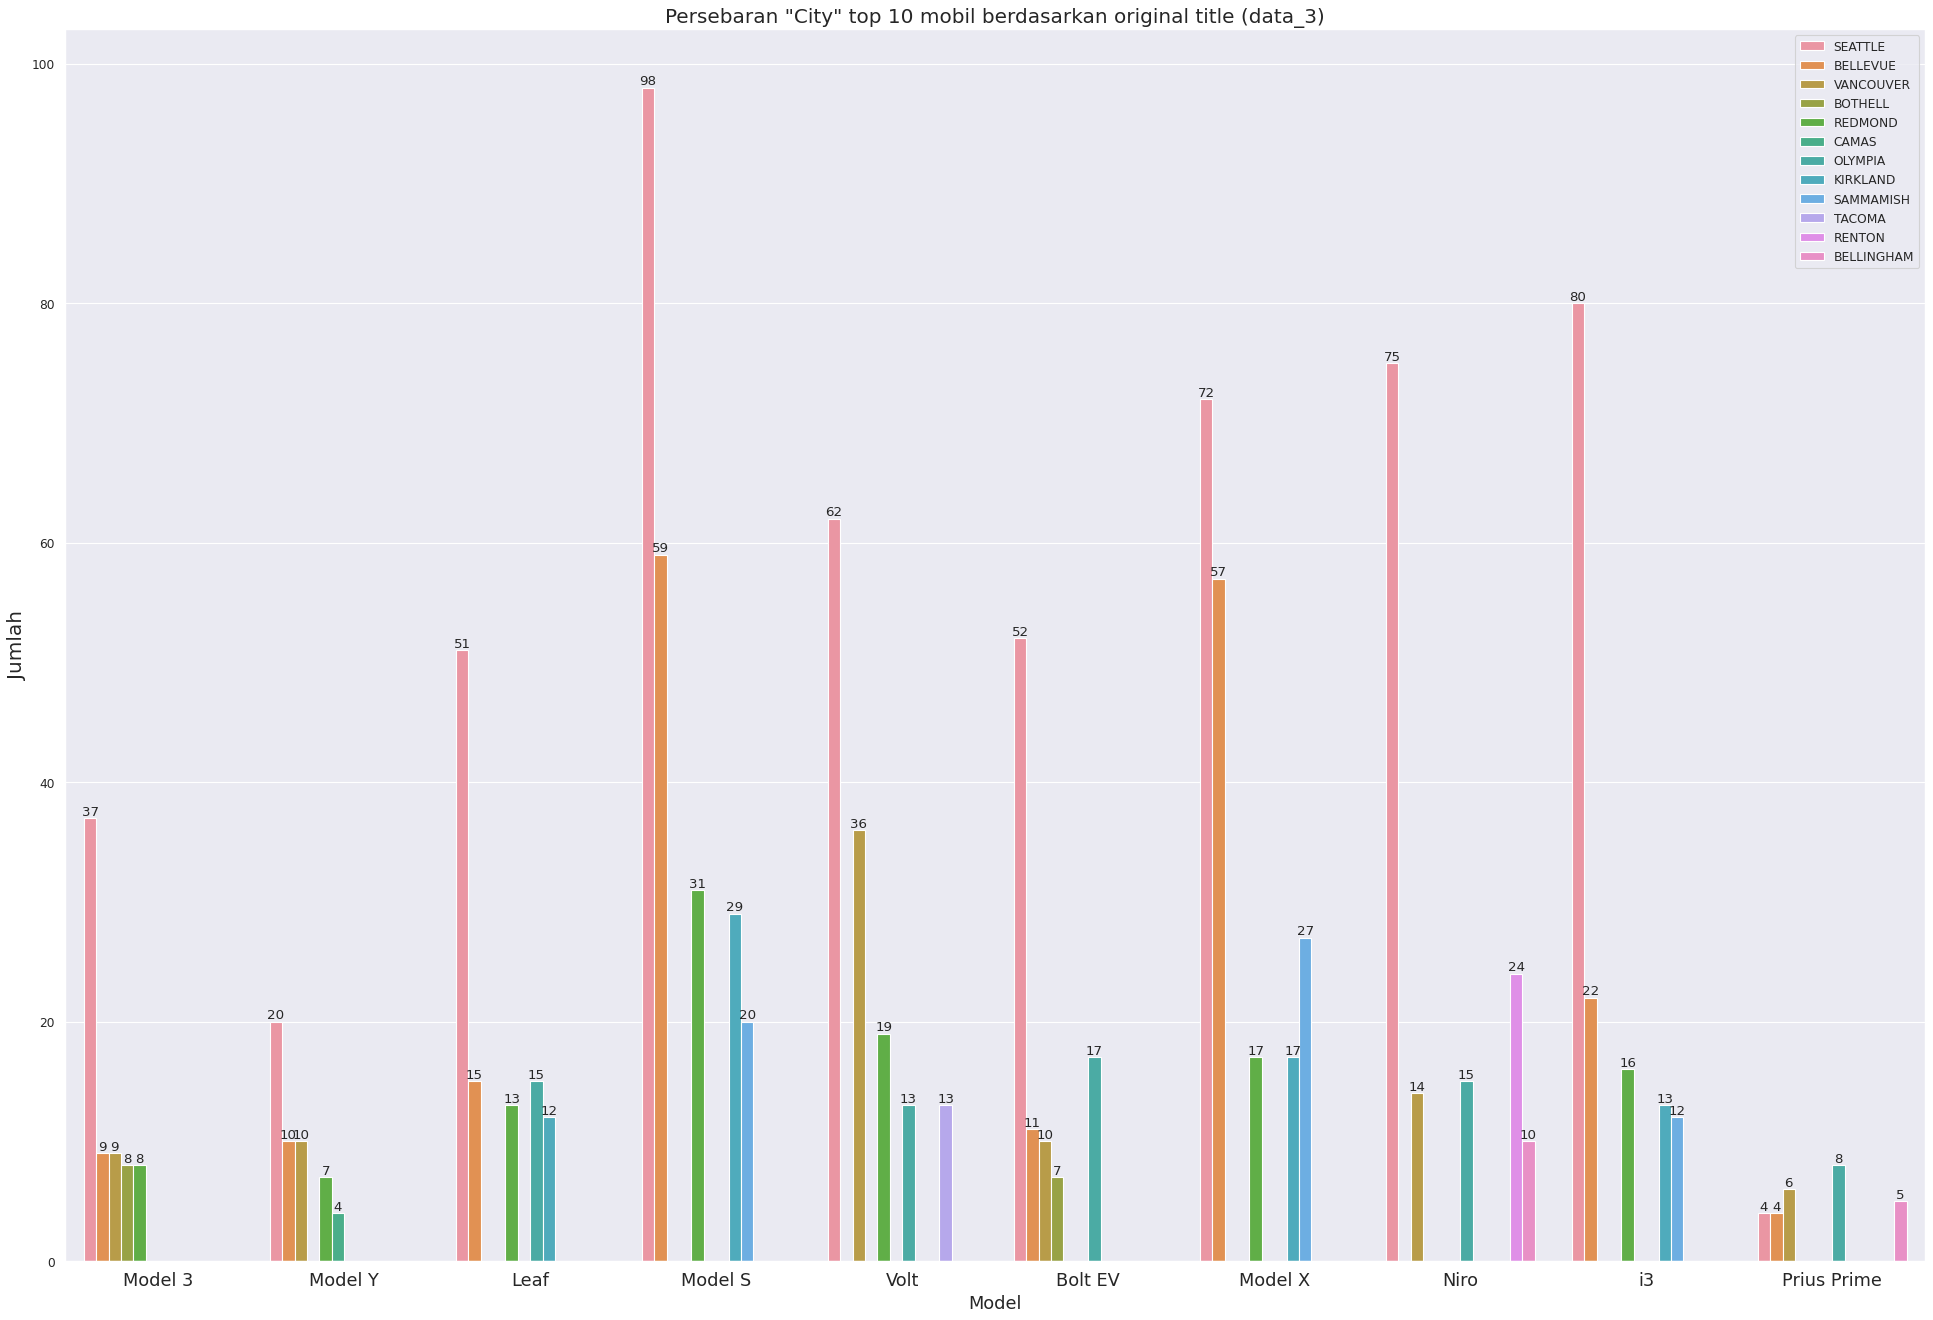

In [ ]:
tes = data_3[data_3['Transaction Type'] == 'Original Title']
tes = tes.drop_duplicates(subset = ['VIN (1-10)'])
tes = tes.groupby(['City'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in originaltitle_top10model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = 'City')

plt.title('Persebaran "City" top 10 mobil berdasarkan original title (data_3)', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['City'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

##2015 HB 2778 Exemption Eligibility

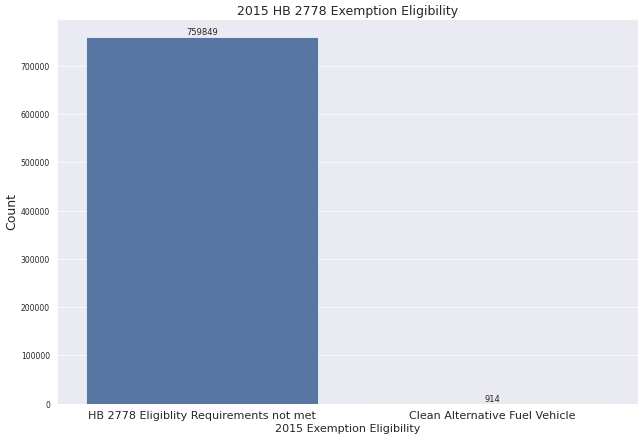

In [ ]:
exemption_eligibility = pd.DataFrame(data_3['2015 HB 2778 Exemption Eligibility'].value_counts())
exemption_eligibility.index = exemption_eligibility.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(exemption_eligibility,y='2015 HB 2778 Exemption Eligibility',x=exemption_eligibility.index)

plt.title('2015 HB 2778 Exemption Eligibility', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('2015 Exemption Eligibility', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

tidak diketahui kenapa tidak memenuhi kriteria diatas padahal kebanyakan tipe CAFH mobilnya adalah BEV

##2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility

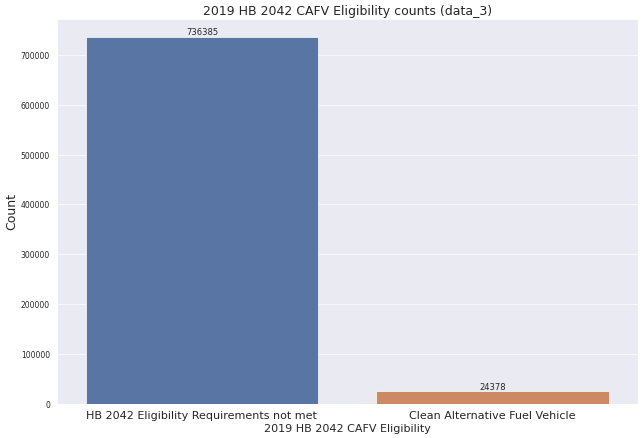

In [ ]:
cafv_eligibility = pd.DataFrame(data_3['2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())
cafv_eligibility.index = cafv_eligibility.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(cafv_eligibility,y='2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',x=cafv_eligibility.index)

plt.title('2019 HB 2042 CAFV Eligibility counts (data_3)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('2019 HB 2042 CAFV Eligibility', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

tidak diketahui kenapa tidak memenuhi kriteria diatas padahal kebanyakan tipe CAFH mobilnya adalah BEV

## Meets 2019 HB 2042 Electric Range Requirement

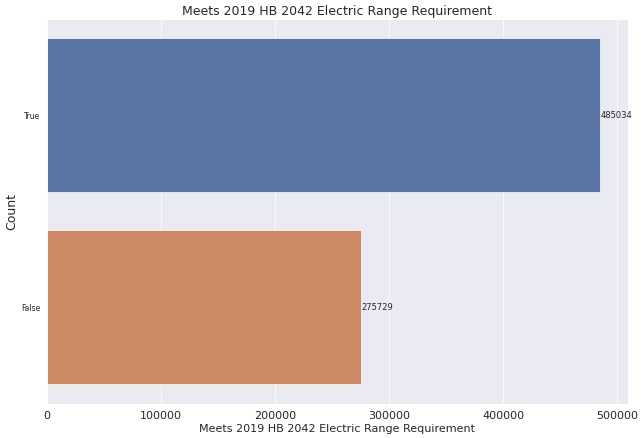

In [ ]:
battery_range_req = pd.DataFrame(data_3['Meets 2019 HB 2042 Electric Range Requirement'].value_counts())
battery_range_req.index = battery_range_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(battery_range_req,y=battery_range_req.index,x='Meets 2019 HB 2042 Electric Range Requirement')

plt.title('Meets 2019 HB 2042 Electric Range Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Meets 2019 HB 2042 Electric Range Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

## Meets 2019 HB 2042 Sale Date Requirement

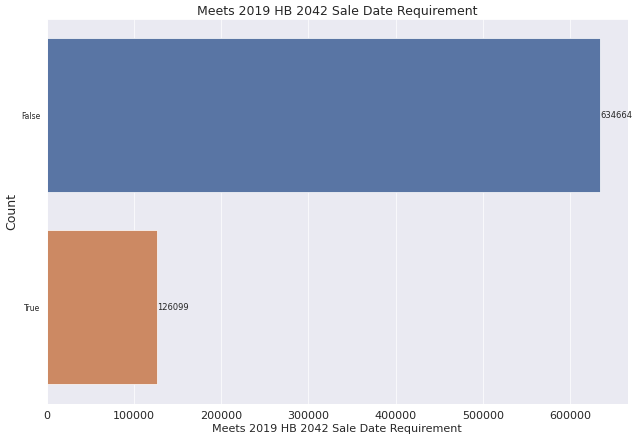

In [ ]:
battery_range_req = pd.DataFrame(data_3['Meets 2019 HB 2042 Sale Date Requirement'].value_counts())
battery_range_req.index = battery_range_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(battery_range_req,y=battery_range_req.index,x='Meets 2019 HB 2042 Sale Date Requirement')

plt.title('Meets 2019 HB 2042 Sale Date Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Meets 2019 HB 2042 Sale Date Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

## Meets 2019 HB 2042 Sale Price/Value Requirement

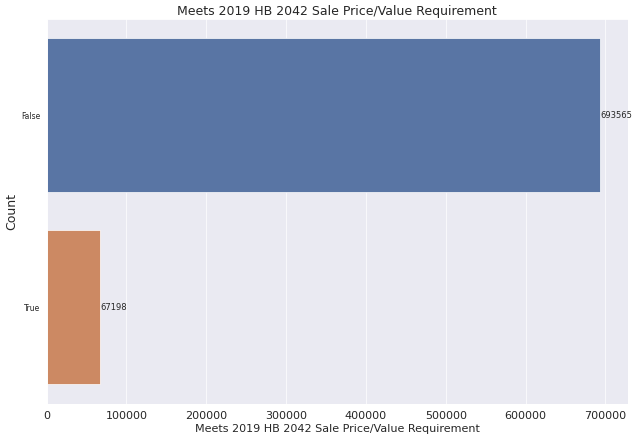

In [ ]:
battery_range_req = pd.DataFrame(data_3['Meets 2019 HB 2042 Sale Price/Value Requirement'].value_counts())
battery_range_req.index = battery_range_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(battery_range_req,y=battery_range_req.index,x='Meets 2019 HB 2042 Sale Price/Value Requirement')

plt.title('Meets 2019 HB 2042 Sale Price/Value Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Meets 2019 HB 2042 Sale Price/Value Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

banyak yang tidak emmenuhi 3 "meets" diatas karena ini peraturannya baru berlaku semenjak 2019, sehingga otomatis yang sebelum 2019 langsung tidak memenuhi

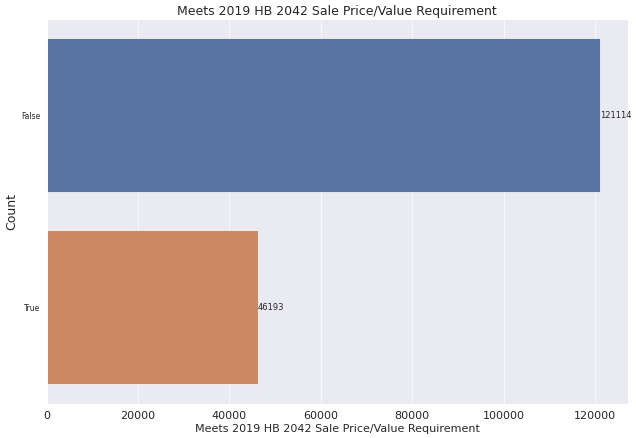

In [ ]:
tes = data_3[data_3['Transaction Type'] == 'Original Title']
battery_range_req = pd.DataFrame(tes['Meets 2019 HB 2042 Sale Price/Value Requirement'].value_counts())
battery_range_req.index = battery_range_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(battery_range_req,y=battery_range_req.index,x='Meets 2019 HB 2042 Sale Price/Value Requirement')

plt.title('Meets 2019 HB 2042 Sale Price/Value Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Meets 2019 HB 2042 Sale Price/Value Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

##2019 HB 2042: Battery Range Requirement

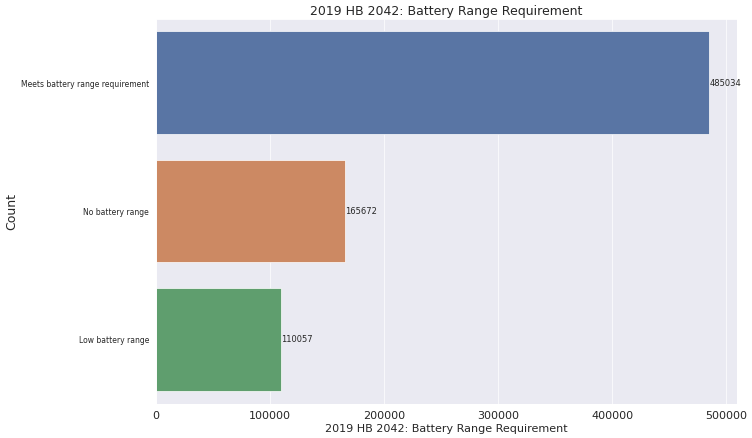

In [ ]:
battery_range_req = pd.DataFrame(data_3['2019 HB 2042: Battery Range Requirement'].value_counts())
battery_range_req.index = battery_range_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(battery_range_req,y=battery_range_req.index,x='2019 HB 2042: Battery Range Requirement')

plt.title('2019 HB 2042: Battery Range Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('2019 HB 2042: Battery Range Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

##2019 HB 2042: Purchase Date Requirement

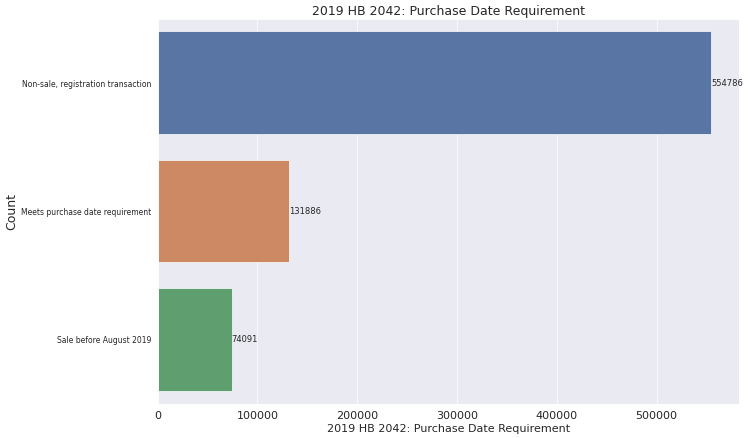

In [ ]:
purchase_date_req = pd.DataFrame(data_3['2019 HB 2042: Purchase Date Requirement'].value_counts())
purchase_date_req.index = purchase_date_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(purchase_date_req,y=purchase_date_req.index,x='2019 HB 2042: Purchase Date Requirement')

plt.title('2019 HB 2042: Purchase Date Requirement', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('2019 HB 2042: Purchase Date Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

##2019 HB 2042: Sale Price/Value Requirement


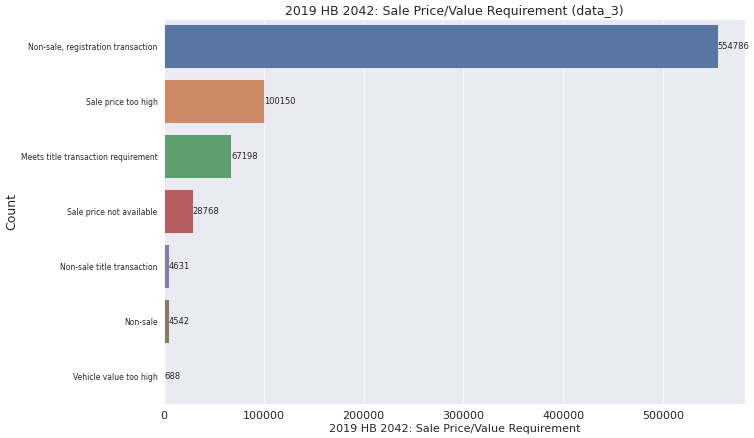

In [ ]:
saleprice_req = pd.DataFrame(data_3['2019 HB 2042: Sale Price/Value Requirement'].value_counts())
saleprice_req.index = saleprice_req.index.astype(str)

fig, ax = plt.subplots(figsize=(15, 10), dpi=50) ## jika ingin menentukan sebesar apa gambar
sns.barplot(saleprice_req,y=saleprice_req.index,x='2019 HB 2042: Sale Price/Value Requirement')

plt.title('2019 HB 2042: Sale Price/Value Requirement (data_3)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('2019 HB 2042: Sale Price/Value Requirement', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()


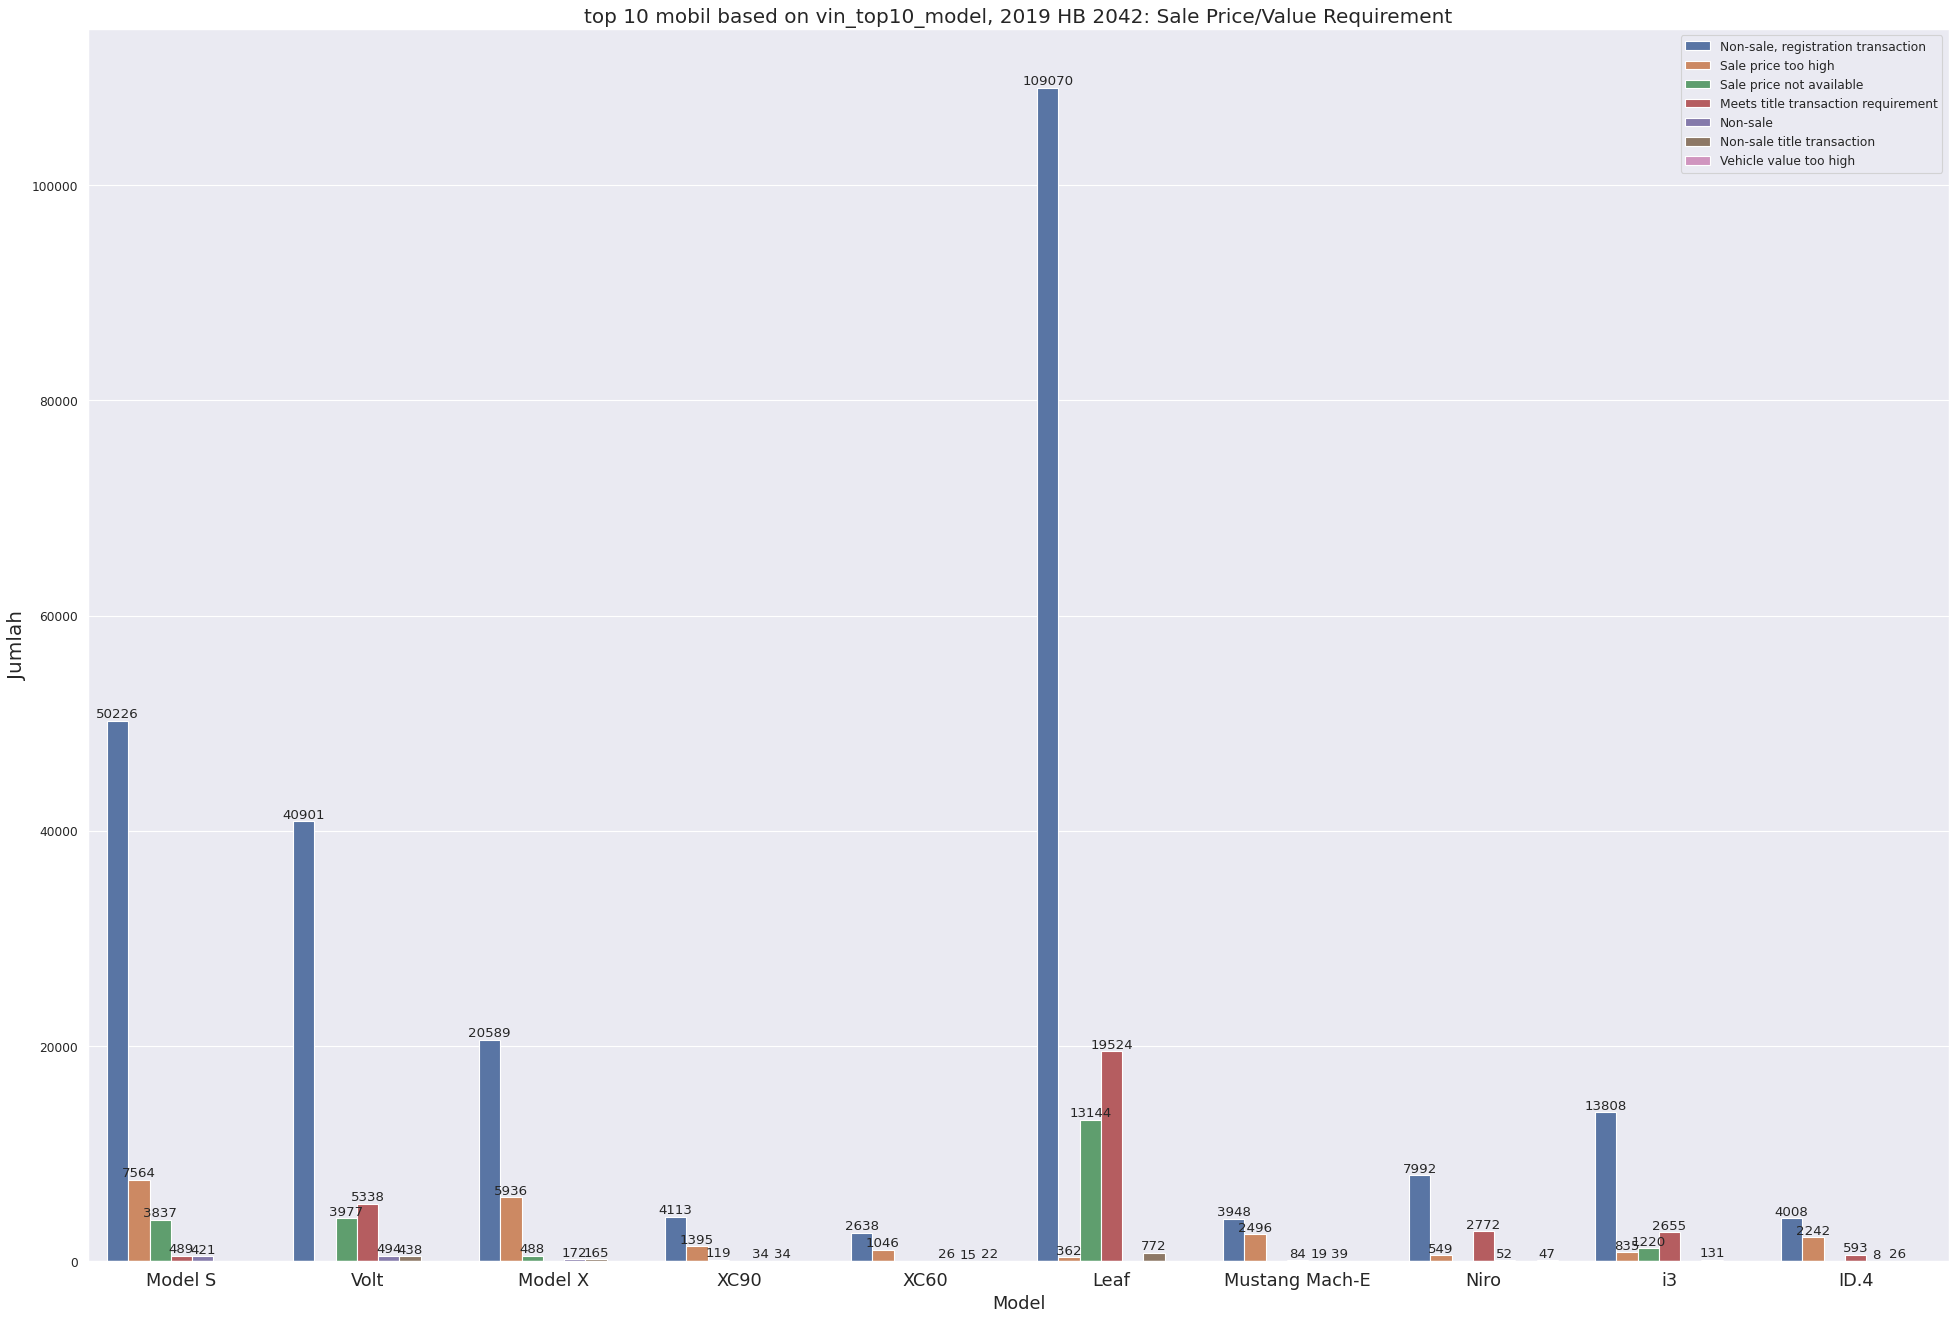

In [ ]:
tes = data_3.copy()
tes = tes.groupby(['2019 HB 2042: Sale Price/Value Requirement'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in vin_top10_model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = '2019 HB 2042: Sale Price/Value Requirement')

plt.title('top 10 mobil based on vin_top10_model, 2019 HB 2042: Sale Price/Value Requirement', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['2019 HB 2042: Sale Price/Value Requirement'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

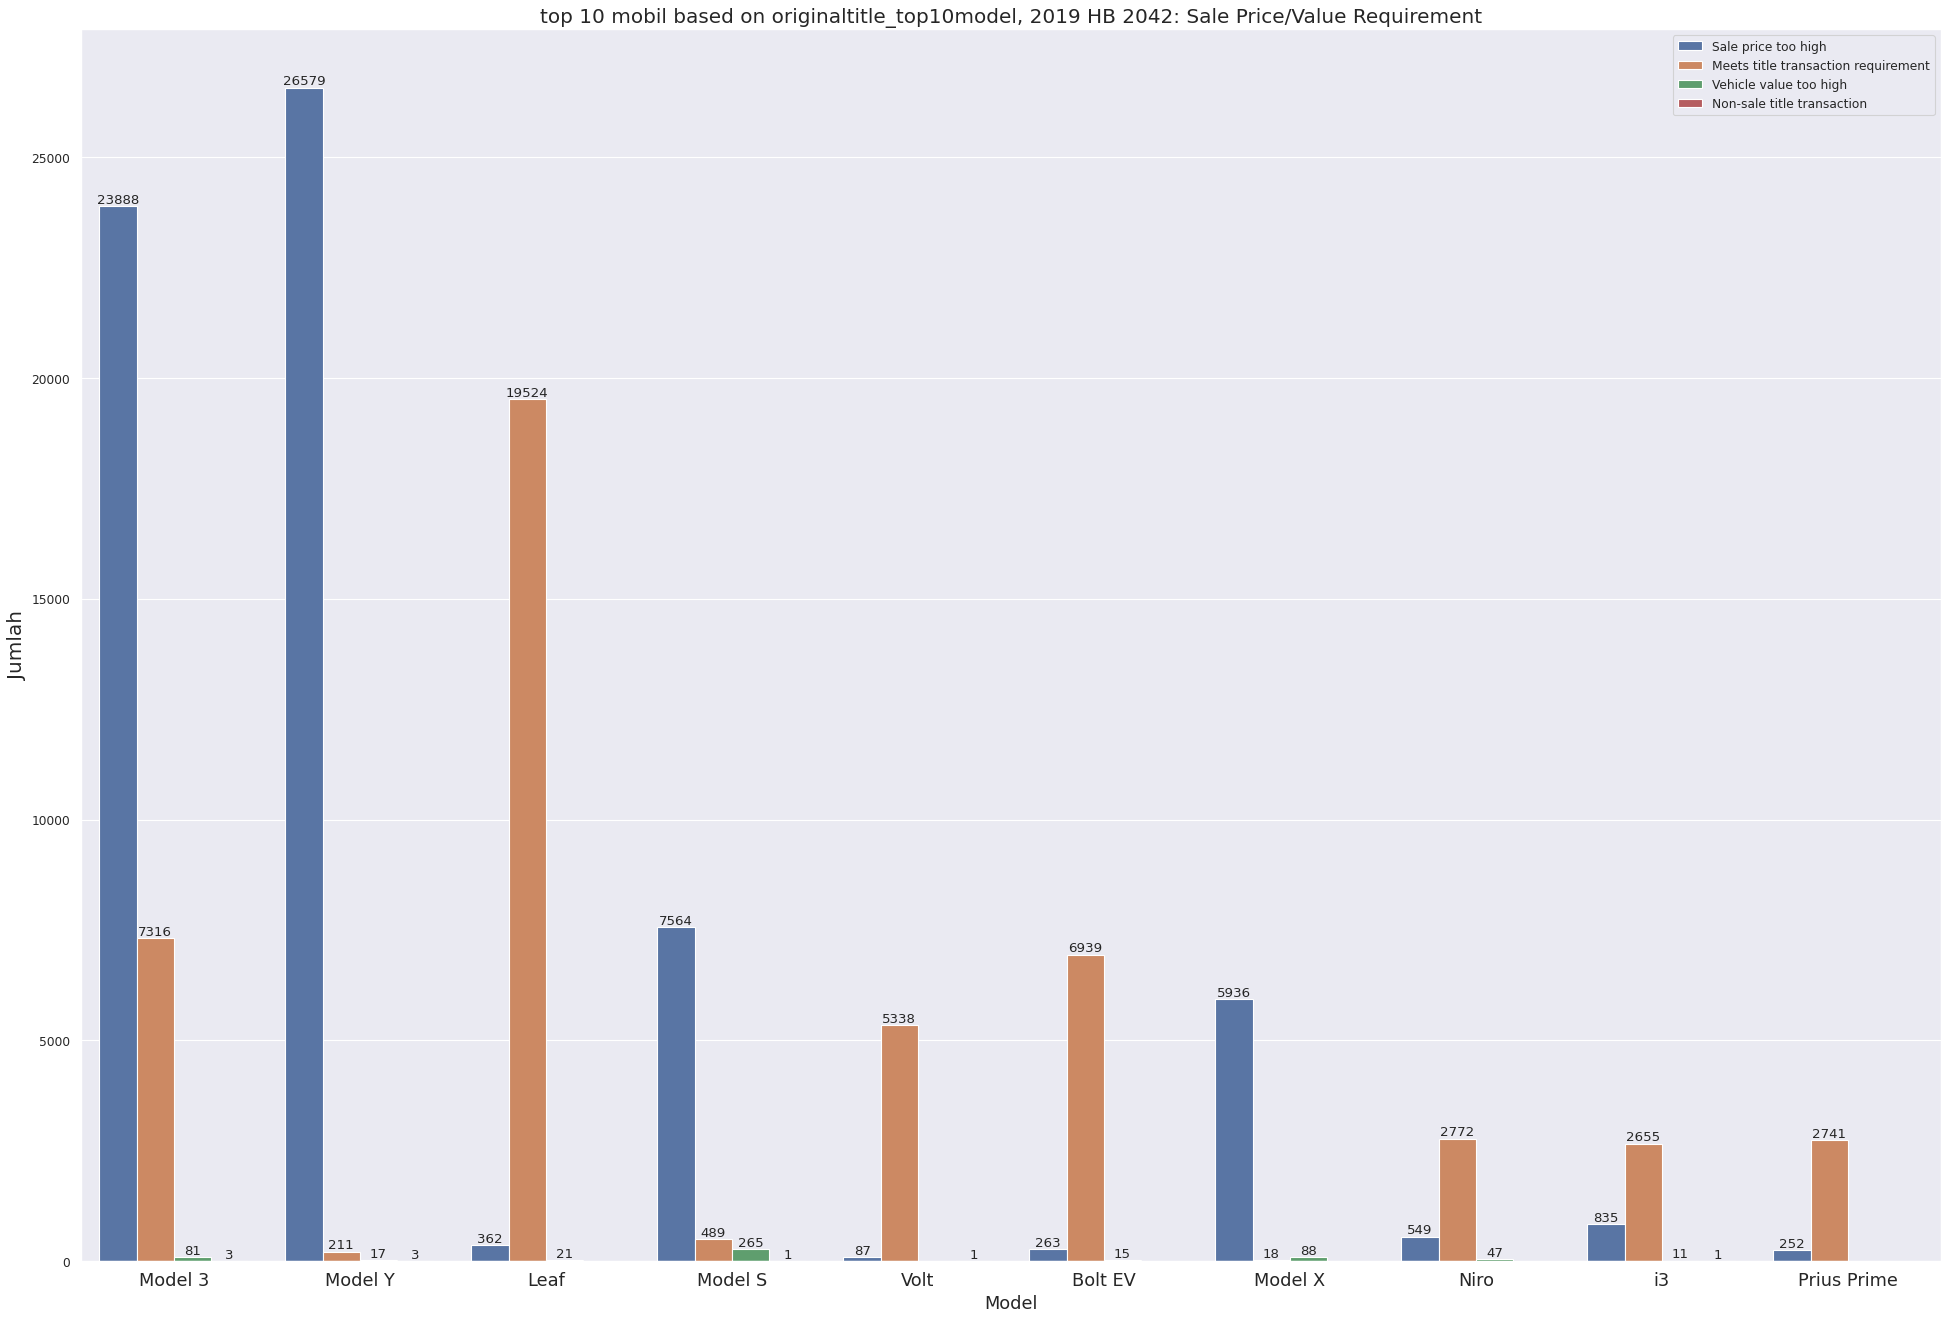

In [ ]:
tes = data3_sale_saleprice_not0.copy()
tes = tes.groupby(['2019 HB 2042: Sale Price/Value Requirement'], as_index = False)[['Model']].value_counts()
tabel_hasil = []
for i in originaltitle_top10model:
  tabel_hasil.append(tes[tes['Model'] == i].sort_values(by='count', ascending = False).head(5))

tabel_hasil = pd.concat(tabel_hasil)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(tabel_hasil, x = 'Model', y = 'count', hue = '2019 HB 2042: Sale Price/Value Requirement')

plt.title('top 10 mobil based on originaltitle_top10model, 2019 HB 2042: Sale Price/Value Requirement', fontsize=18)
plt.legend(loc='upper right')
plt.ylabel('Jumlah', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.xticks(fontsize=16)
for i in range(tabel_hasil['2019 HB 2042: Sale Price/Value Requirement'].nunique()):
  ax.bar_label(ax.containers[i])
plt.show()

##Electric Utility

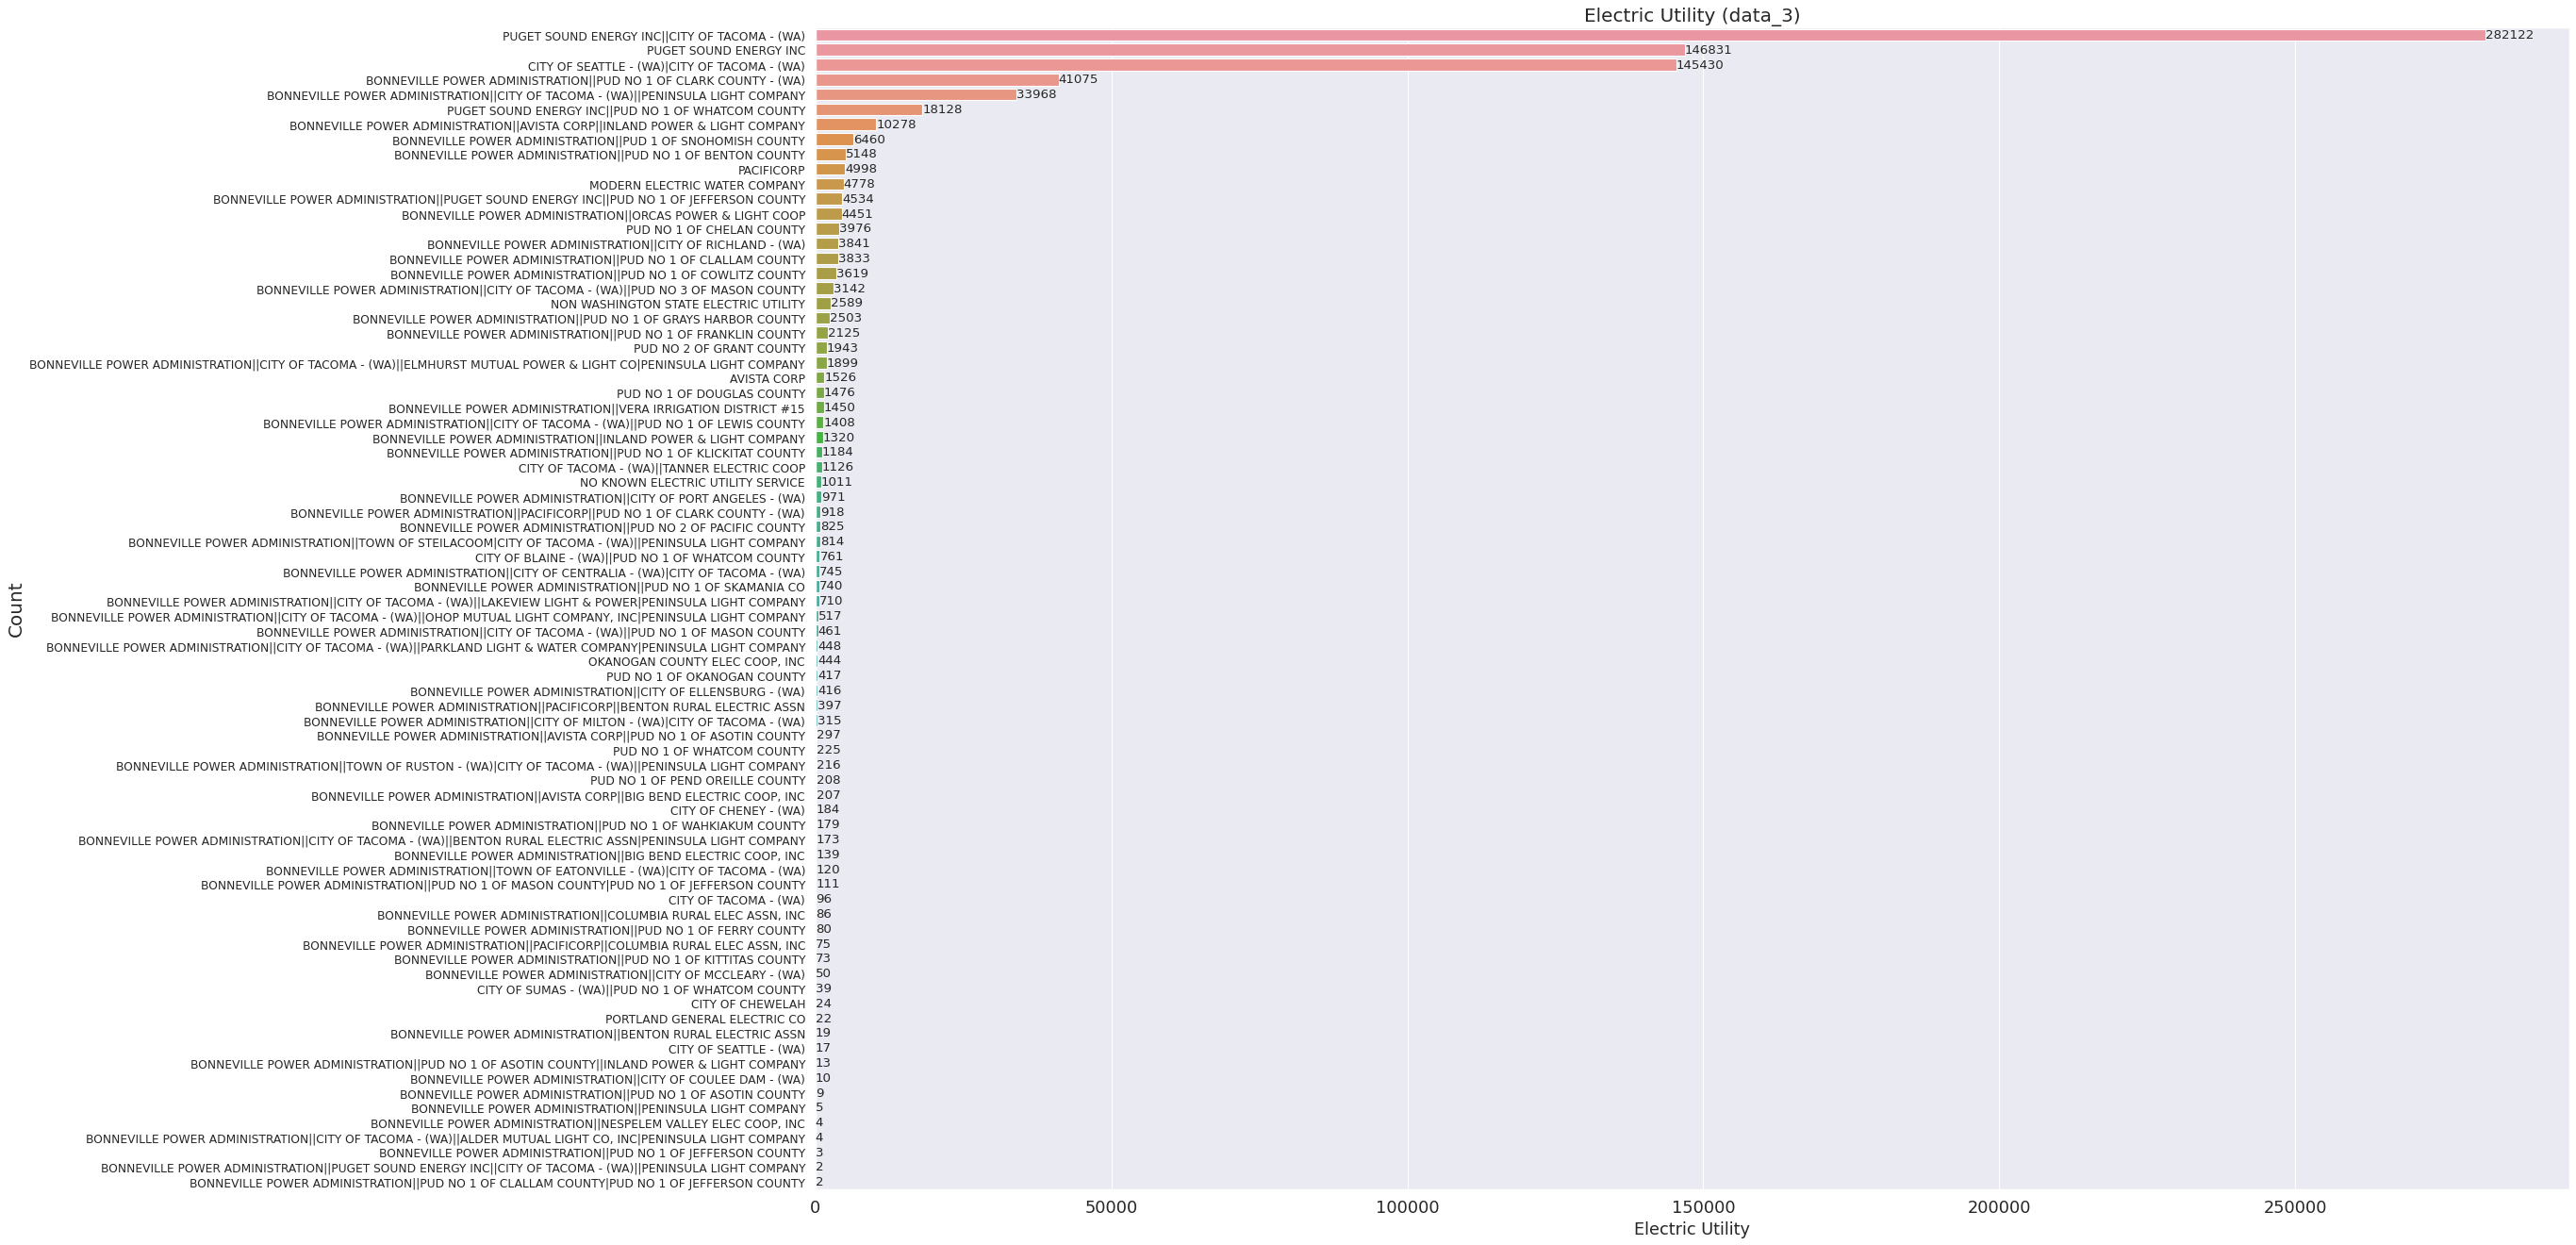

In [ ]:
electic_utility = pd.DataFrame(data_3['Electric Utility'].value_counts())
electic_utility.index = electic_utility.index.astype(str)

fig, ax = plt.subplots(figsize=(30, 20), dpi=80) ## jika ingin menentukan sebesar apa gambar
sns.barplot(electic_utility,y=electic_utility.index,x='Electric Utility')

plt.title('Electric Utility (data_3)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Electric Utility', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

## Trend

<ipython-input-95-c905de7ac4db>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


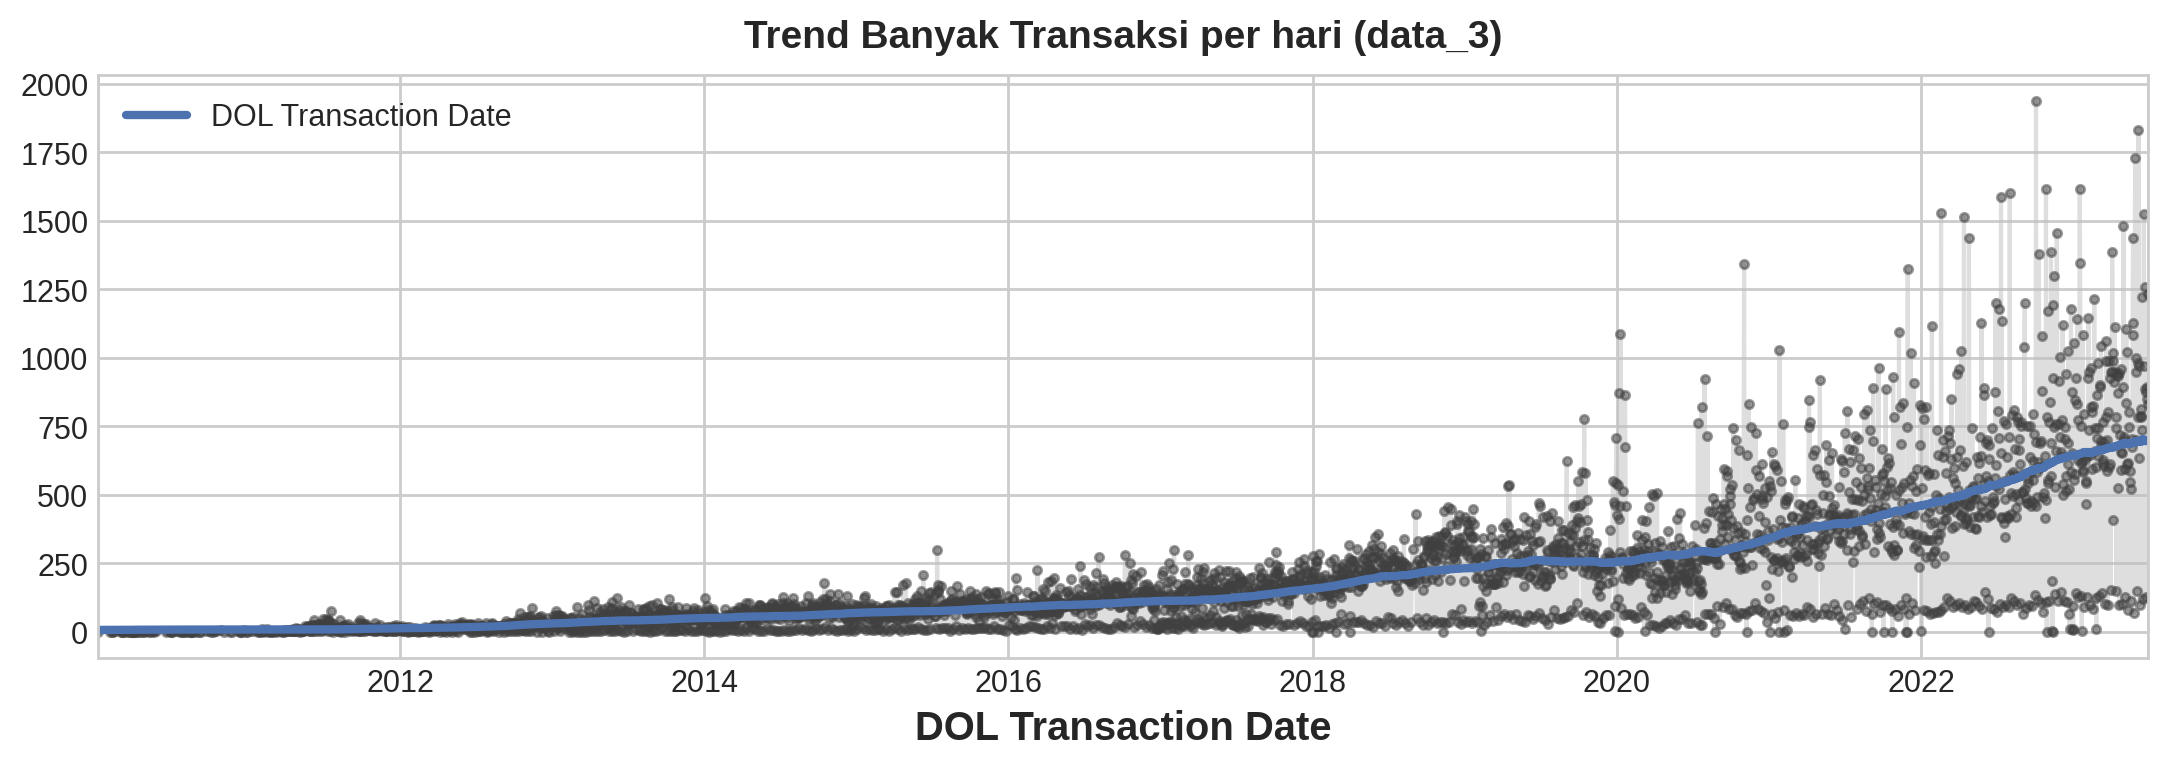

In [ ]:
tes = data_3.copy()
tes['DOL Transaction Date'] = tes['DOL Transaction Date'].dt.to_period("D")
tes = tes.groupby(['DOL Transaction Date'])[['DOL Transaction Date']].count()

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# average with appropriate parameters for trend estimation.
trend = tes.rolling(
    window = 365,
    center = True,
    min_periods = 183
).mean()
# Make a plot
ax = tes.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
plt.title("Trend Banyak Transaksi per hari (data_3)")
plt.show()

<ipython-input-96-f80338bdd92d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


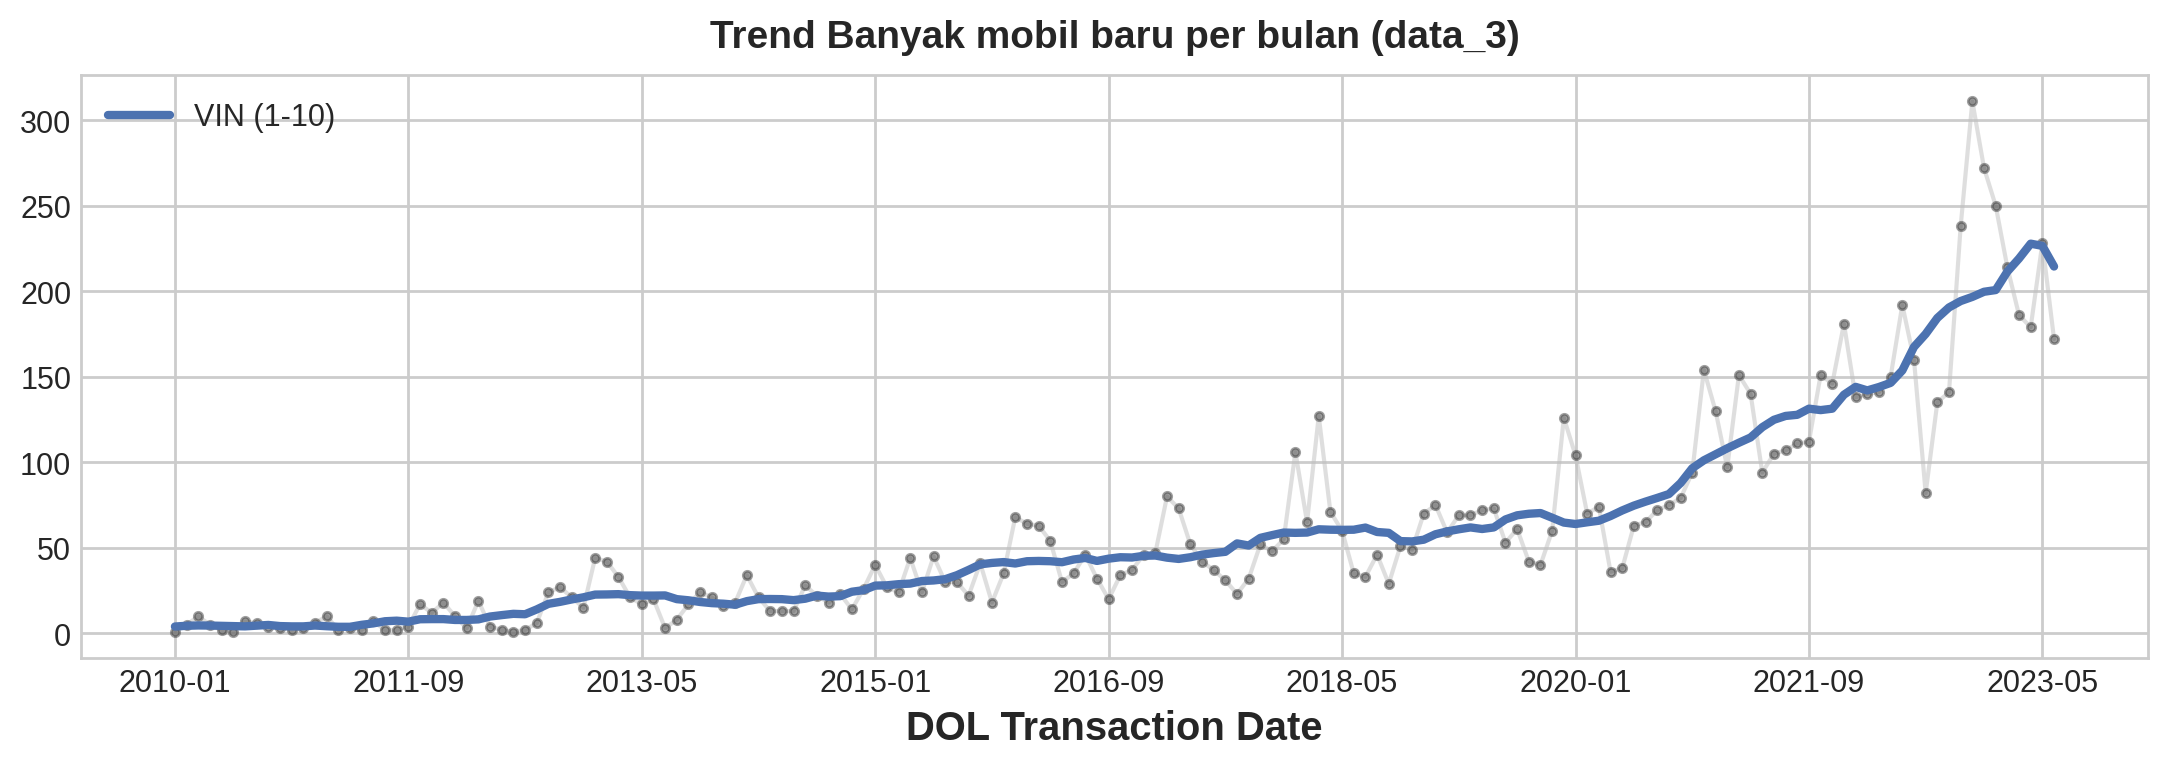

In [ ]:
tes = data_3.copy()
tes = tes.drop_duplicates(subset=['VIN (1-10)'])
tes['DOL Transaction Date'] = tes['DOL Transaction Date'].dt.to_period("M").astype(str)
tes = tes.groupby(['DOL Transaction Date'])[['VIN (1-10)']].count()

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# average with appropriate parameters for trend estimation.
trend = tes.rolling(
    window = 12,
    center = True,
    min_periods = 6
).mean()
# Make a plot
ax = tes.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
plt.title("Trend Banyak mobil baru per bulan (data_3)")
plt.show()

Dapat dilihat terjadi trend peningkatan transaksi dan mobil baru

# Predict

In [ ]:
!pip install auto-ts --no-deps --ignore-installed
!pip install 'fsspec>=0.3.3'
!pip install statsmodels --upgrade
!pip install pmdarima

In [ ]:
import auto_ts as AT
from auto_ts import auto_timeseries

## Feature Engineering

In [ ]:
tes2 = data_3.drop_duplicates(subset=['VIN (1-10)'])
tes2['DOL Transaction Date'] = tes2['DOL Transaction Date'].dt.to_period("M")
tes2 = tes2.groupby(['DOL Transaction Date'])[['VIN (1-10)']].count()
propet = tes2.to_timestamp().reset_index()

df = propet.copy()
df=df.rename(columns={'DOL Transaction Date':'ds','VIN (1-10)':'y'})
df.head()

end_date = '2022-04-28'
mask1 = (df['ds'] <= end_date)
mask2 = (df['ds'] >= end_date)
X_tr = df.loc[mask1]
X_tst = df.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (148, 2)
test shape (14, 2)


In [ ]:
X_tr_autots = X_tr.set_index(['ds'])
X_tst_autots = X_tst.set_index(['ds'])

## Modelling and Evaluation

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    train time series ds column is the index on test data...
    train data shape = (148, 1)
Alert: Could not detect strf_time_format of ds. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


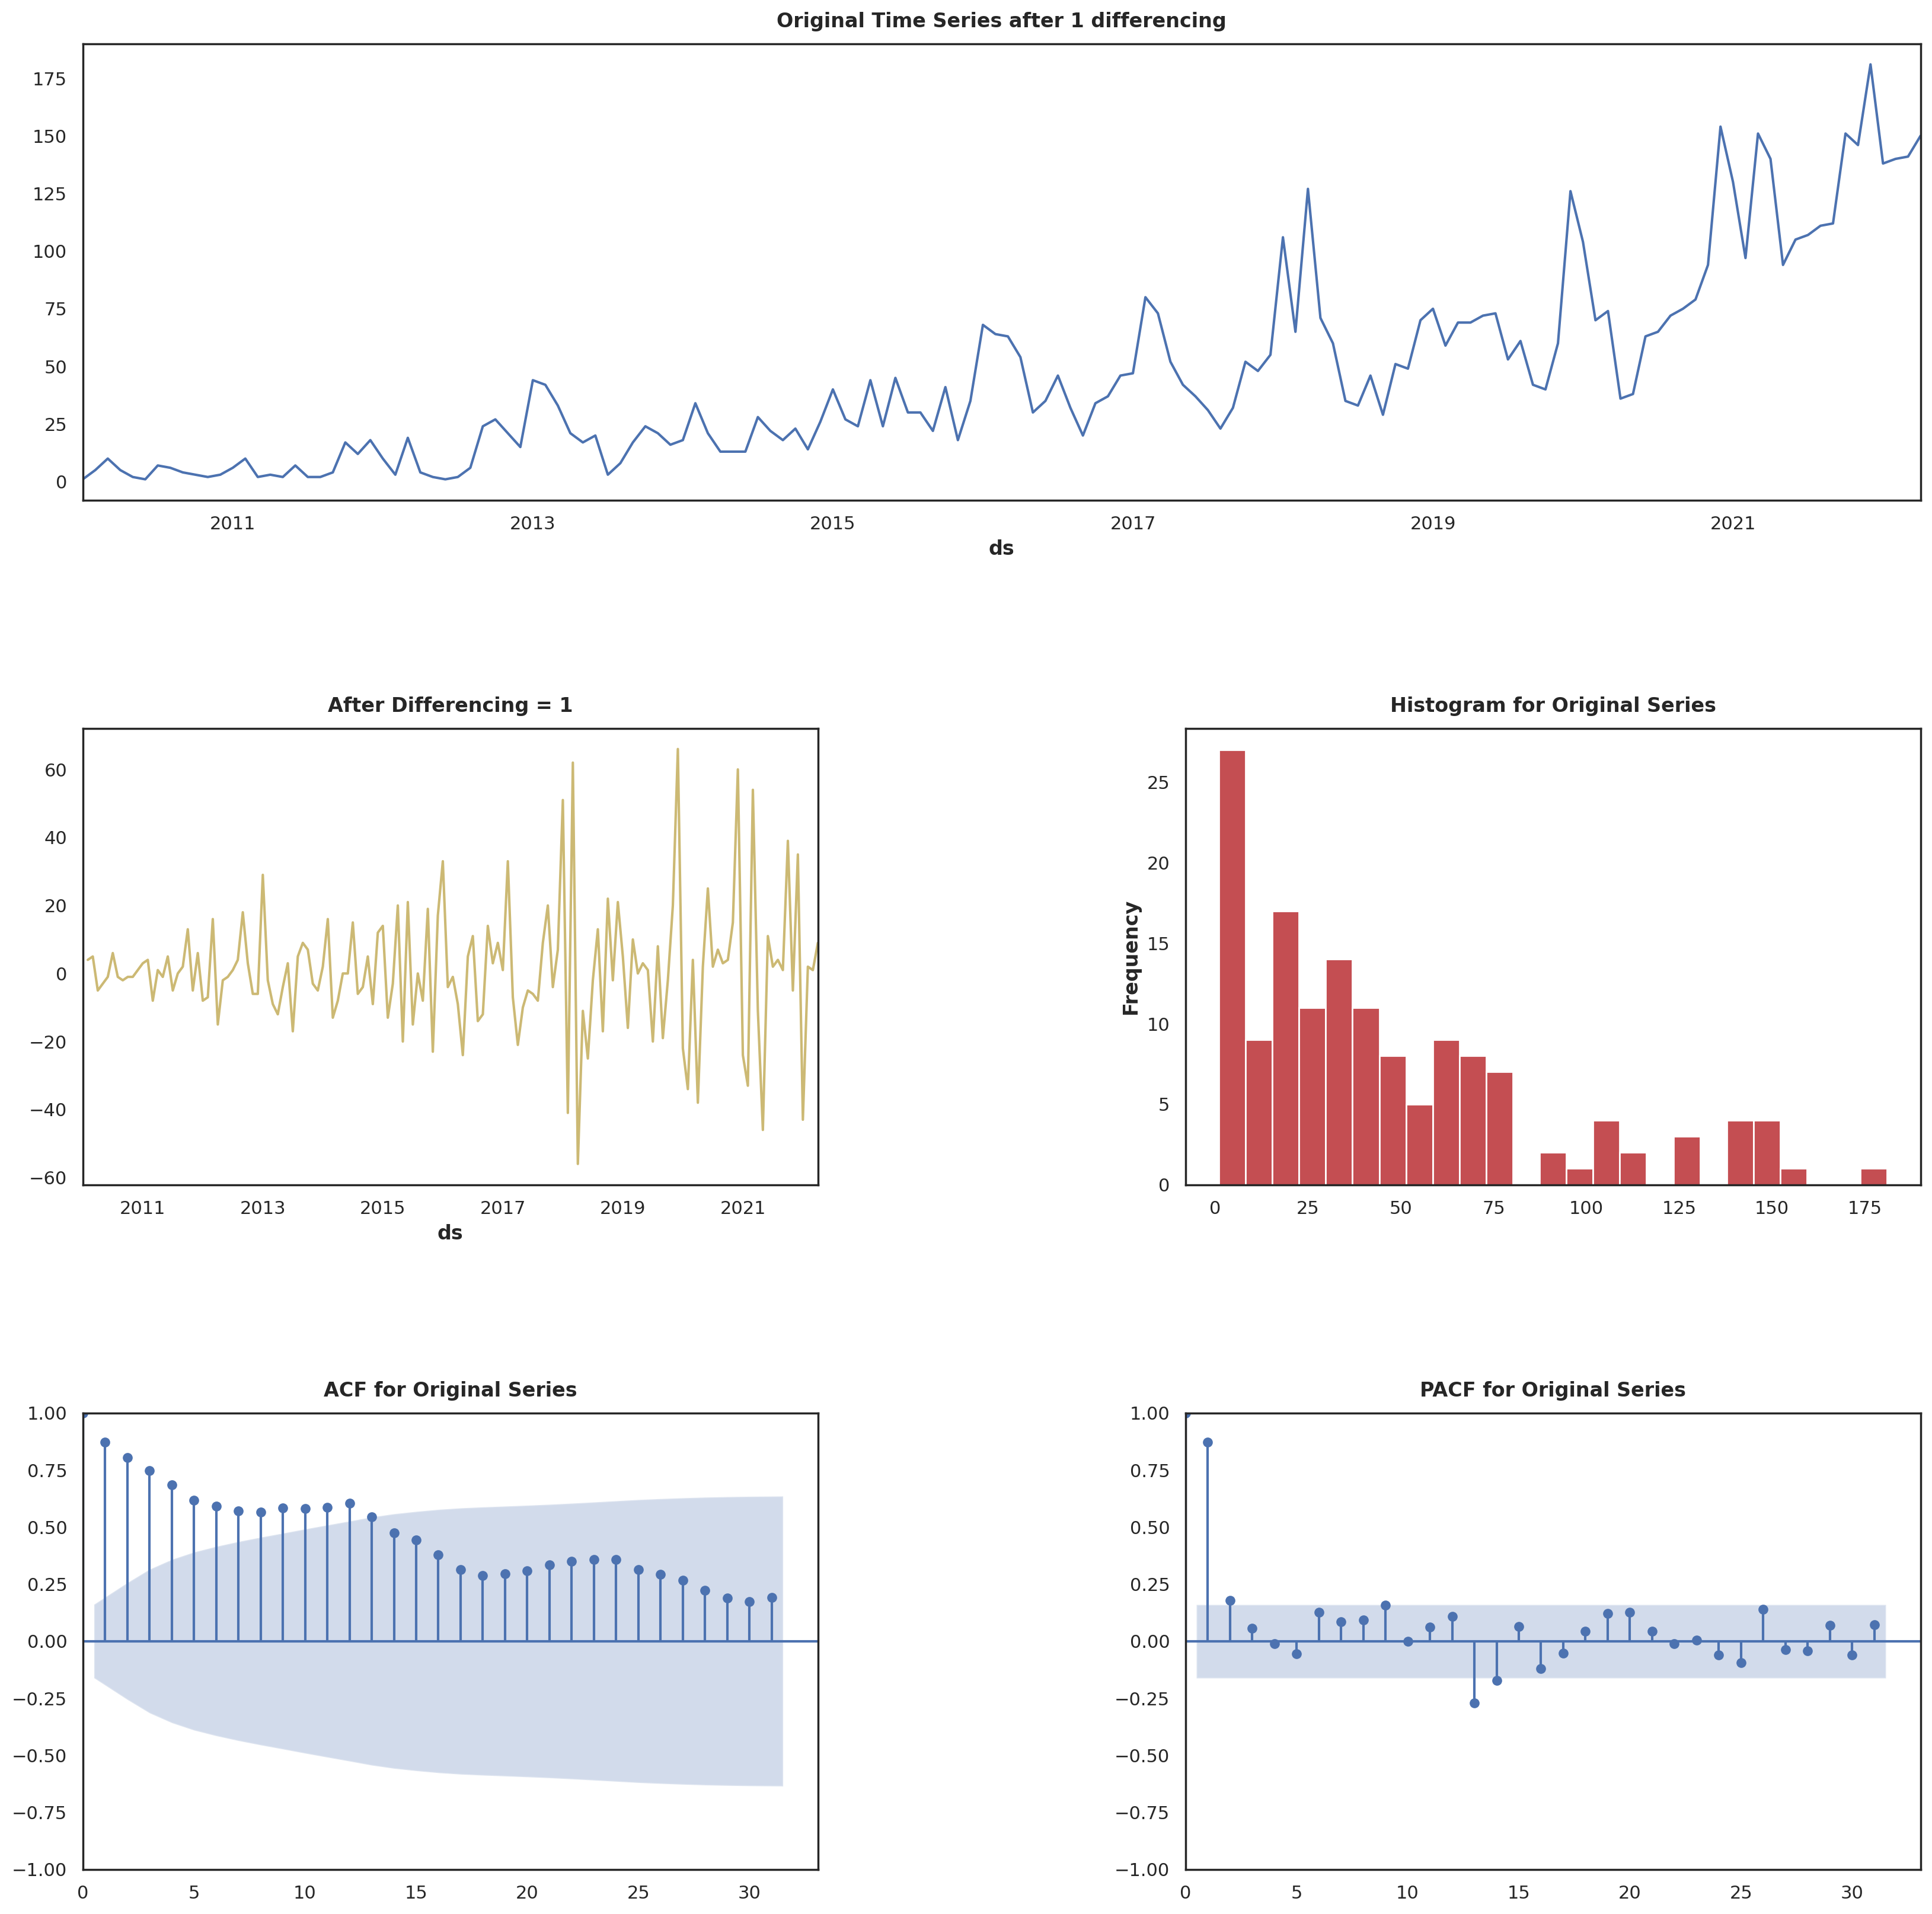

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/dyrr26gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/k0pqq7u2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60819', 'data', 'file=/tmp/tmpjzomwinm/dyrr26gh.json', 'init=/tmp/tmpjzomwinm/k0pqq7u2.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model3cixmb1s/prophet_model-20230826052421.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
05:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(148, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 24 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 28 Test Shape: 24


05:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/vcgbirc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/8tt5lih0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41014', 'data', 'file=/tmp/tmpjzomwinm/vcgbirc8.json', 'init=/tmp/tmpjzomwinm/8tt5lih0.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model3uv9m3k8/prophet_model-20230826052421.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
05:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 17.46
    Std Deviation of actuals = 11.59
    Normalized RMSE (as pct of std dev) = 151%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 24


05:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/8c00u7qs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/8lyt01gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47775', 'data', 'file=/tmp/tmpjzomwinm/8c00u7qs.json', 'init=/tmp/tmpjzomwinm/8lyt01gb.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model0c6anyip/prophet_model-20230826052422.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
05:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 21.64
    Std Deviation of actuals = 16.01
    Normalized RMSE (as pct of std dev) = 135%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 76 Test Shape: 24


05:24:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/c1cth0el.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/2r2kgr9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91224', 'data', 'file=/tmp/tmpjzomwinm/c1cth0el.json', 'init=/tmp/tmpjzomwinm/2r2kgr9y.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model_z_c6l08/prophet_model-20230826052422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
05:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 24.94
    Std Deviation of actuals = 25.12
    Normalized RMSE (as pct of std dev) = 99%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 100 Test Shape: 24
    RMSE = 19.32
    Std Deviation of actuals = 21.83
    Normalized RMSE (as pct of std dev) = 88%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 124 Test Shape: 24


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/1pq3b1rz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/dbvtu7z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22855', 'data', 'file=/tmp/tmpjzomwinm/1pq3b1rz.json', 'init=/tmp/tmpjzomwinm/dbvtu7z8.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelcjwxrqdl/prophet_model-20230826052422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
05:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 46.75
    Std Deviation of actuals = 35.70
    Normalized RMSE (as pct of std dev) = 131%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/10xom7b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/btnrqk18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80619', 'data', 'file=/tmp/tmpjzomwinm/10xom7b_.json', 'init=/tmp/tmpjzomwinm/btnrqk18.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model64rx3dts/prophet_model-20230826052423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
05:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 20.29
    MSE (Mean Squared Error = 790.72
    MAPE (Mean Absolute Percent Error) = 61%
    RMSE (Root Mean Squared Error) = 28.1198
    Normalized RMSE (MinMax) = 16%
    Normalized RMSE (as Std Dev of Actuals)= 70%
Time Taken = 2 seconds
  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12
Lowering forecast period to 24 to enable cross_validation

Fold Number: 1 --> Train Shape: 28 Test Shape: 24

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=197.213, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=181.951, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=188.802, Time=0.04 sec
 ARIMA(2,0,0)(0,0

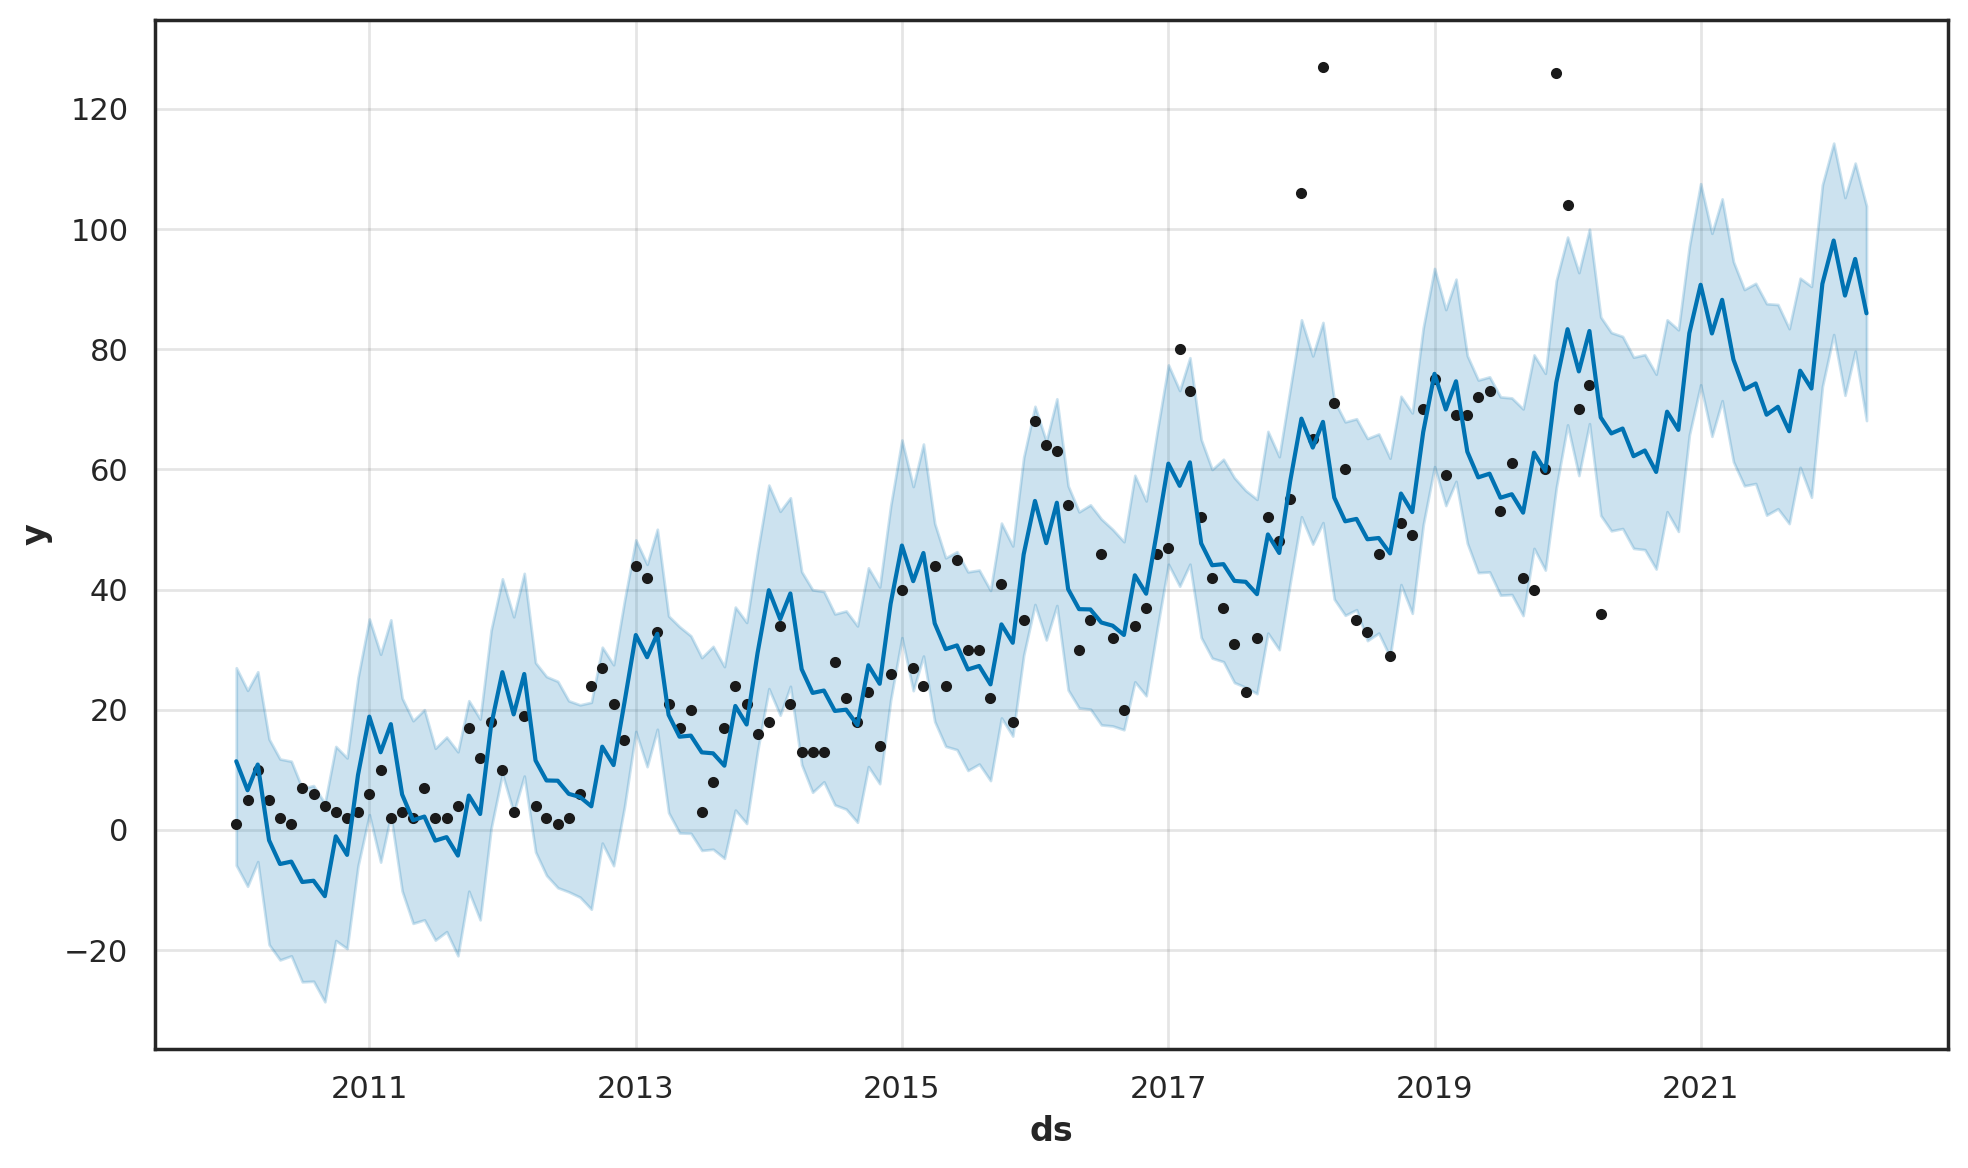

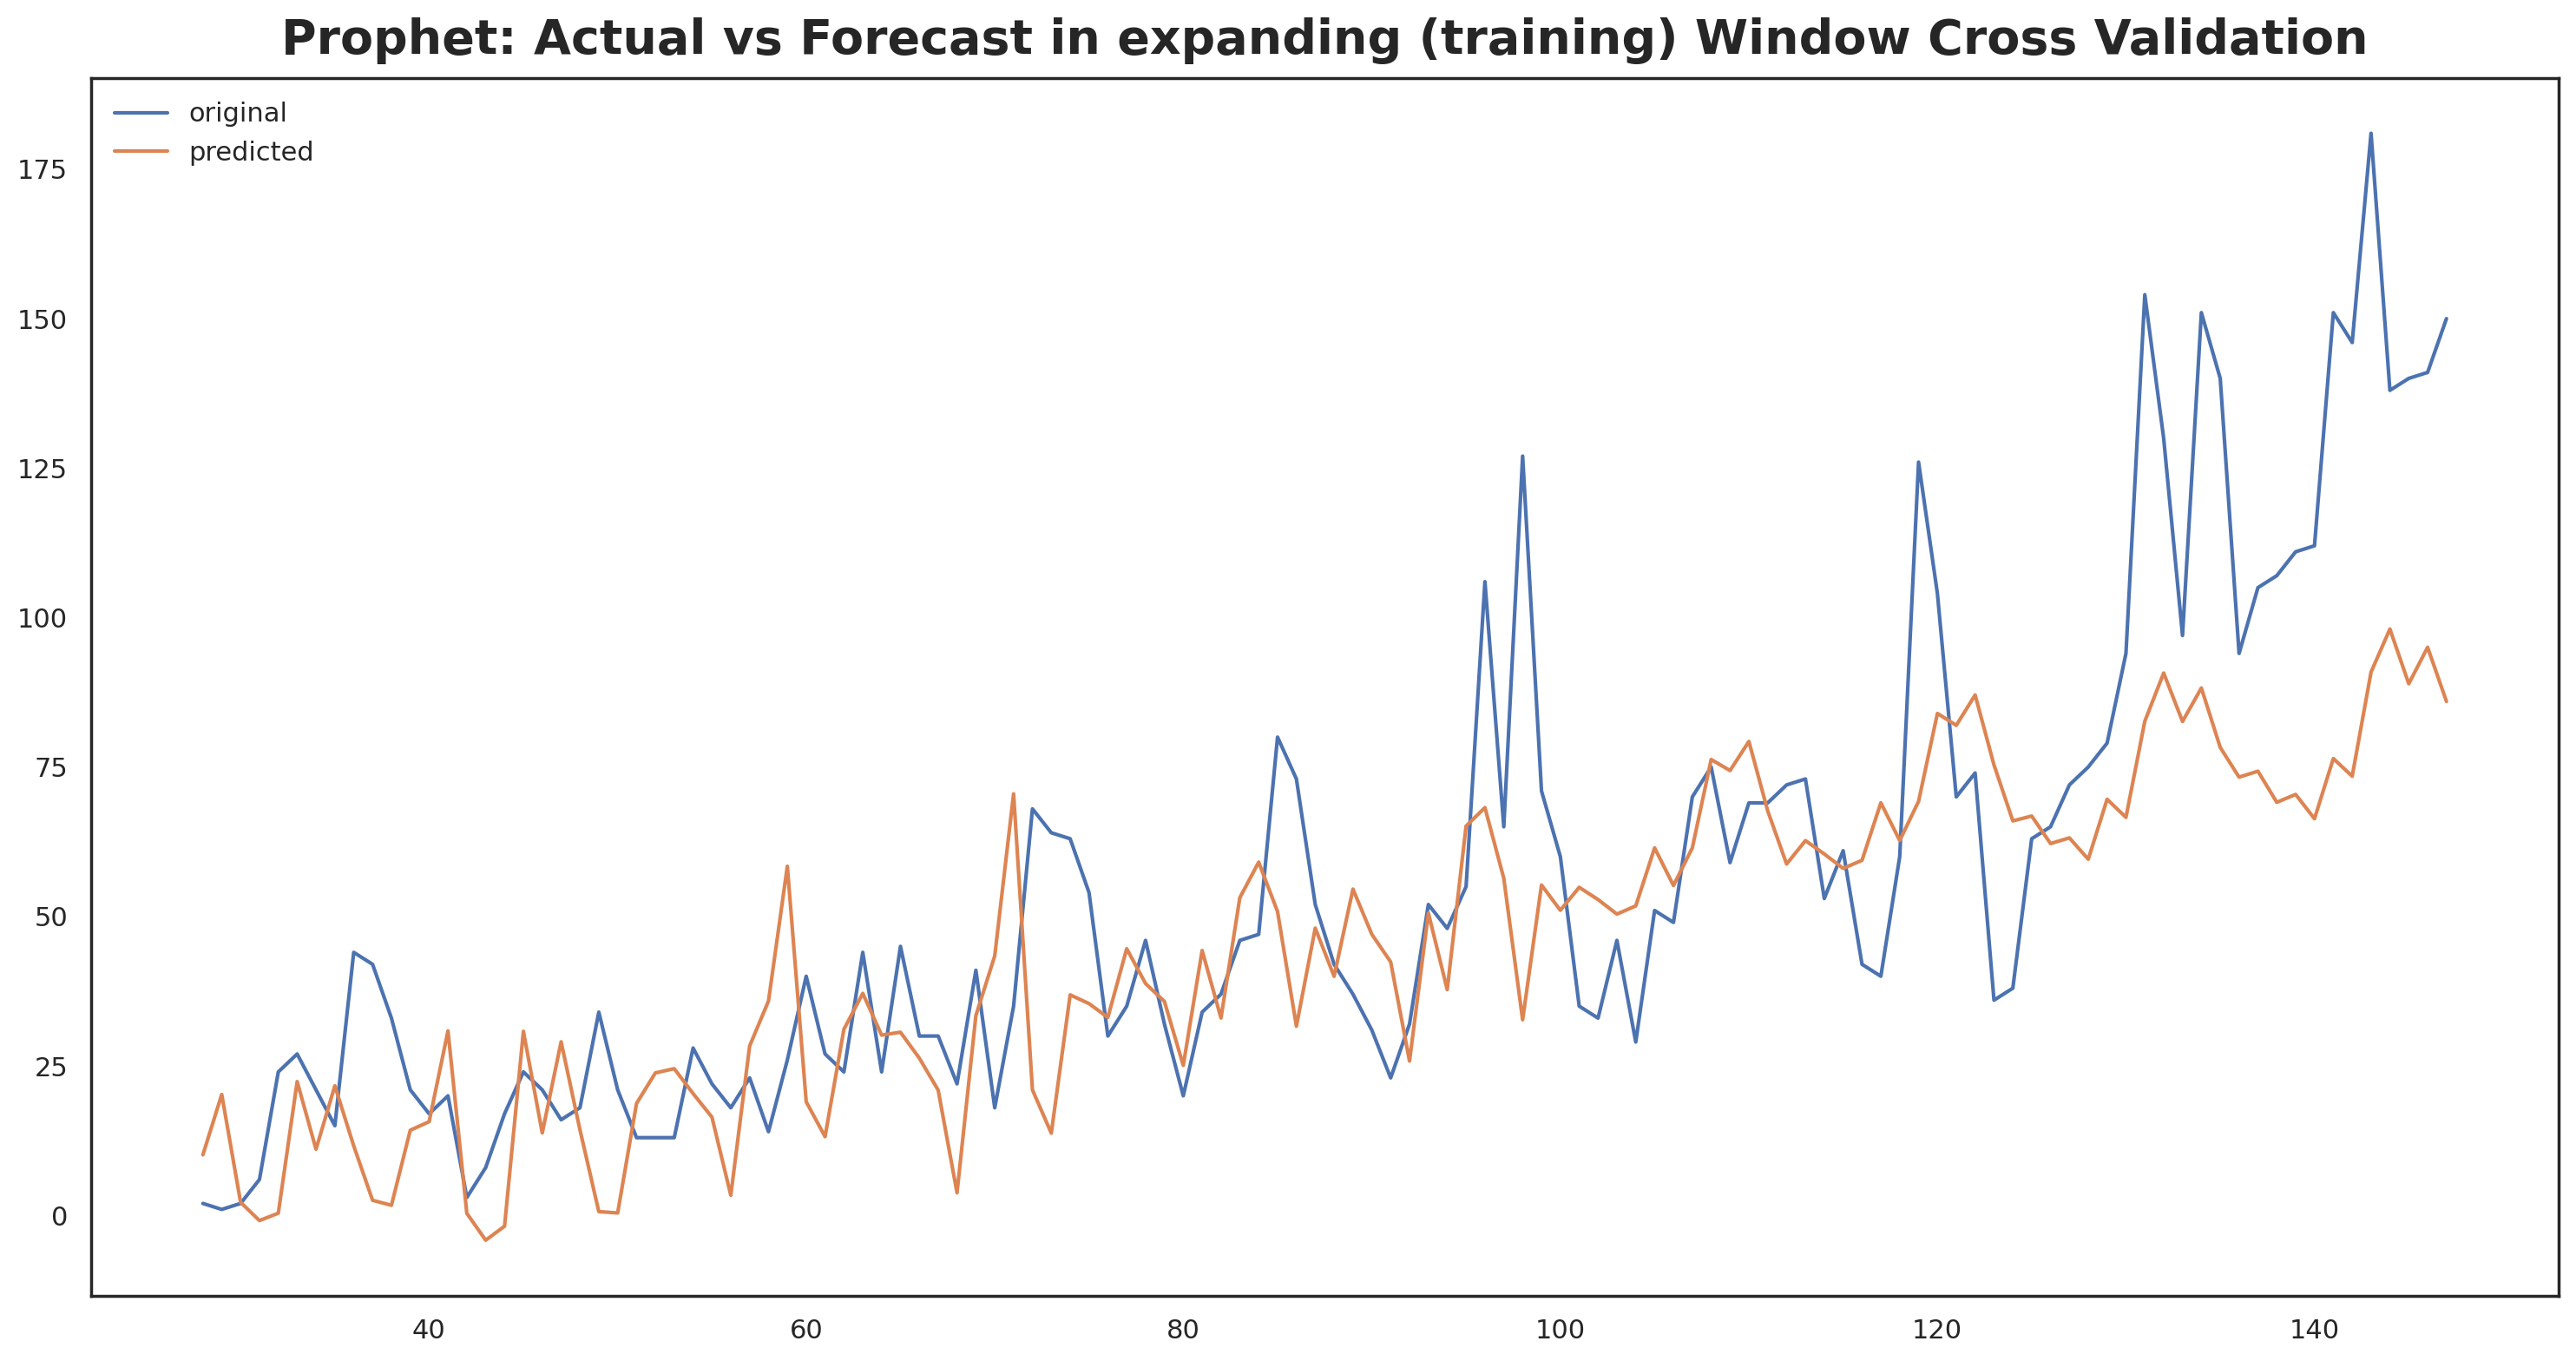

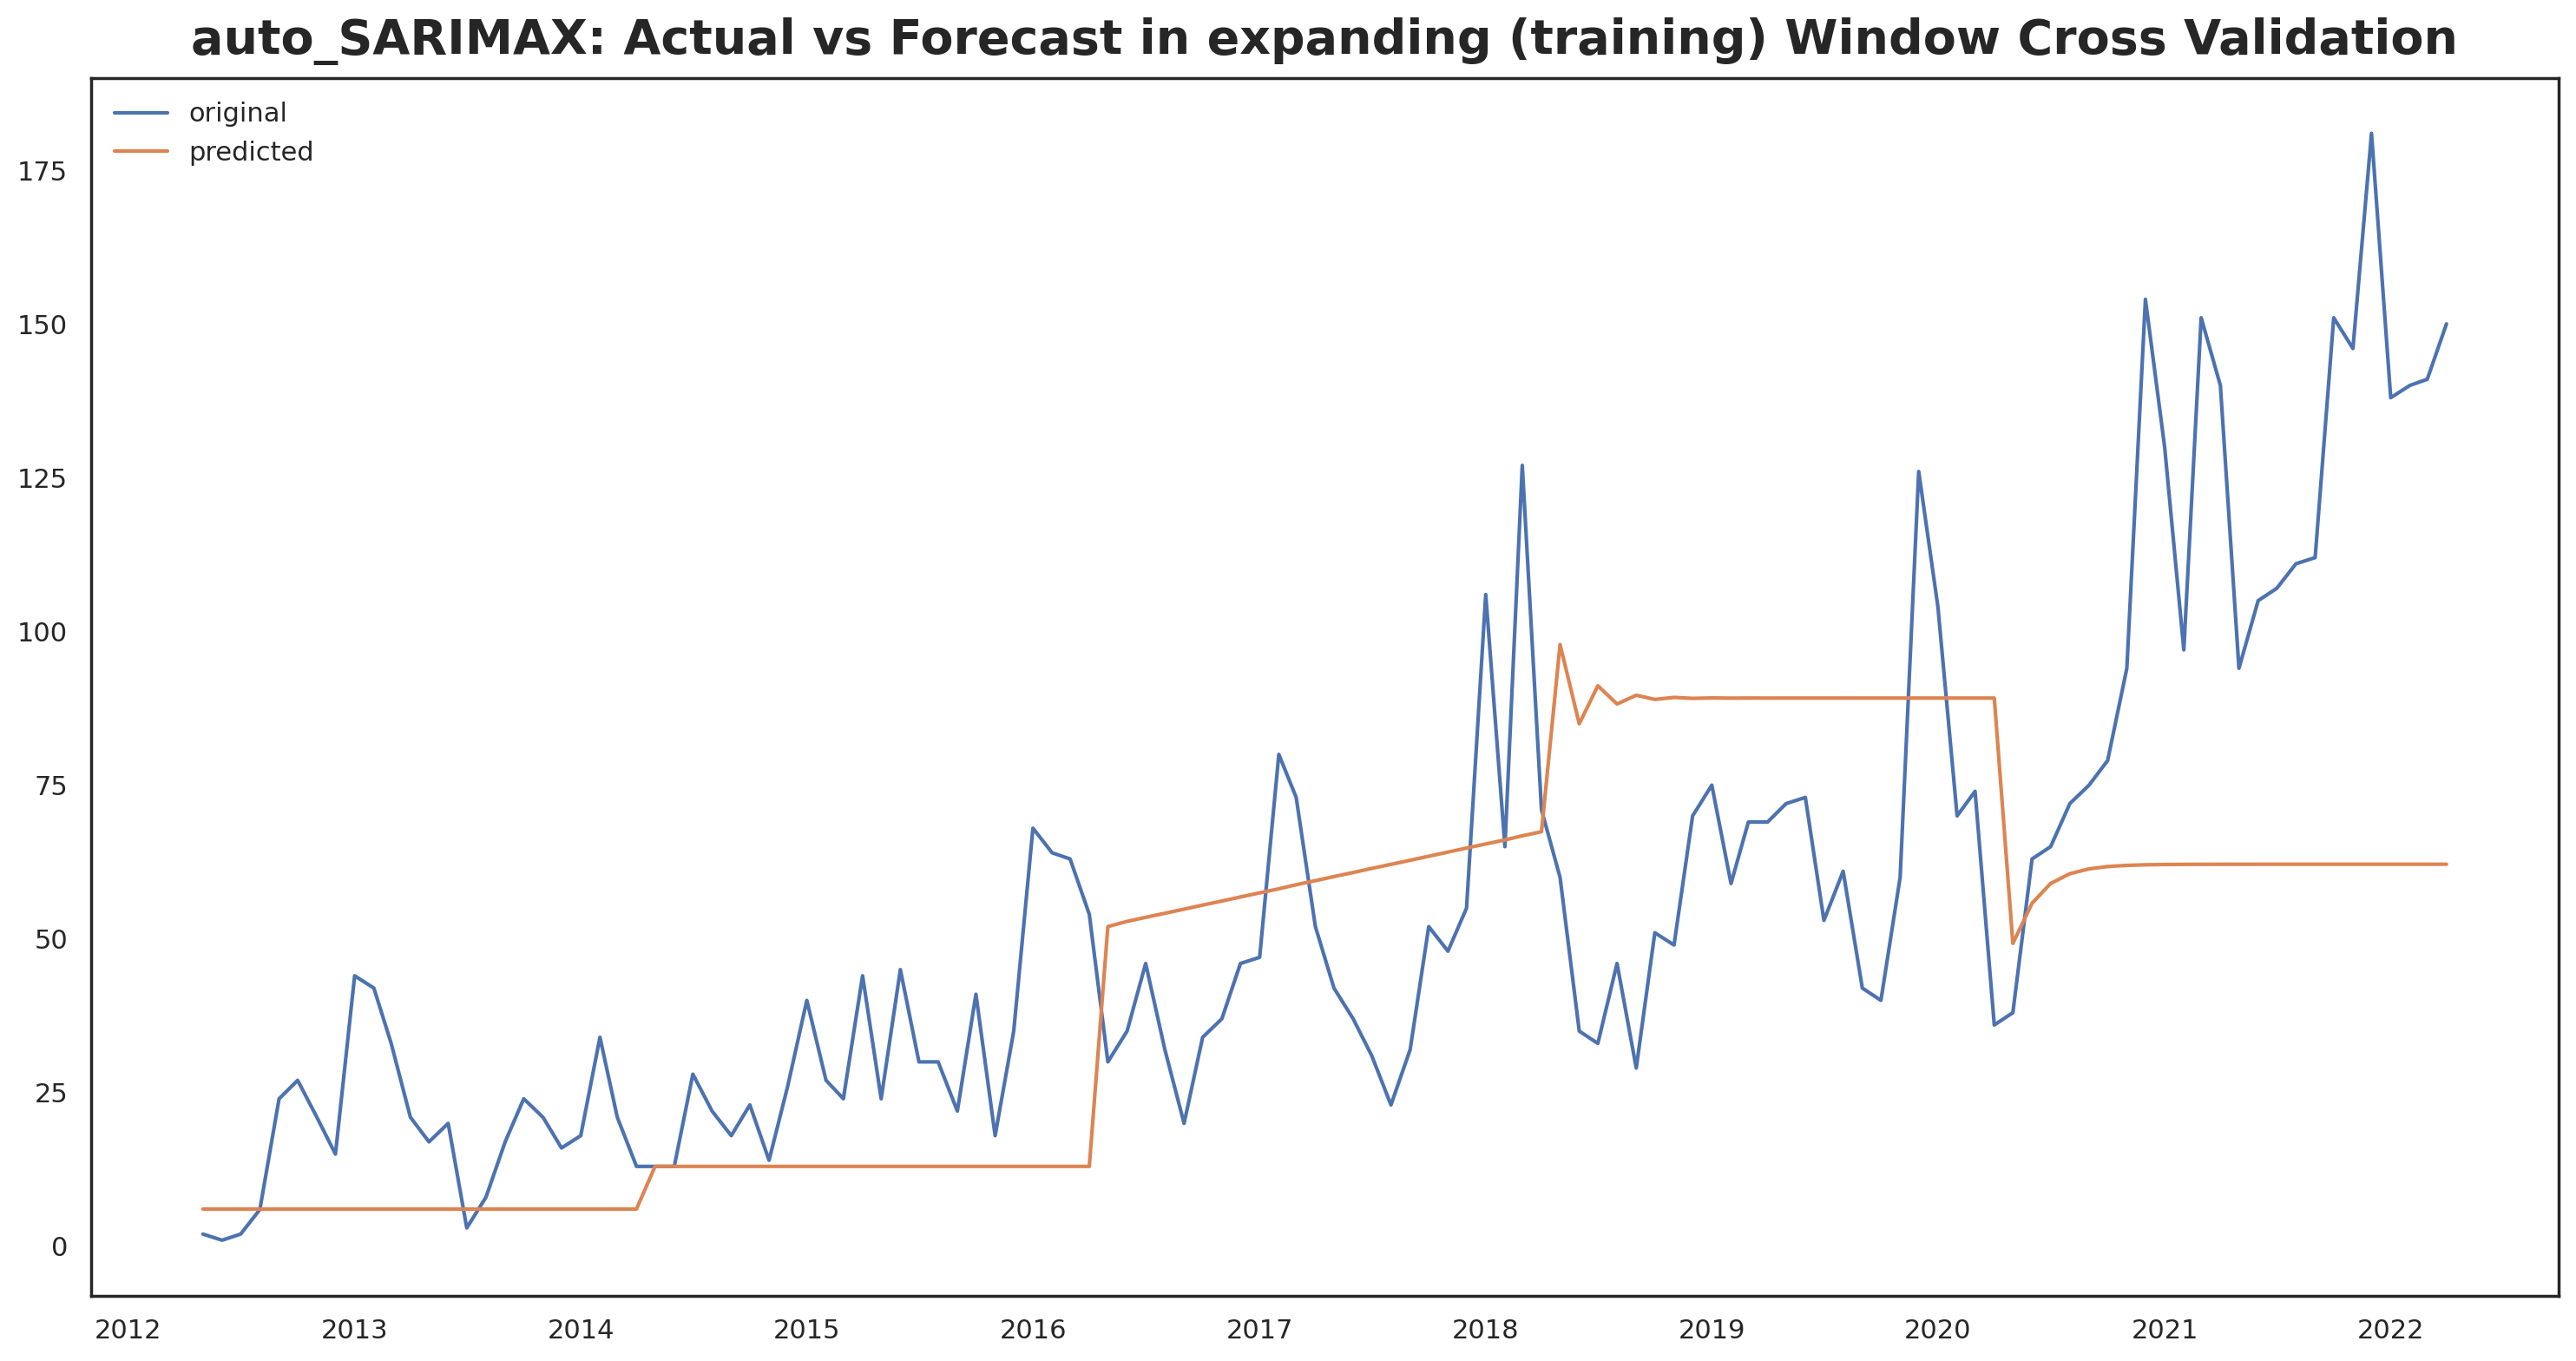

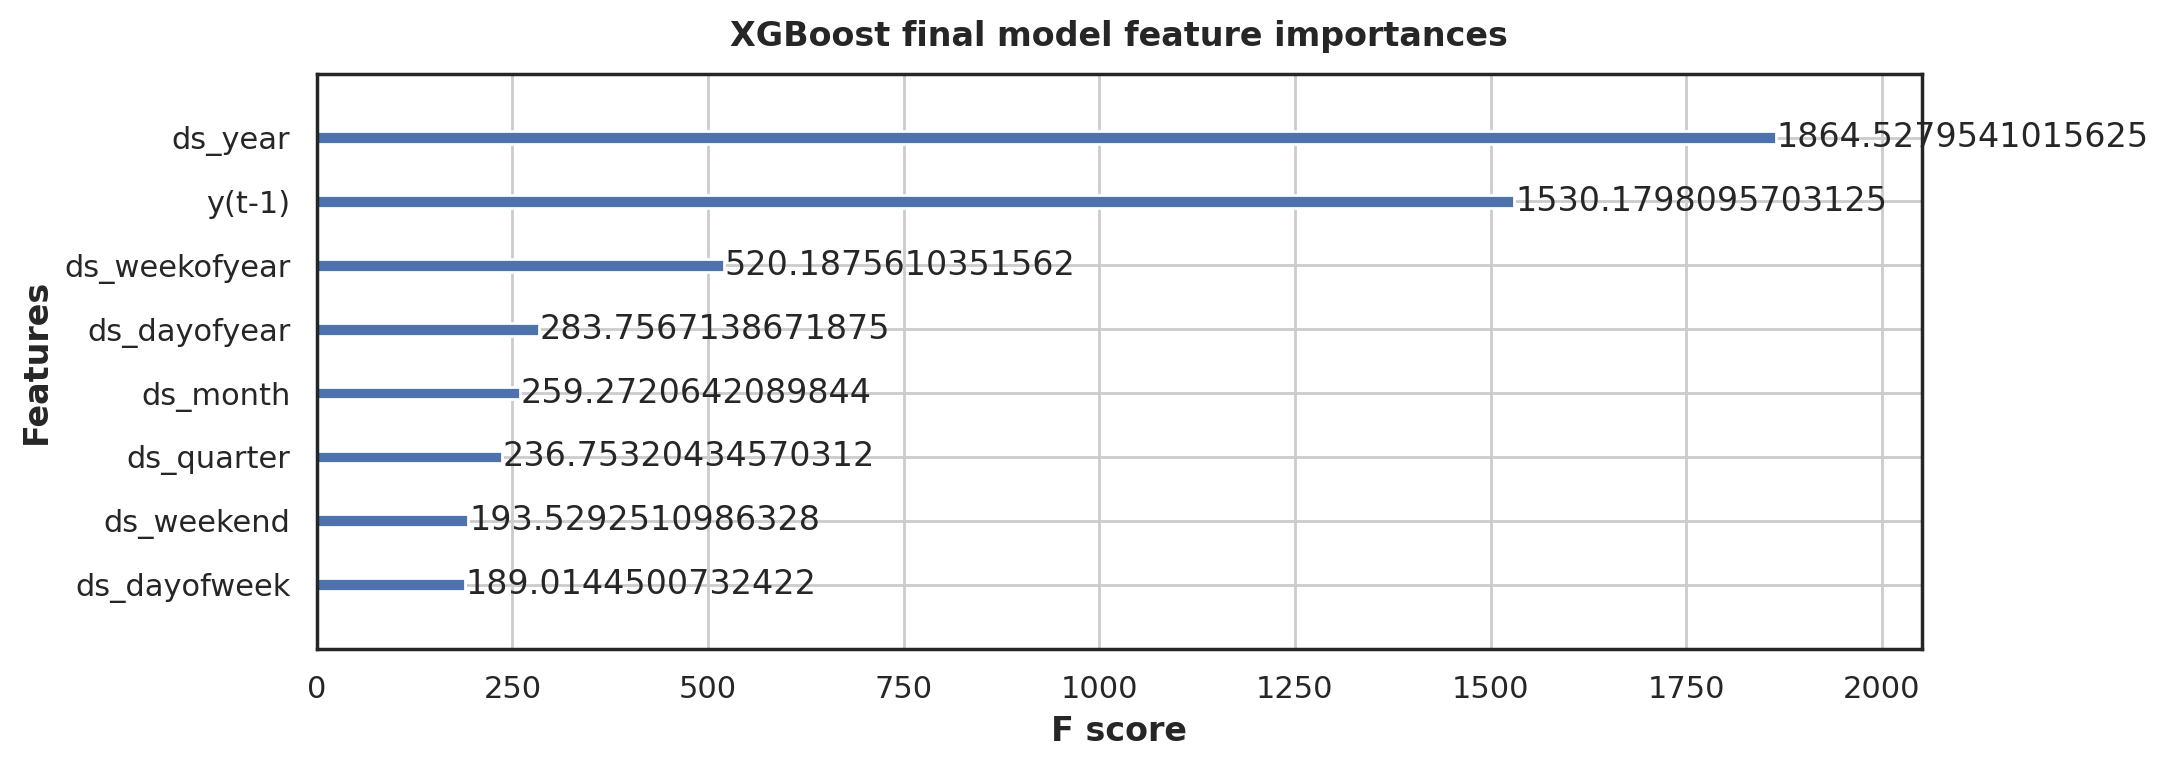

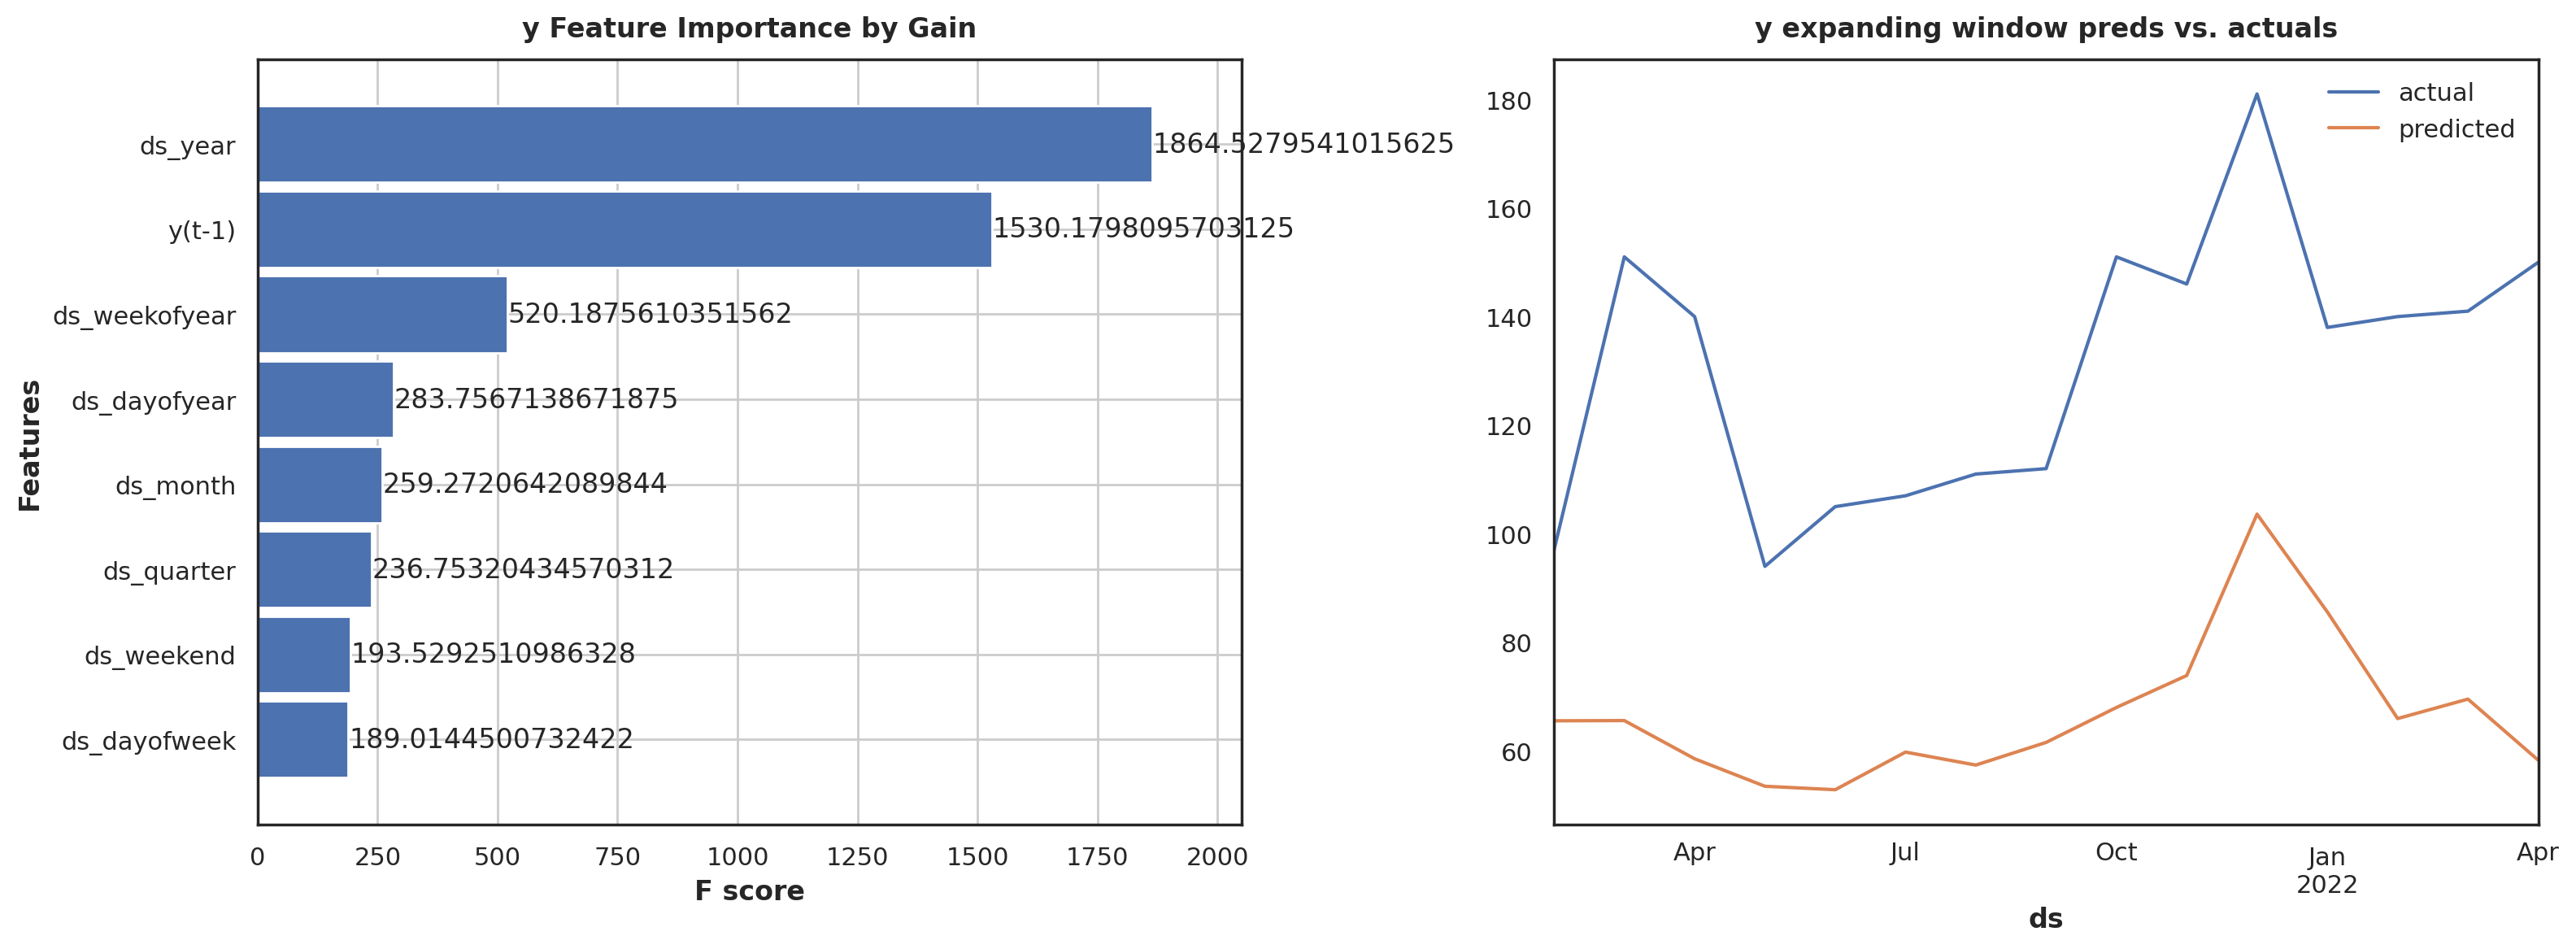

In [ ]:
#Modelling and Evaluation
ts_column = 'ds'
target = 'y'

model = auto_timeseries(
            forecast_period=36,
            score_type='rmse',
            time_interval='M',
            non_seasonal_pdq=None, seasonality=False,
            seasonal_period=None,
            model_type='best',
            verbose=2)

model.fit(
            traindata=X_tr_autots,
            ts_column=ts_column,
            target=target,
        )

In [ ]:
predictions = model.predict(
            testdata = X_tst_autots,
            model = 'best'
        )
predictions = predictions.set_index(['ds'])
predictions

Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 14


trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                         
2022-04-30  127.056082  101.444375  141.260455   127.056079   127.056082   
2022-05-31  128.690073  103.381139  144.725068   128.669750   128.706023   
2022-06-30  130.271355   97.479309  137.094854   130.229360   130.318261   
2022-07-31  131.905345  103.281275  141.985401   131.822384   131.998549   
2022-08-31  133.539336   98.952375  140.027423   133.406608   133.678183   
2022-09-30  135.120618  114.483754  154.012556   134.927635   135.313011   
2022-10-31  136.754609  111.905286  154.735611   136.502312   137.004507   
2022-11-30  138.335890  135.315983  174.868234   138.019064   138.658072   
2022-12-31  139.969881  135.977778  177.453163   139.580041   140.365544   
2023-01-31  141.603872  126.271540  166.824105   141.140992   142.070506   
2023-02-28  143.079734  134.684809  175.142852   142.540498   143.625127   
2023-03-31  144.713725  130.243386  170.149482   144.094967   145.336840   
2023-04-30  146.295006  118.839414  160.117198   145.585650   146.987438   
2023-05-31  147.928997  122.028348  163.996047   147.134186   148.706143   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2022-04-30       -6.473213             -6.473213             -6.473213   
2022-05-31       -5.456311             -5.456311             -5.456311   
2022-06-30      -12.382907            -12.382907            -12.382907   
2022-07-31       -9.109906             -9.109906             -9.109906   
2022-08-31      -14.107747            -14.107747            -14.107747   
2022-09-30       -1.246991             -1.246991             -1.246991   
2022-10-31       -4.293217             -4.293217             -4.293217   
2022-11-30       16.724303             16.724303             16.724303   
2022-12-31       17.392264             17.392264             17.392264   
2023-01-31        3.737656              3.737656              3.737656   
2023-02-28       13.016925             13.016925             13.016925   
2023-03-31        6.533929              6.533929              6.533929   
2023-04-30       -5.913038             -5.913038             -5.913038   
2023-05-31       -5.270078             -5.270078             -5.270078   

               yearly  yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                        
2022-04-30  -6.473213     -6.473213     -6.473213                   0.0   
2022-05-31  -5.456311     -5.456311     -5.456311                   0.0   
2022-06-30 -12.382907    -12.382907    -12.382907                   0.0   
2022-07-31  -9.109906     -9.109906     -9.109906                   0.0   
2022-08-31 -14.107747    -14.107747    -14.107747                   0.0   
2022-09-30  -1.246991     -1.246991     -1.246991                   0.0   
2022-10-31  -4.293217     -4.293217     -4.293217                   0.0   
2022-11-30  16.724303     16.724303     16.724303                   0.0   
2022-12-31  17.392264     17.392264     17.392264                   0.0   
2023-01-31   3.737656      3.737656      3.737656                   0.0   
2023-02-28  13.016925     13.016925     13.016925                   0.0   
2023-03-31   6.533929      6.533929      6.533929                   0.0   
2023-04-30  -5.913038     -5.913038     -5.913038                   0.0   
2023-05-31  -5.270078     -5.270078     -5.270078                   0.0   

            multiplicative_terms_lower  multiplicative_terms_upper        yhat  
ds                                                                              
2022-04-30                         0.0                         0.0  120.582869  
2022-05-31                         0.0                         0.0  123.233762  
2022-06-30                         0.0                         0.0  117.888448  
2022-07-3

           name       rmse
0       Prophet  26.020198
1  auto_SARIMAX  33.202379
3            ML  66.695576
2           VAR        inf


<Axes: xlabel='Model', ylabel='CV Scores'>

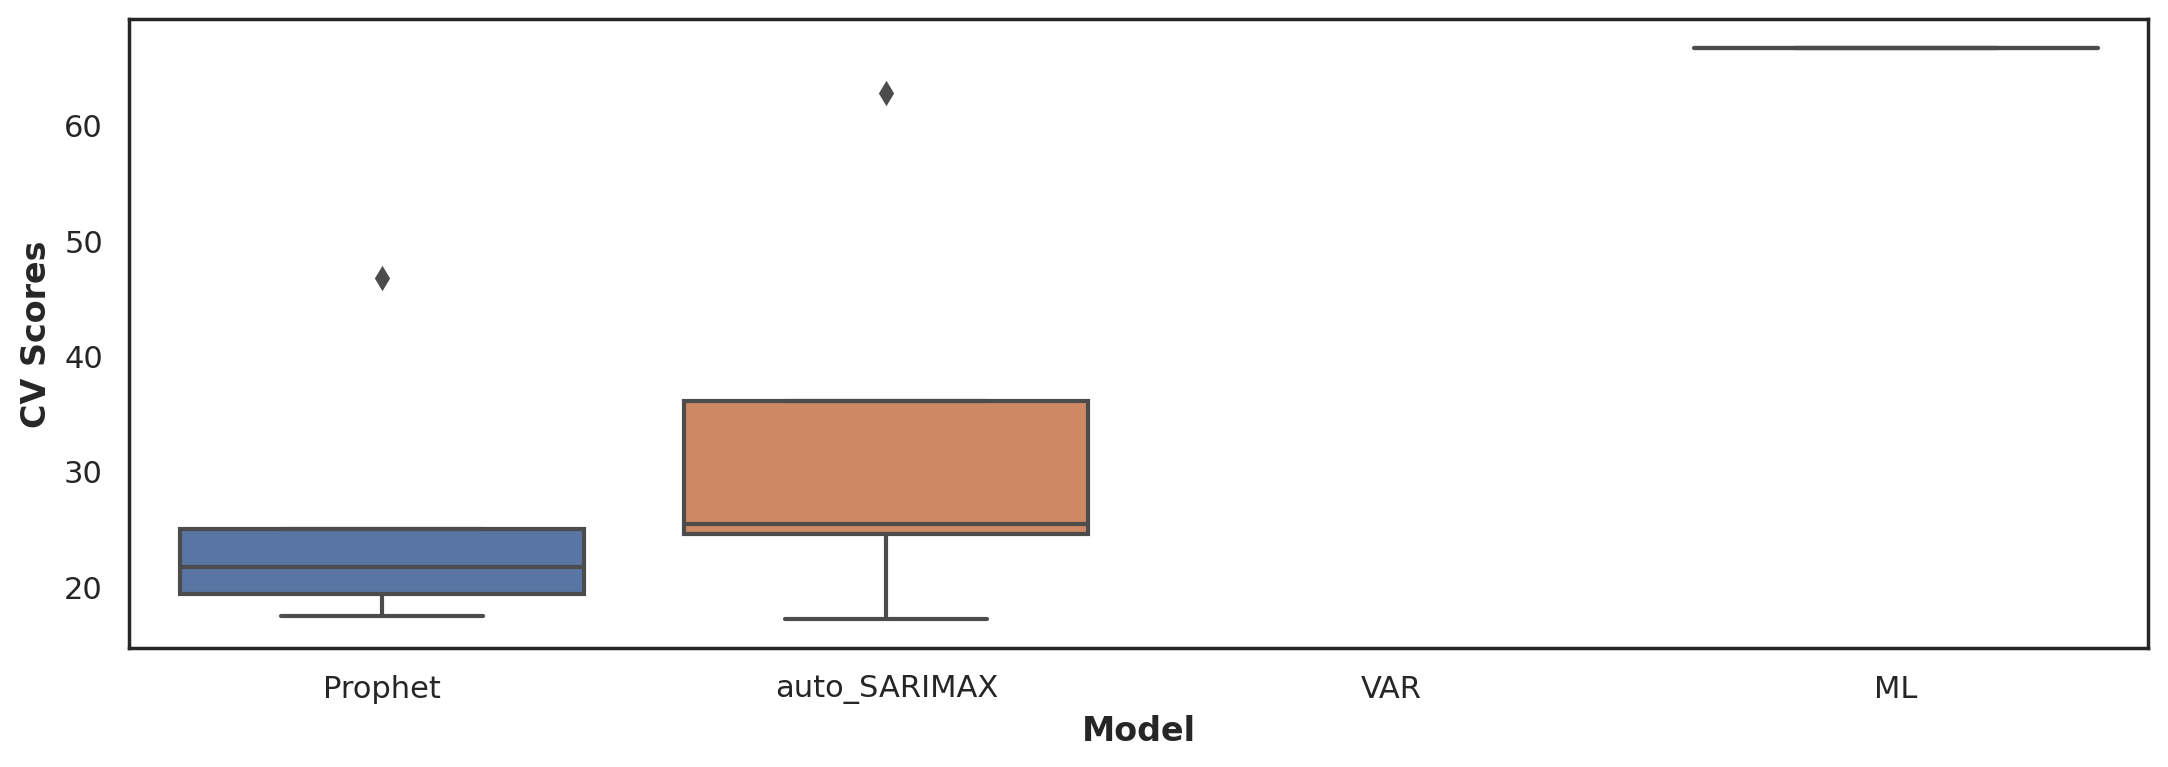

In [ ]:
print(model.get_leaderboard())
model.plot_cv_scores()

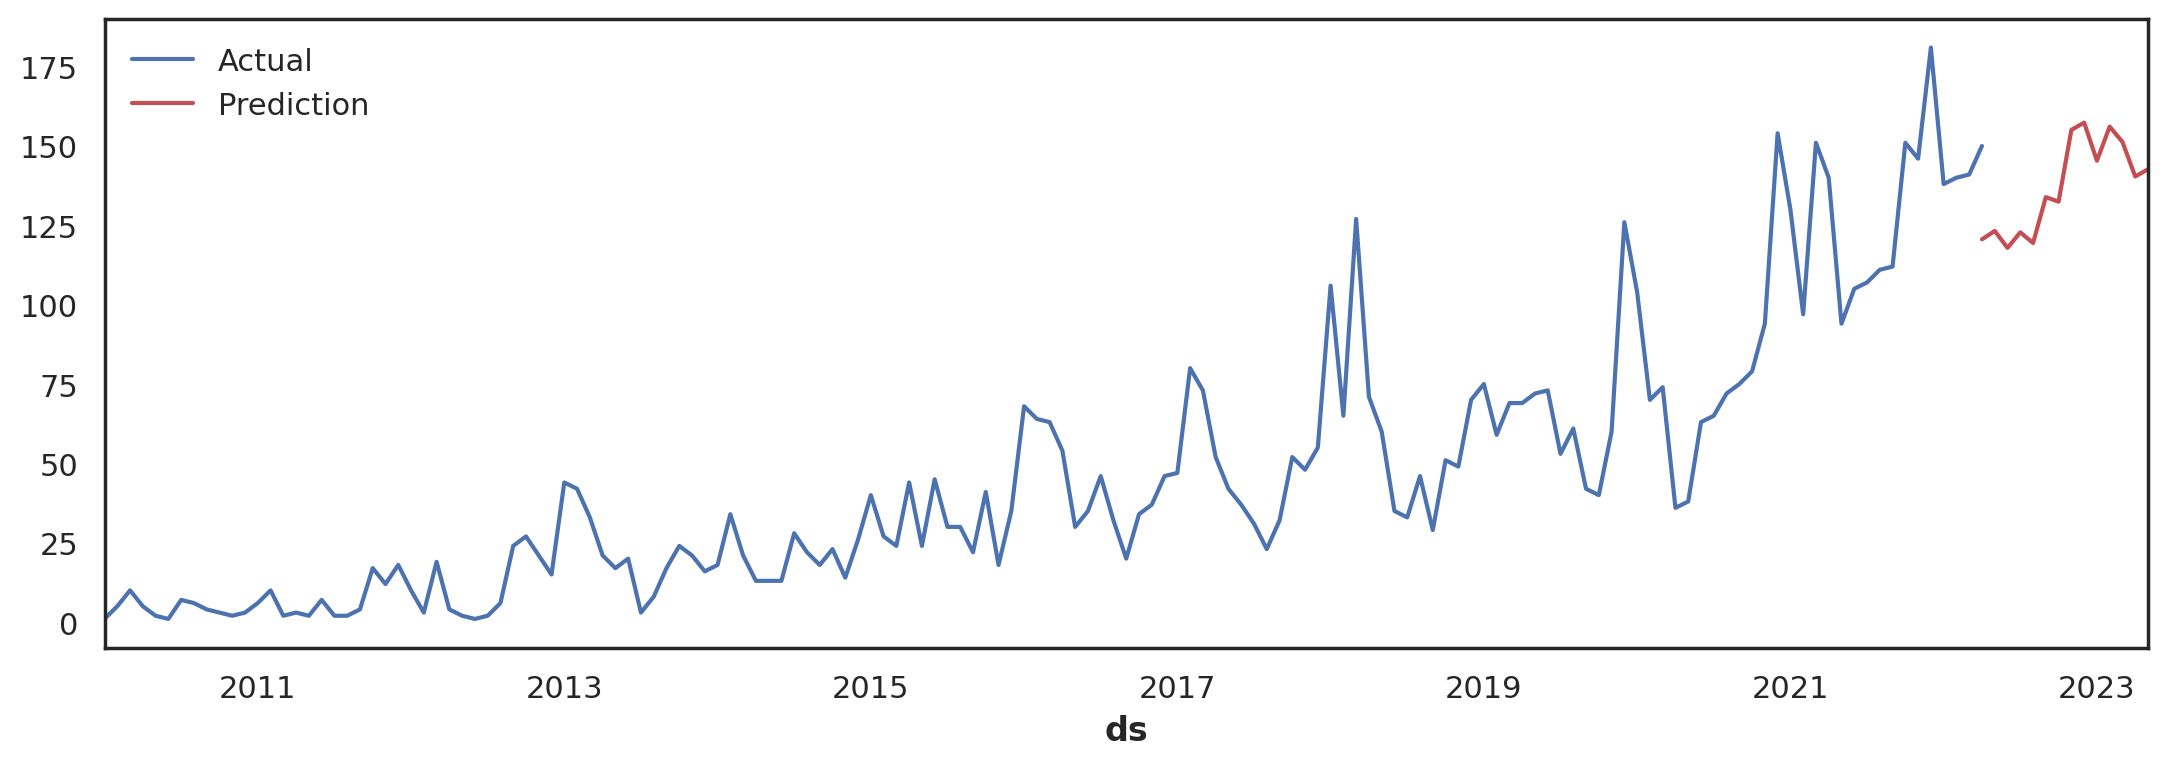

In [ ]:
ax = X_tr_autots['y'].plot(label='Actual', color = 'C0')
ax = predictions['yhat'].plot(label='Prediction', color = 'C3')
ax.legend();

# Hyperparameter Tuning

In [ ]:
!pip install prophet

In [ ]:
# prophet by Facebook
from prophet import Prophet
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 30


In [ ]:
strt='2022-04-28'
end='2023-06-30'

model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         interval_width=0.95)
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=14, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/b10qtmc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/o8vi7v50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60086', 'data', 'file=/tmp/tmpjzomwinm/b10qtmc_.json', 'init=/tmp/tmpjzomwinm/o8vi7v50.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelxy17t0_g/prophet_model-20230826053046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/tw78pj8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/uat0fu5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51806', 'data', 'file=/tmp/tmpjzomwinm/tw78pj8r.json', 'init=/tmp/tmpjzomwinm/uat0fu5v.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelt0_83toe/prophet_model-20230826053046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/32nhsydu.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 27.333871362408672
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 24.65019504201075
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/98bd2jus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87077', 'data', 'file=/tmp/tmpjzomwinm/32nhsydu.json', 'init=/tmp/tmpjzomwinm/98bd2jus.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelzn7d_wgv/prophet_model-20230826053046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/12z20m4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/h2rdpjv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 27.58369761742768
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 23.749192501063803
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/hz7z1lpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/nbvtpiaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19915', 'data', 'file=/tmp/tmpjzomwinm/hz7z1lpg.json', 'init=/tmp/tmpjzomwinm/nbvtpiaq.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model0eo9cyaw/prophet_model-20230826053046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/7sixnqrq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/tegvrqeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Mean Absolute Percentage Error(MAPE)------------------------------------ 27.58369761742768
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 23.749192501063803
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8342', 'data', 'file=/tmp/tmpjzomwinm/0uug6jlg.json', 'init=/tmp/tmpjzomwinm/4hkb2vix.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelmsnmqhd_/prophet_model-20230826053047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/3j5ke4eh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/fcla146n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47692', 'data', 'file=/tmp/tmpjzomwinm/3j5ke4eh.json', 'init=/tmp

Mean Absolute Percentage Error(MAPE)------------------------------------ 23.638977481903446
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 22.23441879186348
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


05:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/3v_687ru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/cnugpx1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91011', 'data', 'file=/tmp/tmpjzomwinm/3v_687ru.json', 'init=/tmp/tmpjzomwinm/cnugpx1n.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelrpkv2mnj/prophet_model-20230826053047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/o0bvr9g9.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 25.131472912970622
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 22.378659656090722
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/rcx0pbgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70610', 'data', 'file=/tmp/tmpjzomwinm/o0bvr9g9.json', 'init=/tmp/tmpjzomwinm/rcx0pbgv.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelge7xcyxf/prophet_model-20230826053047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/36qbj3yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/mpqrizht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 25.131472912970622
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 22.378659656090722
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


05:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/k9b8qxqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/fabd354i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32433', 'data', 'file=/tmp/tmpjzomwinm/k9b8qxqp.json', 'init=/tmp/tmpjzomwinm/fabd354i.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model5djoh6_p/prophet_model-20230826053048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.75038107666085
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.885556234025866
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/vmua4i7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/ef2gi850.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72516', 'data', 'file=/tmp/tmpjzomwinm/vmua4i7r.json', 'init=/tmp/tmpjzomwinm/ef2gi850.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelhndz4ww1/prophet_model-20230826053048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/y7l4hqlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/5wvmkd5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Mean Absolute Percentage Error(MAPE)------------------------------------ 21.456212538974757
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.941463254416295
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/6fc4k849.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/hqhia7qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99457', 'data', 'file=/tmp/tmpjzomwinm/6fc4k849.json', 'init=/tmp/tmpjzomwinm/hqhia7qh.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model0yfkzok2/prophet_model-20230826053048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/z6kl8ev9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/uqpww4cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Mean Absolute Percentage Error(MAPE)------------------------------------ 21.456212538974757
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.941463254416295
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/tvhoju_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/ln78e0ic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6390', 'data', 'file=/tmp/tmpjzomwinm/tvhoju_f.json', 'init=/tmp/tmpjzomwinm/ln78e0ic.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modeliu4_sgl6/prophet_model-20230826053049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/iykiztg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/2cfq42o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Mean Absolute Percentage Error(MAPE)------------------------------------ 21.124063936654473
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.62736014594014
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:Chain [1] start processing
05:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/7w0zqwmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/u2892sfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20675', 'data', 'file=/tmp/tmpjzomwinm/7w0zqwmm.json', 'init=/tmp/tmpjzomwinm/u2892sfv.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelcjakl2de/prophet_model-20230826053049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.024251318712217
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.613274486248837
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/ekp8jge_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/mgw86gaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15204', 'data', 'file=/tmp/tmpjzomwinm/ekp8jge_.json', 'init=/tmp/tmpjzomwinm/mgw86gaj.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modeltar7z_jh/prophet_model-20230826053049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/folot3wm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/oo3kvnsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Mean Absolute Percentage Error(MAPE)------------------------------------ 21.024251318712217
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.613274486248837
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/lj2iupb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/37wrst3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60701', 'data', 'file=/tmp/tmpjzomwinm/lj2iupb0.json', 'init=/tmp/tmpjzomwinm/37wrst3j.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelzt_iuibv/prophet_model-20230826053050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/h74jwrnb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/ovdhb6kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Mean Absolute Percentage Error(MAPE)------------------------------------ 20.58055283392801
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.514620815246506
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


05:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/hz41gfw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/n2wksbgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3000', 'data', 'file=/tmp/tmpjzomwinm/hz41gfw4.json', 'init=/tmp/tmpjzomwinm/n2wksbgk.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelqncgt5_o/prophet_model-20230826053050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.717933826341415
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/zfkxxspe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/xcyeykl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52852', 'data', 'file=/tmp/tmpjzomwinm/zfkxxspe.json', 'init=/tmp/tmpjzomwinm/xcyeykl4.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelr_gylo2d/prophet_model-20230826053051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.52057777309348
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/_ty5i0_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/cs3su340.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86038', 'data', 'file=/tmp/tmpjzomwinm/_ty5i0_f.json', 'init=/tmp/tmpjzomwinm/cs3su340.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_model5dkcptxl/prophet_model-20230826053051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.717933826341415
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 21.52057777309348


In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

RMSE                                         Parameters       MAPE
0  NaN  {'changepoint_prior_scale': 0.5, 'n_changepoin...  20.580553
1  NaN  {'changepoint_prior_scale': 0.5, 'n_changepoin...  20.717934
2  NaN  {'changepoint_prior_scale': 0.5, 'n_changepoin...  20.717934
3  NaN  {'changepoint_prior_scale': 0.4, 'n_changepoin...  21.024251
4  NaN  {'changepoint_prior_scale': 0.4, 'n_changepoin...  21.024251

In [ ]:
print("Best Parameter",parameters['Parameters'][0])
print("MAPE Score: ",parameters['MAPE'][0])

Best Parameter {'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
MAPE Score:  20.58055283392801


In [ ]:
# Setup and train model with holidays
final_model = Prophet(changepoint_prior_scale= 0.5,
                      n_changepoints = 200,
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(X_tr)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/x40ernmb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzomwinm/fpbqhgaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3430', 'data', 'file=/tmp/tmpjzomwinm/x40ernmb.json', 'init=/tmp/tmpjzomwinm/fpbqhgaf.json', 'output', 'file=/tmp/tmpjzomwinm/prophet_modelkm5byx93/prophet_model-20230826053109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = final_model.make_future_dataframe(periods=36, freq='M')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds        yhat  yhat_lower  yhat_upper
177 2024-09-30  223.070137  194.564546  252.167316
178 2024-10-31  222.428492  194.521199  249.577062
179 2024-11-30  250.660410  222.866561  279.631644
180 2024-12-31  255.158811  228.831507  282.839720
181 2025-01-31  235.597753  207.939575  263.125677
182 2025-02-28  239.759715  211.862409  267.317138
183 2025-03-31  250.786561  219.964943  279.424574

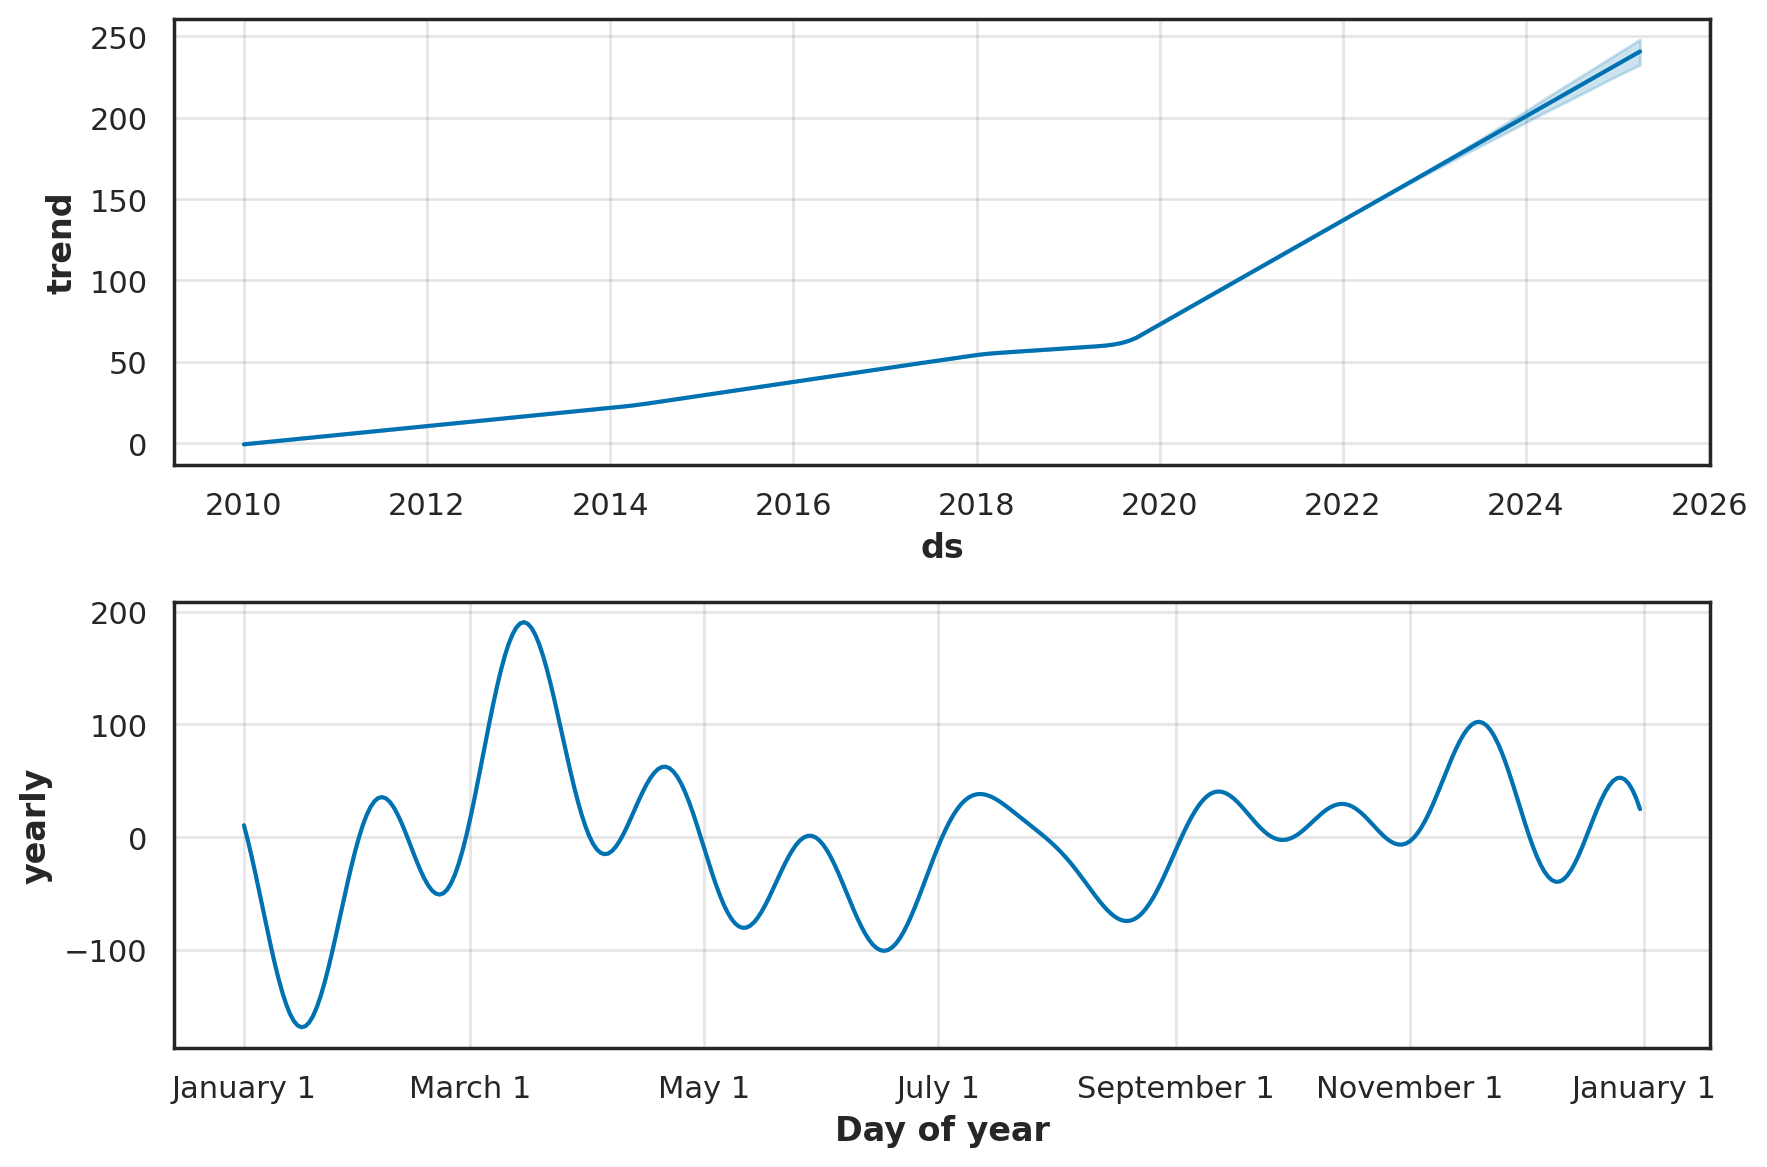

In [ ]:
# Plot the components of the model
fig = final_model.plot_components(forecast)


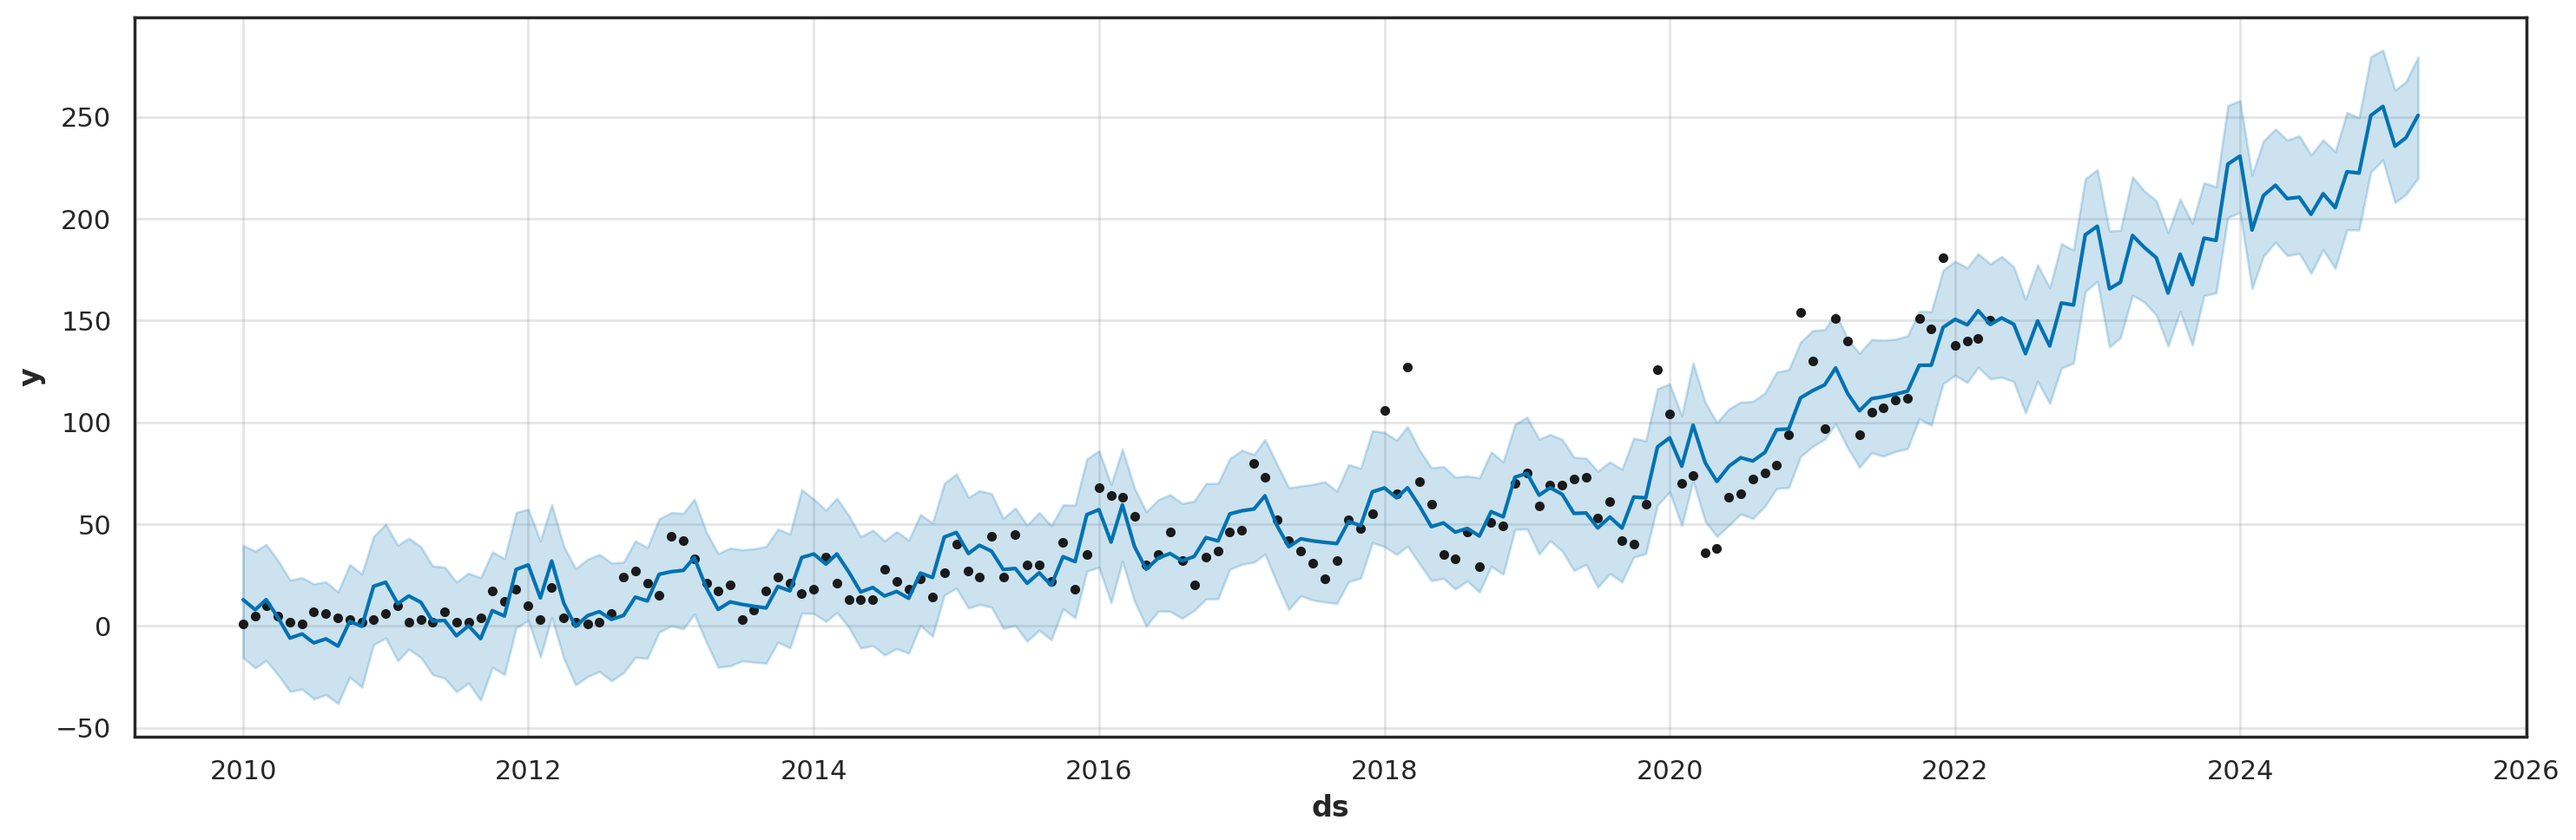

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(forecast,ax=ax)
plt.show()

In [ ]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds        yhat  yhat_lower  yhat_upper
7  2022-12-01  181.282224  153.745043  209.850380
8  2023-01-01  185.549427  159.247573  214.586138
9  2023-02-01  177.215495  148.863275  205.112672
10 2023-03-01  183.069983  156.098853  210.401565
11 2023-04-01  182.200562  154.127516  210.831249
12 2023-05-01  175.142341  146.510466  203.676058
13 2023-06-01  177.659657  151.148038  207.861954

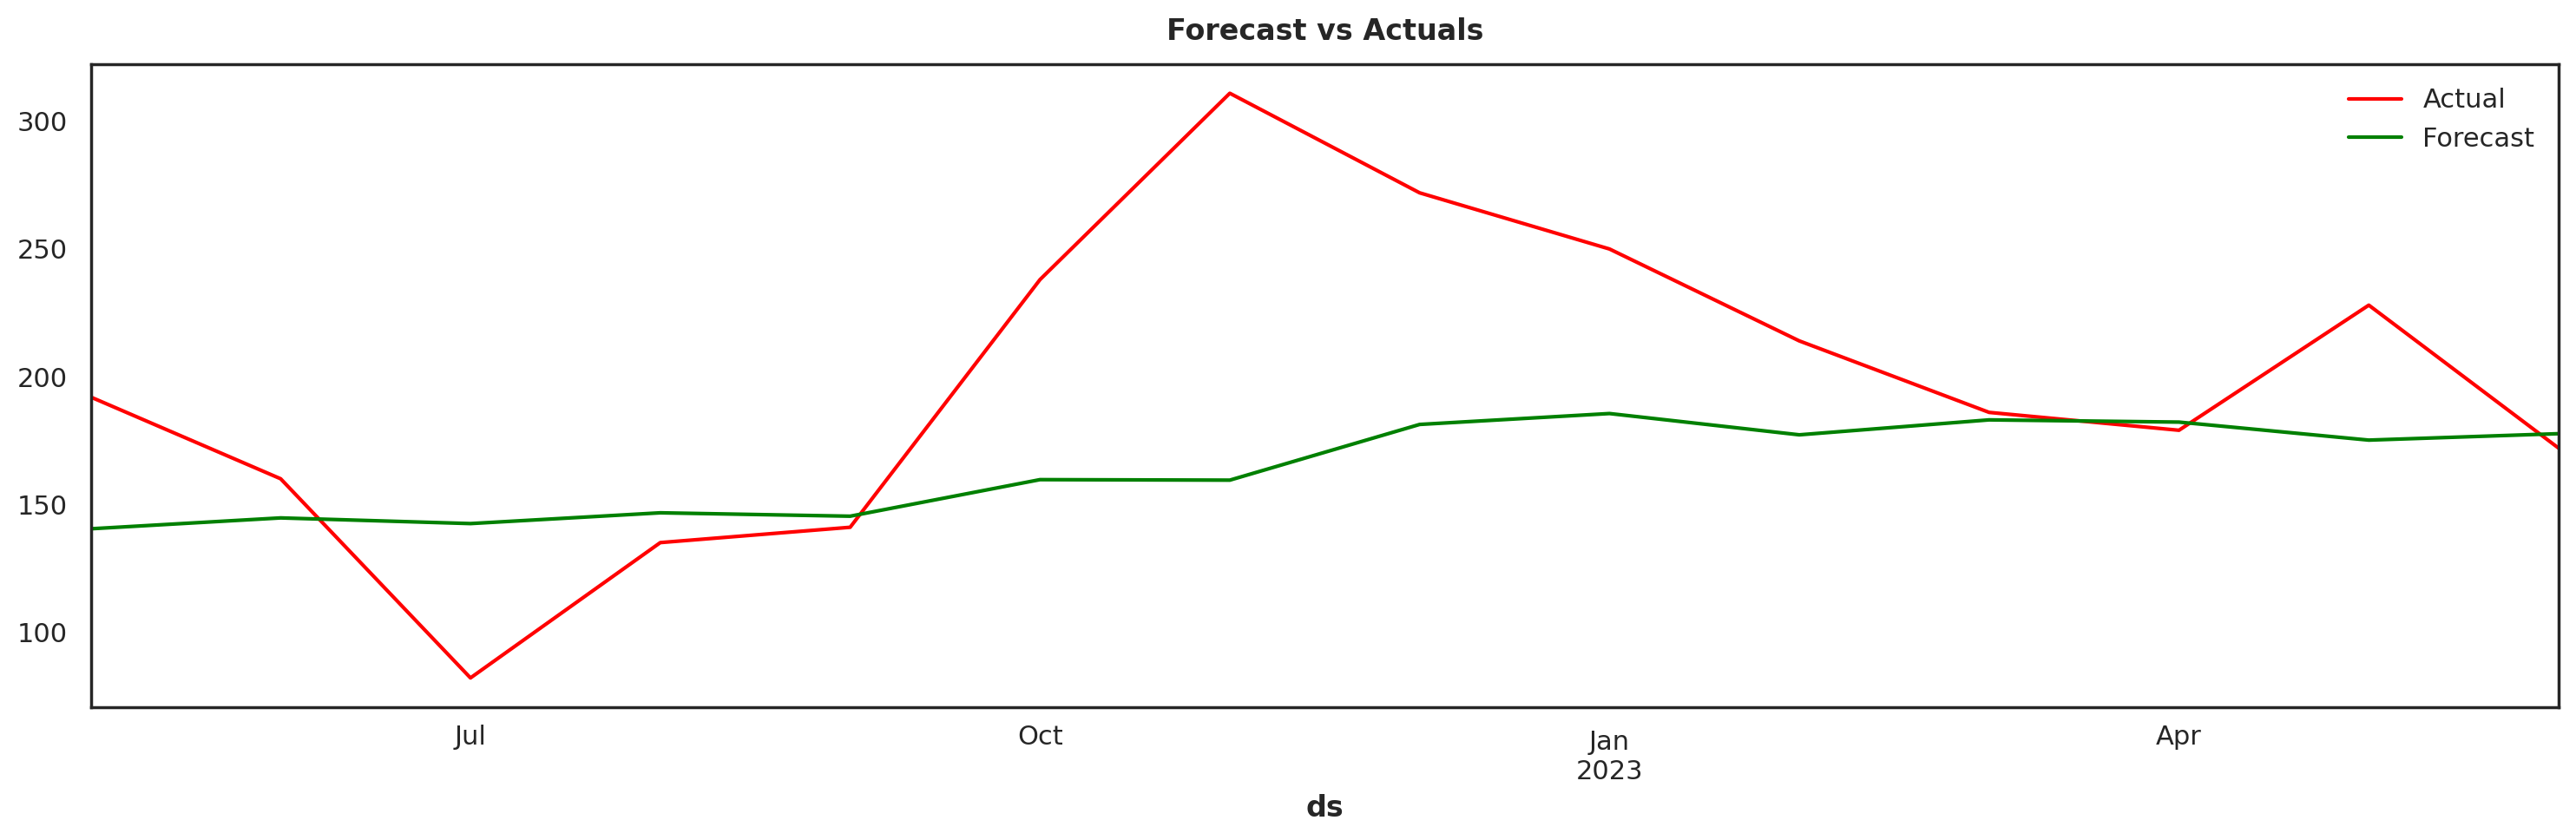

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()